# IDS Assignment Part 2 - <font color="red"><h7>Deadline: 23/01/2023 23:59</h7></font>
This is the second part of the assignment in IDS 2022/2023. 
Please use this Jupyter notebook to work on the questions posed in the assignment. When you are done, upload the notebook in Moodle at the designated activity. In addition to the _Jupyter notebook_, please submit _one zip-file_ containing your screenshots for Question 7. 

Give your commented Python code and answers in the corresponding provided cells. Make sure to answer all questions in a clear and explicit manner and discuss your outputs. _Please do not change the general structure of this notebook_. You can, however, add additional markdown or code cells if necessary. <b>Please DO NOT CLEAR THE OUTPUT of the notebook you are submitting! </b>

<font color="red"> *Please make sure to include the names and matriculation numbers of all group members in the slot provided below.* </font> If a name or a student id is missing, the student will not receive any points.

Hint 1: While working on the assignment, you will get a better understanding of the dataset. Feel free to generate additional results and visualizations to support your answers. For example, this might be useful regarding data modification, data simplification, or output interpretation. <font color="red">Ensure that all your claims are supported.</font>

Hint 2: <font color="red">Plan your time wisely. </font> A few parts of this assignment may take some time to run. It might be necessary to consider time management when you plan your group work. Also, do not attempt to upload your assignment at the last minute before the deadline. This often does not work, and you will miss the deadline. Late submissions will not be considered.

Hint 3: RWTHmoodle allows multiple submissions, with every new submission overwriting the previous one. <b>Partial submissions are therefore possible and encouraged. </b> This might be helpful in case of technical issues with RWTHMoodle, which may occur close to the deadline.

<font color="red"><b>Student Names and IDs:
    
    1. Po-Yen Chen 429195
    
    2. 
    
    3.

## Question 1: Preprocessing (20 points)

In [26]:
import pandas as pd

### Sklearn
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import KNNImputer

In this question, we consider a dataset documenting the Ski Resorts in Europe (**ski_resorts.csv**).
Each row contains some information about the Ski resort.
You can find a short description for each column:

| Column | Description |
| ------ | ----------- |
| Resort | The name of the ski & snowboard resort. |
| Country | The country in which the resort is located. |
| HighestPoint | The highest mountain point at the ski resort.   |
| LowestPoint | The lowest possible point to ski at the ski resort.  |
| DayPassPriceAdult | The price shows what it costs for 1 adult for 1 day in the main season in Euro. |
| BeginnerSlope | The total amount of “beginner” slopes in kilometer at the resort. “Beginner slopes” contains “children”, “blue” and, “green” slopes. |
| IntermediateSlope | The total amount of “intermediate” slopes in kilometer at the resort. “Intermediate slopes” contains “red” slopes. |
| DifficultSlope | The total amount of “difficult” slopes in kilometer at the resort. “Difficult slopes” contains “black”, “advanced”, and ”expert” slopes. |
| TotalSlope | The sum of “beginner slopes” + “intermediate slopes” + “difficult slopes” |
| Snowparks | Does the resort have one or more snowparks, or not? |
| NightSki | Does the resort offer skiing on illuminated slopes? |
| SurfaceLifts | The amount of lifts in this category: T-bar, Sunkidslift, Rope lifts, and people mower. |
| ChairLifts | The total amount of chairlifts. |
| GondolaLifts | The amount of lifts in this category: Gondola, Train lifts, Funicular, Combined gondola and chairlifts, Helicopter lifts, Snowcats, and Aerial tramways. |
| TotalLifts | The sum of “surface lifts etc” + “gondola etc” + “chairlifts etc.” |
| LiftCapacity | How many passengers can the lift system at the ski resort mowe in one hour? |
| SnowCannons  |The total amount of snow cannons at the ski resort.|

### a) Loading the Data and Initial Quality Investigation (2.5pts)

#### **a(i)** 
Load the dataset into a dataframe `df`. <font color='red'>Use the first column as index for your dataframe</font>. Ensure that the index is valid, that is, it should not contain any duplicate entries. 



**In the subsequent questions, only modify the dataframe `df` if explicitly requested. However, you can always create working copies.**

In [27]:
# your code
ski_resorts = pd.read_csv('datasets/ski_resorts.csv')
#ski_resorts
ski_resorts = ski_resorts.drop_duplicates()
print(ski_resorts.shape)
ski_resorts.head()

(376, 18)


Unnamed: 0                                             Resort  \
0           1                              Alpendorf (Ski amedé)   
1           2  Soldeu-Pas de la Casa/​Grau Roig/​El Tarter/​C...   
2           3                              Oberau (Wildschönau)   
3           4                                     Dachstein West   
4           5                                        Rosa Khutor   

           Country  HighestPoint  LowestPoint  DayPassPriceAdult  \
0          Austria        1980.0        740.0               52.0   
1          Andorra        2640.0       1710.0               47.0   
2          Austria        1130.0        900.0               30.0   
3          Austria        1620.0        780.0               42.0   
4  Southern Russia        2320.0        940.0               22.0   

   BeginnerSlope  IntermediateSlope  DifficultSlope  TotalSlope Snowparks  \
0           30.0                 81             4.0         115       Yes   
1          100.0                 77            33.0         210       Yes   
2            1.0                  0             1.0           2        No   
3           15.0                 33             3.0          51       Yes   
4           30.0                 26            21.0          77       Yes   

  NightSki  SurfaceLifts  ChairLifts  GondolaLifts  TotalLifts  LiftCapacity  \
0       No          22.0          16          11.0          49       75398.0   
1      Yes          37.0          28           7.0          72       99017.0   
2       No           2.0           0           0.0           2        1932.0   
3      Yes          25.0           8           3.0          36       32938.0   
4       No           6.0          11          10.0          27       49228.0   

   SnowCannons  
0        600.0  
1       1032.0  
2          0.0  
3        163.0  
4        450.0

#### **a(ii)** 
Show the data types of the dataframe columns as well as the first 5 rows. On the first sight, are there any data type problems (e.g., numerical columns having a non-numerical data type)?



In [23]:
# your code
ski_resorts.dtypes

Unnamed: 0             int64
Resort                object
Country               object
HighestPoint         float64
LowestPoint          float64
DayPassPriceAdult    float64
BeginnerSlope        float64
IntermediateSlope      int64
DifficultSlope       float64
TotalSlope             int64
Snowparks             object
NightSki              object
SurfaceLifts         float64
ChairLifts             int64
GondolaLifts         float64
TotalLifts             int64
LiftCapacity         float64
SnowCannons          float64
dtype: object

**Your Answer:** All numerical columns have a numerical column.

#### **a(iii)** 
To improve performance and memory usage (in particular for large datasets) it is important to use **categorical** columns whenever suitable.
Are there any categorical column candidates? Explain your answer. \
Afterward, convert the column(s) in `df` into categorical column(s).

In [39]:
# your code
descriptiveFeatures = pd.get_dummies(ski_resorts, columns = ["Country", "Snowparks", "NightSki"])
descriptiveFeatures

Unnamed: 0                                             Resort  \
0             1                              Alpendorf (Ski amedé)   
1             2  Soldeu-Pas de la Casa/​Grau Roig/​El Tarter/​C...   
2             3                              Oberau (Wildschönau)   
3             4                                     Dachstein West   
4             5                                        Rosa Khutor   
..          ...                                                ...   
371         372                          Montgenèvre (Via Lattea)   
372         373                          Sauze d’Oulx (Via Lattea)   
373         374             Gressoney - La-Trinite (Monterosa Ski)   
374         375                          Champoluc (Monterosa Ski)   
375         376                                         Zauchensee   

     HighestPoint  LowestPoint  DayPassPriceAdult  BeginnerSlope  \
0          1980.0        740.0               52.0           30.0   
1          2640.0       1710.0               47.0          100.0   
2          1130.0        900.0               30.0            1.0   
3          1620.0        780.0               42.0           15.0   
4          2320.0        940.0               22.0           30.0   
..            ...          ...                ...            ...   
371        2749.0       1372.0               48.0           96.0   
372        2749.0       1372.0               48.0           96.0   
373        3275.0       1212.0               43.0           23.0   
374        3275.0       1212.0               43.0           23.0   
375        2188.0       1000.0               52.0           23.0   

     IntermediateSlope  DifficultSlope  TotalSlope  SurfaceLifts  ...  \
0                   81             4.0         115          22.0  ...   
1                   77            33.0         210          37.0  ...   
2                    0             1.0           2           2.0  ...   
3                   33             3.0          51          25.0  ...   
4                   26            21.0          77           6.0  ...   
..                 ...             ...         ...           ...  ...   
371                220            84.0         400           NaN  ...   
372                220            84.0         400          29.0  ...   
373                 94            15.0         132           9.0  ...   
374                 94            15.0         132           9.0  ...   
375                 16             4.0          44           9.0  ...   

     Country_Southern Russia  Country_Spain  Country_Sweden  \
0                          0              0               0   
1                          0              0               0   
2                          0              0               0   
3                          0              0               0   
4                          1              0               0   
..                       ...            ...             ...   
371                        0              0               0   
372                        0              0               0   
373                        0              0               0   
374                        0              0               0   
375                        0              0               0   

     Country_Switzerland  Country_Ukraine  Country_United Kingdom  \
0                      0                0                       0   
1                      0                0                       0   
2                      0                0                       0   
3                      0                0                       0   
4                      0                0                       0   
..                   ...              ...                     ...   
371                    0                0                       0   
372                    0                0                       0   
373                    0                0                       0   
374                    0 

**Your Answer:** Country, snowparks and nightski are categorical data.

### b) Handling Missing Values & Encoding (17.5pts)

In the following task, you can assume that every NAN entry in the dataframe is actually a missing value. This can partially be justified by the fact that pandas did not have problems inferring the "proper" datatypes (e.g., a string indicating a missing number in a number column would result in pandas parsing an object column) and your subsequent check of the data types. Therefore, you can use `df.isna()` as a proxy indicator for missing values.

#### **b(i)** 
Simply discarding missing entries is usually not a good idea. Therefore, you should first analyze the number of missing values and check for patterns of missing values. 

To this end, compute the following statistics on missing values:
1. How many entries does the dataframe have? (To relate this to the number of entries missing)
2. How many missing values do we have? What is the ratio i.e., "number of missing values"/"number of entries of df"?
3. How many rows have at least a single missing value?
4. Count the number of missing values per column.
5. Count the number of missing values per row and aggregate them - i.e., show the number of rows that suffer from x missing values.
6. What do you observe? Are there any rows containing missing values for the same set of columns? Can you identify potential patterns?


In [ ]:
# your code for 1. How many entries does the dataframe have? (To relate this to the number of entries missing)

In [ ]:
# your code for 2. How many missing values do we have? What is the ratio i.e., "number of missing values"/"number of entries of df"?

In [ ]:
# your code for 3. How many rows have at least a single missing value?

In [ ]:
# your code for 4. Count the number of missing values per column.

In [ ]:
# your code for 5. Count the number of missing values per row and aggregate them - i.e., show the number of rows that suffer from x missing values.

**Your answer:** *(for 6. What do you observe? Are there any rows containing missing values for the same set of columns?)*

#### **b(ii)**
For the next step:

1. Transform the categorical column(s) you identified in a(iii) into one-hot encoding format. 
2. Transform the columns "Snowparks" and "NightSki" in `df` into boolean data type, where "Yes" should be `True` and "No" should be `False`

In the end, the original categorical column(s) should still be there. Additionally, there should be x number (x is the number of unique values) of one-hot encoding columns for each categorical column. Use the following naming convention for the new columns "{name of the categorical column}_{unique value for that column}" Also, make sure the columns "Snowparks" and "NightSki" are boolean type in the end.
Lastly, print the top five rows of the resulting dataframe.

*Hint: You can use the pd.get_dummies() function from pandas for the first transformation*

In [ ]:
# your code for 1. Transform the categorical column(s) you identified in a(iii) into one-hot encoding format. 

In [ ]:
# your code for 2. Transform the columns "Snowparks" and "NightSki" in `df` into boolean data type, where "Yes" should be `True` and "No" should be `False`

In [ ]:
# use df.dtypes to check if you correctly transform the data

#### **b(iii)** 
The previous analysis in b(i) showed that there are missing values in the 'SurfaceLifts' and 'GondolaLifts' columns.\
How would you impute these values? \
Motivate your approach and apply it to `df`.

*Hint: Remember the semantics of the columns. Also, carefully assert your assumptions.*


**Your Answer:** *(Motivate your approach.)*

In [ ]:
# your code

#### **b(iv)**
Impute the rest of the missing values using the knn-imputation method. To this end, apply the following steps:
1. Create a working copy `df_tmp` of your updated `df`.
2. For simplicity, drop the non-numerical columns (i.e., not of types integer or floats), which also inlcude the one-hot encoded and the boolean columns* you created earlier.
3. Normalize the data in `df_tmp` (e.g., Standard score normalization). If the features have very different scales, knn can become very biased.
4. Impute the missing values considering six neighbors.
5. Invert the transformation applied upfront to enable more meaningful and intuitive visualizations.
6. Append the columns you dropped in step 2.
 
In the end, `df` should not contain missing values and have all the columns.

\*Note that by dropping the columns we lose the information of countries and the two boolean attributes ("Snowparks" and "NightSki") when imputing the missing values, which might be crucial for inferencing values such as the price for a ski pass. In practice, one should try to find if there are correlations before deciding whether to drop the columns or not.
We drop the columns here to make the following steps easier because we only have to deal with numerical columns.

*Hint: Be careful with the indices of your dataframes.*


In [ ]:
# your code for step 1 & 2

In [ ]:
# your code for step 3

In [ ]:
# your code for step 4

In [ ]:
# your code for step 5

In [ ]:
# your code for step 6

In [ ]:
# assert df.isna().sum().sum() == 0

## Question 2: Visualization (13 points)

In this task, you will analyze the data using different means of visualization.

Start with the following preprocessed and integrated dataframe `df_v`. \
Note that it has a similar structure to the dataframe that you should obtain from the previous task, however, the values have been modified.

In [ ]:
import pandas as pd
import plotly.express as px
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_v = pd.read_csv("./datasets/ski_resorts_visual.csv", index_col=0)

### **a) (3pts)** 
To start the visual analysis, make a Scatter plot matrix to visually check if there are any correlations between the numerical attributes.

*Hint: You can use the scatter_matrix from pandas.plotting or pairplot from seaborn to make the plot.*


In [ ]:
# your code

### **b) (3pts)**
Another way to detect correlation is to calculate the Pearson correlation coefficient. Calculate the correlation matrix for the numerical data and visualize the matrix using a heatmap. 
Briefly discuss your findings from the heatmap and the scatter plot you created in 2(a).

Make sure to annotate the heatmap with the values of the correlation.

*Hint: You can use the heatmap function from seaborn to make the plot.*

In [ ]:
# your code

### **c) (4pts)** 
We now want to have an overview of the attribute "TotalSlope" aggregated by different levels of hierarchy (Europe -> Country -> Resort). It seems that a tree map is suitable for this purpose.

Make a tree map where
- the root node represents Europe.
- the child nodes of Europe are countries.
- the child nodes of each country are the ski resorts.
- the size of the rectangles is determined by the attribute "TotalSlope".

Also, use the tree map to find out
1. The sum of TotalSlopes of a country, list the top five countries and the corresponding values.
2. The max value of TotalSlope of the five countries you identified in 1.

*Hint: You can use the treemap function from plotly.express.*

In [ ]:
# your code

**Your answer for...** \
*...  1. The sum of TotalSlopes of a country. List the top five countries and the corresponding values:* \
*...  2. The max value of TotalSlope of the five countries you identified in 1:*


### **d) (3pts)** 

An alternative to a tree map is a sunburst plot, the principle is similar to a tree map. 

Recall from the lecture that:
- Each ring is a different level of the hierarchy
- Each segment of a ring belongs to one categorical value
- The size of a segment is either divided proportionally to a value

Now, we would like to have an overview of the attribute "TotalLifts" aggregated by different level of hierarchy.

Make a sunburst plot where
- the first hierarchy(ring) is "Country"
- the second hierarchy(ring) is "Snowparks" (whether the resort has snowparks)
- the third hierarchy(ring) is "Resort"
- the size of the segments is determined by the attribute "TotalLifts".

Then, briefly discuss your findings from the plot.

*Hint: You can use the sunburst function from plotly.express.*

In [ ]:
# your code

**Your answer:**

## Question 3 - Frequent Item Sets and Association Rules (15 points)

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules as arule

### A real online retail transaction data set of two years.

Data Set Information:
This Retail dataset contains all the transactions occurring for a UK-based and registered, non-store online retail between 01/12/2009 and 09/12/2011.The company mainly sells unique all-occasion gift ware. Many customers of the company are wholesalers.

Attribute Information:
- Invoice: Invoice number. Nominal. A 6-digit integral number is uniquely assigned to each transaction. If the number starts with 'C' it refers to a canceled transaction.
- StockCode: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.
- Description: Product (item) name. Nominal.
- Quantity: The quantities of each product (item) per transaction. Numeric.
- InvoiceDate: Invoice date and time. Numeric. The day and time when a transaction was generated.
- Price: Unit price. Numeric. Product price per unit in sterling (£).
- CustomerID: Customer number. Nominal. A 5-digit integral number is uniquely assigned to each customer. This number has postfix 'n'.
- Country: Country name. Nominal. The name of the country where a customer resides.

### a) Loading, exploring and preprocessing the dataset (4 pts)

#### **a(i)** 
Load the data from `retail.csv` and save it under the variable `retail_df`. Display the first few lines of the dataframe.

In [ ]:
# your code

#### **a(ii)** 
To get to know the dataset, do the following:

- Show the number of rows in the dataset.
- Show the number of unique customers.
- Show the number of unique product names.
- Show the number of unique invoices.
- Show the number and the list of all the countries where the customers reside.

In [ ]:
# your code

#### **a(iii)** 
You are interested in analyzing itemsets that are frequently purchased together. Before continuing with that task, you have to make sure that the data are fit for such analysis. 1) More precisely, you want to make sure that there are no missing values in the data. 2) Moreover, you want to ensure that each item's name in the "Description" is consistent. E.g., you want "Description" values such as " coffee black", "coffee &nbsp;black", " coffee black &nbsp;", etc. to be mapped to the same value (e.g. "coffee black"). 3) Last but not least, you want to remove transactions that were canceled. Such transactions correspond to rows where the invoice number starts with letter 'C'.

Apply these preprocessing steps to the dataset `retail_df` and apply them on the dataframe itself (e.g. set inplace=True).

In [ ]:
# your code

#### **a(iv)** 
After applying the preprocessing steps in **a(iii)** , repeat again the task **a(ii)**, that is:

- Show the number of rows in the dataset.
- Show the number of unique customers.
- Show the number of all unique product names.
- Show the list of all the countries where the customers reside.

Which values changed?

In [ ]:
# your code

**Your answer:** 

### b) Frequent itemsets and Association rules (8 pts)

#### **b(i)** 
Each invoice number in the dataset identifies a unique transaction. There are potentially many rows in the dataframe having the same invoice number. We want to analyze items that are frequently purchased together, that is, items that appear in the same transaction.

Create a new dataframe named `transaction_df` with two columns: "Invoice" and "Description". Here the "Invoice" value is the index of the dataframe (the unique number identifying each row) and "Description" is the column containing all items (without duplicates) purchased within the transaction with that invoice number. Display the first few rows of your dataframe. How many rows does the `transaction_df` have?

In [ ]:
# your code

**Your answer:**

#### **b(ii)** 
Next, we want to compute frequent itemsets and association rules based on the sets of items ordered together. Use the TransactionEncoder to transform `transaction_df` into a matrix such that the value in the i-th row and the j-th column is $True$ if the i-th itemset contains product j, and $False$ otherwise. Save the matrix into a dataframe named `transactions`. Display the shape of the matrix.

*Hint: Note that your dataframe 'transactions' must contain as many rows as there are invoice numbers and as many columns as there are unique products.*

In [ ]:
# your code

#### **b(iii)** 
Use the apriori method on `transactions` to obtain all frequent itemsets using min_support=0.01. Display all frequent itemsets that have at least three items. What support count does an itemset have for our case if it satisfies min_support=0.01?

In [ ]:
# your code

**Your answer:**

#### **b(iv)**
Now we will discover association rules from the frequent itemsets. Using only the frequent itemsets with min_support=0.01 (the ones obtained in **b(iii)**), generate different association rules using min_conf=0.6 and min_conf=0.9 as thresholds. Show the association rules for each of the thresholds. What do you notice w.r.t. the number of association rules produced for the different thresholds?

In [ ]:
# your code

**Your answer:**

#### **b(v)** 
From the association rules that satisfy the confidence threshold 0.6, select and show the two rules with the highest lift. What do you notice if you compare the two rules with each other?

In [ ]:
# your code

**Your answer:**

#### **b(vi)** 

In the analysis tasks in **b)**, an itemset consisted of items that had the same invoice number (same transaction items). Thus, if an itemset was frequent, it meant that the items in it were frequently purchased together.
An association rule $A \Rightarrow B$ meant that if items in $A$ are purchased, then the items in $B$ are also purchased in that same transaction.

Suppose that we would repeat the analysis, but this time, the itemsets would consist of items having the same "CustomerID" (bought from the same customer). Interpret the meaning of the frequent itemsets and association rules for this kind of itemsets.

**Your answer:**

### c) Sequence Mining (3 pts)

For this task, the dataset used is `retail_sequences.csv`. Run the cell below to save the dataset under the dataframe `retail_sequences`. Each row in the dataframe corresponds to a unique customer (from the retail dataset). The "Customer" column contains the customer ID, whereas the "Sequence" column contains the sequence of itemsets  purchased by that customer.  Each value of "Sequence" is a sequence (list) of itemsets $<I_1, I_2, ..., I_n>$. The items within the same itemset (list without duplicates) $I_i$ were purchased together (they had the same invoice number). The itemsets are ordered by the timestamp of the transaction (value of InvoiceDate).

In [ ]:
import pandas as pd 
retail_sequences = pd.read_csv('datasets/retail_sequences.csv', converters={'Sequence': pd.eval})

Given is the sequence *s= <{'lunch bag cars blue'}, {'herb marker rosemary','herb marker thyme'}, {'wooden star christmas scandinavian'}>*. Compute the support count of that sequence, that is, compute the number of customers whose corresponding itemset sequence contains it. Display its support count and the IDs of those customers.

*Hint: In the dataset provided, all product names are unified. They are all lowercase and have no trailing spaces.*

In [ ]:
s = [['lunch bag cars blue'], ['herb marker rosemary', 'herb marker thyme'] ,['wooden star christmas scandinavian']]

In [ ]:
# your code

## Question 4: Text Mining (12 pts)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.lm.preprocessing import padded_everygram_pipeline

### F.R.I.E.N.D.S.

In this task we will use the script from the well-known series "F.R.I.E.N.D.S.". We will apply feature extraction methods to map the line of each main character onto a vector of a vector space. Then we will train a classifier whose aim will be to predict the name of the character given a particular line from the script.
In the end, we will train language models using N-grams and produce fake sentences for each of the main characters.

### a) Data Loading and Preprocessing (4 pts)

#### **a(i)** 
Import the file `FRIENDS.csv` and save it into a dataframe named `friends_df`. Note that the dataframe must contain two columns: one indicating the character's name and one containing a line from the script. Display the first few lines from the dataframe.

<i>FYI: The script has been filtered so that it only contains lines from the main characters. The order of the lines in the data is the same as the order of the lines in the original script. Metadata and scene descriptions have been removed. Your corpus consists of all the lines contained in the data. Each row's "line" value is a single document. </i>

In [ ]:
# your code

#### **a(ii)**  
Plot the line count distribution among the six main characters (the six possible values of the column "character"). For example, show a plot containing one bar for each character whose height reflects the number of lines in `friends_df`. Briefly comment on the plot.

In [ ]:
# your code

**Your answer:**

#### **a(iii)**  
Create a corpus named `corpus` such that each document in the corpus corresponds to exactly one row's "line" in `friends_df`.

In [ ]:
# your code

#### **a(iv)**  
Write a function called `my_preprocessor` which, given a string, returns another string after tokenization, stopword removal and lemmatization have been applied. The remaining terms (tokens after stopword removal and lemmatization has been applied) should be joined in the same string using space ' '.

In [ ]:
# your code

#### **a(v)**   
You must apply your preprocessor `my_preprocessor` on each line contained in the `corpus`. Create a preprocessed corpus named `corpus_p` which contains the same lines as `corpus` after the preprocessor `my_preprocessor` has been applied.

In [ ]:
# your code

#### **a(vi)**   
Split the `friends_df` dataset from the previous task into training (80%) and test (20%) data preserving the distribution based on the "character" value. 

In [ ]:
# your code

#### **a(vii)**   
Similar to **a(iii)**, for the training data and the test data, create two corpora named `corpus_train` and `corpus_test` respectively. Each document in the training (test) corpus must correspond to exactly one row's "line" value in the corresponding training (test) dataframe.

In [ ]:
# your code

### b) Set of Words (4.5 pts)

#### **b(i)**  
We want to encode our text in such a way that for each word in the vocabulary, we are only interested in whether the word appears or not in a given document. Create such a Set of Words encoding for the whole corpus `corpus`. Use the previously defined preprocessor `my_preprocessor` as preprocessor.

In [ ]:
# your code

#### **b(ii)**  
Pick one (any) of the lines of the "line" column in the `friends_df` dataset. Display the line in:
    1) its original form, 
    2) its preprocessed version (the result contained in `corpus_p` after applying `my_preprocessor`), and 
    3) its encoding computed by the Set of Words method. This can be either an array (a vector) or a scipy matrix. 
Briefly comment on the Set of Words encoding.

In [ ]:
# your code

**Your answer:**

#### **b(iii)**  
Create a Set of Words encoding based only on the documents in `corpus_train`. Use the previously defined preprocessor `my_preprocessor` as a preprocessor.

In [ ]:
# your code

#### **b(iv)**  
In this task, we will use an SGD (Stochastic Gradient Descend) classifier to predict the character given a line from the corpus. Train the classifier on the Set of Words encoding of training corpus `corpus_train` using the character as the target feature and 'log_loss' as the loss function. Apply the classifier on the Set of Words encodings of both the training corpus and the test corpus `corpus_train`. Show its accuracy for both the training corpus and the test corpus.

In [ ]:
# your code

#### **b(v)**  
Briefly comment on the accuracy of the classifier compared to the expected accuracy of a random guesser (here: a model that simply guesses each character according to a distribution based on the line count). Use the line count distribution shown in **a(ii)** to reason about the approximate accuracy of the random guesser.

**Your answer:**

#### **b(vi)**  
Pick two lines from the dataset `friends_df`. Predict their character by applying the SGD classifier from **b(iv)** to their Set of Words encodings. Show the original lines, their original characters and the predicted characters.

In [ ]:
# your code

### c) Doc2Vec (1.5 pts)

#### **c(i)**  
In this part, we want to encode the lines using Doc2Vec. Create a Doc2Vec embedding based on the documents in the preprocessed corpus `corpus_p`. Set the vector dimension to 10 and min_count to 3.

In [ ]:
# your code

#### **c(ii)**  
Pick one (any) line from the dataset `friends_df`. Display the line and the character saying it. Find its most similar line w.r.t. the Doc2Vec encoding and display the original line and its corresponding character. Do the lines belong to the same character?

In [ ]:
# your code

**Your answer:**

### d) Language model using N-grams (2 pts)

#### For the following tasks, use the `friends_df` data.

#### **d(i)**  
For each character, create a corresponding corpus. Each corpus must be a list of documents. Each document corresponds to one "line" value of that character and it should be a list of terms. You must obtain this list of terms after applying preprocessing steps such as to lowercase, no punctuation, and tokenization to the original line. Do not perform stemming/lemmatization and/or stopword removal for this task.
Display the corpus of one of the characters.

In [ ]:
# your code

#### **d(ii)**  
For each character separately, build a trigram language model using MLE. Use both right and left padding and learn each language model using the character's corpus from **d(ii)**.

In [ ]:
# your code

#### **d(iv)**  
For each character, use the created trigram language model to generate a sentence of ten words. Display the sentences.

In [ ]:
# your code

## Question 5: Process Mining (22pts)

In [17]:
import pandas as pd
import pm4py

In [18]:
from pm4py.statistics.traces.generic.log import case_statistics

In [19]:
from pm4py.algo.conformance.tokenreplay import algorithm as token_based_replay

In [20]:
import matplotlib.pyplot as plt

### a) Loading the Data and Basic Statistics (9pts)

#### **a(i)** 
Load the data **reimburse.csv** and create a PM4Py event log. In doing so, use the following column mapping:
 - *Activity* is the activity key
 - *Case* is the case ID
 - *Timestamp* is the timestamp

In [131]:
# your code
reimburse = pd.read_csv('datasets/reimburse.csv')
display(reimburse.head())
df = pm4py.format_dataframe(reimburse, case_id='CaseId', activity_key='Activity', timestamp_key='Timestamp')
display(df.head())
log = pm4py.convert_to_event_log(df)

Timestamp  CaseId              Activity  ModelTime Resource Brand
0  2020-06-01 06:00:00       0                Online          0      111  PEAR
1  2020-06-01 06:16:43       1                Online       1003      111    CP
2  2020-06-01 08:21:49       2                   App       8509      111    CP
3  2020-06-01 09:19:59       0          Register Low      11999        1  PEAR
4  2020-06-01 09:26:51       0  Ask if Reimbursement      12411        1  PEAR

Timestamp  CaseId              Activity  ModelTime Resource  \
0 2020-06-01 06:00:00+00:00       0                Online          0      111   
1 2020-06-01 09:19:59+00:00       0          Register Low      11999        1   
2 2020-06-01 09:26:51+00:00       0  Ask if Reimbursement      12411        1   
3 2020-06-03 09:52:18+00:00       0                   Pay     186738        2   
4 2020-06-01 06:16:43+00:00       1                Online       1003      111   

  Brand case:concept:name          concept:name            time:timestamp  \
0  PEAR                 0                Online 2020-06-01 06:00:00+00:00   
1  PEAR                 0          Register Low 2020-06-01 09:19:59+00:00   
2  PEAR                 0  Ask if Reimbursement 2020-06-01 09:26:51+00:00   
3  PEAR                 0                   Pay 2020-06-03 09:52:18+00:00   
4    CP                 1                Online 2020-06-01 06:16:43+00:00   

   @@index  
0        0  
1        1  
2        2  
3        3  
4        4

#### **a(ii)** 
Compute and print the following basic information:
- Number of events
- Number of cases
- Earliest timestamp
- Latest timestamp
- Number of trace variants

In [25]:
# your code

print(f'Number of events: {len(df)}')
print(f'Number of cases: {len(df.CaseId.unique())}') #len(log)
print(f'Earliest timestamp: {reimburse.iloc[0,0]}')
print(f'Latest timestamp: {reimburse.iloc[-1,-1]}')
#print(f'Latest timestamp: {reimburse.iloc[len(df)-1,0]}')

variants = pm4py.get_variants_as_tuples (log)
variants = [(k, len(v)) for k, v in variants.items()]
variants = sorted(variants, key=lambda x: x[1], reverse=True)
#display([v[0] for v in variants[0:10]])
print(f'Number of trace variants: {len(variants)}')

Number of events: 47830
Number of cases: 10000
Earliest timestamp: 2020-06-01 06:00:00+00:00
Latest timestamp: 2022-03-10 12:14:51+00:00
Number of trace variants: 266


#### **a(iii)** 
In process mining, multiple events that have the same timestamp can cause problems because the ordering of events (or even activities) becomes unclear. Moreover, they can indicate batching (i.e., one activity is executed for multiple cases simultaneously). Therefore, during your analysis, it is good to keep that in mind. To this end, compute the following statistics/answer the following questions:

1. How many events occur almost at the same time (i.e., within less than 100ms as the preceding event. (Proceeding event in the *entire* event log)?
2. Are there resources that complete two activities at the same time (within less than 100ms)?
3. How many cases are there in which two activities are executed at the same time (i.e., two events that belong to the same case occur within less than 100ms)?

*Hint: Depending on how you find the answers, be careful about event orderings.*

In [26]:
# your code
#log_long = pm4py.filter_log(lambda x: len(x) > 30, log)
#log_long = pm4py.filter_log(lambda x: len(x) > 100, log)

number1 = df['Timestamp']
number2 = df['Timestamp'].unique()
print('There are %d events are executed almost at the same time.'  %(len(number1) - len(number2)))

There are 688 events are executed almost at the same time.


In [58]:
temp = pm4py.statistics.traces.generic.log.case_statistics.get_cases_description(log)
#temp['2']['startTime']
temp = pd.DataFrame(temp)
temp

0             1            10           100  \
startTime     1.590991e+09  1.590992e+09  1.591044e+09  1.591646e+09   
endTime       1.591178e+09  1.591184e+09  1.591277e+09  1.591886e+09   
caseDuration  1.867380e+05  1.920140e+05  2.332620e+05  2.402730e+05   

                      1000          1001          1002          1003  \
startTime     1.598356e+09  1.598367e+09  1.598368e+09  1.598394e+09   
endTime       1.598546e+09  1.598610e+09  1.598611e+09  1.598615e+09   
caseDuration  1.896800e+05  2.433250e+05  2.430520e+05  2.206390e+05   

                      1004          1005  ...          9990          9991  \
startTime     1.598396e+09  1.598400e+09  ...  1.644018e+09  1.644034e+09   
endTime       1.598610e+09  1.598607e+09  ...  1.645364e+09  1.646039e+09   
caseDuration  2.144070e+05  2.067610e+05  ...  1.345407e+06  2.005036e+06   

                      9992          9993          9994          9995  \
startTime     1.644047e+09  1.644051e+09  1.644062e+09  1.644063e+09   
endTime       1.645105e+09  1.645786e+09  1.645697e+09  1.645779e+09   
caseDuration  1.058135e+06  1.735286e+06  1.634911e+06  1.716637e+06   

                      9996          9997          9998          9999  
startTime     1.644066e+09  1.644072e+09  1.644087e+09  1.644091e+09  
endTime       1.645788e+09  1.646469e+09  1.646234e+09  1.645013e+09  
caseDuration  1.722335e+06  2.397449e+06  2.147411e+06  9.213730e+05  

[3 rows x 10000 columns]

#### **a(iv)** 
Provide a plot that shows the number of running cases (i.e., cases that have started but not yet finished) over time. You may assume that the log only contains complete traces. For each case that has started, its completion is the last observed event associated with that case. In case multiple cases start or end at the same time, you also generate multiple values.

In [53]:
# your code
from pm4py.statistics.traces.generic.log import case_statistics

all_case_durations = case_statistics.get_all_case_durations(log, parameters={
    case_statistics.Parameters.TIMESTAMP_KEY: "time:timestamp"})

In [54]:
case_dur = pd.DataFrame(all_case_durations)
case_dur

0
0       177975.0
1       178096.0
2       178753.0
3       178963.0
4       179051.0
...          ...
9995  12231773.0
9996  12402379.0
9997  12783705.0
9998  12933323.0
9999  14196794.0

[10000 rows x 1 columns]

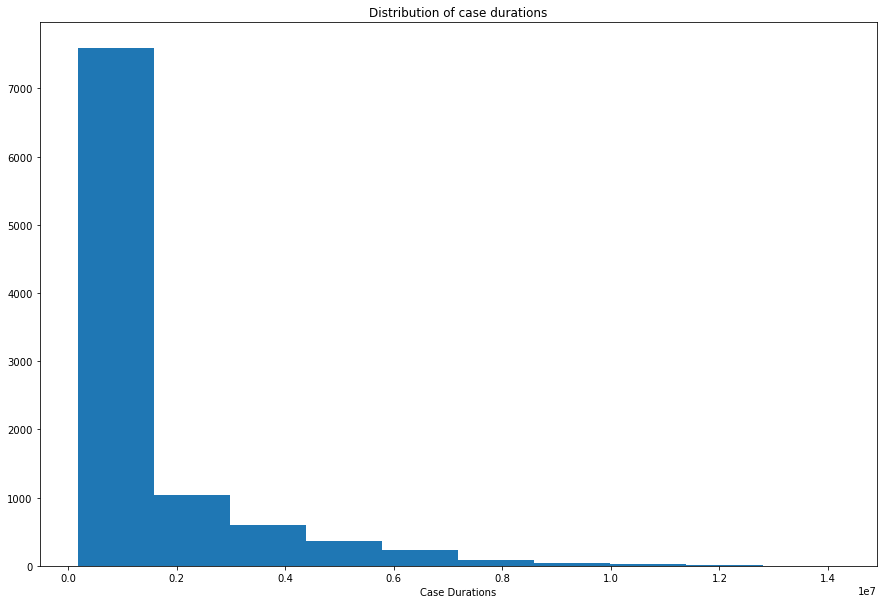

In [56]:
#Provide a plot that shows the number of running cases 
#(i.e., cases that have started but not yet finished) over time. 

plt.figure(figsize=(15,10))
plt.hist(case_dur)
plt.title('Distribution of case durations')
plt.xlabel('Case Durations')
plt.show()

In [88]:
#proc_tree = pm4py.discover_process_tree_inductive(log)
#pm4py.view_process_tree(proc_tree)

**Your answer**: *(Briefly describe the differences between the two models in about five sentences here.)*

### b) Discovery and Conformance Checking (9pts)

#### **b(i)** 
Mine a Petri net using Inductive Miner and display it.

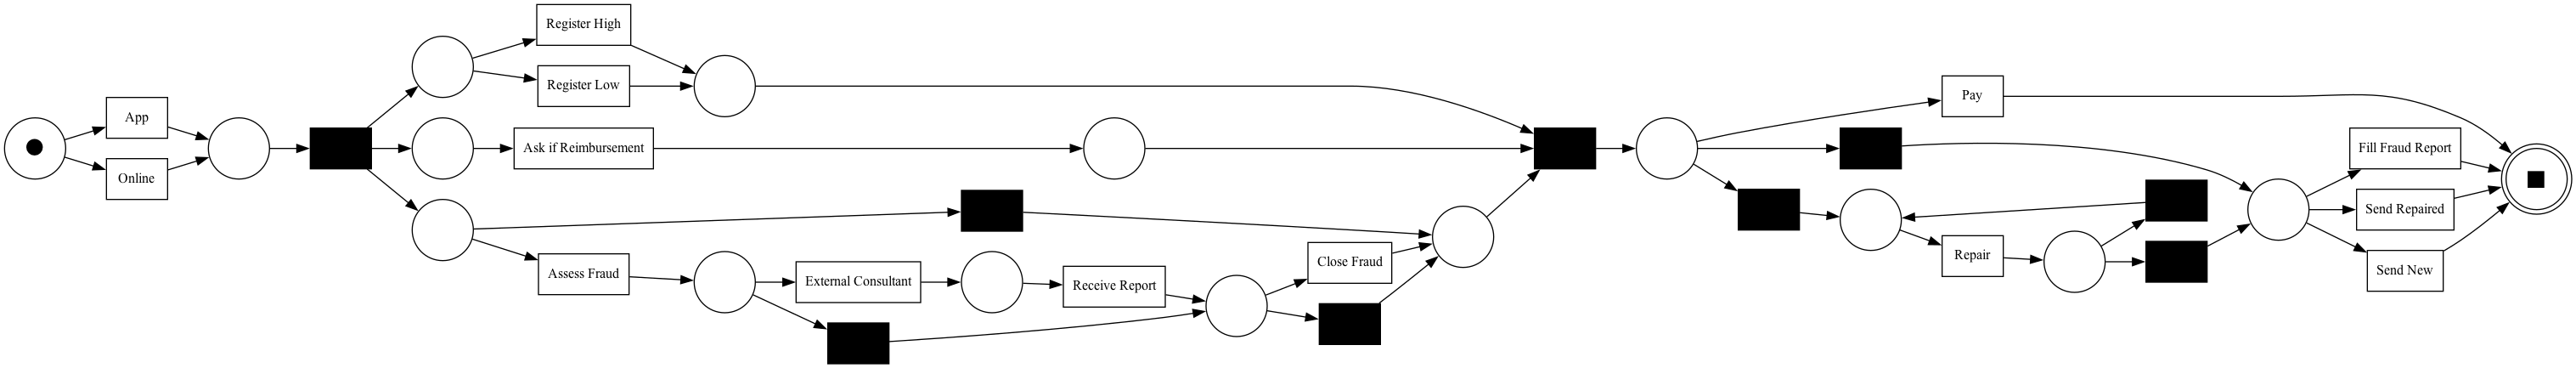

In [29]:
# your code
# The net, initial marking, and final marking
net, im, fm = pm4py.discover_petri_net_inductive(log)
pm4py.view_petri_net(net, im, fm, format='png') 

#### **b(ii)** 
Compute the fitness of the discovered Petri net using token-based replay.

*Hint: PM4Py can directly (using the top-level API) compute the number of missing, remaining, consumed, and produced tokens. Based on these, you can, for example, compute the token-based replay fitness.*

In [66]:
# your code
from pm4py.algo.conformance.tokenreplay import algorithm as token_based_replay
from pm4py.algo.evaluation.replay_fitness import algorithm as replay_fitness_evaluator

token_replay_result = token_based_replay.apply(log, net, im, fm)
display(token_replay_result[0])

fitness = replay_fitness_evaluator.apply(log, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
display(fitness)

replaying log with TBR, completed variants ::   0%|          | 0/266 [00:00<?, ?it/s]

{'trace_is_fit': True,
 'trace_fitness': 1.0,
 'activated_transitions': [(f5d7bd52-ee90-4a5a-a99f-0ee116e10380, 'Online'),
  (tauSplit_1, None),
  (bcb74110-b23f-4a6c-bc52-e393ab3194ed, 'Register Low'),
  (6fe2c1e9-91fa-4f7e-9d10-595044764ecd, 'Ask if Reimbursement'),
  (skip_3, None),
  (tauJoin_2, None),
  (4c4cfe99-1162-4284-b253-b0622af3da25, 'Pay')],
 'reached_marking': ['sink:1'],
 'enabled_transitions_in_marking': set(),
 'transitions_with_problems': [],
 'missing_tokens': 0,
 'consumed_tokens': 10,
 'remaining_tokens': 0,
 'produced_tokens': 10}

replaying log with TBR, completed variants ::   0%|          | 0/266 [00:00<?, ?it/s]

{'perc_fit_traces': 100.0,
 'average_trace_fitness': 1.0,
 'log_fitness': 1.0,
 'percentage_of_fitting_traces': 100.0}

In [59]:
# Computing the fitness of the discovered Petri net (at the log level)
token_replay_result =  pm4py.conformance_diagnostics_token_based_replay(log, net, im, fm)

for i in range(len(log)):
    print("the fitness of the case %d:" %i)
    display(token_replay_result[i]["trace_fitness"])

the fitness of the case 0:


1.0

the fitness of the case 1:


1.0

the fitness of the case 2:


1.0

the fitness of the case 3:


1.0

the fitness of the case 4:


1.0

the fitness of the case 5:


1.0

the fitness of the case 6:


1.0

the fitness of the case 7:


1.0

the fitness of the case 8:


1.0

the fitness of the case 9:


1.0

the fitness of the case 10:


1.0

the fitness of the case 11:


1.0

the fitness of the case 12:


1.0

the fitness of the case 13:


1.0

the fitness of the case 14:


1.0

the fitness of the case 15:


1.0

the fitness of the case 16:


1.0

the fitness of the case 17:


1.0

the fitness of the case 18:


1.0

the fitness of the case 19:


1.0

the fitness of the case 20:


1.0

the fitness of the case 21:


1.0

the fitness of the case 22:


1.0

the fitness of the case 23:


1.0

the fitness of the case 24:


1.0

the fitness of the case 25:


1.0

the fitness of the case 26:


1.0

the fitness of the case 27:


1.0

the fitness of the case 28:


1.0

the fitness of the case 29:


1.0

the fitness of the case 30:


1.0

the fitness of the case 31:


1.0

the fitness of the case 32:


1.0

the fitness of the case 33:


1.0

the fitness of the case 34:


1.0

the fitness of the case 35:


1.0

the fitness of the case 36:


1.0

the fitness of the case 37:


1.0

the fitness of the case 38:


1.0

the fitness of the case 39:


1.0

the fitness of the case 40:


1.0

the fitness of the case 41:


1.0

the fitness of the case 42:


1.0

the fitness of the case 43:


1.0

the fitness of the case 44:


1.0

the fitness of the case 45:


1.0

the fitness of the case 46:


1.0

the fitness of the case 47:


1.0

the fitness of the case 48:


1.0

the fitness of the case 49:


1.0

the fitness of the case 50:


1.0

the fitness of the case 51:


1.0

the fitness of the case 52:


1.0

the fitness of the case 53:


1.0

the fitness of the case 54:


1.0

the fitness of the case 55:


1.0

the fitness of the case 56:


1.0

the fitness of the case 57:


1.0

the fitness of the case 58:


1.0

the fitness of the case 59:


1.0

the fitness of the case 60:


1.0

the fitness of the case 61:


1.0

the fitness of the case 62:


1.0

the fitness of the case 63:


1.0

the fitness of the case 64:


1.0

the fitness of the case 65:


1.0

the fitness of the case 66:


1.0

the fitness of the case 67:


1.0

the fitness of the case 68:


1.0

the fitness of the case 69:


1.0

the fitness of the case 70:


1.0

the fitness of the case 71:


1.0

the fitness of the case 72:


1.0

the fitness of the case 73:


1.0

the fitness of the case 74:


1.0

the fitness of the case 75:


1.0

the fitness of the case 76:


1.0

the fitness of the case 77:


1.0

the fitness of the case 78:


1.0

the fitness of the case 79:


1.0

the fitness of the case 80:


1.0

the fitness of the case 81:


1.0

the fitness of the case 82:


1.0

the fitness of the case 83:


1.0

the fitness of the case 84:


1.0

the fitness of the case 85:


1.0

the fitness of the case 86:


1.0

the fitness of the case 87:


1.0

the fitness of the case 88:


1.0

the fitness of the case 89:


1.0

the fitness of the case 90:


1.0

the fitness of the case 91:


1.0

the fitness of the case 92:


1.0

the fitness of the case 93:


1.0

the fitness of the case 94:


1.0

the fitness of the case 95:


1.0

the fitness of the case 96:


1.0

the fitness of the case 97:


1.0

the fitness of the case 98:


1.0

the fitness of the case 99:


1.0

the fitness of the case 100:


1.0

the fitness of the case 101:


1.0

the fitness of the case 102:


1.0

the fitness of the case 103:


1.0

the fitness of the case 104:


1.0

the fitness of the case 105:


1.0

the fitness of the case 106:


1.0

the fitness of the case 107:


1.0

the fitness of the case 108:


1.0

the fitness of the case 109:


1.0

the fitness of the case 110:


1.0

the fitness of the case 111:


1.0

the fitness of the case 112:


1.0

the fitness of the case 113:


1.0

the fitness of the case 114:


1.0

the fitness of the case 115:


1.0

the fitness of the case 116:


1.0

the fitness of the case 117:


1.0

the fitness of the case 118:


1.0

the fitness of the case 119:


1.0

the fitness of the case 120:


1.0

the fitness of the case 121:


1.0

the fitness of the case 122:


1.0

the fitness of the case 123:


1.0

the fitness of the case 124:


1.0

the fitness of the case 125:


1.0

the fitness of the case 126:


1.0

the fitness of the case 127:


1.0

the fitness of the case 128:


1.0

the fitness of the case 129:


1.0

the fitness of the case 130:


1.0

the fitness of the case 131:


1.0

the fitness of the case 132:


1.0

the fitness of the case 133:


1.0

the fitness of the case 134:


1.0

the fitness of the case 135:


1.0

the fitness of the case 136:


1.0

the fitness of the case 137:


1.0

the fitness of the case 138:


1.0

the fitness of the case 139:


1.0

the fitness of the case 140:


1.0

the fitness of the case 141:


1.0

the fitness of the case 142:


1.0

the fitness of the case 143:


1.0

the fitness of the case 144:


1.0

the fitness of the case 145:


1.0

the fitness of the case 146:


1.0

the fitness of the case 147:


1.0

the fitness of the case 148:


1.0

the fitness of the case 149:


1.0

the fitness of the case 150:


1.0

the fitness of the case 151:


1.0

the fitness of the case 152:


1.0

the fitness of the case 153:


1.0

the fitness of the case 154:


1.0

the fitness of the case 155:


1.0

the fitness of the case 156:


1.0

the fitness of the case 157:


1.0

the fitness of the case 158:


1.0

the fitness of the case 159:


1.0

the fitness of the case 160:


1.0

the fitness of the case 161:


1.0

the fitness of the case 162:


1.0

the fitness of the case 163:


1.0

the fitness of the case 164:


1.0

the fitness of the case 165:


1.0

the fitness of the case 166:


1.0

the fitness of the case 167:


1.0

the fitness of the case 168:


1.0

the fitness of the case 169:


1.0

the fitness of the case 170:


1.0

the fitness of the case 171:


1.0

the fitness of the case 172:


1.0

the fitness of the case 173:


1.0

the fitness of the case 174:


1.0

the fitness of the case 175:


1.0

the fitness of the case 176:


1.0

the fitness of the case 177:


1.0

the fitness of the case 178:


1.0

the fitness of the case 179:


1.0

the fitness of the case 180:


1.0

the fitness of the case 181:


1.0

the fitness of the case 182:


1.0

the fitness of the case 183:


1.0

the fitness of the case 184:


1.0

the fitness of the case 185:


1.0

the fitness of the case 186:


1.0

the fitness of the case 187:


1.0

the fitness of the case 188:


1.0

the fitness of the case 189:


1.0

the fitness of the case 190:


1.0

the fitness of the case 191:


1.0

the fitness of the case 192:


1.0

the fitness of the case 193:


1.0

the fitness of the case 194:


1.0

the fitness of the case 195:


1.0

the fitness of the case 196:


1.0

the fitness of the case 197:


1.0

the fitness of the case 198:


1.0

the fitness of the case 199:


1.0

the fitness of the case 200:


1.0

the fitness of the case 201:


1.0

the fitness of the case 202:


1.0

the fitness of the case 203:


1.0

the fitness of the case 204:


1.0

the fitness of the case 205:


1.0

the fitness of the case 206:


1.0

the fitness of the case 207:


1.0

the fitness of the case 208:


1.0

the fitness of the case 209:


1.0

the fitness of the case 210:


1.0

the fitness of the case 211:


1.0

the fitness of the case 212:


1.0

the fitness of the case 213:


1.0

the fitness of the case 214:


1.0

the fitness of the case 215:


1.0

the fitness of the case 216:


1.0

the fitness of the case 217:


1.0

the fitness of the case 218:


1.0

the fitness of the case 219:


1.0

the fitness of the case 220:


1.0

the fitness of the case 221:


1.0

the fitness of the case 222:


1.0

the fitness of the case 223:


1.0

the fitness of the case 224:


1.0

the fitness of the case 225:


1.0

the fitness of the case 226:


1.0

the fitness of the case 227:


1.0

the fitness of the case 228:


1.0

the fitness of the case 229:


1.0

the fitness of the case 230:


1.0

the fitness of the case 231:


1.0

the fitness of the case 232:


1.0

the fitness of the case 233:


1.0

the fitness of the case 234:


1.0

the fitness of the case 235:


1.0

the fitness of the case 236:


1.0

the fitness of the case 237:


1.0

the fitness of the case 238:


1.0

the fitness of the case 239:


1.0

the fitness of the case 240:


1.0

the fitness of the case 241:


1.0

the fitness of the case 242:


1.0

the fitness of the case 243:


1.0

the fitness of the case 244:


1.0

the fitness of the case 245:


1.0

the fitness of the case 246:


1.0

the fitness of the case 247:


1.0

the fitness of the case 248:


1.0

the fitness of the case 249:


1.0

the fitness of the case 250:


1.0

the fitness of the case 251:


1.0

the fitness of the case 252:


1.0

the fitness of the case 253:


1.0

the fitness of the case 254:


1.0

the fitness of the case 255:


1.0

the fitness of the case 256:


1.0

the fitness of the case 257:


1.0

the fitness of the case 258:


1.0

the fitness of the case 259:


1.0

the fitness of the case 260:


1.0

the fitness of the case 261:


1.0

the fitness of the case 262:


1.0

the fitness of the case 263:


1.0

the fitness of the case 264:


1.0

the fitness of the case 265:


1.0

the fitness of the case 266:


1.0

the fitness of the case 267:


1.0

the fitness of the case 268:


1.0

the fitness of the case 269:


1.0

the fitness of the case 270:


1.0

the fitness of the case 271:


1.0

the fitness of the case 272:


1.0

the fitness of the case 273:


1.0

the fitness of the case 274:


1.0

the fitness of the case 275:


1.0

the fitness of the case 276:


1.0

the fitness of the case 277:


1.0

the fitness of the case 278:


1.0

the fitness of the case 279:


1.0

the fitness of the case 280:


1.0

the fitness of the case 281:


1.0

the fitness of the case 282:


1.0

the fitness of the case 283:


1.0

the fitness of the case 284:


1.0

the fitness of the case 285:


1.0

the fitness of the case 286:


1.0

the fitness of the case 287:


1.0

the fitness of the case 288:


1.0

the fitness of the case 289:


1.0

the fitness of the case 290:


1.0

the fitness of the case 291:


1.0

the fitness of the case 292:


1.0

the fitness of the case 293:


1.0

the fitness of the case 294:


1.0

the fitness of the case 295:


1.0

the fitness of the case 296:


1.0

the fitness of the case 297:


1.0

the fitness of the case 298:


1.0

the fitness of the case 299:


1.0

the fitness of the case 300:


1.0

the fitness of the case 301:


1.0

the fitness of the case 302:


1.0

the fitness of the case 303:


1.0

the fitness of the case 304:


1.0

the fitness of the case 305:


1.0

the fitness of the case 306:


1.0

the fitness of the case 307:


1.0

the fitness of the case 308:


1.0

the fitness of the case 309:


1.0

the fitness of the case 310:


1.0

the fitness of the case 311:


1.0

the fitness of the case 312:


1.0

the fitness of the case 313:


1.0

the fitness of the case 314:


1.0

the fitness of the case 315:


1.0

the fitness of the case 316:


1.0

the fitness of the case 317:


1.0

the fitness of the case 318:


1.0

the fitness of the case 319:


1.0

the fitness of the case 320:


1.0

the fitness of the case 321:


1.0

the fitness of the case 322:


1.0

the fitness of the case 323:


1.0

the fitness of the case 324:


1.0

the fitness of the case 325:


1.0

the fitness of the case 326:


1.0

the fitness of the case 327:


1.0

the fitness of the case 328:


1.0

the fitness of the case 329:


1.0

the fitness of the case 330:


1.0

the fitness of the case 331:


1.0

the fitness of the case 332:


1.0

the fitness of the case 333:


1.0

the fitness of the case 334:


1.0

the fitness of the case 335:


1.0

the fitness of the case 336:


1.0

the fitness of the case 337:


1.0

the fitness of the case 338:


1.0

the fitness of the case 339:


1.0

the fitness of the case 340:


1.0

the fitness of the case 341:


1.0

the fitness of the case 342:


1.0

the fitness of the case 343:


1.0

the fitness of the case 344:


1.0

the fitness of the case 345:


1.0

the fitness of the case 346:


1.0

the fitness of the case 347:


1.0

the fitness of the case 348:


1.0

the fitness of the case 349:


1.0

the fitness of the case 350:


1.0

the fitness of the case 351:


1.0

the fitness of the case 352:


1.0

the fitness of the case 353:


1.0

the fitness of the case 354:


1.0

the fitness of the case 355:


1.0

the fitness of the case 356:


1.0

the fitness of the case 357:


1.0

the fitness of the case 358:


1.0

the fitness of the case 359:


1.0

the fitness of the case 360:


1.0

the fitness of the case 361:


1.0

the fitness of the case 362:


1.0

the fitness of the case 363:


1.0

the fitness of the case 364:


1.0

the fitness of the case 365:


1.0

the fitness of the case 366:


1.0

the fitness of the case 367:


1.0

the fitness of the case 368:


1.0

the fitness of the case 369:


1.0

the fitness of the case 370:


1.0

the fitness of the case 371:


1.0

the fitness of the case 372:


1.0

the fitness of the case 373:


1.0

the fitness of the case 374:


1.0

the fitness of the case 375:


1.0

the fitness of the case 376:


1.0

the fitness of the case 377:


1.0

the fitness of the case 378:


1.0

the fitness of the case 379:


1.0

the fitness of the case 380:


1.0

the fitness of the case 381:


1.0

the fitness of the case 382:


1.0

the fitness of the case 383:


1.0

the fitness of the case 384:


1.0

the fitness of the case 385:


1.0

the fitness of the case 386:


1.0

the fitness of the case 387:


1.0

the fitness of the case 388:


1.0

the fitness of the case 389:


1.0

the fitness of the case 390:


1.0

the fitness of the case 391:


1.0

the fitness of the case 392:


1.0

the fitness of the case 393:


1.0

the fitness of the case 394:


1.0

the fitness of the case 395:


1.0

the fitness of the case 396:


1.0

the fitness of the case 397:


1.0

the fitness of the case 398:


1.0

the fitness of the case 399:


1.0

the fitness of the case 400:


1.0

the fitness of the case 401:


1.0

the fitness of the case 402:


1.0

the fitness of the case 403:


1.0

the fitness of the case 404:


1.0

the fitness of the case 405:


1.0

the fitness of the case 406:


1.0

the fitness of the case 407:


1.0

the fitness of the case 408:


1.0

the fitness of the case 409:


1.0

the fitness of the case 410:


1.0

the fitness of the case 411:


1.0

the fitness of the case 412:


1.0

the fitness of the case 413:


1.0

the fitness of the case 414:


1.0

the fitness of the case 415:


1.0

the fitness of the case 416:


1.0

the fitness of the case 417:


1.0

the fitness of the case 418:


1.0

the fitness of the case 419:


1.0

the fitness of the case 420:


1.0

the fitness of the case 421:


1.0

the fitness of the case 422:


1.0

the fitness of the case 423:


1.0

the fitness of the case 424:


1.0

the fitness of the case 425:


1.0

the fitness of the case 426:


1.0

the fitness of the case 427:


1.0

the fitness of the case 428:


1.0

the fitness of the case 429:


1.0

the fitness of the case 430:


1.0

the fitness of the case 431:


1.0

the fitness of the case 432:


1.0

the fitness of the case 433:


1.0

the fitness of the case 434:


1.0

the fitness of the case 435:


1.0

the fitness of the case 436:


1.0

the fitness of the case 437:


1.0

the fitness of the case 438:


1.0

the fitness of the case 439:


1.0

the fitness of the case 440:


1.0

the fitness of the case 441:


1.0

the fitness of the case 442:


1.0

the fitness of the case 443:


1.0

the fitness of the case 444:


1.0

the fitness of the case 445:


1.0

the fitness of the case 446:


1.0

the fitness of the case 447:


1.0

the fitness of the case 448:


1.0

the fitness of the case 449:


1.0

the fitness of the case 450:


1.0

the fitness of the case 451:


1.0

the fitness of the case 452:


1.0

the fitness of the case 453:


1.0

the fitness of the case 454:


1.0

the fitness of the case 455:


1.0

the fitness of the case 456:


1.0

the fitness of the case 457:


1.0

the fitness of the case 458:


1.0

the fitness of the case 459:


1.0

the fitness of the case 460:


1.0

the fitness of the case 461:


1.0

the fitness of the case 462:


1.0

the fitness of the case 463:


1.0

the fitness of the case 464:


1.0

the fitness of the case 465:


1.0

the fitness of the case 466:


1.0

the fitness of the case 467:


1.0

the fitness of the case 468:


1.0

the fitness of the case 469:


1.0

the fitness of the case 470:


1.0

the fitness of the case 471:


1.0

the fitness of the case 472:


1.0

the fitness of the case 473:


1.0

the fitness of the case 474:


1.0

the fitness of the case 475:


1.0

the fitness of the case 476:


1.0

the fitness of the case 477:


1.0

the fitness of the case 478:


1.0

the fitness of the case 479:


1.0

the fitness of the case 480:


1.0

the fitness of the case 481:


1.0

the fitness of the case 482:


1.0

the fitness of the case 483:


1.0

the fitness of the case 484:


1.0

the fitness of the case 485:


1.0

the fitness of the case 486:


1.0

the fitness of the case 487:


1.0

the fitness of the case 488:


1.0

the fitness of the case 489:


1.0

the fitness of the case 490:


1.0

the fitness of the case 491:


1.0

the fitness of the case 492:


1.0

the fitness of the case 493:


1.0

the fitness of the case 494:


1.0

the fitness of the case 495:


1.0

the fitness of the case 496:


1.0

the fitness of the case 497:


1.0

the fitness of the case 498:


1.0

the fitness of the case 499:


1.0

the fitness of the case 500:


1.0

the fitness of the case 501:


1.0

the fitness of the case 502:


1.0

the fitness of the case 503:


1.0

the fitness of the case 504:


1.0

the fitness of the case 505:


1.0

the fitness of the case 506:


1.0

the fitness of the case 507:


1.0

the fitness of the case 508:


1.0

the fitness of the case 509:


1.0

the fitness of the case 510:


1.0

the fitness of the case 511:


1.0

the fitness of the case 512:


1.0

the fitness of the case 513:


1.0

the fitness of the case 514:


1.0

the fitness of the case 515:


1.0

the fitness of the case 516:


1.0

the fitness of the case 517:


1.0

the fitness of the case 518:


1.0

the fitness of the case 519:


1.0

the fitness of the case 520:


1.0

the fitness of the case 521:


1.0

the fitness of the case 522:


1.0

the fitness of the case 523:


1.0

the fitness of the case 524:


1.0

the fitness of the case 525:


1.0

the fitness of the case 526:


1.0

the fitness of the case 527:


1.0

the fitness of the case 528:


1.0

the fitness of the case 529:


1.0

the fitness of the case 530:


1.0

the fitness of the case 531:


1.0

the fitness of the case 532:


1.0

the fitness of the case 533:


1.0

the fitness of the case 534:


1.0

the fitness of the case 535:


1.0

the fitness of the case 536:


1.0

the fitness of the case 537:


1.0

the fitness of the case 538:


1.0

the fitness of the case 539:


1.0

the fitness of the case 540:


1.0

the fitness of the case 541:


1.0

the fitness of the case 542:


1.0

the fitness of the case 543:


1.0

the fitness of the case 544:


1.0

the fitness of the case 545:


1.0

the fitness of the case 546:


1.0

the fitness of the case 547:


1.0

the fitness of the case 548:


1.0

the fitness of the case 549:


1.0

the fitness of the case 550:


1.0

the fitness of the case 551:


1.0

the fitness of the case 552:


1.0

the fitness of the case 553:


1.0

the fitness of the case 554:


1.0

the fitness of the case 555:


1.0

the fitness of the case 556:


1.0

the fitness of the case 557:


1.0

the fitness of the case 558:


1.0

the fitness of the case 559:


1.0

the fitness of the case 560:


1.0

the fitness of the case 561:


1.0

the fitness of the case 562:


1.0

the fitness of the case 563:


1.0

the fitness of the case 564:


1.0

the fitness of the case 565:


1.0

the fitness of the case 566:


1.0

the fitness of the case 567:


1.0

the fitness of the case 568:


1.0

the fitness of the case 569:


1.0

the fitness of the case 570:


1.0

the fitness of the case 571:


1.0

the fitness of the case 572:


1.0

the fitness of the case 573:


1.0

the fitness of the case 574:


1.0

the fitness of the case 575:


1.0

the fitness of the case 576:


1.0

the fitness of the case 577:


1.0

the fitness of the case 578:


1.0

the fitness of the case 579:


1.0

the fitness of the case 580:


1.0

the fitness of the case 581:


1.0

the fitness of the case 582:


1.0

the fitness of the case 583:


1.0

the fitness of the case 584:


1.0

the fitness of the case 585:


1.0

the fitness of the case 586:


1.0

the fitness of the case 587:


1.0

the fitness of the case 588:


1.0

the fitness of the case 589:


1.0

the fitness of the case 590:


1.0

the fitness of the case 591:


1.0

the fitness of the case 592:


1.0

the fitness of the case 593:


1.0

the fitness of the case 594:


1.0

the fitness of the case 595:


1.0

the fitness of the case 596:


1.0

the fitness of the case 597:


1.0

the fitness of the case 598:


1.0

the fitness of the case 599:


1.0

the fitness of the case 600:


1.0

the fitness of the case 601:


1.0

the fitness of the case 602:


1.0

the fitness of the case 603:


1.0

the fitness of the case 604:


1.0

the fitness of the case 605:


1.0

the fitness of the case 606:


1.0

the fitness of the case 607:


1.0

the fitness of the case 608:


1.0

the fitness of the case 609:


1.0

the fitness of the case 610:


1.0

the fitness of the case 611:


1.0

the fitness of the case 612:


1.0

the fitness of the case 613:


1.0

the fitness of the case 614:


1.0

the fitness of the case 615:


1.0

the fitness of the case 616:


1.0

the fitness of the case 617:


1.0

the fitness of the case 618:


1.0

the fitness of the case 619:


1.0

the fitness of the case 620:


1.0

the fitness of the case 621:


1.0

the fitness of the case 622:


1.0

the fitness of the case 623:


1.0

the fitness of the case 624:


1.0

the fitness of the case 625:


1.0

the fitness of the case 626:


1.0

the fitness of the case 627:


1.0

the fitness of the case 628:


1.0

the fitness of the case 629:


1.0

the fitness of the case 630:


1.0

the fitness of the case 631:


1.0

the fitness of the case 632:


1.0

the fitness of the case 633:


1.0

the fitness of the case 634:


1.0

the fitness of the case 635:


1.0

the fitness of the case 636:


1.0

the fitness of the case 637:


1.0

the fitness of the case 638:


1.0

the fitness of the case 639:


1.0

the fitness of the case 640:


1.0

the fitness of the case 641:


1.0

the fitness of the case 642:


1.0

the fitness of the case 643:


1.0

the fitness of the case 644:


1.0

the fitness of the case 645:


1.0

the fitness of the case 646:


1.0

the fitness of the case 647:


1.0

the fitness of the case 648:


1.0

the fitness of the case 649:


1.0

the fitness of the case 650:


1.0

the fitness of the case 651:


1.0

the fitness of the case 652:


1.0

the fitness of the case 653:


1.0

the fitness of the case 654:


1.0

the fitness of the case 655:


1.0

the fitness of the case 656:


1.0

the fitness of the case 657:


1.0

the fitness of the case 658:


1.0

the fitness of the case 659:


1.0

the fitness of the case 660:


1.0

the fitness of the case 661:


1.0

the fitness of the case 662:


1.0

the fitness of the case 663:


1.0

the fitness of the case 664:


1.0

the fitness of the case 665:


1.0

the fitness of the case 666:


1.0

the fitness of the case 667:


1.0

the fitness of the case 668:


1.0

the fitness of the case 669:


1.0

the fitness of the case 670:


1.0

the fitness of the case 671:


1.0

the fitness of the case 672:


1.0

the fitness of the case 673:


1.0

the fitness of the case 674:


1.0

the fitness of the case 675:


1.0

the fitness of the case 676:


1.0

the fitness of the case 677:


1.0

the fitness of the case 678:


1.0

the fitness of the case 679:


1.0

the fitness of the case 680:


1.0

the fitness of the case 681:


1.0

the fitness of the case 682:


1.0

the fitness of the case 683:


1.0

the fitness of the case 684:


1.0

the fitness of the case 685:


1.0

the fitness of the case 686:


1.0

the fitness of the case 687:


1.0

the fitness of the case 688:


1.0

the fitness of the case 689:


1.0

the fitness of the case 690:


1.0

the fitness of the case 691:


1.0

the fitness of the case 692:


1.0

the fitness of the case 693:


1.0

the fitness of the case 694:


1.0

the fitness of the case 695:


1.0

the fitness of the case 696:


1.0

the fitness of the case 697:


1.0

the fitness of the case 698:


1.0

the fitness of the case 699:


1.0

the fitness of the case 700:


1.0

the fitness of the case 701:


1.0

the fitness of the case 702:


1.0

the fitness of the case 703:


1.0

the fitness of the case 704:


1.0

the fitness of the case 705:


1.0

the fitness of the case 706:


1.0

the fitness of the case 707:


1.0

the fitness of the case 708:


1.0

the fitness of the case 709:


1.0

the fitness of the case 710:


1.0

the fitness of the case 711:


1.0

the fitness of the case 712:


1.0

the fitness of the case 713:


1.0

the fitness of the case 714:


1.0

the fitness of the case 715:


1.0

the fitness of the case 716:


1.0

the fitness of the case 717:


1.0

the fitness of the case 718:


1.0

the fitness of the case 719:


1.0

the fitness of the case 720:


1.0

the fitness of the case 721:


1.0

the fitness of the case 722:


1.0

the fitness of the case 723:


1.0

the fitness of the case 724:


1.0

the fitness of the case 725:


1.0

the fitness of the case 726:


1.0

the fitness of the case 727:


1.0

the fitness of the case 728:


1.0

the fitness of the case 729:


1.0

the fitness of the case 730:


1.0

the fitness of the case 731:


1.0

the fitness of the case 732:


1.0

the fitness of the case 733:


1.0

the fitness of the case 734:


1.0

the fitness of the case 735:


1.0

the fitness of the case 736:


1.0

the fitness of the case 737:


1.0

the fitness of the case 738:


1.0

the fitness of the case 739:


1.0

the fitness of the case 740:


1.0

the fitness of the case 741:


1.0

the fitness of the case 742:


1.0

the fitness of the case 743:


1.0

the fitness of the case 744:


1.0

the fitness of the case 745:


1.0

the fitness of the case 746:


1.0

the fitness of the case 747:


1.0

the fitness of the case 748:


1.0

the fitness of the case 749:


1.0

the fitness of the case 750:


1.0

the fitness of the case 751:


1.0

the fitness of the case 752:


1.0

the fitness of the case 753:


1.0

the fitness of the case 754:


1.0

the fitness of the case 755:


1.0

the fitness of the case 756:


1.0

the fitness of the case 757:


1.0

the fitness of the case 758:


1.0

the fitness of the case 759:


1.0

the fitness of the case 760:


1.0

the fitness of the case 761:


1.0

the fitness of the case 762:


1.0

the fitness of the case 763:


1.0

the fitness of the case 764:


1.0

the fitness of the case 765:


1.0

the fitness of the case 766:


1.0

the fitness of the case 767:


1.0

the fitness of the case 768:


1.0

the fitness of the case 769:


1.0

the fitness of the case 770:


1.0

the fitness of the case 771:


1.0

the fitness of the case 772:


1.0

the fitness of the case 773:


1.0

the fitness of the case 774:


1.0

the fitness of the case 775:


1.0

the fitness of the case 776:


1.0

the fitness of the case 777:


1.0

the fitness of the case 778:


1.0

the fitness of the case 779:


1.0

the fitness of the case 780:


1.0

the fitness of the case 781:


1.0

the fitness of the case 782:


1.0

the fitness of the case 783:


1.0

the fitness of the case 784:


1.0

the fitness of the case 785:


1.0

the fitness of the case 786:


1.0

the fitness of the case 787:


1.0

the fitness of the case 788:


1.0

the fitness of the case 789:


1.0

the fitness of the case 790:


1.0

the fitness of the case 791:


1.0

the fitness of the case 792:


1.0

the fitness of the case 793:


1.0

the fitness of the case 794:


1.0

the fitness of the case 795:


1.0

the fitness of the case 796:


1.0

the fitness of the case 797:


1.0

the fitness of the case 798:


1.0

the fitness of the case 799:


1.0

the fitness of the case 800:


1.0

the fitness of the case 801:


1.0

the fitness of the case 802:


1.0

the fitness of the case 803:


1.0

the fitness of the case 804:


1.0

the fitness of the case 805:


1.0

the fitness of the case 806:


1.0

the fitness of the case 807:


1.0

the fitness of the case 808:


1.0

the fitness of the case 809:


1.0

the fitness of the case 810:


1.0

the fitness of the case 811:


1.0

the fitness of the case 812:


1.0

the fitness of the case 813:


1.0

the fitness of the case 814:


1.0

the fitness of the case 815:


1.0

the fitness of the case 816:


1.0

the fitness of the case 817:


1.0

the fitness of the case 818:


1.0

the fitness of the case 819:


1.0

the fitness of the case 820:


1.0

the fitness of the case 821:


1.0

the fitness of the case 822:


1.0

the fitness of the case 823:


1.0

the fitness of the case 824:


1.0

the fitness of the case 825:


1.0

the fitness of the case 826:


1.0

the fitness of the case 827:


1.0

the fitness of the case 828:


1.0

the fitness of the case 829:


1.0

the fitness of the case 830:


1.0

the fitness of the case 831:


1.0

the fitness of the case 832:


1.0

the fitness of the case 833:


1.0

the fitness of the case 834:


1.0

the fitness of the case 835:


1.0

the fitness of the case 836:


1.0

the fitness of the case 837:


1.0

the fitness of the case 838:


1.0

the fitness of the case 839:


1.0

the fitness of the case 840:


1.0

the fitness of the case 841:


1.0

the fitness of the case 842:


1.0

the fitness of the case 843:


1.0

the fitness of the case 844:


1.0

the fitness of the case 845:


1.0

the fitness of the case 846:


1.0

the fitness of the case 847:


1.0

the fitness of the case 848:


1.0

the fitness of the case 849:


1.0

the fitness of the case 850:


1.0

the fitness of the case 851:


1.0

the fitness of the case 852:


1.0

the fitness of the case 853:


1.0

the fitness of the case 854:


1.0

the fitness of the case 855:


1.0

the fitness of the case 856:


1.0

the fitness of the case 857:


1.0

the fitness of the case 858:


1.0

the fitness of the case 859:


1.0

the fitness of the case 860:


1.0

the fitness of the case 861:


1.0

the fitness of the case 862:


1.0

the fitness of the case 863:


1.0

the fitness of the case 864:


1.0

the fitness of the case 865:


1.0

the fitness of the case 866:


1.0

the fitness of the case 867:


1.0

the fitness of the case 868:


1.0

the fitness of the case 869:


1.0

the fitness of the case 870:


1.0

the fitness of the case 871:


1.0

the fitness of the case 872:


1.0

the fitness of the case 873:


1.0

the fitness of the case 874:


1.0

the fitness of the case 875:


1.0

the fitness of the case 876:


1.0

the fitness of the case 877:


1.0

the fitness of the case 878:


1.0

the fitness of the case 879:


1.0

the fitness of the case 880:


1.0

the fitness of the case 881:


1.0

the fitness of the case 882:


1.0

the fitness of the case 883:


1.0

the fitness of the case 884:


1.0

the fitness of the case 885:


1.0

the fitness of the case 886:


1.0

the fitness of the case 887:


1.0

the fitness of the case 888:


1.0

the fitness of the case 889:


1.0

the fitness of the case 890:


1.0

the fitness of the case 891:


1.0

the fitness of the case 892:


1.0

the fitness of the case 893:


1.0

the fitness of the case 894:


1.0

the fitness of the case 895:


1.0

the fitness of the case 896:


1.0

the fitness of the case 897:


1.0

the fitness of the case 898:


1.0

the fitness of the case 899:


1.0

the fitness of the case 900:


1.0

the fitness of the case 901:


1.0

the fitness of the case 902:


1.0

the fitness of the case 903:


1.0

the fitness of the case 904:


1.0

the fitness of the case 905:


1.0

the fitness of the case 906:


1.0

the fitness of the case 907:


1.0

the fitness of the case 908:


1.0

the fitness of the case 909:


1.0

the fitness of the case 910:


1.0

the fitness of the case 911:


1.0

the fitness of the case 912:


1.0

the fitness of the case 913:


1.0

the fitness of the case 914:


1.0

the fitness of the case 915:


1.0

the fitness of the case 916:


1.0

the fitness of the case 917:


1.0

the fitness of the case 918:


1.0

the fitness of the case 919:


1.0

the fitness of the case 920:


1.0

the fitness of the case 921:


1.0

the fitness of the case 922:


1.0

the fitness of the case 923:


1.0

the fitness of the case 924:


1.0

the fitness of the case 925:


1.0

the fitness of the case 926:


1.0

the fitness of the case 927:


1.0

the fitness of the case 928:


1.0

the fitness of the case 929:


1.0

the fitness of the case 930:


1.0

the fitness of the case 931:


1.0

the fitness of the case 932:


1.0

the fitness of the case 933:


1.0

the fitness of the case 934:


1.0

the fitness of the case 935:


1.0

the fitness of the case 936:


1.0

the fitness of the case 937:


1.0

the fitness of the case 938:


1.0

the fitness of the case 939:


1.0

the fitness of the case 940:


1.0

the fitness of the case 941:


1.0

the fitness of the case 942:


1.0

the fitness of the case 943:


1.0

the fitness of the case 944:


1.0

the fitness of the case 945:


1.0

the fitness of the case 946:


1.0

the fitness of the case 947:


1.0

the fitness of the case 948:


1.0

the fitness of the case 949:


1.0

the fitness of the case 950:


1.0

the fitness of the case 951:


1.0

the fitness of the case 952:


1.0

the fitness of the case 953:


1.0

the fitness of the case 954:


1.0

the fitness of the case 955:


1.0

the fitness of the case 956:


1.0

the fitness of the case 957:


1.0

the fitness of the case 958:


1.0

the fitness of the case 959:


1.0

the fitness of the case 960:


1.0

the fitness of the case 961:


1.0

the fitness of the case 962:


1.0

the fitness of the case 963:


1.0

the fitness of the case 964:


1.0

the fitness of the case 965:


1.0

the fitness of the case 966:


1.0

the fitness of the case 967:


1.0

the fitness of the case 968:


1.0

the fitness of the case 969:


1.0

the fitness of the case 970:


1.0

the fitness of the case 971:


1.0

the fitness of the case 972:


1.0

the fitness of the case 973:


1.0

the fitness of the case 974:


1.0

the fitness of the case 975:


1.0

the fitness of the case 976:


1.0

the fitness of the case 977:


1.0

the fitness of the case 978:


1.0

the fitness of the case 979:


1.0

the fitness of the case 980:


1.0

the fitness of the case 981:


1.0

the fitness of the case 982:


1.0

the fitness of the case 983:


1.0

the fitness of the case 984:


1.0

the fitness of the case 985:


1.0

the fitness of the case 986:


1.0

the fitness of the case 987:


1.0

the fitness of the case 988:


1.0

the fitness of the case 989:


1.0

the fitness of the case 990:


1.0

the fitness of the case 991:


1.0

the fitness of the case 992:


1.0

the fitness of the case 993:


1.0

the fitness of the case 994:


1.0

the fitness of the case 995:


1.0

the fitness of the case 996:


1.0

the fitness of the case 997:


1.0

the fitness of the case 998:


1.0

the fitness of the case 999:


1.0

the fitness of the case 1000:


1.0

the fitness of the case 1001:


1.0

the fitness of the case 1002:


1.0

the fitness of the case 1003:


1.0

the fitness of the case 1004:


1.0

the fitness of the case 1005:


1.0

the fitness of the case 1006:


1.0

the fitness of the case 1007:


1.0

the fitness of the case 1008:


1.0

the fitness of the case 1009:


1.0

the fitness of the case 1010:


1.0

the fitness of the case 1011:


1.0

the fitness of the case 1012:


1.0

the fitness of the case 1013:


1.0

the fitness of the case 1014:


1.0

the fitness of the case 1015:


1.0

the fitness of the case 1016:


1.0

the fitness of the case 1017:


1.0

the fitness of the case 1018:


1.0

the fitness of the case 1019:


1.0

the fitness of the case 1020:


1.0

the fitness of the case 1021:


1.0

the fitness of the case 1022:


1.0

the fitness of the case 1023:


1.0

the fitness of the case 1024:


1.0

the fitness of the case 1025:


1.0

the fitness of the case 1026:


1.0

the fitness of the case 1027:


1.0

the fitness of the case 1028:


1.0

the fitness of the case 1029:


1.0

the fitness of the case 1030:


1.0

the fitness of the case 1031:


1.0

the fitness of the case 1032:


1.0

the fitness of the case 1033:


1.0

the fitness of the case 1034:


1.0

the fitness of the case 1035:


1.0

the fitness of the case 1036:


1.0

the fitness of the case 1037:


1.0

the fitness of the case 1038:


1.0

the fitness of the case 1039:


1.0

the fitness of the case 1040:


1.0

the fitness of the case 1041:


1.0

the fitness of the case 1042:


1.0

the fitness of the case 1043:


1.0

the fitness of the case 1044:


1.0

the fitness of the case 1045:


1.0

the fitness of the case 1046:


1.0

the fitness of the case 1047:


1.0

the fitness of the case 1048:


1.0

the fitness of the case 1049:


1.0

the fitness of the case 1050:


1.0

the fitness of the case 1051:


1.0

the fitness of the case 1052:


1.0

the fitness of the case 1053:


1.0

the fitness of the case 1054:


1.0

the fitness of the case 1055:


1.0

the fitness of the case 1056:


1.0

the fitness of the case 1057:


1.0

the fitness of the case 1058:


1.0

the fitness of the case 1059:


1.0

the fitness of the case 1060:


1.0

the fitness of the case 1061:


1.0

the fitness of the case 1062:


1.0

the fitness of the case 1063:


1.0

the fitness of the case 1064:


1.0

the fitness of the case 1065:


1.0

the fitness of the case 1066:


1.0

the fitness of the case 1067:


1.0

the fitness of the case 1068:


1.0

the fitness of the case 1069:


1.0

the fitness of the case 1070:


1.0

the fitness of the case 1071:


1.0

the fitness of the case 1072:


1.0

the fitness of the case 1073:


1.0

the fitness of the case 1074:


1.0

the fitness of the case 1075:


1.0

the fitness of the case 1076:


1.0

the fitness of the case 1077:


1.0

the fitness of the case 1078:


1.0

the fitness of the case 1079:


1.0

the fitness of the case 1080:


1.0

the fitness of the case 1081:


1.0

the fitness of the case 1082:


1.0

the fitness of the case 1083:


1.0

the fitness of the case 1084:


1.0

the fitness of the case 1085:


1.0

the fitness of the case 1086:


1.0

the fitness of the case 1087:


1.0

the fitness of the case 1088:


1.0

the fitness of the case 1089:


1.0

the fitness of the case 1090:


1.0

the fitness of the case 1091:


1.0

the fitness of the case 1092:


1.0

the fitness of the case 1093:


1.0

the fitness of the case 1094:


1.0

the fitness of the case 1095:


1.0

the fitness of the case 1096:


1.0

the fitness of the case 1097:


1.0

the fitness of the case 1098:


1.0

the fitness of the case 1099:


1.0

the fitness of the case 1100:


1.0

the fitness of the case 1101:


1.0

the fitness of the case 1102:


1.0

the fitness of the case 1103:


1.0

the fitness of the case 1104:


1.0

the fitness of the case 1105:


1.0

the fitness of the case 1106:


1.0

the fitness of the case 1107:


1.0

the fitness of the case 1108:


1.0

the fitness of the case 1109:


1.0

the fitness of the case 1110:


1.0

the fitness of the case 1111:


1.0

the fitness of the case 1112:


1.0

the fitness of the case 1113:


1.0

the fitness of the case 1114:


1.0

the fitness of the case 1115:


1.0

the fitness of the case 1116:


1.0

the fitness of the case 1117:


1.0

the fitness of the case 1118:


1.0

the fitness of the case 1119:


1.0

the fitness of the case 1120:


1.0

the fitness of the case 1121:


1.0

the fitness of the case 1122:


1.0

the fitness of the case 1123:


1.0

the fitness of the case 1124:


1.0

the fitness of the case 1125:


1.0

the fitness of the case 1126:


1.0

the fitness of the case 1127:


1.0

the fitness of the case 1128:


1.0

the fitness of the case 1129:


1.0

the fitness of the case 1130:


1.0

the fitness of the case 1131:


1.0

the fitness of the case 1132:


1.0

the fitness of the case 1133:


1.0

the fitness of the case 1134:


1.0

the fitness of the case 1135:


1.0

the fitness of the case 1136:


1.0

the fitness of the case 1137:


1.0

the fitness of the case 1138:


1.0

the fitness of the case 1139:


1.0

the fitness of the case 1140:


1.0

the fitness of the case 1141:


1.0

the fitness of the case 1142:


1.0

the fitness of the case 1143:


1.0

the fitness of the case 1144:


1.0

the fitness of the case 1145:


1.0

the fitness of the case 1146:


1.0

the fitness of the case 1147:


1.0

the fitness of the case 1148:


1.0

the fitness of the case 1149:


1.0

the fitness of the case 1150:


1.0

the fitness of the case 1151:


1.0

the fitness of the case 1152:


1.0

the fitness of the case 1153:


1.0

the fitness of the case 1154:


1.0

the fitness of the case 1155:


1.0

the fitness of the case 1156:


1.0

the fitness of the case 1157:


1.0

the fitness of the case 1158:


1.0

the fitness of the case 1159:


1.0

the fitness of the case 1160:


1.0

the fitness of the case 1161:


1.0

the fitness of the case 1162:


1.0

the fitness of the case 1163:


1.0

the fitness of the case 1164:


1.0

the fitness of the case 1165:


1.0

the fitness of the case 1166:


1.0

the fitness of the case 1167:


1.0

the fitness of the case 1168:


1.0

the fitness of the case 1169:


1.0

the fitness of the case 1170:


1.0

the fitness of the case 1171:


1.0

the fitness of the case 1172:


1.0

the fitness of the case 1173:


1.0

the fitness of the case 1174:


1.0

the fitness of the case 1175:


1.0

the fitness of the case 1176:


1.0

the fitness of the case 1177:


1.0

the fitness of the case 1178:


1.0

the fitness of the case 1179:


1.0

the fitness of the case 1180:


1.0

the fitness of the case 1181:


1.0

the fitness of the case 1182:


1.0

the fitness of the case 1183:


1.0

the fitness of the case 1184:


1.0

the fitness of the case 1185:


1.0

the fitness of the case 1186:


1.0

the fitness of the case 1187:


1.0

the fitness of the case 1188:


1.0

the fitness of the case 1189:


1.0

the fitness of the case 1190:


1.0

the fitness of the case 1191:


1.0

the fitness of the case 1192:


1.0

the fitness of the case 1193:


1.0

the fitness of the case 1194:


1.0

the fitness of the case 1195:


1.0

the fitness of the case 1196:


1.0

the fitness of the case 1197:


1.0

the fitness of the case 1198:


1.0

the fitness of the case 1199:


1.0

the fitness of the case 1200:


1.0

the fitness of the case 1201:


1.0

the fitness of the case 1202:


1.0

the fitness of the case 1203:


1.0

the fitness of the case 1204:


1.0

the fitness of the case 1205:


1.0

the fitness of the case 1206:


1.0

the fitness of the case 1207:


1.0

the fitness of the case 1208:


1.0

the fitness of the case 1209:


1.0

the fitness of the case 1210:


1.0

the fitness of the case 1211:


1.0

the fitness of the case 1212:


1.0

the fitness of the case 1213:


1.0

the fitness of the case 1214:


1.0

the fitness of the case 1215:


1.0

the fitness of the case 1216:


1.0

the fitness of the case 1217:


1.0

the fitness of the case 1218:


1.0

the fitness of the case 1219:


1.0

the fitness of the case 1220:


1.0

the fitness of the case 1221:


1.0

the fitness of the case 1222:


1.0

the fitness of the case 1223:


1.0

the fitness of the case 1224:


1.0

the fitness of the case 1225:


1.0

the fitness of the case 1226:


1.0

the fitness of the case 1227:


1.0

the fitness of the case 1228:


1.0

the fitness of the case 1229:


1.0

the fitness of the case 1230:


1.0

the fitness of the case 1231:


1.0

the fitness of the case 1232:


1.0

the fitness of the case 1233:


1.0

the fitness of the case 1234:


1.0

the fitness of the case 1235:


1.0

the fitness of the case 1236:


1.0

the fitness of the case 1237:


1.0

the fitness of the case 1238:


1.0

the fitness of the case 1239:


1.0

the fitness of the case 1240:


1.0

the fitness of the case 1241:


1.0

the fitness of the case 1242:


1.0

the fitness of the case 1243:


1.0

the fitness of the case 1244:


1.0

the fitness of the case 1245:


1.0

the fitness of the case 1246:


1.0

the fitness of the case 1247:


1.0

the fitness of the case 1248:


1.0

the fitness of the case 1249:


1.0

the fitness of the case 1250:


1.0

the fitness of the case 1251:


1.0

the fitness of the case 1252:


1.0

the fitness of the case 1253:


1.0

the fitness of the case 1254:


1.0

the fitness of the case 1255:


1.0

the fitness of the case 1256:


1.0

the fitness of the case 1257:


1.0

the fitness of the case 1258:


1.0

the fitness of the case 1259:


1.0

the fitness of the case 1260:


1.0

the fitness of the case 1261:


1.0

the fitness of the case 1262:


1.0

the fitness of the case 1263:


1.0

the fitness of the case 1264:


1.0

the fitness of the case 1265:


1.0

the fitness of the case 1266:


1.0

the fitness of the case 1267:


1.0

the fitness of the case 1268:


1.0

the fitness of the case 1269:


1.0

the fitness of the case 1270:


1.0

the fitness of the case 1271:


1.0

the fitness of the case 1272:


1.0

the fitness of the case 1273:


1.0

the fitness of the case 1274:


1.0

the fitness of the case 1275:


1.0

the fitness of the case 1276:


1.0

the fitness of the case 1277:


1.0

the fitness of the case 1278:


1.0

the fitness of the case 1279:


1.0

the fitness of the case 1280:


1.0

the fitness of the case 1281:


1.0

the fitness of the case 1282:


1.0

the fitness of the case 1283:


1.0

the fitness of the case 1284:


1.0

the fitness of the case 1285:


1.0

the fitness of the case 1286:


1.0

the fitness of the case 1287:


1.0

the fitness of the case 1288:


1.0

the fitness of the case 1289:


1.0

the fitness of the case 1290:


1.0

the fitness of the case 1291:


1.0

the fitness of the case 1292:


1.0

the fitness of the case 1293:


1.0

the fitness of the case 1294:


1.0

the fitness of the case 1295:


1.0

the fitness of the case 1296:


1.0

the fitness of the case 1297:


1.0

the fitness of the case 1298:


1.0

the fitness of the case 1299:


1.0

the fitness of the case 1300:


1.0

the fitness of the case 1301:


1.0

the fitness of the case 1302:


1.0

the fitness of the case 1303:


1.0

the fitness of the case 1304:


1.0

the fitness of the case 1305:


1.0

the fitness of the case 1306:


1.0

the fitness of the case 1307:


1.0

the fitness of the case 1308:


1.0

the fitness of the case 1309:


1.0

the fitness of the case 1310:


1.0

the fitness of the case 1311:


1.0

the fitness of the case 1312:


1.0

the fitness of the case 1313:


1.0

the fitness of the case 1314:


1.0

the fitness of the case 1315:


1.0

the fitness of the case 1316:


1.0

the fitness of the case 1317:


1.0

the fitness of the case 1318:


1.0

the fitness of the case 1319:


1.0

the fitness of the case 1320:


1.0

the fitness of the case 1321:


1.0

the fitness of the case 1322:


1.0

the fitness of the case 1323:


1.0

the fitness of the case 1324:


1.0

the fitness of the case 1325:


1.0

the fitness of the case 1326:


1.0

the fitness of the case 1327:


1.0

the fitness of the case 1328:


1.0

the fitness of the case 1329:


1.0

the fitness of the case 1330:


1.0

the fitness of the case 1331:


1.0

the fitness of the case 1332:


1.0

the fitness of the case 1333:


1.0

the fitness of the case 1334:


1.0

the fitness of the case 1335:


1.0

the fitness of the case 1336:


1.0

the fitness of the case 1337:


1.0

the fitness of the case 1338:


1.0

the fitness of the case 1339:


1.0

the fitness of the case 1340:


1.0

the fitness of the case 1341:


1.0

the fitness of the case 1342:


1.0

the fitness of the case 1343:


1.0

the fitness of the case 1344:


1.0

the fitness of the case 1345:


1.0

the fitness of the case 1346:


1.0

the fitness of the case 1347:


1.0

the fitness of the case 1348:


1.0

the fitness of the case 1349:


1.0

the fitness of the case 1350:


1.0

the fitness of the case 1351:


1.0

the fitness of the case 1352:


1.0

the fitness of the case 1353:


1.0

the fitness of the case 1354:


1.0

the fitness of the case 1355:


1.0

the fitness of the case 1356:


1.0

the fitness of the case 1357:


1.0

the fitness of the case 1358:


1.0

the fitness of the case 1359:


1.0

the fitness of the case 1360:


1.0

the fitness of the case 1361:


1.0

the fitness of the case 1362:


1.0

the fitness of the case 1363:


1.0

the fitness of the case 1364:


1.0

the fitness of the case 1365:


1.0

the fitness of the case 1366:


1.0

the fitness of the case 1367:


1.0

the fitness of the case 1368:


1.0

the fitness of the case 1369:


1.0

the fitness of the case 1370:


1.0

the fitness of the case 1371:


1.0

the fitness of the case 1372:


1.0

the fitness of the case 1373:


1.0

the fitness of the case 1374:


1.0

the fitness of the case 1375:


1.0

the fitness of the case 1376:


1.0

the fitness of the case 1377:


1.0

the fitness of the case 1378:


1.0

the fitness of the case 1379:


1.0

the fitness of the case 1380:


1.0

the fitness of the case 1381:


1.0

the fitness of the case 1382:


1.0

the fitness of the case 1383:


1.0

the fitness of the case 1384:


1.0

the fitness of the case 1385:


1.0

the fitness of the case 1386:


1.0

the fitness of the case 1387:


1.0

the fitness of the case 1388:


1.0

the fitness of the case 1389:


1.0

the fitness of the case 1390:


1.0

the fitness of the case 1391:


1.0

the fitness of the case 1392:


1.0

the fitness of the case 1393:


1.0

the fitness of the case 1394:


1.0

the fitness of the case 1395:


1.0

the fitness of the case 1396:


1.0

the fitness of the case 1397:


1.0

the fitness of the case 1398:


1.0

the fitness of the case 1399:


1.0

the fitness of the case 1400:


1.0

the fitness of the case 1401:


1.0

the fitness of the case 1402:


1.0

the fitness of the case 1403:


1.0

the fitness of the case 1404:


1.0

the fitness of the case 1405:


1.0

the fitness of the case 1406:


1.0

the fitness of the case 1407:


1.0

the fitness of the case 1408:


1.0

the fitness of the case 1409:


1.0

the fitness of the case 1410:


1.0

the fitness of the case 1411:


1.0

the fitness of the case 1412:


1.0

the fitness of the case 1413:


1.0

the fitness of the case 1414:


1.0

the fitness of the case 1415:


1.0

the fitness of the case 1416:


1.0

the fitness of the case 1417:


1.0

the fitness of the case 1418:


1.0

the fitness of the case 1419:


1.0

the fitness of the case 1420:


1.0

the fitness of the case 1421:


1.0

the fitness of the case 1422:


1.0

the fitness of the case 1423:


1.0

the fitness of the case 1424:


1.0

the fitness of the case 1425:


1.0

the fitness of the case 1426:


1.0

the fitness of the case 1427:


1.0

the fitness of the case 1428:


1.0

the fitness of the case 1429:


1.0

the fitness of the case 1430:


1.0

the fitness of the case 1431:


1.0

the fitness of the case 1432:


1.0

the fitness of the case 1433:


1.0

the fitness of the case 1434:


1.0

the fitness of the case 1435:


1.0

the fitness of the case 1436:


1.0

the fitness of the case 1437:


1.0

the fitness of the case 1438:


1.0

the fitness of the case 1439:


1.0

the fitness of the case 1440:


1.0

the fitness of the case 1441:


1.0

the fitness of the case 1442:


1.0

the fitness of the case 1443:


1.0

the fitness of the case 1444:


1.0

the fitness of the case 1445:


1.0

the fitness of the case 1446:


1.0

the fitness of the case 1447:


1.0

the fitness of the case 1448:


1.0

the fitness of the case 1449:


1.0

the fitness of the case 1450:


1.0

the fitness of the case 1451:


1.0

the fitness of the case 1452:


1.0

the fitness of the case 1453:


1.0

the fitness of the case 1454:


1.0

the fitness of the case 1455:


1.0

the fitness of the case 1456:


1.0

the fitness of the case 1457:


1.0

the fitness of the case 1458:


1.0

the fitness of the case 1459:


1.0

the fitness of the case 1460:


1.0

the fitness of the case 1461:


1.0

the fitness of the case 1462:


1.0

the fitness of the case 1463:


1.0

the fitness of the case 1464:


1.0

the fitness of the case 1465:


1.0

the fitness of the case 1466:


1.0

the fitness of the case 1467:


1.0

the fitness of the case 1468:


1.0

the fitness of the case 1469:


1.0

the fitness of the case 1470:


1.0

the fitness of the case 1471:


1.0

the fitness of the case 1472:


1.0

the fitness of the case 1473:


1.0

the fitness of the case 1474:


1.0

the fitness of the case 1475:


1.0

the fitness of the case 1476:


1.0

the fitness of the case 1477:


1.0

the fitness of the case 1478:


1.0

the fitness of the case 1479:


1.0

the fitness of the case 1480:


1.0

the fitness of the case 1481:


1.0

the fitness of the case 1482:


1.0

the fitness of the case 1483:


1.0

the fitness of the case 1484:


1.0

the fitness of the case 1485:


1.0

the fitness of the case 1486:


1.0

the fitness of the case 1487:


1.0

the fitness of the case 1488:


1.0

the fitness of the case 1489:


1.0

the fitness of the case 1490:


1.0

the fitness of the case 1491:


1.0

the fitness of the case 1492:


1.0

the fitness of the case 1493:


1.0

the fitness of the case 1494:


1.0

the fitness of the case 1495:


1.0

the fitness of the case 1496:


1.0

the fitness of the case 1497:


1.0

the fitness of the case 1498:


1.0

the fitness of the case 1499:


1.0

the fitness of the case 1500:


1.0

the fitness of the case 1501:


1.0

the fitness of the case 1502:


1.0

the fitness of the case 1503:


1.0

the fitness of the case 1504:


1.0

the fitness of the case 1505:


1.0

the fitness of the case 1506:


1.0

the fitness of the case 1507:


1.0

the fitness of the case 1508:


1.0

the fitness of the case 1509:


1.0

the fitness of the case 1510:


1.0

the fitness of the case 1511:


1.0

the fitness of the case 1512:


1.0

the fitness of the case 1513:


1.0

the fitness of the case 1514:


1.0

the fitness of the case 1515:


1.0

the fitness of the case 1516:


1.0

the fitness of the case 1517:


1.0

the fitness of the case 1518:


1.0

the fitness of the case 1519:


1.0

the fitness of the case 1520:


1.0

the fitness of the case 1521:


1.0

the fitness of the case 1522:


1.0

the fitness of the case 1523:


1.0

the fitness of the case 1524:


1.0

the fitness of the case 1525:


1.0

the fitness of the case 1526:


1.0

the fitness of the case 1527:


1.0

the fitness of the case 1528:


1.0

the fitness of the case 1529:


1.0

the fitness of the case 1530:


1.0

the fitness of the case 1531:


1.0

the fitness of the case 1532:


1.0

the fitness of the case 1533:


1.0

the fitness of the case 1534:


1.0

the fitness of the case 1535:


1.0

the fitness of the case 1536:


1.0

the fitness of the case 1537:


1.0

the fitness of the case 1538:


1.0

the fitness of the case 1539:


1.0

the fitness of the case 1540:


1.0

the fitness of the case 1541:


1.0

the fitness of the case 1542:


1.0

the fitness of the case 1543:


1.0

the fitness of the case 1544:


1.0

the fitness of the case 1545:


1.0

the fitness of the case 1546:


1.0

the fitness of the case 1547:


1.0

the fitness of the case 1548:


1.0

the fitness of the case 1549:


1.0

the fitness of the case 1550:


1.0

the fitness of the case 1551:


1.0

the fitness of the case 1552:


1.0

the fitness of the case 1553:


1.0

the fitness of the case 1554:


1.0

the fitness of the case 1555:


1.0

the fitness of the case 1556:


1.0

the fitness of the case 1557:


1.0

the fitness of the case 1558:


1.0

the fitness of the case 1559:


1.0

the fitness of the case 1560:


1.0

the fitness of the case 1561:


1.0

the fitness of the case 1562:


1.0

the fitness of the case 1563:


1.0

the fitness of the case 1564:


1.0

the fitness of the case 1565:


1.0

the fitness of the case 1566:


1.0

the fitness of the case 1567:


1.0

the fitness of the case 1568:


1.0

the fitness of the case 1569:


1.0

the fitness of the case 1570:


1.0

the fitness of the case 1571:


1.0

the fitness of the case 1572:


1.0

the fitness of the case 1573:


1.0

the fitness of the case 1574:


1.0

the fitness of the case 1575:


1.0

the fitness of the case 1576:


1.0

the fitness of the case 1577:


1.0

the fitness of the case 1578:


1.0

the fitness of the case 1579:


1.0

the fitness of the case 1580:


1.0

the fitness of the case 1581:


1.0

the fitness of the case 1582:


1.0

the fitness of the case 1583:


1.0

the fitness of the case 1584:


1.0

the fitness of the case 1585:


1.0

the fitness of the case 1586:


1.0

the fitness of the case 1587:


1.0

the fitness of the case 1588:


1.0

the fitness of the case 1589:


1.0

the fitness of the case 1590:


1.0

the fitness of the case 1591:


1.0

the fitness of the case 1592:


1.0

the fitness of the case 1593:


1.0

the fitness of the case 1594:


1.0

the fitness of the case 1595:


1.0

the fitness of the case 1596:


1.0

the fitness of the case 1597:


1.0

the fitness of the case 1598:


1.0

the fitness of the case 1599:


1.0

the fitness of the case 1600:


1.0

the fitness of the case 1601:


1.0

the fitness of the case 1602:


1.0

the fitness of the case 1603:


1.0

the fitness of the case 1604:


1.0

the fitness of the case 1605:


1.0

the fitness of the case 1606:


1.0

the fitness of the case 1607:


1.0

the fitness of the case 1608:


1.0

the fitness of the case 1609:


1.0

the fitness of the case 1610:


1.0

the fitness of the case 1611:


1.0

the fitness of the case 1612:


1.0

the fitness of the case 1613:


1.0

the fitness of the case 1614:


1.0

the fitness of the case 1615:


1.0

the fitness of the case 1616:


1.0

the fitness of the case 1617:


1.0

the fitness of the case 1618:


1.0

the fitness of the case 1619:


1.0

the fitness of the case 1620:


1.0

the fitness of the case 1621:


1.0

the fitness of the case 1622:


1.0

the fitness of the case 1623:


1.0

the fitness of the case 1624:


1.0

the fitness of the case 1625:


1.0

the fitness of the case 1626:


1.0

the fitness of the case 1627:


1.0

the fitness of the case 1628:


1.0

the fitness of the case 1629:


1.0

the fitness of the case 1630:


1.0

the fitness of the case 1631:


1.0

the fitness of the case 1632:


1.0

the fitness of the case 1633:


1.0

the fitness of the case 1634:


1.0

the fitness of the case 1635:


1.0

the fitness of the case 1636:


1.0

the fitness of the case 1637:


1.0

the fitness of the case 1638:


1.0

the fitness of the case 1639:


1.0

the fitness of the case 1640:


1.0

the fitness of the case 1641:


1.0

the fitness of the case 1642:


1.0

the fitness of the case 1643:


1.0

the fitness of the case 1644:


1.0

the fitness of the case 1645:


1.0

the fitness of the case 1646:


1.0

the fitness of the case 1647:


1.0

the fitness of the case 1648:


1.0

the fitness of the case 1649:


1.0

the fitness of the case 1650:


1.0

the fitness of the case 1651:


1.0

the fitness of the case 1652:


1.0

the fitness of the case 1653:


1.0

the fitness of the case 1654:


1.0

the fitness of the case 1655:


1.0

the fitness of the case 1656:


1.0

the fitness of the case 1657:


1.0

the fitness of the case 1658:


1.0

the fitness of the case 1659:


1.0

the fitness of the case 1660:


1.0

the fitness of the case 1661:


1.0

the fitness of the case 1662:


1.0

the fitness of the case 1663:


1.0

the fitness of the case 1664:


1.0

the fitness of the case 1665:


1.0

the fitness of the case 1666:


1.0

the fitness of the case 1667:


1.0

the fitness of the case 1668:


1.0

the fitness of the case 1669:


1.0

the fitness of the case 1670:


1.0

the fitness of the case 1671:


1.0

the fitness of the case 1672:


1.0

the fitness of the case 1673:


1.0

the fitness of the case 1674:


1.0

the fitness of the case 1675:


1.0

the fitness of the case 1676:


1.0

the fitness of the case 1677:


1.0

the fitness of the case 1678:


1.0

the fitness of the case 1679:


1.0

the fitness of the case 1680:


1.0

the fitness of the case 1681:


1.0

the fitness of the case 1682:


1.0

the fitness of the case 1683:


1.0

the fitness of the case 1684:


1.0

the fitness of the case 1685:


1.0

the fitness of the case 1686:


1.0

the fitness of the case 1687:


1.0

the fitness of the case 1688:


1.0

the fitness of the case 1689:


1.0

the fitness of the case 1690:


1.0

the fitness of the case 1691:


1.0

the fitness of the case 1692:


1.0

the fitness of the case 1693:


1.0

the fitness of the case 1694:


1.0

the fitness of the case 1695:


1.0

the fitness of the case 1696:


1.0

the fitness of the case 1697:


1.0

the fitness of the case 1698:


1.0

the fitness of the case 1699:


1.0

the fitness of the case 1700:


1.0

the fitness of the case 1701:


1.0

the fitness of the case 1702:


1.0

the fitness of the case 1703:


1.0

the fitness of the case 1704:


1.0

the fitness of the case 1705:


1.0

the fitness of the case 1706:


1.0

the fitness of the case 1707:


1.0

the fitness of the case 1708:


1.0

the fitness of the case 1709:


1.0

the fitness of the case 1710:


1.0

the fitness of the case 1711:


1.0

the fitness of the case 1712:


1.0

the fitness of the case 1713:


1.0

the fitness of the case 1714:


1.0

the fitness of the case 1715:


1.0

the fitness of the case 1716:


1.0

the fitness of the case 1717:


1.0

the fitness of the case 1718:


1.0

the fitness of the case 1719:


1.0

the fitness of the case 1720:


1.0

the fitness of the case 1721:


1.0

the fitness of the case 1722:


1.0

the fitness of the case 1723:


1.0

the fitness of the case 1724:


1.0

the fitness of the case 1725:


1.0

the fitness of the case 1726:


1.0

the fitness of the case 1727:


1.0

the fitness of the case 1728:


1.0

the fitness of the case 1729:


1.0

the fitness of the case 1730:


1.0

the fitness of the case 1731:


1.0

the fitness of the case 1732:


1.0

the fitness of the case 1733:


1.0

the fitness of the case 1734:


1.0

the fitness of the case 1735:


1.0

the fitness of the case 1736:


1.0

the fitness of the case 1737:


1.0

the fitness of the case 1738:


1.0

the fitness of the case 1739:


1.0

the fitness of the case 1740:


1.0

the fitness of the case 1741:


1.0

the fitness of the case 1742:


1.0

the fitness of the case 1743:


1.0

the fitness of the case 1744:


1.0

the fitness of the case 1745:


1.0

the fitness of the case 1746:


1.0

the fitness of the case 1747:


1.0

the fitness of the case 1748:


1.0

the fitness of the case 1749:


1.0

the fitness of the case 1750:


1.0

the fitness of the case 1751:


1.0

the fitness of the case 1752:


1.0

the fitness of the case 1753:


1.0

the fitness of the case 1754:


1.0

the fitness of the case 1755:


1.0

the fitness of the case 1756:


1.0

the fitness of the case 1757:


1.0

the fitness of the case 1758:


1.0

the fitness of the case 1759:


1.0

the fitness of the case 1760:


1.0

the fitness of the case 1761:


1.0

the fitness of the case 1762:


1.0

the fitness of the case 1763:


1.0

the fitness of the case 1764:


1.0

the fitness of the case 1765:


1.0

the fitness of the case 1766:


1.0

the fitness of the case 1767:


1.0

the fitness of the case 1768:


1.0

the fitness of the case 1769:


1.0

the fitness of the case 1770:


1.0

the fitness of the case 1771:


1.0

the fitness of the case 1772:


1.0

the fitness of the case 1773:


1.0

the fitness of the case 1774:


1.0

the fitness of the case 1775:


1.0

the fitness of the case 1776:


1.0

the fitness of the case 1777:


1.0

the fitness of the case 1778:


1.0

the fitness of the case 1779:


1.0

the fitness of the case 1780:


1.0

the fitness of the case 1781:


1.0

the fitness of the case 1782:


1.0

the fitness of the case 1783:


1.0

the fitness of the case 1784:


1.0

the fitness of the case 1785:


1.0

the fitness of the case 1786:


1.0

the fitness of the case 1787:


1.0

the fitness of the case 1788:


1.0

the fitness of the case 1789:


1.0

the fitness of the case 1790:


1.0

the fitness of the case 1791:


1.0

the fitness of the case 1792:


1.0

the fitness of the case 1793:


1.0

the fitness of the case 1794:


1.0

the fitness of the case 1795:


1.0

the fitness of the case 1796:


1.0

the fitness of the case 1797:


1.0

the fitness of the case 1798:


1.0

the fitness of the case 1799:


1.0

the fitness of the case 1800:


1.0

the fitness of the case 1801:


1.0

the fitness of the case 1802:


1.0

the fitness of the case 1803:


1.0

the fitness of the case 1804:


1.0

the fitness of the case 1805:


1.0

the fitness of the case 1806:


1.0

the fitness of the case 1807:


1.0

the fitness of the case 1808:


1.0

the fitness of the case 1809:


1.0

the fitness of the case 1810:


1.0

the fitness of the case 1811:


1.0

the fitness of the case 1812:


1.0

the fitness of the case 1813:


1.0

the fitness of the case 1814:


1.0

the fitness of the case 1815:


1.0

the fitness of the case 1816:


1.0

the fitness of the case 1817:


1.0

the fitness of the case 1818:


1.0

the fitness of the case 1819:


1.0

the fitness of the case 1820:


1.0

the fitness of the case 1821:


1.0

the fitness of the case 1822:


1.0

the fitness of the case 1823:


1.0

the fitness of the case 1824:


1.0

the fitness of the case 1825:


1.0

the fitness of the case 1826:


1.0

the fitness of the case 1827:


1.0

the fitness of the case 1828:


1.0

the fitness of the case 1829:


1.0

the fitness of the case 1830:


1.0

the fitness of the case 1831:


1.0

the fitness of the case 1832:


1.0

the fitness of the case 1833:


1.0

the fitness of the case 1834:


1.0

the fitness of the case 1835:


1.0

the fitness of the case 1836:


1.0

the fitness of the case 1837:


1.0

the fitness of the case 1838:


1.0

the fitness of the case 1839:


1.0

the fitness of the case 1840:


1.0

the fitness of the case 1841:


1.0

the fitness of the case 1842:


1.0

the fitness of the case 1843:


1.0

the fitness of the case 1844:


1.0

the fitness of the case 1845:


1.0

the fitness of the case 1846:


1.0

the fitness of the case 1847:


1.0

the fitness of the case 1848:


1.0

the fitness of the case 1849:


1.0

the fitness of the case 1850:


1.0

the fitness of the case 1851:


1.0

the fitness of the case 1852:


1.0

the fitness of the case 1853:


1.0

the fitness of the case 1854:


1.0

the fitness of the case 1855:


1.0

the fitness of the case 1856:


1.0

the fitness of the case 1857:


1.0

the fitness of the case 1858:


1.0

the fitness of the case 1859:


1.0

the fitness of the case 1860:


1.0

the fitness of the case 1861:


1.0

the fitness of the case 1862:


1.0

the fitness of the case 1863:


1.0

the fitness of the case 1864:


1.0

the fitness of the case 1865:


1.0

the fitness of the case 1866:


1.0

the fitness of the case 1867:


1.0

the fitness of the case 1868:


1.0

the fitness of the case 1869:


1.0

the fitness of the case 1870:


1.0

the fitness of the case 1871:


1.0

the fitness of the case 1872:


1.0

the fitness of the case 1873:


1.0

the fitness of the case 1874:


1.0

the fitness of the case 1875:


1.0

the fitness of the case 1876:


1.0

the fitness of the case 1877:


1.0

the fitness of the case 1878:


1.0

the fitness of the case 1879:


1.0

the fitness of the case 1880:


1.0

the fitness of the case 1881:


1.0

the fitness of the case 1882:


1.0

the fitness of the case 1883:


1.0

the fitness of the case 1884:


1.0

the fitness of the case 1885:


1.0

the fitness of the case 1886:


1.0

the fitness of the case 1887:


1.0

the fitness of the case 1888:


1.0

the fitness of the case 1889:


1.0

the fitness of the case 1890:


1.0

the fitness of the case 1891:


1.0

the fitness of the case 1892:


1.0

the fitness of the case 1893:


1.0

the fitness of the case 1894:


1.0

the fitness of the case 1895:


1.0

the fitness of the case 1896:


1.0

the fitness of the case 1897:


1.0

the fitness of the case 1898:


1.0

the fitness of the case 1899:


1.0

the fitness of the case 1900:


1.0

the fitness of the case 1901:


1.0

the fitness of the case 1902:


1.0

the fitness of the case 1903:


1.0

the fitness of the case 1904:


1.0

the fitness of the case 1905:


1.0

the fitness of the case 1906:


1.0

the fitness of the case 1907:


1.0

the fitness of the case 1908:


1.0

the fitness of the case 1909:


1.0

the fitness of the case 1910:


1.0

the fitness of the case 1911:


1.0

the fitness of the case 1912:


1.0

the fitness of the case 1913:


1.0

the fitness of the case 1914:


1.0

the fitness of the case 1915:


1.0

the fitness of the case 1916:


1.0

the fitness of the case 1917:


1.0

the fitness of the case 1918:


1.0

the fitness of the case 1919:


1.0

the fitness of the case 1920:


1.0

the fitness of the case 1921:


1.0

the fitness of the case 1922:


1.0

the fitness of the case 1923:


1.0

the fitness of the case 1924:


1.0

the fitness of the case 1925:


1.0

the fitness of the case 1926:


1.0

the fitness of the case 1927:


1.0

the fitness of the case 1928:


1.0

the fitness of the case 1929:


1.0

the fitness of the case 1930:


1.0

the fitness of the case 1931:


1.0

the fitness of the case 1932:


1.0

the fitness of the case 1933:


1.0

the fitness of the case 1934:


1.0

the fitness of the case 1935:


1.0

the fitness of the case 1936:


1.0

the fitness of the case 1937:


1.0

the fitness of the case 1938:


1.0

the fitness of the case 1939:


1.0

the fitness of the case 1940:


1.0

the fitness of the case 1941:


1.0

the fitness of the case 1942:


1.0

the fitness of the case 1943:


1.0

the fitness of the case 1944:


1.0

the fitness of the case 1945:


1.0

the fitness of the case 1946:


1.0

the fitness of the case 1947:


1.0

the fitness of the case 1948:


1.0

the fitness of the case 1949:


1.0

the fitness of the case 1950:


1.0

the fitness of the case 1951:


1.0

the fitness of the case 1952:


1.0

the fitness of the case 1953:


1.0

the fitness of the case 1954:


1.0

the fitness of the case 1955:


1.0

the fitness of the case 1956:


1.0

the fitness of the case 1957:


1.0

the fitness of the case 1958:


1.0

the fitness of the case 1959:


1.0

the fitness of the case 1960:


1.0

the fitness of the case 1961:


1.0

the fitness of the case 1962:


1.0

the fitness of the case 1963:


1.0

the fitness of the case 1964:


1.0

the fitness of the case 1965:


1.0

the fitness of the case 1966:


1.0

the fitness of the case 1967:


1.0

the fitness of the case 1968:


1.0

the fitness of the case 1969:


1.0

the fitness of the case 1970:


1.0

the fitness of the case 1971:


1.0

the fitness of the case 1972:


1.0

the fitness of the case 1973:


1.0

the fitness of the case 1974:


1.0

the fitness of the case 1975:


1.0

the fitness of the case 1976:


1.0

the fitness of the case 1977:


1.0

the fitness of the case 1978:


1.0

the fitness of the case 1979:


1.0

the fitness of the case 1980:


1.0

the fitness of the case 1981:


1.0

the fitness of the case 1982:


1.0

the fitness of the case 1983:


1.0

the fitness of the case 1984:


1.0

the fitness of the case 1985:


1.0

the fitness of the case 1986:


1.0

the fitness of the case 1987:


1.0

the fitness of the case 1988:


1.0

the fitness of the case 1989:


1.0

the fitness of the case 1990:


1.0

the fitness of the case 1991:


1.0

the fitness of the case 1992:


1.0

the fitness of the case 1993:


1.0

the fitness of the case 1994:


1.0

the fitness of the case 1995:


1.0

the fitness of the case 1996:


1.0

the fitness of the case 1997:


1.0

the fitness of the case 1998:


1.0

the fitness of the case 1999:


1.0

the fitness of the case 2000:


1.0

the fitness of the case 2001:


1.0

the fitness of the case 2002:


1.0

the fitness of the case 2003:


1.0

the fitness of the case 2004:


1.0

the fitness of the case 2005:


1.0

the fitness of the case 2006:


1.0

the fitness of the case 2007:


1.0

the fitness of the case 2008:


1.0

the fitness of the case 2009:


1.0

the fitness of the case 2010:


1.0

the fitness of the case 2011:


1.0

the fitness of the case 2012:


1.0

the fitness of the case 2013:


1.0

the fitness of the case 2014:


1.0

the fitness of the case 2015:


1.0

the fitness of the case 2016:


1.0

the fitness of the case 2017:


1.0

the fitness of the case 2018:


1.0

the fitness of the case 2019:


1.0

the fitness of the case 2020:


1.0

the fitness of the case 2021:


1.0

the fitness of the case 2022:


1.0

the fitness of the case 2023:


1.0

the fitness of the case 2024:


1.0

the fitness of the case 2025:


1.0

the fitness of the case 2026:


1.0

the fitness of the case 2027:


1.0

the fitness of the case 2028:


1.0

the fitness of the case 2029:


1.0

the fitness of the case 2030:


1.0

the fitness of the case 2031:


1.0

the fitness of the case 2032:


1.0

the fitness of the case 2033:


1.0

the fitness of the case 2034:


1.0

the fitness of the case 2035:


1.0

the fitness of the case 2036:


1.0

the fitness of the case 2037:


1.0

the fitness of the case 2038:


1.0

the fitness of the case 2039:


1.0

the fitness of the case 2040:


1.0

the fitness of the case 2041:


1.0

the fitness of the case 2042:


1.0

the fitness of the case 2043:


1.0

the fitness of the case 2044:


1.0

the fitness of the case 2045:


1.0

the fitness of the case 2046:


1.0

the fitness of the case 2047:


1.0

the fitness of the case 2048:


1.0

the fitness of the case 2049:


1.0

the fitness of the case 2050:


1.0

the fitness of the case 2051:


1.0

the fitness of the case 2052:


1.0

the fitness of the case 2053:


1.0

the fitness of the case 2054:


1.0

the fitness of the case 2055:


1.0

the fitness of the case 2056:


1.0

the fitness of the case 2057:


1.0

the fitness of the case 2058:


1.0

the fitness of the case 2059:


1.0

the fitness of the case 2060:


1.0

the fitness of the case 2061:


1.0

the fitness of the case 2062:


1.0

the fitness of the case 2063:


1.0

the fitness of the case 2064:


1.0

the fitness of the case 2065:


1.0

the fitness of the case 2066:


1.0

the fitness of the case 2067:


1.0

the fitness of the case 2068:


1.0

the fitness of the case 2069:


1.0

the fitness of the case 2070:


1.0

the fitness of the case 2071:


1.0

the fitness of the case 2072:


1.0

the fitness of the case 2073:


1.0

the fitness of the case 2074:


1.0

the fitness of the case 2075:


1.0

the fitness of the case 2076:


1.0

the fitness of the case 2077:


1.0

the fitness of the case 2078:


1.0

the fitness of the case 2079:


1.0

the fitness of the case 2080:


1.0

the fitness of the case 2081:


1.0

the fitness of the case 2082:


1.0

the fitness of the case 2083:


1.0

the fitness of the case 2084:


1.0

the fitness of the case 2085:


1.0

the fitness of the case 2086:


1.0

the fitness of the case 2087:


1.0

the fitness of the case 2088:


1.0

the fitness of the case 2089:


1.0

the fitness of the case 2090:


1.0

the fitness of the case 2091:


1.0

the fitness of the case 2092:


1.0

the fitness of the case 2093:


1.0

the fitness of the case 2094:


1.0

the fitness of the case 2095:


1.0

the fitness of the case 2096:


1.0

the fitness of the case 2097:


1.0

the fitness of the case 2098:


1.0

the fitness of the case 2099:


1.0

the fitness of the case 2100:


1.0

the fitness of the case 2101:


1.0

the fitness of the case 2102:


1.0

the fitness of the case 2103:


1.0

the fitness of the case 2104:


1.0

the fitness of the case 2105:


1.0

the fitness of the case 2106:


1.0

the fitness of the case 2107:


1.0

the fitness of the case 2108:


1.0

the fitness of the case 2109:


1.0

the fitness of the case 2110:


1.0

the fitness of the case 2111:


1.0

the fitness of the case 2112:


1.0

the fitness of the case 2113:


1.0

the fitness of the case 2114:


1.0

the fitness of the case 2115:


1.0

the fitness of the case 2116:


1.0

the fitness of the case 2117:


1.0

the fitness of the case 2118:


1.0

the fitness of the case 2119:


1.0

the fitness of the case 2120:


1.0

the fitness of the case 2121:


1.0

the fitness of the case 2122:


1.0

the fitness of the case 2123:


1.0

the fitness of the case 2124:


1.0

the fitness of the case 2125:


1.0

the fitness of the case 2126:


1.0

the fitness of the case 2127:


1.0

the fitness of the case 2128:


1.0

the fitness of the case 2129:


1.0

the fitness of the case 2130:


1.0

the fitness of the case 2131:


1.0

the fitness of the case 2132:


1.0

the fitness of the case 2133:


1.0

the fitness of the case 2134:


1.0

the fitness of the case 2135:


1.0

the fitness of the case 2136:


1.0

the fitness of the case 2137:


1.0

the fitness of the case 2138:


1.0

the fitness of the case 2139:


1.0

the fitness of the case 2140:


1.0

the fitness of the case 2141:


1.0

the fitness of the case 2142:


1.0

the fitness of the case 2143:


1.0

the fitness of the case 2144:


1.0

the fitness of the case 2145:


1.0

the fitness of the case 2146:


1.0

the fitness of the case 2147:


1.0

the fitness of the case 2148:


1.0

the fitness of the case 2149:


1.0

the fitness of the case 2150:


1.0

the fitness of the case 2151:


1.0

the fitness of the case 2152:


1.0

the fitness of the case 2153:


1.0

the fitness of the case 2154:


1.0

the fitness of the case 2155:


1.0

the fitness of the case 2156:


1.0

the fitness of the case 2157:


1.0

the fitness of the case 2158:


1.0

the fitness of the case 2159:


1.0

the fitness of the case 2160:


1.0

the fitness of the case 2161:


1.0

the fitness of the case 2162:


1.0

the fitness of the case 2163:


1.0

the fitness of the case 2164:


1.0

the fitness of the case 2165:


1.0

the fitness of the case 2166:


1.0

the fitness of the case 2167:


1.0

the fitness of the case 2168:


1.0

the fitness of the case 2169:


1.0

the fitness of the case 2170:


1.0

the fitness of the case 2171:


1.0

the fitness of the case 2172:


1.0

the fitness of the case 2173:


1.0

the fitness of the case 2174:


1.0

the fitness of the case 2175:


1.0

the fitness of the case 2176:


1.0

the fitness of the case 2177:


1.0

the fitness of the case 2178:


1.0

the fitness of the case 2179:


1.0

the fitness of the case 2180:


1.0

the fitness of the case 2181:


1.0

the fitness of the case 2182:


1.0

the fitness of the case 2183:


1.0

the fitness of the case 2184:


1.0

the fitness of the case 2185:


1.0

the fitness of the case 2186:


1.0

the fitness of the case 2187:


1.0

the fitness of the case 2188:


1.0

the fitness of the case 2189:


1.0

the fitness of the case 2190:


1.0

the fitness of the case 2191:


1.0

the fitness of the case 2192:


1.0

the fitness of the case 2193:


1.0

the fitness of the case 2194:


1.0

the fitness of the case 2195:


1.0

the fitness of the case 2196:


1.0

the fitness of the case 2197:


1.0

the fitness of the case 2198:


1.0

the fitness of the case 2199:


1.0

the fitness of the case 2200:


1.0

the fitness of the case 2201:


1.0

the fitness of the case 2202:


1.0

the fitness of the case 2203:


1.0

the fitness of the case 2204:


1.0

the fitness of the case 2205:


1.0

the fitness of the case 2206:


1.0

the fitness of the case 2207:


1.0

the fitness of the case 2208:


1.0

the fitness of the case 2209:


1.0

the fitness of the case 2210:


1.0

the fitness of the case 2211:


1.0

the fitness of the case 2212:


1.0

the fitness of the case 2213:


1.0

the fitness of the case 2214:


1.0

the fitness of the case 2215:


1.0

the fitness of the case 2216:


1.0

the fitness of the case 2217:


1.0

the fitness of the case 2218:


1.0

the fitness of the case 2219:


1.0

the fitness of the case 2220:


1.0

the fitness of the case 2221:


1.0

the fitness of the case 2222:


1.0

the fitness of the case 2223:


1.0

the fitness of the case 2224:


1.0

the fitness of the case 2225:


1.0

the fitness of the case 2226:


1.0

the fitness of the case 2227:


1.0

the fitness of the case 2228:


1.0

the fitness of the case 2229:


1.0

the fitness of the case 2230:


1.0

the fitness of the case 2231:


1.0

the fitness of the case 2232:


1.0

the fitness of the case 2233:


1.0

the fitness of the case 2234:


1.0

the fitness of the case 2235:


1.0

the fitness of the case 2236:


1.0

the fitness of the case 2237:


1.0

the fitness of the case 2238:


1.0

the fitness of the case 2239:


1.0

the fitness of the case 2240:


1.0

the fitness of the case 2241:


1.0

the fitness of the case 2242:


1.0

the fitness of the case 2243:


1.0

the fitness of the case 2244:


1.0

the fitness of the case 2245:


1.0

the fitness of the case 2246:


1.0

the fitness of the case 2247:


1.0

the fitness of the case 2248:


1.0

the fitness of the case 2249:


1.0

the fitness of the case 2250:


1.0

the fitness of the case 2251:


1.0

the fitness of the case 2252:


1.0

the fitness of the case 2253:


1.0

the fitness of the case 2254:


1.0

the fitness of the case 2255:


1.0

the fitness of the case 2256:


1.0

the fitness of the case 2257:


1.0

the fitness of the case 2258:


1.0

the fitness of the case 2259:


1.0

the fitness of the case 2260:


1.0

the fitness of the case 2261:


1.0

the fitness of the case 2262:


1.0

the fitness of the case 2263:


1.0

the fitness of the case 2264:


1.0

the fitness of the case 2265:


1.0

the fitness of the case 2266:


1.0

the fitness of the case 2267:


1.0

the fitness of the case 2268:


1.0

the fitness of the case 2269:


1.0

the fitness of the case 2270:


1.0

the fitness of the case 2271:


1.0

the fitness of the case 2272:


1.0

the fitness of the case 2273:


1.0

the fitness of the case 2274:


1.0

the fitness of the case 2275:


1.0

the fitness of the case 2276:


1.0

the fitness of the case 2277:


1.0

the fitness of the case 2278:


1.0

the fitness of the case 2279:


1.0

the fitness of the case 2280:


1.0

the fitness of the case 2281:


1.0

the fitness of the case 2282:


1.0

the fitness of the case 2283:


1.0

the fitness of the case 2284:


1.0

the fitness of the case 2285:


1.0

the fitness of the case 2286:


1.0

the fitness of the case 2287:


1.0

the fitness of the case 2288:


1.0

the fitness of the case 2289:


1.0

the fitness of the case 2290:


1.0

the fitness of the case 2291:


1.0

the fitness of the case 2292:


1.0

the fitness of the case 2293:


1.0

the fitness of the case 2294:


1.0

the fitness of the case 2295:


1.0

the fitness of the case 2296:


1.0

the fitness of the case 2297:


1.0

the fitness of the case 2298:


1.0

the fitness of the case 2299:


1.0

the fitness of the case 2300:


1.0

the fitness of the case 2301:


1.0

the fitness of the case 2302:


1.0

the fitness of the case 2303:


1.0

the fitness of the case 2304:


1.0

the fitness of the case 2305:


1.0

the fitness of the case 2306:


1.0

the fitness of the case 2307:


1.0

the fitness of the case 2308:


1.0

the fitness of the case 2309:


1.0

the fitness of the case 2310:


1.0

the fitness of the case 2311:


1.0

the fitness of the case 2312:


1.0

the fitness of the case 2313:


1.0

the fitness of the case 2314:


1.0

the fitness of the case 2315:


1.0

the fitness of the case 2316:


1.0

the fitness of the case 2317:


1.0

the fitness of the case 2318:


1.0

the fitness of the case 2319:


1.0

the fitness of the case 2320:


1.0

the fitness of the case 2321:


1.0

the fitness of the case 2322:


1.0

the fitness of the case 2323:


1.0

the fitness of the case 2324:


1.0

the fitness of the case 2325:


1.0

the fitness of the case 2326:


1.0

the fitness of the case 2327:


1.0

the fitness of the case 2328:


1.0

the fitness of the case 2329:


1.0

the fitness of the case 2330:


1.0

the fitness of the case 2331:


1.0

the fitness of the case 2332:


1.0

the fitness of the case 2333:


1.0

the fitness of the case 2334:


1.0

the fitness of the case 2335:


1.0

the fitness of the case 2336:


1.0

the fitness of the case 2337:


1.0

the fitness of the case 2338:


1.0

the fitness of the case 2339:


1.0

the fitness of the case 2340:


1.0

the fitness of the case 2341:


1.0

the fitness of the case 2342:


1.0

the fitness of the case 2343:


1.0

the fitness of the case 2344:


1.0

the fitness of the case 2345:


1.0

the fitness of the case 2346:


1.0

the fitness of the case 2347:


1.0

the fitness of the case 2348:


1.0

the fitness of the case 2349:


1.0

the fitness of the case 2350:


1.0

the fitness of the case 2351:


1.0

the fitness of the case 2352:


1.0

the fitness of the case 2353:


1.0

the fitness of the case 2354:


1.0

the fitness of the case 2355:


1.0

the fitness of the case 2356:


1.0

the fitness of the case 2357:


1.0

the fitness of the case 2358:


1.0

the fitness of the case 2359:


1.0

the fitness of the case 2360:


1.0

the fitness of the case 2361:


1.0

the fitness of the case 2362:


1.0

the fitness of the case 2363:


1.0

the fitness of the case 2364:


1.0

the fitness of the case 2365:


1.0

the fitness of the case 2366:


1.0

the fitness of the case 2367:


1.0

the fitness of the case 2368:


1.0

the fitness of the case 2369:


1.0

the fitness of the case 2370:


1.0

the fitness of the case 2371:


1.0

the fitness of the case 2372:


1.0

the fitness of the case 2373:


1.0

the fitness of the case 2374:


1.0

the fitness of the case 2375:


1.0

the fitness of the case 2376:


1.0

the fitness of the case 2377:


1.0

the fitness of the case 2378:


1.0

the fitness of the case 2379:


1.0

the fitness of the case 2380:


1.0

the fitness of the case 2381:


1.0

the fitness of the case 2382:


1.0

the fitness of the case 2383:


1.0

the fitness of the case 2384:


1.0

the fitness of the case 2385:


1.0

the fitness of the case 2386:


1.0

the fitness of the case 2387:


1.0

the fitness of the case 2388:


1.0

the fitness of the case 2389:


1.0

the fitness of the case 2390:


1.0

the fitness of the case 2391:


1.0

the fitness of the case 2392:


1.0

the fitness of the case 2393:


1.0

the fitness of the case 2394:


1.0

the fitness of the case 2395:


1.0

the fitness of the case 2396:


1.0

the fitness of the case 2397:


1.0

the fitness of the case 2398:


1.0

the fitness of the case 2399:


1.0

the fitness of the case 2400:


1.0

the fitness of the case 2401:


1.0

the fitness of the case 2402:


1.0

the fitness of the case 2403:


1.0

the fitness of the case 2404:


1.0

the fitness of the case 2405:


1.0

the fitness of the case 2406:


1.0

the fitness of the case 2407:


1.0

the fitness of the case 2408:


1.0

the fitness of the case 2409:


1.0

the fitness of the case 2410:


1.0

the fitness of the case 2411:


1.0

the fitness of the case 2412:


1.0

the fitness of the case 2413:


1.0

the fitness of the case 2414:


1.0

the fitness of the case 2415:


1.0

the fitness of the case 2416:


1.0

the fitness of the case 2417:


1.0

the fitness of the case 2418:


1.0

the fitness of the case 2419:


1.0

the fitness of the case 2420:


1.0

the fitness of the case 2421:


1.0

the fitness of the case 2422:


1.0

the fitness of the case 2423:


1.0

the fitness of the case 2424:


1.0

the fitness of the case 2425:


1.0

the fitness of the case 2426:


1.0

the fitness of the case 2427:


1.0

the fitness of the case 2428:


1.0

the fitness of the case 2429:


1.0

the fitness of the case 2430:


1.0

the fitness of the case 2431:


1.0

the fitness of the case 2432:


1.0

the fitness of the case 2433:


1.0

the fitness of the case 2434:


1.0

the fitness of the case 2435:


1.0

the fitness of the case 2436:


1.0

the fitness of the case 2437:


1.0

the fitness of the case 2438:


1.0

the fitness of the case 2439:


1.0

the fitness of the case 2440:


1.0

the fitness of the case 2441:


1.0

the fitness of the case 2442:


1.0

the fitness of the case 2443:


1.0

the fitness of the case 2444:


1.0

the fitness of the case 2445:


1.0

the fitness of the case 2446:


1.0

the fitness of the case 2447:


1.0

the fitness of the case 2448:


1.0

the fitness of the case 2449:


1.0

the fitness of the case 2450:


1.0

the fitness of the case 2451:


1.0

the fitness of the case 2452:


1.0

the fitness of the case 2453:


1.0

the fitness of the case 2454:


1.0

the fitness of the case 2455:


1.0

the fitness of the case 2456:


1.0

the fitness of the case 2457:


1.0

the fitness of the case 2458:


1.0

the fitness of the case 2459:


1.0

the fitness of the case 2460:


1.0

the fitness of the case 2461:


1.0

the fitness of the case 2462:


1.0

the fitness of the case 2463:


1.0

the fitness of the case 2464:


1.0

the fitness of the case 2465:


1.0

the fitness of the case 2466:


1.0

the fitness of the case 2467:


1.0

the fitness of the case 2468:


1.0

the fitness of the case 2469:


1.0

the fitness of the case 2470:


1.0

the fitness of the case 2471:


1.0

the fitness of the case 2472:


1.0

the fitness of the case 2473:


1.0

the fitness of the case 2474:


1.0

the fitness of the case 2475:


1.0

the fitness of the case 2476:


1.0

the fitness of the case 2477:


1.0

the fitness of the case 2478:


1.0

the fitness of the case 2479:


1.0

the fitness of the case 2480:


1.0

the fitness of the case 2481:


1.0

the fitness of the case 2482:


1.0

the fitness of the case 2483:


1.0

the fitness of the case 2484:


1.0

the fitness of the case 2485:


1.0

the fitness of the case 2486:


1.0

the fitness of the case 2487:


1.0

the fitness of the case 2488:


1.0

the fitness of the case 2489:


1.0

the fitness of the case 2490:


1.0

the fitness of the case 2491:


1.0

the fitness of the case 2492:


1.0

the fitness of the case 2493:


1.0

the fitness of the case 2494:


1.0

the fitness of the case 2495:


1.0

the fitness of the case 2496:


1.0

the fitness of the case 2497:


1.0

the fitness of the case 2498:


1.0

the fitness of the case 2499:


1.0

the fitness of the case 2500:


1.0

the fitness of the case 2501:


1.0

the fitness of the case 2502:


1.0

the fitness of the case 2503:


1.0

the fitness of the case 2504:


1.0

the fitness of the case 2505:


1.0

the fitness of the case 2506:


1.0

the fitness of the case 2507:


1.0

the fitness of the case 2508:


1.0

the fitness of the case 2509:


1.0

the fitness of the case 2510:


1.0

the fitness of the case 2511:


1.0

the fitness of the case 2512:


1.0

the fitness of the case 2513:


1.0

the fitness of the case 2514:


1.0

the fitness of the case 2515:


1.0

the fitness of the case 2516:


1.0

the fitness of the case 2517:


1.0

the fitness of the case 2518:


1.0

the fitness of the case 2519:


1.0

the fitness of the case 2520:


1.0

the fitness of the case 2521:


1.0

the fitness of the case 2522:


1.0

the fitness of the case 2523:


1.0

the fitness of the case 2524:


1.0

the fitness of the case 2525:


1.0

the fitness of the case 2526:


1.0

the fitness of the case 2527:


1.0

the fitness of the case 2528:


1.0

the fitness of the case 2529:


1.0

the fitness of the case 2530:


1.0

the fitness of the case 2531:


1.0

the fitness of the case 2532:


1.0

the fitness of the case 2533:


1.0

the fitness of the case 2534:


1.0

the fitness of the case 2535:


1.0

the fitness of the case 2536:


1.0

the fitness of the case 2537:


1.0

the fitness of the case 2538:


1.0

the fitness of the case 2539:


1.0

the fitness of the case 2540:


1.0

the fitness of the case 2541:


1.0

the fitness of the case 2542:


1.0

the fitness of the case 2543:


1.0

the fitness of the case 2544:


1.0

the fitness of the case 2545:


1.0

the fitness of the case 2546:


1.0

the fitness of the case 2547:


1.0

the fitness of the case 2548:


1.0

the fitness of the case 2549:


1.0

the fitness of the case 2550:


1.0

the fitness of the case 2551:


1.0

the fitness of the case 2552:


1.0

the fitness of the case 2553:


1.0

the fitness of the case 2554:


1.0

the fitness of the case 2555:


1.0

the fitness of the case 2556:


1.0

the fitness of the case 2557:


1.0

the fitness of the case 2558:


1.0

the fitness of the case 2559:


1.0

the fitness of the case 2560:


1.0

the fitness of the case 2561:


1.0

the fitness of the case 2562:


1.0

the fitness of the case 2563:


1.0

the fitness of the case 2564:


1.0

the fitness of the case 2565:


1.0

the fitness of the case 2566:


1.0

the fitness of the case 2567:


1.0

the fitness of the case 2568:


1.0

the fitness of the case 2569:


1.0

the fitness of the case 2570:


1.0

the fitness of the case 2571:


1.0

the fitness of the case 2572:


1.0

the fitness of the case 2573:


1.0

the fitness of the case 2574:


1.0

the fitness of the case 2575:


1.0

the fitness of the case 2576:


1.0

the fitness of the case 2577:


1.0

the fitness of the case 2578:


1.0

the fitness of the case 2579:


1.0

the fitness of the case 2580:


1.0

the fitness of the case 2581:


1.0

the fitness of the case 2582:


1.0

the fitness of the case 2583:


1.0

the fitness of the case 2584:


1.0

the fitness of the case 2585:


1.0

the fitness of the case 2586:


1.0

the fitness of the case 2587:


1.0

the fitness of the case 2588:


1.0

the fitness of the case 2589:


1.0

the fitness of the case 2590:


1.0

the fitness of the case 2591:


1.0

the fitness of the case 2592:


1.0

the fitness of the case 2593:


1.0

the fitness of the case 2594:


1.0

the fitness of the case 2595:


1.0

the fitness of the case 2596:


1.0

the fitness of the case 2597:


1.0

the fitness of the case 2598:


1.0

the fitness of the case 2599:


1.0

the fitness of the case 2600:


1.0

the fitness of the case 2601:


1.0

the fitness of the case 2602:


1.0

the fitness of the case 2603:


1.0

the fitness of the case 2604:


1.0

the fitness of the case 2605:


1.0

the fitness of the case 2606:


1.0

the fitness of the case 2607:


1.0

the fitness of the case 2608:


1.0

the fitness of the case 2609:


1.0

the fitness of the case 2610:


1.0

the fitness of the case 2611:


1.0

the fitness of the case 2612:


1.0

the fitness of the case 2613:


1.0

the fitness of the case 2614:


1.0

the fitness of the case 2615:


1.0

the fitness of the case 2616:


1.0

the fitness of the case 2617:


1.0

the fitness of the case 2618:


1.0

the fitness of the case 2619:


1.0

the fitness of the case 2620:


1.0

the fitness of the case 2621:


1.0

the fitness of the case 2622:


1.0

the fitness of the case 2623:


1.0

the fitness of the case 2624:


1.0

the fitness of the case 2625:


1.0

the fitness of the case 2626:


1.0

the fitness of the case 2627:


1.0

the fitness of the case 2628:


1.0

the fitness of the case 2629:


1.0

the fitness of the case 2630:


1.0

the fitness of the case 2631:


1.0

the fitness of the case 2632:


1.0

the fitness of the case 2633:


1.0

the fitness of the case 2634:


1.0

the fitness of the case 2635:


1.0

the fitness of the case 2636:


1.0

the fitness of the case 2637:


1.0

the fitness of the case 2638:


1.0

the fitness of the case 2639:


1.0

the fitness of the case 2640:


1.0

the fitness of the case 2641:


1.0

the fitness of the case 2642:


1.0

the fitness of the case 2643:


1.0

the fitness of the case 2644:


1.0

the fitness of the case 2645:


1.0

the fitness of the case 2646:


1.0

the fitness of the case 2647:


1.0

the fitness of the case 2648:


1.0

the fitness of the case 2649:


1.0

the fitness of the case 2650:


1.0

the fitness of the case 2651:


1.0

the fitness of the case 2652:


1.0

the fitness of the case 2653:


1.0

the fitness of the case 2654:


1.0

the fitness of the case 2655:


1.0

the fitness of the case 2656:


1.0

the fitness of the case 2657:


1.0

the fitness of the case 2658:


1.0

the fitness of the case 2659:


1.0

the fitness of the case 2660:


1.0

the fitness of the case 2661:


1.0

the fitness of the case 2662:


1.0

the fitness of the case 2663:


1.0

the fitness of the case 2664:


1.0

the fitness of the case 2665:


1.0

the fitness of the case 2666:


1.0

the fitness of the case 2667:


1.0

the fitness of the case 2668:


1.0

the fitness of the case 2669:


1.0

the fitness of the case 2670:


1.0

the fitness of the case 2671:


1.0

the fitness of the case 2672:


1.0

the fitness of the case 2673:


1.0

the fitness of the case 2674:


1.0

the fitness of the case 2675:


1.0

the fitness of the case 2676:


1.0

the fitness of the case 2677:


1.0

the fitness of the case 2678:


1.0

the fitness of the case 2679:


1.0

the fitness of the case 2680:


1.0

the fitness of the case 2681:


1.0

the fitness of the case 2682:


1.0

the fitness of the case 2683:


1.0

the fitness of the case 2684:


1.0

the fitness of the case 2685:


1.0

the fitness of the case 2686:


1.0

the fitness of the case 2687:


1.0

the fitness of the case 2688:


1.0

the fitness of the case 2689:


1.0

the fitness of the case 2690:


1.0

the fitness of the case 2691:


1.0

the fitness of the case 2692:


1.0

the fitness of the case 2693:


1.0

the fitness of the case 2694:


1.0

the fitness of the case 2695:


1.0

the fitness of the case 2696:


1.0

the fitness of the case 2697:


1.0

the fitness of the case 2698:


1.0

the fitness of the case 2699:


1.0

the fitness of the case 2700:


1.0

the fitness of the case 2701:


1.0

the fitness of the case 2702:


1.0

the fitness of the case 2703:


1.0

the fitness of the case 2704:


1.0

the fitness of the case 2705:


1.0

the fitness of the case 2706:


1.0

the fitness of the case 2707:


1.0

the fitness of the case 2708:


1.0

the fitness of the case 2709:


1.0

the fitness of the case 2710:


1.0

the fitness of the case 2711:


1.0

the fitness of the case 2712:


1.0

the fitness of the case 2713:


1.0

the fitness of the case 2714:


1.0

the fitness of the case 2715:


1.0

the fitness of the case 2716:


1.0

the fitness of the case 2717:


1.0

the fitness of the case 2718:


1.0

the fitness of the case 2719:


1.0

the fitness of the case 2720:


1.0

the fitness of the case 2721:


1.0

the fitness of the case 2722:


1.0

the fitness of the case 2723:


1.0

the fitness of the case 2724:


1.0

the fitness of the case 2725:


1.0

the fitness of the case 2726:


1.0

the fitness of the case 2727:


1.0

the fitness of the case 2728:


1.0

the fitness of the case 2729:


1.0

the fitness of the case 2730:


1.0

the fitness of the case 2731:


1.0

the fitness of the case 2732:


1.0

the fitness of the case 2733:


1.0

the fitness of the case 2734:


1.0

the fitness of the case 2735:


1.0

the fitness of the case 2736:


1.0

the fitness of the case 2737:


1.0

the fitness of the case 2738:


1.0

the fitness of the case 2739:


1.0

the fitness of the case 2740:


1.0

the fitness of the case 2741:


1.0

the fitness of the case 2742:


1.0

the fitness of the case 2743:


1.0

the fitness of the case 2744:


1.0

the fitness of the case 2745:


1.0

the fitness of the case 2746:


1.0

the fitness of the case 2747:


1.0

the fitness of the case 2748:


1.0

the fitness of the case 2749:


1.0

the fitness of the case 2750:


1.0

the fitness of the case 2751:


1.0

the fitness of the case 2752:


1.0

the fitness of the case 2753:


1.0

the fitness of the case 2754:


1.0

the fitness of the case 2755:


1.0

the fitness of the case 2756:


1.0

the fitness of the case 2757:


1.0

the fitness of the case 2758:


1.0

the fitness of the case 2759:


1.0

the fitness of the case 2760:


1.0

the fitness of the case 2761:


1.0

the fitness of the case 2762:


1.0

the fitness of the case 2763:


1.0

the fitness of the case 2764:


1.0

the fitness of the case 2765:


1.0

the fitness of the case 2766:


1.0

the fitness of the case 2767:


1.0

the fitness of the case 2768:


1.0

the fitness of the case 2769:


1.0

the fitness of the case 2770:


1.0

the fitness of the case 2771:


1.0

the fitness of the case 2772:


1.0

the fitness of the case 2773:


1.0

the fitness of the case 2774:


1.0

the fitness of the case 2775:


1.0

the fitness of the case 2776:


1.0

the fitness of the case 2777:


1.0

the fitness of the case 2778:


1.0

the fitness of the case 2779:


1.0

the fitness of the case 2780:


1.0

the fitness of the case 2781:


1.0

the fitness of the case 2782:


1.0

the fitness of the case 2783:


1.0

the fitness of the case 2784:


1.0

the fitness of the case 2785:


1.0

the fitness of the case 2786:


1.0

the fitness of the case 2787:


1.0

the fitness of the case 2788:


1.0

the fitness of the case 2789:


1.0

the fitness of the case 2790:


1.0

the fitness of the case 2791:


1.0

the fitness of the case 2792:


1.0

the fitness of the case 2793:


1.0

the fitness of the case 2794:


1.0

the fitness of the case 2795:


1.0

the fitness of the case 2796:


1.0

the fitness of the case 2797:


1.0

the fitness of the case 2798:


1.0

the fitness of the case 2799:


1.0

the fitness of the case 2800:


1.0

the fitness of the case 2801:


1.0

the fitness of the case 2802:


1.0

the fitness of the case 2803:


1.0

the fitness of the case 2804:


1.0

the fitness of the case 2805:


1.0

the fitness of the case 2806:


1.0

the fitness of the case 2807:


1.0

the fitness of the case 2808:


1.0

the fitness of the case 2809:


1.0

the fitness of the case 2810:


1.0

the fitness of the case 2811:


1.0

the fitness of the case 2812:


1.0

the fitness of the case 2813:


1.0

the fitness of the case 2814:


1.0

the fitness of the case 2815:


1.0

the fitness of the case 2816:


1.0

the fitness of the case 2817:


1.0

the fitness of the case 2818:


1.0

the fitness of the case 2819:


1.0

the fitness of the case 2820:


1.0

the fitness of the case 2821:


1.0

the fitness of the case 2822:


1.0

the fitness of the case 2823:


1.0

the fitness of the case 2824:


1.0

the fitness of the case 2825:


1.0

the fitness of the case 2826:


1.0

the fitness of the case 2827:


1.0

the fitness of the case 2828:


1.0

the fitness of the case 2829:


1.0

the fitness of the case 2830:


1.0

the fitness of the case 2831:


1.0

the fitness of the case 2832:


1.0

the fitness of the case 2833:


1.0

the fitness of the case 2834:


1.0

the fitness of the case 2835:


1.0

the fitness of the case 2836:


1.0

the fitness of the case 2837:


1.0

the fitness of the case 2838:


1.0

the fitness of the case 2839:


1.0

the fitness of the case 2840:


1.0

the fitness of the case 2841:


1.0

the fitness of the case 2842:


1.0

the fitness of the case 2843:


1.0

the fitness of the case 2844:


1.0

the fitness of the case 2845:


1.0

the fitness of the case 2846:


1.0

the fitness of the case 2847:


1.0

the fitness of the case 2848:


1.0

the fitness of the case 2849:


1.0

the fitness of the case 2850:


1.0

the fitness of the case 2851:


1.0

the fitness of the case 2852:


1.0

the fitness of the case 2853:


1.0

the fitness of the case 2854:


1.0

the fitness of the case 2855:


1.0

the fitness of the case 2856:


1.0

the fitness of the case 2857:


1.0

the fitness of the case 2858:


1.0

the fitness of the case 2859:


1.0

the fitness of the case 2860:


1.0

the fitness of the case 2861:


1.0

the fitness of the case 2862:


1.0

the fitness of the case 2863:


1.0

the fitness of the case 2864:


1.0

the fitness of the case 2865:


1.0

the fitness of the case 2866:


1.0

the fitness of the case 2867:


1.0

the fitness of the case 2868:


1.0

the fitness of the case 2869:


1.0

the fitness of the case 2870:


1.0

the fitness of the case 2871:


1.0

the fitness of the case 2872:


1.0

the fitness of the case 2873:


1.0

the fitness of the case 2874:


1.0

the fitness of the case 2875:


1.0

the fitness of the case 2876:


1.0

the fitness of the case 2877:


1.0

the fitness of the case 2878:


1.0

the fitness of the case 2879:


1.0

the fitness of the case 2880:


1.0

the fitness of the case 2881:


1.0

the fitness of the case 2882:


1.0

the fitness of the case 2883:


1.0

the fitness of the case 2884:


1.0

the fitness of the case 2885:


1.0

the fitness of the case 2886:


1.0

the fitness of the case 2887:


1.0

the fitness of the case 2888:


1.0

the fitness of the case 2889:


1.0

the fitness of the case 2890:


1.0

the fitness of the case 2891:


1.0

the fitness of the case 2892:


1.0

the fitness of the case 2893:


1.0

the fitness of the case 2894:


1.0

the fitness of the case 2895:


1.0

the fitness of the case 2896:


1.0

the fitness of the case 2897:


1.0

the fitness of the case 2898:


1.0

the fitness of the case 2899:


1.0

the fitness of the case 2900:


1.0

the fitness of the case 2901:


1.0

the fitness of the case 2902:


1.0

the fitness of the case 2903:


1.0

the fitness of the case 2904:


1.0

the fitness of the case 2905:


1.0

the fitness of the case 2906:


1.0

the fitness of the case 2907:


1.0

the fitness of the case 2908:


1.0

the fitness of the case 2909:


1.0

the fitness of the case 2910:


1.0

the fitness of the case 2911:


1.0

the fitness of the case 2912:


1.0

the fitness of the case 2913:


1.0

the fitness of the case 2914:


1.0

the fitness of the case 2915:


1.0

the fitness of the case 2916:


1.0

the fitness of the case 2917:


1.0

the fitness of the case 2918:


1.0

the fitness of the case 2919:


1.0

the fitness of the case 2920:


1.0

the fitness of the case 2921:


1.0

the fitness of the case 2922:


1.0

the fitness of the case 2923:


1.0

the fitness of the case 2924:


1.0

the fitness of the case 2925:


1.0

the fitness of the case 2926:


1.0

the fitness of the case 2927:


1.0

the fitness of the case 2928:


1.0

the fitness of the case 2929:


1.0

the fitness of the case 2930:


1.0

the fitness of the case 2931:


1.0

the fitness of the case 2932:


1.0

the fitness of the case 2933:


1.0

the fitness of the case 2934:


1.0

the fitness of the case 2935:


1.0

the fitness of the case 2936:


1.0

the fitness of the case 2937:


1.0

the fitness of the case 2938:


1.0

the fitness of the case 2939:


1.0

the fitness of the case 2940:


1.0

the fitness of the case 2941:


1.0

the fitness of the case 2942:


1.0

the fitness of the case 2943:


1.0

the fitness of the case 2944:


1.0

the fitness of the case 2945:


1.0

the fitness of the case 2946:


1.0

the fitness of the case 2947:


1.0

the fitness of the case 2948:


1.0

the fitness of the case 2949:


1.0

the fitness of the case 2950:


1.0

the fitness of the case 2951:


1.0

the fitness of the case 2952:


1.0

the fitness of the case 2953:


1.0

the fitness of the case 2954:


1.0

the fitness of the case 2955:


1.0

the fitness of the case 2956:


1.0

the fitness of the case 2957:


1.0

the fitness of the case 2958:


1.0

the fitness of the case 2959:


1.0

the fitness of the case 2960:


1.0

the fitness of the case 2961:


1.0

the fitness of the case 2962:


1.0

the fitness of the case 2963:


1.0

the fitness of the case 2964:


1.0

the fitness of the case 2965:


1.0

the fitness of the case 2966:


1.0

the fitness of the case 2967:


1.0

the fitness of the case 2968:


1.0

the fitness of the case 2969:


1.0

the fitness of the case 2970:


1.0

the fitness of the case 2971:


1.0

the fitness of the case 2972:


1.0

the fitness of the case 2973:


1.0

the fitness of the case 2974:


1.0

the fitness of the case 2975:


1.0

the fitness of the case 2976:


1.0

the fitness of the case 2977:


1.0

the fitness of the case 2978:


1.0

the fitness of the case 2979:


1.0

the fitness of the case 2980:


1.0

the fitness of the case 2981:


1.0

the fitness of the case 2982:


1.0

the fitness of the case 2983:


1.0

the fitness of the case 2984:


1.0

the fitness of the case 2985:


1.0

the fitness of the case 2986:


1.0

the fitness of the case 2987:


1.0

the fitness of the case 2988:


1.0

the fitness of the case 2989:


1.0

the fitness of the case 2990:


1.0

the fitness of the case 2991:


1.0

the fitness of the case 2992:


1.0

the fitness of the case 2993:


1.0

the fitness of the case 2994:


1.0

the fitness of the case 2995:


1.0

the fitness of the case 2996:


1.0

the fitness of the case 2997:


1.0

the fitness of the case 2998:


1.0

the fitness of the case 2999:


1.0

the fitness of the case 3000:


1.0

the fitness of the case 3001:


1.0

the fitness of the case 3002:


1.0

the fitness of the case 3003:


1.0

the fitness of the case 3004:


1.0

the fitness of the case 3005:


1.0

the fitness of the case 3006:


1.0

the fitness of the case 3007:


1.0

the fitness of the case 3008:


1.0

the fitness of the case 3009:


1.0

the fitness of the case 3010:


1.0

the fitness of the case 3011:


1.0

the fitness of the case 3012:


1.0

the fitness of the case 3013:


1.0

the fitness of the case 3014:


1.0

the fitness of the case 3015:


1.0

the fitness of the case 3016:


1.0

the fitness of the case 3017:


1.0

the fitness of the case 3018:


1.0

the fitness of the case 3019:


1.0

the fitness of the case 3020:


1.0

the fitness of the case 3021:


1.0

the fitness of the case 3022:


1.0

the fitness of the case 3023:


1.0

the fitness of the case 3024:


1.0

the fitness of the case 3025:


1.0

the fitness of the case 3026:


1.0

the fitness of the case 3027:


1.0

the fitness of the case 3028:


1.0

the fitness of the case 3029:


1.0

the fitness of the case 3030:


1.0

the fitness of the case 3031:


1.0

the fitness of the case 3032:


1.0

the fitness of the case 3033:


1.0

the fitness of the case 3034:


1.0

the fitness of the case 3035:


1.0

the fitness of the case 3036:


1.0

the fitness of the case 3037:


1.0

the fitness of the case 3038:


1.0

the fitness of the case 3039:


1.0

the fitness of the case 3040:


1.0

the fitness of the case 3041:


1.0

the fitness of the case 3042:


1.0

the fitness of the case 3043:


1.0

the fitness of the case 3044:


1.0

the fitness of the case 3045:


1.0

the fitness of the case 3046:


1.0

the fitness of the case 3047:


1.0

the fitness of the case 3048:


1.0

the fitness of the case 3049:


1.0

the fitness of the case 3050:


1.0

the fitness of the case 3051:


1.0

the fitness of the case 3052:


1.0

the fitness of the case 3053:


1.0

the fitness of the case 3054:


1.0

the fitness of the case 3055:


1.0

the fitness of the case 3056:


1.0

the fitness of the case 3057:


1.0

the fitness of the case 3058:


1.0

the fitness of the case 3059:


1.0

the fitness of the case 3060:


1.0

the fitness of the case 3061:


1.0

the fitness of the case 3062:


1.0

the fitness of the case 3063:


1.0

the fitness of the case 3064:


1.0

the fitness of the case 3065:


1.0

the fitness of the case 3066:


1.0

the fitness of the case 3067:


1.0

the fitness of the case 3068:


1.0

the fitness of the case 3069:


1.0

the fitness of the case 3070:


1.0

the fitness of the case 3071:


1.0

the fitness of the case 3072:


1.0

the fitness of the case 3073:


1.0

the fitness of the case 3074:


1.0

the fitness of the case 3075:


1.0

the fitness of the case 3076:


1.0

the fitness of the case 3077:


1.0

the fitness of the case 3078:


1.0

the fitness of the case 3079:


1.0

the fitness of the case 3080:


1.0

the fitness of the case 3081:


1.0

the fitness of the case 3082:


1.0

the fitness of the case 3083:


1.0

the fitness of the case 3084:


1.0

the fitness of the case 3085:


1.0

the fitness of the case 3086:


1.0

the fitness of the case 3087:


1.0

the fitness of the case 3088:


1.0

the fitness of the case 3089:


1.0

the fitness of the case 3090:


1.0

the fitness of the case 3091:


1.0

the fitness of the case 3092:


1.0

the fitness of the case 3093:


1.0

the fitness of the case 3094:


1.0

the fitness of the case 3095:


1.0

the fitness of the case 3096:


1.0

the fitness of the case 3097:


1.0

the fitness of the case 3098:


1.0

the fitness of the case 3099:


1.0

the fitness of the case 3100:


1.0

the fitness of the case 3101:


1.0

the fitness of the case 3102:


1.0

the fitness of the case 3103:


1.0

the fitness of the case 3104:


1.0

the fitness of the case 3105:


1.0

the fitness of the case 3106:


1.0

the fitness of the case 3107:


1.0

the fitness of the case 3108:


1.0

the fitness of the case 3109:


1.0

the fitness of the case 3110:


1.0

the fitness of the case 3111:


1.0

the fitness of the case 3112:


1.0

the fitness of the case 3113:


1.0

the fitness of the case 3114:


1.0

the fitness of the case 3115:


1.0

the fitness of the case 3116:


1.0

the fitness of the case 3117:


1.0

the fitness of the case 3118:


1.0

the fitness of the case 3119:


1.0

the fitness of the case 3120:


1.0

the fitness of the case 3121:


1.0

the fitness of the case 3122:


1.0

the fitness of the case 3123:


1.0

the fitness of the case 3124:


1.0

the fitness of the case 3125:


1.0

the fitness of the case 3126:


1.0

the fitness of the case 3127:


1.0

the fitness of the case 3128:


1.0

the fitness of the case 3129:


1.0

the fitness of the case 3130:


1.0

the fitness of the case 3131:


1.0

the fitness of the case 3132:


1.0

the fitness of the case 3133:


1.0

the fitness of the case 3134:


1.0

the fitness of the case 3135:


1.0

the fitness of the case 3136:


1.0

the fitness of the case 3137:


1.0

the fitness of the case 3138:


1.0

the fitness of the case 3139:


1.0

the fitness of the case 3140:


1.0

the fitness of the case 3141:


1.0

the fitness of the case 3142:


1.0

the fitness of the case 3143:


1.0

the fitness of the case 3144:


1.0

the fitness of the case 3145:


1.0

the fitness of the case 3146:


1.0

the fitness of the case 3147:


1.0

the fitness of the case 3148:


1.0

the fitness of the case 3149:


1.0

the fitness of the case 3150:


1.0

the fitness of the case 3151:


1.0

the fitness of the case 3152:


1.0

the fitness of the case 3153:


1.0

the fitness of the case 3154:


1.0

the fitness of the case 3155:


1.0

the fitness of the case 3156:


1.0

the fitness of the case 3157:


1.0

the fitness of the case 3158:


1.0

the fitness of the case 3159:


1.0

the fitness of the case 3160:


1.0

the fitness of the case 3161:


1.0

the fitness of the case 3162:


1.0

the fitness of the case 3163:


1.0

the fitness of the case 3164:


1.0

the fitness of the case 3165:


1.0

the fitness of the case 3166:


1.0

the fitness of the case 3167:


1.0

the fitness of the case 3168:


1.0

the fitness of the case 3169:


1.0

the fitness of the case 3170:


1.0

the fitness of the case 3171:


1.0

the fitness of the case 3172:


1.0

the fitness of the case 3173:


1.0

the fitness of the case 3174:


1.0

the fitness of the case 3175:


1.0

the fitness of the case 3176:


1.0

the fitness of the case 3177:


1.0

the fitness of the case 3178:


1.0

the fitness of the case 3179:


1.0

the fitness of the case 3180:


1.0

the fitness of the case 3181:


1.0

the fitness of the case 3182:


1.0

the fitness of the case 3183:


1.0

the fitness of the case 3184:


1.0

the fitness of the case 3185:


1.0

the fitness of the case 3186:


1.0

the fitness of the case 3187:


1.0

the fitness of the case 3188:


1.0

the fitness of the case 3189:


1.0

the fitness of the case 3190:


1.0

the fitness of the case 3191:


1.0

the fitness of the case 3192:


1.0

the fitness of the case 3193:


1.0

the fitness of the case 3194:


1.0

the fitness of the case 3195:


1.0

the fitness of the case 3196:


1.0

the fitness of the case 3197:


1.0

the fitness of the case 3198:


1.0

the fitness of the case 3199:


1.0

the fitness of the case 3200:


1.0

the fitness of the case 3201:


1.0

the fitness of the case 3202:


1.0

the fitness of the case 3203:


1.0

the fitness of the case 3204:


1.0

the fitness of the case 3205:


1.0

the fitness of the case 3206:


1.0

the fitness of the case 3207:


1.0

the fitness of the case 3208:


1.0

the fitness of the case 3209:


1.0

the fitness of the case 3210:


1.0

the fitness of the case 3211:


1.0

the fitness of the case 3212:


1.0

the fitness of the case 3213:


1.0

the fitness of the case 3214:


1.0

the fitness of the case 3215:


1.0

the fitness of the case 3216:


1.0

the fitness of the case 3217:


1.0

the fitness of the case 3218:


1.0

the fitness of the case 3219:


1.0

the fitness of the case 3220:


1.0

the fitness of the case 3221:


1.0

the fitness of the case 3222:


1.0

the fitness of the case 3223:


1.0

the fitness of the case 3224:


1.0

the fitness of the case 3225:


1.0

the fitness of the case 3226:


1.0

the fitness of the case 3227:


1.0

the fitness of the case 3228:


1.0

the fitness of the case 3229:


1.0

the fitness of the case 3230:


1.0

the fitness of the case 3231:


1.0

the fitness of the case 3232:


1.0

the fitness of the case 3233:


1.0

the fitness of the case 3234:


1.0

the fitness of the case 3235:


1.0

the fitness of the case 3236:


1.0

the fitness of the case 3237:


1.0

the fitness of the case 3238:


1.0

the fitness of the case 3239:


1.0

the fitness of the case 3240:


1.0

the fitness of the case 3241:


1.0

the fitness of the case 3242:


1.0

the fitness of the case 3243:


1.0

the fitness of the case 3244:


1.0

the fitness of the case 3245:


1.0

the fitness of the case 3246:


1.0

the fitness of the case 3247:


1.0

the fitness of the case 3248:


1.0

the fitness of the case 3249:


1.0

the fitness of the case 3250:


1.0

the fitness of the case 3251:


1.0

the fitness of the case 3252:


1.0

the fitness of the case 3253:


1.0

the fitness of the case 3254:


1.0

the fitness of the case 3255:


1.0

the fitness of the case 3256:


1.0

the fitness of the case 3257:


1.0

the fitness of the case 3258:


1.0

the fitness of the case 3259:


1.0

the fitness of the case 3260:


1.0

the fitness of the case 3261:


1.0

the fitness of the case 3262:


1.0

the fitness of the case 3263:


1.0

the fitness of the case 3264:


1.0

the fitness of the case 3265:


1.0

the fitness of the case 3266:


1.0

the fitness of the case 3267:


1.0

the fitness of the case 3268:


1.0

the fitness of the case 3269:


1.0

the fitness of the case 3270:


1.0

the fitness of the case 3271:


1.0

the fitness of the case 3272:


1.0

the fitness of the case 3273:


1.0

the fitness of the case 3274:


1.0

the fitness of the case 3275:


1.0

the fitness of the case 3276:


1.0

the fitness of the case 3277:


1.0

the fitness of the case 3278:


1.0

the fitness of the case 3279:


1.0

the fitness of the case 3280:


1.0

the fitness of the case 3281:


1.0

the fitness of the case 3282:


1.0

the fitness of the case 3283:


1.0

the fitness of the case 3284:


1.0

the fitness of the case 3285:


1.0

the fitness of the case 3286:


1.0

the fitness of the case 3287:


1.0

the fitness of the case 3288:


1.0

the fitness of the case 3289:


1.0

the fitness of the case 3290:


1.0

the fitness of the case 3291:


1.0

the fitness of the case 3292:


1.0

the fitness of the case 3293:


1.0

the fitness of the case 3294:


1.0

the fitness of the case 3295:


1.0

the fitness of the case 3296:


1.0

the fitness of the case 3297:


1.0

the fitness of the case 3298:


1.0

the fitness of the case 3299:


1.0

the fitness of the case 3300:


1.0

the fitness of the case 3301:


1.0

the fitness of the case 3302:


1.0

the fitness of the case 3303:


1.0

the fitness of the case 3304:


1.0

the fitness of the case 3305:


1.0

the fitness of the case 3306:


1.0

the fitness of the case 3307:


1.0

the fitness of the case 3308:


1.0

the fitness of the case 3309:


1.0

the fitness of the case 3310:


1.0

the fitness of the case 3311:


1.0

the fitness of the case 3312:


1.0

the fitness of the case 3313:


1.0

the fitness of the case 3314:


1.0

the fitness of the case 3315:


1.0

the fitness of the case 3316:


1.0

the fitness of the case 3317:


1.0

the fitness of the case 3318:


1.0

the fitness of the case 3319:


1.0

the fitness of the case 3320:


1.0

the fitness of the case 3321:


1.0

the fitness of the case 3322:


1.0

the fitness of the case 3323:


1.0

the fitness of the case 3324:


1.0

the fitness of the case 3325:


1.0

the fitness of the case 3326:


1.0

the fitness of the case 3327:


1.0

the fitness of the case 3328:


1.0

the fitness of the case 3329:


1.0

the fitness of the case 3330:


1.0

the fitness of the case 3331:


1.0

the fitness of the case 3332:


1.0

the fitness of the case 3333:


1.0

the fitness of the case 3334:


1.0

the fitness of the case 3335:


1.0

the fitness of the case 3336:


1.0

the fitness of the case 3337:


1.0

the fitness of the case 3338:


1.0

the fitness of the case 3339:


1.0

the fitness of the case 3340:


1.0

the fitness of the case 3341:


1.0

the fitness of the case 3342:


1.0

the fitness of the case 3343:


1.0

the fitness of the case 3344:


1.0

the fitness of the case 3345:


1.0

the fitness of the case 3346:


1.0

the fitness of the case 3347:


1.0

the fitness of the case 3348:


1.0

the fitness of the case 3349:


1.0

the fitness of the case 3350:


1.0

the fitness of the case 3351:


1.0

the fitness of the case 3352:


1.0

the fitness of the case 3353:


1.0

the fitness of the case 3354:


1.0

the fitness of the case 3355:


1.0

the fitness of the case 3356:


1.0

the fitness of the case 3357:


1.0

the fitness of the case 3358:


1.0

the fitness of the case 3359:


1.0

the fitness of the case 3360:


1.0

the fitness of the case 3361:


1.0

the fitness of the case 3362:


1.0

the fitness of the case 3363:


1.0

the fitness of the case 3364:


1.0

the fitness of the case 3365:


1.0

the fitness of the case 3366:


1.0

the fitness of the case 3367:


1.0

the fitness of the case 3368:


1.0

the fitness of the case 3369:


1.0

the fitness of the case 3370:


1.0

the fitness of the case 3371:


1.0

the fitness of the case 3372:


1.0

the fitness of the case 3373:


1.0

the fitness of the case 3374:


1.0

the fitness of the case 3375:


1.0

the fitness of the case 3376:


1.0

the fitness of the case 3377:


1.0

the fitness of the case 3378:


1.0

the fitness of the case 3379:


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



the fitness of the case 3793:


1.0

the fitness of the case 3794:


1.0

the fitness of the case 3795:


1.0

the fitness of the case 3796:


1.0

the fitness of the case 3797:


1.0

the fitness of the case 3798:


1.0

the fitness of the case 3799:


1.0

the fitness of the case 3800:


1.0

the fitness of the case 3801:


1.0

the fitness of the case 3802:


1.0

the fitness of the case 3803:


1.0

the fitness of the case 3804:


1.0

the fitness of the case 3805:


1.0

the fitness of the case 3806:


1.0

the fitness of the case 3807:


1.0

the fitness of the case 3808:


1.0

the fitness of the case 3809:


1.0

the fitness of the case 3810:


1.0

the fitness of the case 3811:


1.0

the fitness of the case 3812:


1.0

the fitness of the case 3813:


1.0

the fitness of the case 3814:


1.0

the fitness of the case 3815:


1.0

the fitness of the case 3816:


1.0

the fitness of the case 3817:


1.0

the fitness of the case 3818:


1.0

the fitness of the case 3819:


1.0

the fitness of the case 3820:


1.0

the fitness of the case 3821:


1.0

the fitness of the case 3822:


1.0

the fitness of the case 3823:


1.0

the fitness of the case 3824:


1.0

the fitness of the case 3825:


1.0

the fitness of the case 3826:


1.0

the fitness of the case 3827:


1.0

the fitness of the case 3828:


1.0

the fitness of the case 3829:


1.0

the fitness of the case 3830:


1.0

the fitness of the case 3831:


1.0

the fitness of the case 3832:


1.0

the fitness of the case 3833:


1.0

the fitness of the case 3834:


1.0

the fitness of the case 3835:


1.0

the fitness of the case 3836:


1.0

the fitness of the case 3837:


1.0

the fitness of the case 3838:


1.0

the fitness of the case 3839:


1.0

the fitness of the case 3840:


1.0

the fitness of the case 3841:


1.0

the fitness of the case 3842:


1.0

the fitness of the case 3843:


1.0

the fitness of the case 3844:


1.0

the fitness of the case 3845:


1.0

the fitness of the case 3846:


1.0

the fitness of the case 3847:


1.0

the fitness of the case 3848:


1.0

the fitness of the case 3849:


1.0

the fitness of the case 3850:


1.0

the fitness of the case 3851:


1.0

the fitness of the case 3852:


1.0

the fitness of the case 3853:


1.0

the fitness of the case 3854:


1.0

the fitness of the case 3855:


1.0

the fitness of the case 3856:


1.0

the fitness of the case 3857:


1.0

the fitness of the case 3858:


1.0

the fitness of the case 3859:


1.0

the fitness of the case 3860:


1.0

the fitness of the case 3861:


1.0

the fitness of the case 3862:


1.0

the fitness of the case 3863:


1.0

the fitness of the case 3864:


1.0

the fitness of the case 3865:


1.0

the fitness of the case 3866:


1.0

the fitness of the case 3867:


1.0

the fitness of the case 3868:


1.0

the fitness of the case 3869:


1.0

the fitness of the case 3870:


1.0

the fitness of the case 3871:


1.0

the fitness of the case 3872:


1.0

the fitness of the case 3873:


1.0

the fitness of the case 3874:


1.0

the fitness of the case 3875:


1.0

the fitness of the case 3876:


1.0

the fitness of the case 3877:


1.0

the fitness of the case 3878:


1.0

the fitness of the case 3879:


1.0

the fitness of the case 3880:


1.0

the fitness of the case 3881:


1.0

the fitness of the case 3882:


1.0

the fitness of the case 3883:


1.0

the fitness of the case 3884:


1.0

the fitness of the case 3885:


1.0

the fitness of the case 3886:


1.0

the fitness of the case 3887:


1.0

the fitness of the case 3888:


1.0

the fitness of the case 3889:


1.0

the fitness of the case 3890:


1.0

the fitness of the case 3891:


1.0

the fitness of the case 3892:


1.0

the fitness of the case 3893:


1.0

the fitness of the case 3894:


1.0

the fitness of the case 3895:


1.0

the fitness of the case 3896:


1.0

the fitness of the case 3897:


1.0

the fitness of the case 3898:


1.0

the fitness of the case 3899:


1.0

the fitness of the case 3900:


1.0

the fitness of the case 3901:


1.0

the fitness of the case 3902:


1.0

the fitness of the case 3903:


1.0

the fitness of the case 3904:


1.0

the fitness of the case 3905:


1.0

the fitness of the case 3906:


1.0

the fitness of the case 3907:


1.0

the fitness of the case 3908:


1.0

the fitness of the case 3909:


1.0

the fitness of the case 3910:


1.0

the fitness of the case 3911:


1.0

the fitness of the case 3912:


1.0

the fitness of the case 3913:


1.0

the fitness of the case 3914:


1.0

the fitness of the case 3915:


1.0

the fitness of the case 3916:


1.0

the fitness of the case 3917:


1.0

the fitness of the case 3918:


1.0

the fitness of the case 3919:


1.0

the fitness of the case 3920:


1.0

the fitness of the case 3921:


1.0

the fitness of the case 3922:


1.0

the fitness of the case 3923:


1.0

the fitness of the case 3924:


1.0

the fitness of the case 3925:


1.0

the fitness of the case 3926:


1.0

the fitness of the case 3927:


1.0

the fitness of the case 3928:


1.0

the fitness of the case 3929:


1.0

the fitness of the case 3930:


1.0

the fitness of the case 3931:


1.0

the fitness of the case 3932:


1.0

the fitness of the case 3933:


1.0

the fitness of the case 3934:


1.0

the fitness of the case 3935:


1.0

the fitness of the case 3936:


1.0

the fitness of the case 3937:


1.0

the fitness of the case 3938:


1.0

the fitness of the case 3939:


1.0

the fitness of the case 3940:


1.0

the fitness of the case 3941:


1.0

the fitness of the case 3942:


1.0

the fitness of the case 3943:


1.0

the fitness of the case 3944:


1.0

the fitness of the case 3945:


1.0

the fitness of the case 3946:


1.0

the fitness of the case 3947:


1.0

the fitness of the case 3948:


1.0

the fitness of the case 3949:


1.0

the fitness of the case 3950:


1.0

the fitness of the case 3951:


1.0

the fitness of the case 3952:


1.0

the fitness of the case 3953:


1.0

the fitness of the case 3954:


1.0

the fitness of the case 3955:


1.0

the fitness of the case 3956:


1.0

the fitness of the case 3957:


1.0

the fitness of the case 3958:


1.0

the fitness of the case 3959:


1.0

the fitness of the case 3960:


1.0

the fitness of the case 3961:


1.0

the fitness of the case 3962:


1.0

the fitness of the case 3963:


1.0

the fitness of the case 3964:


1.0

the fitness of the case 3965:


1.0

the fitness of the case 3966:


1.0

the fitness of the case 3967:


1.0

the fitness of the case 3968:


1.0

the fitness of the case 3969:


1.0

the fitness of the case 3970:


1.0

the fitness of the case 3971:


1.0

the fitness of the case 3972:


1.0

the fitness of the case 3973:


1.0

the fitness of the case 3974:


1.0

the fitness of the case 3975:


1.0

the fitness of the case 3976:


1.0

the fitness of the case 3977:


1.0

the fitness of the case 3978:


1.0

the fitness of the case 3979:


1.0

the fitness of the case 3980:


1.0

the fitness of the case 3981:


1.0

the fitness of the case 3982:


1.0

the fitness of the case 3983:


1.0

the fitness of the case 3984:


1.0

the fitness of the case 3985:


1.0

the fitness of the case 3986:


1.0

the fitness of the case 3987:


1.0

the fitness of the case 3988:


1.0

the fitness of the case 3989:


1.0

the fitness of the case 3990:


1.0

the fitness of the case 3991:


1.0

the fitness of the case 3992:


1.0

the fitness of the case 3993:


1.0

the fitness of the case 3994:


1.0

the fitness of the case 3995:


1.0

the fitness of the case 3996:


1.0

the fitness of the case 3997:


1.0

the fitness of the case 3998:


1.0

the fitness of the case 3999:


1.0

the fitness of the case 4000:


1.0

the fitness of the case 4001:


1.0

the fitness of the case 4002:


1.0

the fitness of the case 4003:


1.0

the fitness of the case 4004:


1.0

the fitness of the case 4005:


1.0

the fitness of the case 4006:


1.0

the fitness of the case 4007:


1.0

the fitness of the case 4008:


1.0

the fitness of the case 4009:


1.0

the fitness of the case 4010:


1.0

the fitness of the case 4011:


1.0

the fitness of the case 4012:


1.0

the fitness of the case 4013:


1.0

the fitness of the case 4014:


1.0

the fitness of the case 4015:


1.0

the fitness of the case 4016:


1.0

the fitness of the case 4017:


1.0

the fitness of the case 4018:


1.0

the fitness of the case 4019:


1.0

the fitness of the case 4020:


1.0

the fitness of the case 4021:


1.0

the fitness of the case 4022:


1.0

the fitness of the case 4023:


1.0

the fitness of the case 4024:


1.0

the fitness of the case 4025:


1.0

the fitness of the case 4026:


1.0

the fitness of the case 4027:


1.0

the fitness of the case 4028:


1.0

the fitness of the case 4029:


1.0

the fitness of the case 4030:


1.0

the fitness of the case 4031:


1.0

the fitness of the case 4032:


1.0

the fitness of the case 4033:


1.0

the fitness of the case 4034:


1.0

the fitness of the case 4035:


1.0

the fitness of the case 4036:


1.0

the fitness of the case 4037:


1.0

the fitness of the case 4038:


1.0

the fitness of the case 4039:


1.0

the fitness of the case 4040:


1.0

the fitness of the case 4041:


1.0

the fitness of the case 4042:


1.0

the fitness of the case 4043:


1.0

the fitness of the case 4044:


1.0

the fitness of the case 4045:


1.0

the fitness of the case 4046:


1.0

the fitness of the case 4047:


1.0

the fitness of the case 4048:


1.0

the fitness of the case 4049:


1.0

the fitness of the case 4050:


1.0

the fitness of the case 4051:


1.0

the fitness of the case 4052:


1.0

the fitness of the case 4053:


1.0

the fitness of the case 4054:


1.0

the fitness of the case 4055:


1.0

the fitness of the case 4056:


1.0

the fitness of the case 4057:


1.0

the fitness of the case 4058:


1.0

the fitness of the case 4059:


1.0

the fitness of the case 4060:


1.0

the fitness of the case 4061:


1.0

the fitness of the case 4062:


1.0

the fitness of the case 4063:


1.0

the fitness of the case 4064:


1.0

the fitness of the case 4065:


1.0

the fitness of the case 4066:


1.0

the fitness of the case 4067:


1.0

the fitness of the case 4068:


1.0

the fitness of the case 4069:


1.0

the fitness of the case 4070:


1.0

the fitness of the case 4071:


1.0

the fitness of the case 4072:


1.0

the fitness of the case 4073:


1.0

the fitness of the case 4074:


1.0

the fitness of the case 4075:


1.0

the fitness of the case 4076:


1.0

the fitness of the case 4077:


1.0

the fitness of the case 4078:


1.0

the fitness of the case 4079:


1.0

the fitness of the case 4080:


1.0

the fitness of the case 4081:


1.0

the fitness of the case 4082:


1.0

the fitness of the case 4083:


1.0

the fitness of the case 4084:


1.0

the fitness of the case 4085:


1.0

the fitness of the case 4086:


1.0

the fitness of the case 4087:


1.0

the fitness of the case 4088:


1.0

the fitness of the case 4089:


1.0

the fitness of the case 4090:


1.0

the fitness of the case 4091:


1.0

the fitness of the case 4092:


1.0

the fitness of the case 4093:


1.0

the fitness of the case 4094:


1.0

the fitness of the case 4095:


1.0

the fitness of the case 4096:


1.0

the fitness of the case 4097:


1.0

the fitness of the case 4098:


1.0

the fitness of the case 4099:


1.0

the fitness of the case 4100:


1.0

the fitness of the case 4101:


1.0

the fitness of the case 4102:


1.0

the fitness of the case 4103:


1.0

the fitness of the case 4104:


1.0

the fitness of the case 4105:


1.0

the fitness of the case 4106:


1.0

the fitness of the case 4107:


1.0

the fitness of the case 4108:


1.0

the fitness of the case 4109:


1.0

the fitness of the case 4110:


1.0

the fitness of the case 4111:


1.0

the fitness of the case 4112:


1.0

the fitness of the case 4113:


1.0

the fitness of the case 4114:


1.0

the fitness of the case 4115:


1.0

the fitness of the case 4116:


1.0

the fitness of the case 4117:


1.0

the fitness of the case 4118:


1.0

the fitness of the case 4119:


1.0

the fitness of the case 4120:


1.0

the fitness of the case 4121:


1.0

the fitness of the case 4122:


1.0

the fitness of the case 4123:


1.0

the fitness of the case 4124:


1.0

the fitness of the case 4125:


1.0

the fitness of the case 4126:


1.0

the fitness of the case 4127:


1.0

the fitness of the case 4128:


1.0

the fitness of the case 4129:


1.0

the fitness of the case 4130:


1.0

the fitness of the case 4131:


1.0

the fitness of the case 4132:


1.0

the fitness of the case 4133:


1.0

the fitness of the case 4134:


1.0

the fitness of the case 4135:


1.0

the fitness of the case 4136:


1.0

the fitness of the case 4137:


1.0

the fitness of the case 4138:


1.0

the fitness of the case 4139:


1.0

the fitness of the case 4140:


1.0

the fitness of the case 4141:


1.0

the fitness of the case 4142:


1.0

the fitness of the case 4143:


1.0

the fitness of the case 4144:


1.0

the fitness of the case 4145:


1.0

the fitness of the case 4146:


1.0

the fitness of the case 4147:


1.0

the fitness of the case 4148:


1.0

the fitness of the case 4149:


1.0

the fitness of the case 4150:


1.0

the fitness of the case 4151:


1.0

the fitness of the case 4152:


1.0

the fitness of the case 4153:


1.0

the fitness of the case 4154:


1.0

the fitness of the case 4155:


1.0

the fitness of the case 4156:


1.0

the fitness of the case 4157:


1.0

the fitness of the case 4158:


1.0

the fitness of the case 4159:


1.0

the fitness of the case 4160:


1.0

the fitness of the case 4161:


1.0

the fitness of the case 4162:


1.0

the fitness of the case 4163:


1.0

the fitness of the case 4164:


1.0

the fitness of the case 4165:


1.0

the fitness of the case 4166:


1.0

the fitness of the case 4167:


1.0

the fitness of the case 4168:


1.0

the fitness of the case 4169:


1.0

the fitness of the case 4170:


1.0

the fitness of the case 4171:


1.0

the fitness of the case 4172:


1.0

the fitness of the case 4173:


1.0

the fitness of the case 4174:


1.0

the fitness of the case 4175:


1.0

the fitness of the case 4176:


1.0

the fitness of the case 4177:


1.0

the fitness of the case 4178:


1.0

the fitness of the case 4179:


1.0

the fitness of the case 4180:


1.0

the fitness of the case 4181:


1.0

the fitness of the case 4182:


1.0

the fitness of the case 4183:


1.0

the fitness of the case 4184:


1.0

the fitness of the case 4185:


1.0

the fitness of the case 4186:


1.0

the fitness of the case 4187:


1.0

the fitness of the case 4188:


1.0

the fitness of the case 4189:


1.0

the fitness of the case 4190:


1.0

the fitness of the case 4191:


1.0

the fitness of the case 4192:


1.0

the fitness of the case 4193:


1.0

the fitness of the case 4194:


1.0

the fitness of the case 4195:


1.0

the fitness of the case 4196:


1.0

the fitness of the case 4197:


1.0

the fitness of the case 4198:


1.0

the fitness of the case 4199:


1.0

the fitness of the case 4200:


1.0

the fitness of the case 4201:


1.0

the fitness of the case 4202:


1.0

the fitness of the case 4203:


1.0

the fitness of the case 4204:


1.0

the fitness of the case 4205:


1.0

the fitness of the case 4206:


1.0

the fitness of the case 4207:


1.0

the fitness of the case 4208:


1.0

the fitness of the case 4209:


1.0

the fitness of the case 4210:


1.0

the fitness of the case 4211:


1.0

the fitness of the case 4212:


1.0

the fitness of the case 4213:


1.0

the fitness of the case 4214:


1.0

the fitness of the case 4215:


1.0

the fitness of the case 4216:


1.0

the fitness of the case 4217:


1.0

the fitness of the case 4218:


1.0

the fitness of the case 4219:


1.0

the fitness of the case 4220:


1.0

the fitness of the case 4221:


1.0

the fitness of the case 4222:


1.0

the fitness of the case 4223:


1.0

the fitness of the case 4224:


1.0

the fitness of the case 4225:


1.0

the fitness of the case 4226:


1.0

the fitness of the case 4227:


1.0

the fitness of the case 4228:


1.0

the fitness of the case 4229:


1.0

the fitness of the case 4230:


1.0

the fitness of the case 4231:


1.0

the fitness of the case 4232:


1.0

the fitness of the case 4233:


1.0

the fitness of the case 4234:


1.0

the fitness of the case 4235:


1.0

the fitness of the case 4236:


1.0

the fitness of the case 4237:


1.0

the fitness of the case 4238:


1.0

the fitness of the case 4239:


1.0

the fitness of the case 4240:


1.0

the fitness of the case 4241:


1.0

the fitness of the case 4242:


1.0

the fitness of the case 4243:


1.0

the fitness of the case 4244:


1.0

the fitness of the case 4245:


1.0

the fitness of the case 4246:


1.0

the fitness of the case 4247:


1.0

the fitness of the case 4248:


1.0

the fitness of the case 4249:


1.0

the fitness of the case 4250:


1.0

the fitness of the case 4251:


1.0

the fitness of the case 4252:


1.0

the fitness of the case 4253:


1.0

the fitness of the case 4254:


1.0

the fitness of the case 4255:


1.0

the fitness of the case 4256:


1.0

the fitness of the case 4257:


1.0

the fitness of the case 4258:


1.0

the fitness of the case 4259:


1.0

the fitness of the case 4260:


1.0

the fitness of the case 4261:


1.0

the fitness of the case 4262:


1.0

the fitness of the case 4263:


1.0

the fitness of the case 4264:


1.0

the fitness of the case 4265:


1.0

the fitness of the case 4266:


1.0

the fitness of the case 4267:


1.0

the fitness of the case 4268:


1.0

the fitness of the case 4269:


1.0

the fitness of the case 4270:


1.0

the fitness of the case 4271:


1.0

the fitness of the case 4272:


1.0

the fitness of the case 4273:


1.0

the fitness of the case 4274:


1.0

the fitness of the case 4275:


1.0

the fitness of the case 4276:


1.0

the fitness of the case 4277:


1.0

the fitness of the case 4278:


1.0

the fitness of the case 4279:


1.0

the fitness of the case 4280:


1.0

the fitness of the case 4281:


1.0

the fitness of the case 4282:


1.0

the fitness of the case 4283:


1.0

the fitness of the case 4284:


1.0

the fitness of the case 4285:


1.0

the fitness of the case 4286:


1.0

the fitness of the case 4287:


1.0

the fitness of the case 4288:


1.0

the fitness of the case 4289:


1.0

the fitness of the case 4290:


1.0

the fitness of the case 4291:


1.0

the fitness of the case 4292:


1.0

the fitness of the case 4293:


1.0

the fitness of the case 4294:


1.0

the fitness of the case 4295:


1.0

the fitness of the case 4296:


1.0

the fitness of the case 4297:


1.0

the fitness of the case 4298:


1.0

the fitness of the case 4299:


1.0

the fitness of the case 4300:


1.0

the fitness of the case 4301:


1.0

the fitness of the case 4302:


1.0

the fitness of the case 4303:


1.0

the fitness of the case 4304:


1.0

the fitness of the case 4305:


1.0

the fitness of the case 4306:


1.0

the fitness of the case 4307:


1.0

the fitness of the case 4308:


1.0

the fitness of the case 4309:


1.0

the fitness of the case 4310:


1.0

the fitness of the case 4311:


1.0

the fitness of the case 4312:


1.0

the fitness of the case 4313:


1.0

the fitness of the case 4314:


1.0

the fitness of the case 4315:


1.0

the fitness of the case 4316:


1.0

the fitness of the case 4317:


1.0

the fitness of the case 4318:


1.0

the fitness of the case 4319:


1.0

the fitness of the case 4320:


1.0

the fitness of the case 4321:


1.0

the fitness of the case 4322:


1.0

the fitness of the case 4323:


1.0

the fitness of the case 4324:


1.0

the fitness of the case 4325:


1.0

the fitness of the case 4326:


1.0

the fitness of the case 4327:


1.0

the fitness of the case 4328:


1.0

the fitness of the case 4329:


1.0

the fitness of the case 4330:


1.0

the fitness of the case 4331:


1.0

the fitness of the case 4332:


1.0

the fitness of the case 4333:


1.0

the fitness of the case 4334:


1.0

the fitness of the case 4335:


1.0

the fitness of the case 4336:


1.0

the fitness of the case 4337:


1.0

the fitness of the case 4338:


1.0

the fitness of the case 4339:


1.0

the fitness of the case 4340:


1.0

the fitness of the case 4341:


1.0

the fitness of the case 4342:


1.0

the fitness of the case 4343:


1.0

the fitness of the case 4344:


1.0

the fitness of the case 4345:


1.0

the fitness of the case 4346:


1.0

the fitness of the case 4347:


1.0

the fitness of the case 4348:


1.0

the fitness of the case 4349:


1.0

the fitness of the case 4350:


1.0

the fitness of the case 4351:


1.0

the fitness of the case 4352:


1.0

the fitness of the case 4353:


1.0

the fitness of the case 4354:


1.0

the fitness of the case 4355:


1.0

the fitness of the case 4356:


1.0

the fitness of the case 4357:


1.0

the fitness of the case 4358:


1.0

the fitness of the case 4359:


1.0

the fitness of the case 4360:


1.0

the fitness of the case 4361:


1.0

the fitness of the case 4362:


1.0

the fitness of the case 4363:


1.0

the fitness of the case 4364:


1.0

the fitness of the case 4365:


1.0

the fitness of the case 4366:


1.0

the fitness of the case 4367:


1.0

the fitness of the case 4368:


1.0

the fitness of the case 4369:


1.0

the fitness of the case 4370:


1.0

the fitness of the case 4371:


1.0

the fitness of the case 4372:


1.0

the fitness of the case 4373:


1.0

the fitness of the case 4374:


1.0

the fitness of the case 4375:


1.0

the fitness of the case 4376:


1.0

the fitness of the case 4377:


1.0

the fitness of the case 4378:


1.0

the fitness of the case 4379:


1.0

the fitness of the case 4380:


1.0

the fitness of the case 4381:


1.0

the fitness of the case 4382:


1.0

the fitness of the case 4383:


1.0

the fitness of the case 4384:


1.0

the fitness of the case 4385:


1.0

the fitness of the case 4386:


1.0

the fitness of the case 4387:


1.0

the fitness of the case 4388:


1.0

the fitness of the case 4389:


1.0

the fitness of the case 4390:


1.0

the fitness of the case 4391:


1.0

the fitness of the case 4392:


1.0

the fitness of the case 4393:


1.0

the fitness of the case 4394:


1.0

the fitness of the case 4395:


1.0

the fitness of the case 4396:


1.0

the fitness of the case 4397:


1.0

the fitness of the case 4398:


1.0

the fitness of the case 4399:


1.0

the fitness of the case 4400:


1.0

the fitness of the case 4401:


1.0

the fitness of the case 4402:


1.0

the fitness of the case 4403:


1.0

the fitness of the case 4404:


1.0

the fitness of the case 4405:


1.0

the fitness of the case 4406:


1.0

the fitness of the case 4407:


1.0

the fitness of the case 4408:


1.0

the fitness of the case 4409:


1.0

the fitness of the case 4410:


1.0

the fitness of the case 4411:


1.0

the fitness of the case 4412:


1.0

the fitness of the case 4413:


1.0

the fitness of the case 4414:


1.0

the fitness of the case 4415:


1.0

the fitness of the case 4416:


1.0

the fitness of the case 4417:


1.0

the fitness of the case 4418:


1.0

the fitness of the case 4419:


1.0

the fitness of the case 4420:


1.0

the fitness of the case 4421:


1.0

the fitness of the case 4422:


1.0

the fitness of the case 4423:


1.0

the fitness of the case 4424:


1.0

the fitness of the case 4425:


1.0

the fitness of the case 4426:


1.0

the fitness of the case 4427:


1.0

the fitness of the case 4428:


1.0

the fitness of the case 4429:


1.0

the fitness of the case 4430:


1.0

the fitness of the case 4431:


1.0

the fitness of the case 4432:


1.0

the fitness of the case 4433:


1.0

the fitness of the case 4434:


1.0

the fitness of the case 4435:


1.0

the fitness of the case 4436:


1.0

the fitness of the case 4437:


1.0

the fitness of the case 4438:


1.0

the fitness of the case 4439:


1.0

the fitness of the case 4440:


1.0

the fitness of the case 4441:


1.0

the fitness of the case 4442:


1.0

the fitness of the case 4443:


1.0

the fitness of the case 4444:


1.0

the fitness of the case 4445:


1.0

the fitness of the case 4446:


1.0

the fitness of the case 4447:


1.0

the fitness of the case 4448:


1.0

the fitness of the case 4449:


1.0

the fitness of the case 4450:


1.0

the fitness of the case 4451:


1.0

the fitness of the case 4452:


1.0

the fitness of the case 4453:


1.0

the fitness of the case 4454:


1.0

the fitness of the case 4455:


1.0

the fitness of the case 4456:


1.0

the fitness of the case 4457:


1.0

the fitness of the case 4458:


1.0

the fitness of the case 4459:


1.0

the fitness of the case 4460:


1.0

the fitness of the case 4461:


1.0

the fitness of the case 4462:


1.0

the fitness of the case 4463:


1.0

the fitness of the case 4464:


1.0

the fitness of the case 4465:


1.0

the fitness of the case 4466:


1.0

the fitness of the case 4467:


1.0

the fitness of the case 4468:


1.0

the fitness of the case 4469:


1.0

the fitness of the case 4470:


1.0

the fitness of the case 4471:


1.0

the fitness of the case 4472:


1.0

the fitness of the case 4473:


1.0

the fitness of the case 4474:


1.0

the fitness of the case 4475:


1.0

the fitness of the case 4476:


1.0

the fitness of the case 4477:


1.0

the fitness of the case 4478:


1.0

the fitness of the case 4479:


1.0

the fitness of the case 4480:


1.0

the fitness of the case 4481:


1.0

the fitness of the case 4482:


1.0

the fitness of the case 4483:


1.0

the fitness of the case 4484:


1.0

the fitness of the case 4485:


1.0

the fitness of the case 4486:


1.0

the fitness of the case 4487:


1.0

the fitness of the case 4488:


1.0

the fitness of the case 4489:


1.0

the fitness of the case 4490:


1.0

the fitness of the case 4491:


1.0

the fitness of the case 4492:


1.0

the fitness of the case 4493:


1.0

the fitness of the case 4494:


1.0

the fitness of the case 4495:


1.0

the fitness of the case 4496:


1.0

the fitness of the case 4497:


1.0

the fitness of the case 4498:


1.0

the fitness of the case 4499:


1.0

the fitness of the case 4500:


1.0

the fitness of the case 4501:


1.0

the fitness of the case 4502:


1.0

the fitness of the case 4503:


1.0

the fitness of the case 4504:


1.0

the fitness of the case 4505:


1.0

the fitness of the case 4506:


1.0

the fitness of the case 4507:


1.0

the fitness of the case 4508:


1.0

the fitness of the case 4509:


1.0

the fitness of the case 4510:


1.0

the fitness of the case 4511:


1.0

the fitness of the case 4512:


1.0

the fitness of the case 4513:


1.0

the fitness of the case 4514:


1.0

the fitness of the case 4515:


1.0

the fitness of the case 4516:


1.0

the fitness of the case 4517:


1.0

the fitness of the case 4518:


1.0

the fitness of the case 4519:


1.0

the fitness of the case 4520:


1.0

the fitness of the case 4521:


1.0

the fitness of the case 4522:


1.0

the fitness of the case 4523:


1.0

the fitness of the case 4524:


1.0

the fitness of the case 4525:


1.0

the fitness of the case 4526:


1.0

the fitness of the case 4527:


1.0

the fitness of the case 4528:


1.0

the fitness of the case 4529:


1.0

the fitness of the case 4530:


1.0

the fitness of the case 4531:


1.0

the fitness of the case 4532:


1.0

the fitness of the case 4533:


1.0

the fitness of the case 4534:


1.0

the fitness of the case 4535:


1.0

the fitness of the case 4536:


1.0

the fitness of the case 4537:


1.0

the fitness of the case 4538:


1.0

the fitness of the case 4539:


1.0

the fitness of the case 4540:


1.0

the fitness of the case 4541:


1.0

the fitness of the case 4542:


1.0

the fitness of the case 4543:


1.0

the fitness of the case 4544:


1.0

the fitness of the case 4545:


1.0

the fitness of the case 4546:


1.0

the fitness of the case 4547:


1.0

the fitness of the case 4548:


1.0

the fitness of the case 4549:


1.0

the fitness of the case 4550:


1.0

the fitness of the case 4551:


1.0

the fitness of the case 4552:


1.0

the fitness of the case 4553:


1.0

the fitness of the case 4554:


1.0

the fitness of the case 4555:


1.0

the fitness of the case 4556:


1.0

the fitness of the case 4557:


1.0

the fitness of the case 4558:


1.0

the fitness of the case 4559:


1.0

the fitness of the case 4560:


1.0

the fitness of the case 4561:


1.0

the fitness of the case 4562:


1.0

the fitness of the case 4563:


1.0

the fitness of the case 4564:


1.0

the fitness of the case 4565:


1.0

the fitness of the case 4566:


1.0

the fitness of the case 4567:


1.0

the fitness of the case 4568:


1.0

the fitness of the case 4569:


1.0

the fitness of the case 4570:


1.0

the fitness of the case 4571:


1.0

the fitness of the case 4572:


1.0

the fitness of the case 4573:


1.0

the fitness of the case 4574:


1.0

the fitness of the case 4575:


1.0

the fitness of the case 4576:


1.0

the fitness of the case 4577:


1.0

the fitness of the case 4578:


1.0

the fitness of the case 4579:


1.0

the fitness of the case 4580:


1.0

the fitness of the case 4581:


1.0

the fitness of the case 4582:


1.0

the fitness of the case 4583:


1.0

the fitness of the case 4584:


1.0

the fitness of the case 4585:


1.0

the fitness of the case 4586:


1.0

the fitness of the case 4587:


1.0

the fitness of the case 4588:


1.0

the fitness of the case 4589:


1.0

the fitness of the case 4590:


1.0

the fitness of the case 4591:


1.0

the fitness of the case 4592:


1.0

the fitness of the case 4593:


1.0

the fitness of the case 4594:


1.0

the fitness of the case 4595:


1.0

the fitness of the case 4596:


1.0

the fitness of the case 4597:


1.0

the fitness of the case 4598:


1.0

the fitness of the case 4599:


1.0

the fitness of the case 4600:


1.0

the fitness of the case 4601:


1.0

the fitness of the case 4602:


1.0

the fitness of the case 4603:


1.0

the fitness of the case 4604:


1.0

the fitness of the case 4605:


1.0

the fitness of the case 4606:


1.0

the fitness of the case 4607:


1.0

the fitness of the case 4608:


1.0

the fitness of the case 4609:


1.0

the fitness of the case 4610:


1.0

the fitness of the case 4611:


1.0

the fitness of the case 4612:


1.0

the fitness of the case 4613:


1.0

the fitness of the case 4614:


1.0

the fitness of the case 4615:


1.0

the fitness of the case 4616:


1.0

the fitness of the case 4617:


1.0

the fitness of the case 4618:


1.0

the fitness of the case 4619:


1.0

the fitness of the case 4620:


1.0

the fitness of the case 4621:


1.0

the fitness of the case 4622:


1.0

the fitness of the case 4623:


1.0

the fitness of the case 4624:


1.0

the fitness of the case 4625:


1.0

the fitness of the case 4626:


1.0

the fitness of the case 4627:


1.0

the fitness of the case 4628:


1.0

the fitness of the case 4629:


1.0

the fitness of the case 4630:


1.0

the fitness of the case 4631:


1.0

the fitness of the case 4632:


1.0

the fitness of the case 4633:


1.0

the fitness of the case 4634:


1.0

the fitness of the case 4635:


1.0

the fitness of the case 4636:


1.0

the fitness of the case 4637:


1.0

the fitness of the case 4638:


1.0

the fitness of the case 4639:


1.0

the fitness of the case 4640:


1.0

the fitness of the case 4641:


1.0

the fitness of the case 4642:


1.0

the fitness of the case 4643:


1.0

the fitness of the case 4644:


1.0

the fitness of the case 4645:


1.0

the fitness of the case 4646:


1.0

the fitness of the case 4647:


1.0

the fitness of the case 4648:


1.0

the fitness of the case 4649:


1.0

the fitness of the case 4650:


1.0

the fitness of the case 4651:


1.0

the fitness of the case 4652:


1.0

the fitness of the case 4653:


1.0

the fitness of the case 4654:


1.0

the fitness of the case 4655:


1.0

the fitness of the case 4656:


1.0

the fitness of the case 4657:


1.0

the fitness of the case 4658:


1.0

the fitness of the case 4659:


1.0

the fitness of the case 4660:


1.0

the fitness of the case 4661:


1.0

the fitness of the case 4662:


1.0

the fitness of the case 4663:


1.0

the fitness of the case 4664:


1.0

the fitness of the case 4665:


1.0

the fitness of the case 4666:


1.0

the fitness of the case 4667:


1.0

the fitness of the case 4668:


1.0

the fitness of the case 4669:


1.0

the fitness of the case 4670:


1.0

the fitness of the case 4671:


1.0

the fitness of the case 4672:


1.0

the fitness of the case 4673:


1.0

the fitness of the case 4674:


1.0

the fitness of the case 4675:


1.0

the fitness of the case 4676:


1.0

the fitness of the case 4677:


1.0

the fitness of the case 4678:


1.0

the fitness of the case 4679:


1.0

the fitness of the case 4680:


1.0

the fitness of the case 4681:


1.0

the fitness of the case 4682:


1.0

the fitness of the case 4683:


1.0

the fitness of the case 4684:


1.0

the fitness of the case 4685:


1.0

the fitness of the case 4686:


1.0

the fitness of the case 4687:


1.0

the fitness of the case 4688:


1.0

the fitness of the case 4689:


1.0

the fitness of the case 4690:


1.0

the fitness of the case 4691:


1.0

the fitness of the case 4692:


1.0

the fitness of the case 4693:


1.0

the fitness of the case 4694:


1.0

the fitness of the case 4695:


1.0

the fitness of the case 4696:


1.0

the fitness of the case 4697:


1.0

the fitness of the case 4698:


1.0

the fitness of the case 4699:


1.0

the fitness of the case 4700:


1.0

the fitness of the case 4701:


1.0

the fitness of the case 4702:


1.0

the fitness of the case 4703:


1.0

the fitness of the case 4704:


1.0

the fitness of the case 4705:


1.0

the fitness of the case 4706:


1.0

the fitness of the case 4707:


1.0

the fitness of the case 4708:


1.0

the fitness of the case 4709:


1.0

the fitness of the case 4710:


1.0

the fitness of the case 4711:


1.0

the fitness of the case 4712:


1.0

the fitness of the case 4713:


1.0

the fitness of the case 4714:


1.0

the fitness of the case 4715:


1.0

the fitness of the case 4716:


1.0

the fitness of the case 4717:


1.0

the fitness of the case 4718:


1.0

the fitness of the case 4719:


1.0

the fitness of the case 4720:


1.0

the fitness of the case 4721:


1.0

the fitness of the case 4722:


1.0

the fitness of the case 4723:


1.0

the fitness of the case 4724:


1.0

the fitness of the case 4725:


1.0

the fitness of the case 4726:


1.0

the fitness of the case 4727:


1.0

the fitness of the case 4728:


1.0

the fitness of the case 4729:


1.0

the fitness of the case 4730:


1.0

the fitness of the case 4731:


1.0

the fitness of the case 4732:


1.0

the fitness of the case 4733:


1.0

the fitness of the case 4734:


1.0

the fitness of the case 4735:


1.0

the fitness of the case 4736:


1.0

the fitness of the case 4737:


1.0

the fitness of the case 4738:


1.0

the fitness of the case 4739:


1.0

the fitness of the case 4740:


1.0

the fitness of the case 4741:


1.0

the fitness of the case 4742:


1.0

the fitness of the case 4743:


1.0

the fitness of the case 4744:


1.0

the fitness of the case 4745:


1.0

the fitness of the case 4746:


1.0

the fitness of the case 4747:


1.0

the fitness of the case 4748:


1.0

the fitness of the case 4749:


1.0

the fitness of the case 4750:


1.0

the fitness of the case 4751:


1.0

the fitness of the case 4752:


1.0

the fitness of the case 4753:


1.0

the fitness of the case 4754:


1.0

the fitness of the case 4755:


1.0

the fitness of the case 4756:


1.0

the fitness of the case 4757:


1.0

the fitness of the case 4758:


1.0

the fitness of the case 4759:


1.0

the fitness of the case 4760:


1.0

the fitness of the case 4761:


1.0

the fitness of the case 4762:


1.0

the fitness of the case 4763:


1.0

the fitness of the case 4764:


1.0

the fitness of the case 4765:


1.0

the fitness of the case 4766:


1.0

the fitness of the case 4767:


1.0

the fitness of the case 4768:


1.0

the fitness of the case 4769:


1.0

the fitness of the case 4770:


1.0

the fitness of the case 4771:


1.0

the fitness of the case 4772:


1.0

the fitness of the case 4773:


1.0

the fitness of the case 4774:


1.0

the fitness of the case 4775:


1.0

the fitness of the case 4776:


1.0

the fitness of the case 4777:


1.0

the fitness of the case 4778:


1.0

the fitness of the case 4779:


1.0

the fitness of the case 4780:


1.0

the fitness of the case 4781:


1.0

the fitness of the case 4782:


1.0

the fitness of the case 4783:


1.0

the fitness of the case 4784:


1.0

the fitness of the case 4785:


1.0

the fitness of the case 4786:


1.0

the fitness of the case 4787:


1.0

the fitness of the case 4788:


1.0

the fitness of the case 4789:


1.0

the fitness of the case 4790:


1.0

the fitness of the case 4791:


1.0

the fitness of the case 4792:


1.0

the fitness of the case 4793:


1.0

the fitness of the case 4794:


1.0

the fitness of the case 4795:


1.0

the fitness of the case 4796:


1.0

the fitness of the case 4797:


1.0

the fitness of the case 4798:


1.0

the fitness of the case 4799:


1.0

the fitness of the case 4800:


1.0

the fitness of the case 4801:


1.0

the fitness of the case 4802:


1.0

the fitness of the case 4803:


1.0

the fitness of the case 4804:


1.0

the fitness of the case 4805:


1.0

the fitness of the case 4806:


1.0

the fitness of the case 4807:


1.0

the fitness of the case 4808:


1.0

the fitness of the case 4809:


1.0

the fitness of the case 4810:


1.0

the fitness of the case 4811:


1.0

the fitness of the case 4812:


1.0

the fitness of the case 4813:


1.0

the fitness of the case 4814:


1.0

the fitness of the case 4815:


1.0

the fitness of the case 4816:


1.0

the fitness of the case 4817:


1.0

the fitness of the case 4818:


1.0

the fitness of the case 4819:


1.0

the fitness of the case 4820:


1.0

the fitness of the case 4821:


1.0

the fitness of the case 4822:


1.0

the fitness of the case 4823:


1.0

the fitness of the case 4824:


1.0

the fitness of the case 4825:


1.0

the fitness of the case 4826:


1.0

the fitness of the case 4827:


1.0

the fitness of the case 4828:


1.0

the fitness of the case 4829:


1.0

the fitness of the case 4830:


1.0

the fitness of the case 4831:


1.0

the fitness of the case 4832:


1.0

the fitness of the case 4833:


1.0

the fitness of the case 4834:


1.0

the fitness of the case 4835:


1.0

the fitness of the case 4836:


1.0

the fitness of the case 4837:


1.0

the fitness of the case 4838:


1.0

the fitness of the case 4839:


1.0

the fitness of the case 4840:


1.0

the fitness of the case 4841:


1.0

the fitness of the case 4842:


1.0

the fitness of the case 4843:


1.0

the fitness of the case 4844:


1.0

the fitness of the case 4845:


1.0

the fitness of the case 4846:


1.0

the fitness of the case 4847:


1.0

the fitness of the case 4848:


1.0

the fitness of the case 4849:


1.0

the fitness of the case 4850:


1.0

the fitness of the case 4851:


1.0

the fitness of the case 4852:


1.0

the fitness of the case 4853:


1.0

the fitness of the case 4854:


1.0

the fitness of the case 4855:


1.0

the fitness of the case 4856:


1.0

the fitness of the case 4857:


1.0

the fitness of the case 4858:


1.0

the fitness of the case 4859:


1.0

the fitness of the case 4860:


1.0

the fitness of the case 4861:


1.0

the fitness of the case 4862:


1.0

the fitness of the case 4863:


1.0

the fitness of the case 4864:


1.0

the fitness of the case 4865:


1.0

the fitness of the case 4866:


1.0

the fitness of the case 4867:


1.0

the fitness of the case 4868:


1.0

the fitness of the case 4869:


1.0

the fitness of the case 4870:


1.0

the fitness of the case 4871:


1.0

the fitness of the case 4872:


1.0

the fitness of the case 4873:


1.0

the fitness of the case 4874:


1.0

the fitness of the case 4875:


1.0

the fitness of the case 4876:


1.0

the fitness of the case 4877:


1.0

the fitness of the case 4878:


1.0

the fitness of the case 4879:


1.0

the fitness of the case 4880:


1.0

the fitness of the case 4881:


1.0

the fitness of the case 4882:


1.0

the fitness of the case 4883:


1.0

the fitness of the case 4884:


1.0

the fitness of the case 4885:


1.0

the fitness of the case 4886:


1.0

the fitness of the case 4887:


1.0

the fitness of the case 4888:


1.0

the fitness of the case 4889:


1.0

the fitness of the case 4890:


1.0

the fitness of the case 4891:


1.0

the fitness of the case 4892:


1.0

the fitness of the case 4893:


1.0

the fitness of the case 4894:


1.0

the fitness of the case 4895:


1.0

the fitness of the case 4896:


1.0

the fitness of the case 4897:


1.0

the fitness of the case 4898:


1.0

the fitness of the case 4899:


1.0

the fitness of the case 4900:


1.0

the fitness of the case 4901:


1.0

the fitness of the case 4902:


1.0

the fitness of the case 4903:


1.0

the fitness of the case 4904:


1.0

the fitness of the case 4905:


1.0

the fitness of the case 4906:


1.0

the fitness of the case 4907:


1.0

the fitness of the case 4908:


1.0

the fitness of the case 4909:


1.0

the fitness of the case 4910:


1.0

the fitness of the case 4911:


1.0

the fitness of the case 4912:


1.0

the fitness of the case 4913:


1.0

the fitness of the case 4914:


1.0

the fitness of the case 4915:


1.0

the fitness of the case 4916:


1.0

the fitness of the case 4917:


1.0

the fitness of the case 4918:


1.0

the fitness of the case 4919:


1.0

the fitness of the case 4920:


1.0

the fitness of the case 4921:


1.0

the fitness of the case 4922:


1.0

the fitness of the case 4923:


1.0

the fitness of the case 4924:


1.0

the fitness of the case 4925:


1.0

the fitness of the case 4926:


1.0

the fitness of the case 4927:


1.0

the fitness of the case 4928:


1.0

the fitness of the case 4929:


1.0

the fitness of the case 4930:


1.0

the fitness of the case 4931:


1.0

the fitness of the case 4932:


1.0

the fitness of the case 4933:


1.0

the fitness of the case 4934:


1.0

the fitness of the case 4935:


1.0

the fitness of the case 4936:


1.0

the fitness of the case 4937:


1.0

the fitness of the case 4938:


1.0

the fitness of the case 4939:


1.0

the fitness of the case 4940:


1.0

the fitness of the case 4941:


1.0

the fitness of the case 4942:


1.0

the fitness of the case 4943:


1.0

the fitness of the case 4944:


1.0

the fitness of the case 4945:


1.0

the fitness of the case 4946:


1.0

the fitness of the case 4947:


1.0

the fitness of the case 4948:


1.0

the fitness of the case 4949:


1.0

the fitness of the case 4950:


1.0

the fitness of the case 4951:


1.0

the fitness of the case 4952:


1.0

the fitness of the case 4953:


1.0

the fitness of the case 4954:


1.0

the fitness of the case 4955:


1.0

the fitness of the case 4956:


1.0

the fitness of the case 4957:


1.0

the fitness of the case 4958:


1.0

the fitness of the case 4959:


1.0

the fitness of the case 4960:


1.0

the fitness of the case 4961:


1.0

the fitness of the case 4962:


1.0

the fitness of the case 4963:


1.0

the fitness of the case 4964:


1.0

the fitness of the case 4965:


1.0

the fitness of the case 4966:


1.0

the fitness of the case 4967:


1.0

the fitness of the case 4968:


1.0

the fitness of the case 4969:


1.0

the fitness of the case 4970:


1.0

the fitness of the case 4971:


1.0

the fitness of the case 4972:


1.0

the fitness of the case 4973:


1.0

the fitness of the case 4974:


1.0

the fitness of the case 4975:


1.0

the fitness of the case 4976:


1.0

the fitness of the case 4977:


1.0

the fitness of the case 4978:


1.0

the fitness of the case 4979:


1.0

the fitness of the case 4980:


1.0

the fitness of the case 4981:


1.0

the fitness of the case 4982:


1.0

the fitness of the case 4983:


1.0

the fitness of the case 4984:


1.0

the fitness of the case 4985:


1.0

the fitness of the case 4986:


1.0

the fitness of the case 4987:


1.0

the fitness of the case 4988:


1.0

the fitness of the case 4989:


1.0

the fitness of the case 4990:


1.0

the fitness of the case 4991:


1.0

the fitness of the case 4992:


1.0

the fitness of the case 4993:


1.0

the fitness of the case 4994:


1.0

the fitness of the case 4995:


1.0

the fitness of the case 4996:


1.0

the fitness of the case 4997:


1.0

the fitness of the case 4998:


1.0

the fitness of the case 4999:


1.0

the fitness of the case 5000:


1.0

the fitness of the case 5001:


1.0

the fitness of the case 5002:


1.0

the fitness of the case 5003:


1.0

the fitness of the case 5004:


1.0

the fitness of the case 5005:


1.0

the fitness of the case 5006:


1.0

the fitness of the case 5007:


1.0

the fitness of the case 5008:


1.0

the fitness of the case 5009:


1.0

the fitness of the case 5010:


1.0

the fitness of the case 5011:


1.0

the fitness of the case 5012:


1.0

the fitness of the case 5013:


1.0

the fitness of the case 5014:


1.0

the fitness of the case 5015:


1.0

the fitness of the case 5016:


1.0

the fitness of the case 5017:


1.0

the fitness of the case 5018:


1.0

the fitness of the case 5019:


1.0

the fitness of the case 5020:


1.0

the fitness of the case 5021:


1.0

the fitness of the case 5022:


1.0

the fitness of the case 5023:


1.0

the fitness of the case 5024:


1.0

the fitness of the case 5025:


1.0

the fitness of the case 5026:


1.0

the fitness of the case 5027:


1.0

the fitness of the case 5028:


1.0

the fitness of the case 5029:


1.0

the fitness of the case 5030:


1.0

the fitness of the case 5031:


1.0

the fitness of the case 5032:


1.0

the fitness of the case 5033:


1.0

the fitness of the case 5034:


1.0

the fitness of the case 5035:


1.0

the fitness of the case 5036:


1.0

the fitness of the case 5037:


1.0

the fitness of the case 5038:


1.0

the fitness of the case 5039:


1.0

the fitness of the case 5040:


1.0

the fitness of the case 5041:


1.0

the fitness of the case 5042:


1.0

the fitness of the case 5043:


1.0

the fitness of the case 5044:


1.0

the fitness of the case 5045:


1.0

the fitness of the case 5046:


1.0

the fitness of the case 5047:


1.0

the fitness of the case 5048:


1.0

the fitness of the case 5049:


1.0

the fitness of the case 5050:


1.0

the fitness of the case 5051:


1.0

the fitness of the case 5052:


1.0

the fitness of the case 5053:


1.0

the fitness of the case 5054:


1.0

the fitness of the case 5055:


1.0

the fitness of the case 5056:


1.0

the fitness of the case 5057:


1.0

the fitness of the case 5058:


1.0

the fitness of the case 5059:


1.0

the fitness of the case 5060:


1.0

the fitness of the case 5061:


1.0

the fitness of the case 5062:


1.0

the fitness of the case 5063:


1.0

the fitness of the case 5064:


1.0

the fitness of the case 5065:


1.0

the fitness of the case 5066:


1.0

the fitness of the case 5067:


1.0

the fitness of the case 5068:


1.0

the fitness of the case 5069:


1.0

the fitness of the case 5070:


1.0

the fitness of the case 5071:


1.0

the fitness of the case 5072:


1.0

the fitness of the case 5073:


1.0

the fitness of the case 5074:


1.0

the fitness of the case 5075:


1.0

the fitness of the case 5076:


1.0

the fitness of the case 5077:


1.0

the fitness of the case 5078:


1.0

the fitness of the case 5079:


1.0

the fitness of the case 5080:


1.0

the fitness of the case 5081:


1.0

the fitness of the case 5082:


1.0

the fitness of the case 5083:


1.0

the fitness of the case 5084:


1.0

the fitness of the case 5085:


1.0

the fitness of the case 5086:


1.0

the fitness of the case 5087:


1.0

the fitness of the case 5088:


1.0

the fitness of the case 5089:


1.0

the fitness of the case 5090:


1.0

the fitness of the case 5091:


1.0

the fitness of the case 5092:


1.0

the fitness of the case 5093:


1.0

the fitness of the case 5094:


1.0

the fitness of the case 5095:


1.0

the fitness of the case 5096:


1.0

the fitness of the case 5097:


1.0

the fitness of the case 5098:


1.0

the fitness of the case 5099:


1.0

the fitness of the case 5100:


1.0

the fitness of the case 5101:


1.0

the fitness of the case 5102:


1.0

the fitness of the case 5103:


1.0

the fitness of the case 5104:


1.0

the fitness of the case 5105:


1.0

the fitness of the case 5106:


1.0

the fitness of the case 5107:


1.0

the fitness of the case 5108:


1.0

the fitness of the case 5109:


1.0

the fitness of the case 5110:


1.0

the fitness of the case 5111:


1.0

the fitness of the case 5112:


1.0

the fitness of the case 5113:


1.0

the fitness of the case 5114:


1.0

the fitness of the case 5115:


1.0

the fitness of the case 5116:


1.0

the fitness of the case 5117:


1.0

the fitness of the case 5118:


1.0

the fitness of the case 5119:


1.0

the fitness of the case 5120:


1.0

the fitness of the case 5121:


1.0

the fitness of the case 5122:


1.0

the fitness of the case 5123:


1.0

the fitness of the case 5124:


1.0

the fitness of the case 5125:


1.0

the fitness of the case 5126:


1.0

the fitness of the case 5127:


1.0

the fitness of the case 5128:


1.0

the fitness of the case 5129:


1.0

the fitness of the case 5130:


1.0

the fitness of the case 5131:


1.0

the fitness of the case 5132:


1.0

the fitness of the case 5133:


1.0

the fitness of the case 5134:


1.0

the fitness of the case 5135:


1.0

the fitness of the case 5136:


1.0

the fitness of the case 5137:


1.0

the fitness of the case 5138:


1.0

the fitness of the case 5139:


1.0

the fitness of the case 5140:


1.0

the fitness of the case 5141:


1.0

the fitness of the case 5142:


1.0

the fitness of the case 5143:


1.0

the fitness of the case 5144:


1.0

the fitness of the case 5145:


1.0

the fitness of the case 5146:


1.0

the fitness of the case 5147:


1.0

the fitness of the case 5148:


1.0

the fitness of the case 5149:


1.0

the fitness of the case 5150:


1.0

the fitness of the case 5151:


1.0

the fitness of the case 5152:


1.0

the fitness of the case 5153:


1.0

the fitness of the case 5154:


1.0

the fitness of the case 5155:


1.0

the fitness of the case 5156:


1.0

the fitness of the case 5157:


1.0

the fitness of the case 5158:


1.0

the fitness of the case 5159:


1.0

the fitness of the case 5160:


1.0

the fitness of the case 5161:


1.0

the fitness of the case 5162:


1.0

the fitness of the case 5163:


1.0

the fitness of the case 5164:


1.0

the fitness of the case 5165:


1.0

the fitness of the case 5166:


1.0

the fitness of the case 5167:


1.0

the fitness of the case 5168:


1.0

the fitness of the case 5169:


1.0

the fitness of the case 5170:


1.0

the fitness of the case 5171:


1.0

the fitness of the case 5172:


1.0

the fitness of the case 5173:


1.0

the fitness of the case 5174:


1.0

the fitness of the case 5175:


1.0

the fitness of the case 5176:


1.0

the fitness of the case 5177:


1.0

the fitness of the case 5178:


1.0

the fitness of the case 5179:


1.0

the fitness of the case 5180:


1.0

the fitness of the case 5181:


1.0

the fitness of the case 5182:


1.0

the fitness of the case 5183:


1.0

the fitness of the case 5184:


1.0

the fitness of the case 5185:


1.0

the fitness of the case 5186:


1.0

the fitness of the case 5187:


1.0

the fitness of the case 5188:


1.0

the fitness of the case 5189:


1.0

the fitness of the case 5190:


1.0

the fitness of the case 5191:


1.0

the fitness of the case 5192:


1.0

the fitness of the case 5193:


1.0

the fitness of the case 5194:


1.0

the fitness of the case 5195:


1.0

the fitness of the case 5196:


1.0

the fitness of the case 5197:


1.0

the fitness of the case 5198:


1.0

the fitness of the case 5199:


1.0

the fitness of the case 5200:


1.0

the fitness of the case 5201:


1.0

the fitness of the case 5202:


1.0

the fitness of the case 5203:


1.0

the fitness of the case 5204:


1.0

the fitness of the case 5205:


1.0

the fitness of the case 5206:


1.0

the fitness of the case 5207:


1.0

the fitness of the case 5208:


1.0

the fitness of the case 5209:


1.0

the fitness of the case 5210:


1.0

the fitness of the case 5211:


1.0

the fitness of the case 5212:


1.0

the fitness of the case 5213:


1.0

the fitness of the case 5214:


1.0

the fitness of the case 5215:


1.0

the fitness of the case 5216:


1.0

the fitness of the case 5217:


1.0

the fitness of the case 5218:


1.0

the fitness of the case 5219:


1.0

the fitness of the case 5220:


1.0

the fitness of the case 5221:


1.0

the fitness of the case 5222:


1.0

the fitness of the case 5223:


1.0

the fitness of the case 5224:


1.0

the fitness of the case 5225:


1.0

the fitness of the case 5226:


1.0

the fitness of the case 5227:


1.0

the fitness of the case 5228:


1.0

the fitness of the case 5229:


1.0

the fitness of the case 5230:


1.0

the fitness of the case 5231:


1.0

the fitness of the case 5232:


1.0

the fitness of the case 5233:


1.0

the fitness of the case 5234:


1.0

the fitness of the case 5235:


1.0

the fitness of the case 5236:


1.0

the fitness of the case 5237:


1.0

the fitness of the case 5238:


1.0

the fitness of the case 5239:


1.0

the fitness of the case 5240:


1.0

the fitness of the case 5241:


1.0

the fitness of the case 5242:


1.0

the fitness of the case 5243:


1.0

the fitness of the case 5244:


1.0

the fitness of the case 5245:


1.0

the fitness of the case 5246:


1.0

the fitness of the case 5247:


1.0

the fitness of the case 5248:


1.0

the fitness of the case 5249:


1.0

the fitness of the case 5250:


1.0

the fitness of the case 5251:


1.0

the fitness of the case 5252:


1.0

the fitness of the case 5253:


1.0

the fitness of the case 5254:


1.0

the fitness of the case 5255:


1.0

the fitness of the case 5256:


1.0

the fitness of the case 5257:


1.0

the fitness of the case 5258:


1.0

the fitness of the case 5259:


1.0

the fitness of the case 5260:


1.0

the fitness of the case 5261:


1.0

the fitness of the case 5262:


1.0

the fitness of the case 5263:


1.0

the fitness of the case 5264:


1.0

the fitness of the case 5265:


1.0

the fitness of the case 5266:


1.0

the fitness of the case 5267:


1.0

the fitness of the case 5268:


1.0

the fitness of the case 5269:


1.0

the fitness of the case 5270:


1.0

the fitness of the case 5271:


1.0

the fitness of the case 5272:


1.0

the fitness of the case 5273:


1.0

the fitness of the case 5274:


1.0

the fitness of the case 5275:


1.0

the fitness of the case 5276:


1.0

the fitness of the case 5277:


1.0

the fitness of the case 5278:


1.0

the fitness of the case 5279:


1.0

the fitness of the case 5280:


1.0

the fitness of the case 5281:


1.0

the fitness of the case 5282:


1.0

the fitness of the case 5283:


1.0

the fitness of the case 5284:


1.0

the fitness of the case 5285:


1.0

the fitness of the case 5286:


1.0

the fitness of the case 5287:


1.0

the fitness of the case 5288:


1.0

the fitness of the case 5289:


1.0

the fitness of the case 5290:


1.0

the fitness of the case 5291:


1.0

the fitness of the case 5292:


1.0

the fitness of the case 5293:


1.0

the fitness of the case 5294:


1.0

the fitness of the case 5295:


1.0

the fitness of the case 5296:


1.0

the fitness of the case 5297:


1.0

the fitness of the case 5298:


1.0

the fitness of the case 5299:


1.0

the fitness of the case 5300:


1.0

the fitness of the case 5301:


1.0

the fitness of the case 5302:


1.0

the fitness of the case 5303:


1.0

the fitness of the case 5304:


1.0

the fitness of the case 5305:


1.0

the fitness of the case 5306:


1.0

the fitness of the case 5307:


1.0

the fitness of the case 5308:


1.0

the fitness of the case 5309:


1.0

the fitness of the case 5310:


1.0

the fitness of the case 5311:


1.0

the fitness of the case 5312:


1.0

the fitness of the case 5313:


1.0

the fitness of the case 5314:


1.0

the fitness of the case 5315:


1.0

the fitness of the case 5316:


1.0

the fitness of the case 5317:


1.0

the fitness of the case 5318:


1.0

the fitness of the case 5319:


1.0

the fitness of the case 5320:


1.0

the fitness of the case 5321:


1.0

the fitness of the case 5322:


1.0

the fitness of the case 5323:


1.0

the fitness of the case 5324:


1.0

the fitness of the case 5325:


1.0

the fitness of the case 5326:


1.0

the fitness of the case 5327:


1.0

the fitness of the case 5328:


1.0

the fitness of the case 5329:


1.0

the fitness of the case 5330:


1.0

the fitness of the case 5331:


1.0

the fitness of the case 5332:


1.0

the fitness of the case 5333:


1.0

the fitness of the case 5334:


1.0

the fitness of the case 5335:


1.0

the fitness of the case 5336:


1.0

the fitness of the case 5337:


1.0

the fitness of the case 5338:


1.0

the fitness of the case 5339:


1.0

the fitness of the case 5340:


1.0

the fitness of the case 5341:


1.0

the fitness of the case 5342:


1.0

the fitness of the case 5343:


1.0

the fitness of the case 5344:


1.0

the fitness of the case 5345:


1.0

the fitness of the case 5346:


1.0

the fitness of the case 5347:


1.0

the fitness of the case 5348:


1.0

the fitness of the case 5349:


1.0

the fitness of the case 5350:


1.0

the fitness of the case 5351:


1.0

the fitness of the case 5352:


1.0

the fitness of the case 5353:


1.0

the fitness of the case 5354:


1.0

the fitness of the case 5355:


1.0

the fitness of the case 5356:


1.0

the fitness of the case 5357:


1.0

the fitness of the case 5358:


1.0

the fitness of the case 5359:


1.0

the fitness of the case 5360:


1.0

the fitness of the case 5361:


1.0

the fitness of the case 5362:


1.0

the fitness of the case 5363:


1.0

the fitness of the case 5364:


1.0

the fitness of the case 5365:


1.0

the fitness of the case 5366:


1.0

the fitness of the case 5367:


1.0

the fitness of the case 5368:


1.0

the fitness of the case 5369:


1.0

the fitness of the case 5370:


1.0

the fitness of the case 5371:


1.0

the fitness of the case 5372:


1.0

the fitness of the case 5373:


1.0

the fitness of the case 5374:


1.0

the fitness of the case 5375:


1.0

the fitness of the case 5376:


1.0

the fitness of the case 5377:


1.0

the fitness of the case 5378:


1.0

the fitness of the case 5379:


1.0

the fitness of the case 5380:


1.0

the fitness of the case 5381:


1.0

the fitness of the case 5382:


1.0

the fitness of the case 5383:


1.0

the fitness of the case 5384:


1.0

the fitness of the case 5385:


1.0

the fitness of the case 5386:


1.0

the fitness of the case 5387:


1.0

the fitness of the case 5388:


1.0

the fitness of the case 5389:


1.0

the fitness of the case 5390:


1.0

the fitness of the case 5391:


1.0

the fitness of the case 5392:


1.0

the fitness of the case 5393:


1.0

the fitness of the case 5394:


1.0

the fitness of the case 5395:


1.0

the fitness of the case 5396:


1.0

the fitness of the case 5397:


1.0

the fitness of the case 5398:


1.0

the fitness of the case 5399:


1.0

the fitness of the case 5400:


1.0

the fitness of the case 5401:


1.0

the fitness of the case 5402:


1.0

the fitness of the case 5403:


1.0

the fitness of the case 5404:


1.0

the fitness of the case 5405:


1.0

the fitness of the case 5406:


1.0

the fitness of the case 5407:


1.0

the fitness of the case 5408:


1.0

the fitness of the case 5409:


1.0

the fitness of the case 5410:


1.0

the fitness of the case 5411:


1.0

the fitness of the case 5412:


1.0

the fitness of the case 5413:


1.0

the fitness of the case 5414:


1.0

the fitness of the case 5415:


1.0

the fitness of the case 5416:


1.0

the fitness of the case 5417:


1.0

the fitness of the case 5418:


1.0

the fitness of the case 5419:


1.0

the fitness of the case 5420:


1.0

the fitness of the case 5421:


1.0

the fitness of the case 5422:


1.0

the fitness of the case 5423:


1.0

the fitness of the case 5424:


1.0

the fitness of the case 5425:


1.0

the fitness of the case 5426:


1.0

the fitness of the case 5427:


1.0

the fitness of the case 5428:


1.0

the fitness of the case 5429:


1.0

the fitness of the case 5430:


1.0

the fitness of the case 5431:


1.0

the fitness of the case 5432:


1.0

the fitness of the case 5433:


1.0

the fitness of the case 5434:


1.0

the fitness of the case 5435:


1.0

the fitness of the case 5436:


1.0

the fitness of the case 5437:


1.0

the fitness of the case 5438:


1.0

the fitness of the case 5439:


1.0

the fitness of the case 5440:


1.0

the fitness of the case 5441:


1.0

the fitness of the case 5442:


1.0

the fitness of the case 5443:


1.0

the fitness of the case 5444:


1.0

the fitness of the case 5445:


1.0

the fitness of the case 5446:


1.0

the fitness of the case 5447:


1.0

the fitness of the case 5448:


1.0

the fitness of the case 5449:


1.0

the fitness of the case 5450:


1.0

the fitness of the case 5451:


1.0

the fitness of the case 5452:


1.0

the fitness of the case 5453:


1.0

the fitness of the case 5454:


1.0

the fitness of the case 5455:


1.0

the fitness of the case 5456:


1.0

the fitness of the case 5457:


1.0

the fitness of the case 5458:


1.0

the fitness of the case 5459:


1.0

the fitness of the case 5460:


1.0

the fitness of the case 5461:


1.0

the fitness of the case 5462:


1.0

the fitness of the case 5463:


1.0

the fitness of the case 5464:


1.0

the fitness of the case 5465:


1.0

the fitness of the case 5466:


1.0

the fitness of the case 5467:


1.0

the fitness of the case 5468:


1.0

the fitness of the case 5469:


1.0

the fitness of the case 5470:


1.0

the fitness of the case 5471:


1.0

the fitness of the case 5472:


1.0

the fitness of the case 5473:


1.0

the fitness of the case 5474:


1.0

the fitness of the case 5475:


1.0

the fitness of the case 5476:


1.0

the fitness of the case 5477:


1.0

the fitness of the case 5478:


1.0

the fitness of the case 5479:


1.0

the fitness of the case 5480:


1.0

the fitness of the case 5481:


1.0

the fitness of the case 5482:


1.0

the fitness of the case 5483:


1.0

the fitness of the case 5484:


1.0

the fitness of the case 5485:


1.0

the fitness of the case 5486:


1.0

the fitness of the case 5487:


1.0

the fitness of the case 5488:


1.0

the fitness of the case 5489:


1.0

the fitness of the case 5490:


1.0

the fitness of the case 5491:


1.0

the fitness of the case 5492:


1.0

the fitness of the case 5493:


1.0

the fitness of the case 5494:


1.0

the fitness of the case 5495:


1.0

the fitness of the case 5496:


1.0

the fitness of the case 5497:


1.0

the fitness of the case 5498:


1.0

the fitness of the case 5499:


1.0

the fitness of the case 5500:


1.0

the fitness of the case 5501:


1.0

the fitness of the case 5502:


1.0

the fitness of the case 5503:


1.0

the fitness of the case 5504:


1.0

the fitness of the case 5505:


1.0

the fitness of the case 5506:


1.0

the fitness of the case 5507:


1.0

the fitness of the case 5508:


1.0

the fitness of the case 5509:


1.0

the fitness of the case 5510:


1.0

the fitness of the case 5511:


1.0

the fitness of the case 5512:


1.0

the fitness of the case 5513:


1.0

the fitness of the case 5514:


1.0

the fitness of the case 5515:


1.0

the fitness of the case 5516:


1.0

the fitness of the case 5517:


1.0

the fitness of the case 5518:


1.0

the fitness of the case 5519:


1.0

the fitness of the case 5520:


1.0

the fitness of the case 5521:


1.0

the fitness of the case 5522:


1.0

the fitness of the case 5523:


1.0

the fitness of the case 5524:


1.0

the fitness of the case 5525:


1.0

the fitness of the case 5526:


1.0

the fitness of the case 5527:


1.0

the fitness of the case 5528:


1.0

the fitness of the case 5529:


1.0

the fitness of the case 5530:


1.0

the fitness of the case 5531:


1.0

the fitness of the case 5532:


1.0

the fitness of the case 5533:


1.0

the fitness of the case 5534:


1.0

the fitness of the case 5535:


1.0

the fitness of the case 5536:


1.0

the fitness of the case 5537:


1.0

the fitness of the case 5538:


1.0

the fitness of the case 5539:


1.0

the fitness of the case 5540:


1.0

the fitness of the case 5541:


1.0

the fitness of the case 5542:


1.0

the fitness of the case 5543:


1.0

the fitness of the case 5544:


1.0

the fitness of the case 5545:


1.0

the fitness of the case 5546:


1.0

the fitness of the case 5547:


1.0

the fitness of the case 5548:


1.0

the fitness of the case 5549:


1.0

the fitness of the case 5550:


1.0

the fitness of the case 5551:


1.0

the fitness of the case 5552:


1.0

the fitness of the case 5553:


1.0

the fitness of the case 5554:


1.0

the fitness of the case 5555:


1.0

the fitness of the case 5556:


1.0

the fitness of the case 5557:


1.0

the fitness of the case 5558:


1.0

the fitness of the case 5559:


1.0

the fitness of the case 5560:


1.0

the fitness of the case 5561:


1.0

the fitness of the case 5562:


1.0

the fitness of the case 5563:


1.0

the fitness of the case 5564:


1.0

the fitness of the case 5565:


1.0

the fitness of the case 5566:


1.0

the fitness of the case 5567:


1.0

the fitness of the case 5568:


1.0

the fitness of the case 5569:


1.0

the fitness of the case 5570:


1.0

the fitness of the case 5571:


1.0

the fitness of the case 5572:


1.0

the fitness of the case 5573:


1.0

the fitness of the case 5574:


1.0

the fitness of the case 5575:


1.0

the fitness of the case 5576:


1.0

the fitness of the case 5577:


1.0

the fitness of the case 5578:


1.0

the fitness of the case 5579:


1.0

the fitness of the case 5580:


1.0

the fitness of the case 5581:


1.0

the fitness of the case 5582:


1.0

the fitness of the case 5583:


1.0

the fitness of the case 5584:


1.0

the fitness of the case 5585:


1.0

the fitness of the case 5586:


1.0

the fitness of the case 5587:


1.0

the fitness of the case 5588:


1.0

the fitness of the case 5589:


1.0

the fitness of the case 5590:


1.0

the fitness of the case 5591:


1.0

the fitness of the case 5592:


1.0

the fitness of the case 5593:


1.0

the fitness of the case 5594:


1.0

the fitness of the case 5595:


1.0

the fitness of the case 5596:


1.0

the fitness of the case 5597:


1.0

the fitness of the case 5598:


1.0

the fitness of the case 5599:


1.0

the fitness of the case 5600:


1.0

the fitness of the case 5601:


1.0

the fitness of the case 5602:


1.0

the fitness of the case 5603:


1.0

the fitness of the case 5604:


1.0

the fitness of the case 5605:


1.0

the fitness of the case 5606:


1.0

the fitness of the case 5607:


1.0

the fitness of the case 5608:


1.0

the fitness of the case 5609:


1.0

the fitness of the case 5610:


1.0

the fitness of the case 5611:


1.0

the fitness of the case 5612:


1.0

the fitness of the case 5613:


1.0

the fitness of the case 5614:


1.0

the fitness of the case 5615:


1.0

the fitness of the case 5616:


1.0

the fitness of the case 5617:


1.0

the fitness of the case 5618:


1.0

the fitness of the case 5619:


1.0

the fitness of the case 5620:


1.0

the fitness of the case 5621:


1.0

the fitness of the case 5622:


1.0

the fitness of the case 5623:


1.0

the fitness of the case 5624:


1.0

the fitness of the case 5625:


1.0

the fitness of the case 5626:


1.0

the fitness of the case 5627:


1.0

the fitness of the case 5628:


1.0

the fitness of the case 5629:


1.0

the fitness of the case 5630:


1.0

the fitness of the case 5631:


1.0

the fitness of the case 5632:


1.0

the fitness of the case 5633:


1.0

the fitness of the case 5634:


1.0

the fitness of the case 5635:


1.0

the fitness of the case 5636:


1.0

the fitness of the case 5637:


1.0

the fitness of the case 5638:


1.0

the fitness of the case 5639:


1.0

the fitness of the case 5640:


1.0

the fitness of the case 5641:


1.0

the fitness of the case 5642:


1.0

the fitness of the case 5643:


1.0

the fitness of the case 5644:


1.0

the fitness of the case 5645:


1.0

the fitness of the case 5646:


1.0

the fitness of the case 5647:


1.0

the fitness of the case 5648:


1.0

the fitness of the case 5649:


1.0

the fitness of the case 5650:


1.0

the fitness of the case 5651:


1.0

the fitness of the case 5652:


1.0

the fitness of the case 5653:


1.0

the fitness of the case 5654:


1.0

the fitness of the case 5655:


1.0

the fitness of the case 5656:


1.0

the fitness of the case 5657:


1.0

the fitness of the case 5658:


1.0

the fitness of the case 5659:


1.0

the fitness of the case 5660:


1.0

the fitness of the case 5661:


1.0

the fitness of the case 5662:


1.0

the fitness of the case 5663:


1.0

the fitness of the case 5664:


1.0

the fitness of the case 5665:


1.0

the fitness of the case 5666:


1.0

the fitness of the case 5667:


1.0

the fitness of the case 5668:


1.0

the fitness of the case 5669:


1.0

the fitness of the case 5670:


1.0

the fitness of the case 5671:


1.0

the fitness of the case 5672:


1.0

the fitness of the case 5673:


1.0

the fitness of the case 5674:


1.0

the fitness of the case 5675:


1.0

the fitness of the case 5676:


1.0

the fitness of the case 5677:


1.0

the fitness of the case 5678:


1.0

the fitness of the case 5679:


1.0

the fitness of the case 5680:


1.0

the fitness of the case 5681:


1.0

the fitness of the case 5682:


1.0

the fitness of the case 5683:


1.0

the fitness of the case 5684:


1.0

the fitness of the case 5685:


1.0

the fitness of the case 5686:


1.0

the fitness of the case 5687:


1.0

the fitness of the case 5688:


1.0

the fitness of the case 5689:


1.0

the fitness of the case 5690:


1.0

the fitness of the case 5691:


1.0

the fitness of the case 5692:


1.0

the fitness of the case 5693:


1.0

the fitness of the case 5694:


1.0

the fitness of the case 5695:


1.0

the fitness of the case 5696:


1.0

the fitness of the case 5697:


1.0

the fitness of the case 5698:


1.0

the fitness of the case 5699:


1.0

the fitness of the case 5700:


1.0

the fitness of the case 5701:


1.0

the fitness of the case 5702:


1.0

the fitness of the case 5703:


1.0

the fitness of the case 5704:


1.0

the fitness of the case 5705:


1.0

the fitness of the case 5706:


1.0

the fitness of the case 5707:


1.0

the fitness of the case 5708:


1.0

the fitness of the case 5709:


1.0

the fitness of the case 5710:


1.0

the fitness of the case 5711:


1.0

the fitness of the case 5712:


1.0

the fitness of the case 5713:


1.0

the fitness of the case 5714:


1.0

the fitness of the case 5715:


1.0

the fitness of the case 5716:


1.0

the fitness of the case 5717:


1.0

the fitness of the case 5718:


1.0

the fitness of the case 5719:


1.0

the fitness of the case 5720:


1.0

the fitness of the case 5721:


1.0

the fitness of the case 5722:


1.0

the fitness of the case 5723:


1.0

the fitness of the case 5724:


1.0

the fitness of the case 5725:


1.0

the fitness of the case 5726:


1.0

the fitness of the case 5727:


1.0

the fitness of the case 5728:


1.0

the fitness of the case 5729:


1.0

the fitness of the case 5730:


1.0

the fitness of the case 5731:


1.0

the fitness of the case 5732:


1.0

the fitness of the case 5733:


1.0

the fitness of the case 5734:


1.0

the fitness of the case 5735:


1.0

the fitness of the case 5736:


1.0

the fitness of the case 5737:


1.0

the fitness of the case 5738:


1.0

the fitness of the case 5739:


1.0

the fitness of the case 5740:


1.0

the fitness of the case 5741:


1.0

the fitness of the case 5742:


1.0

the fitness of the case 5743:


1.0

the fitness of the case 5744:


1.0

the fitness of the case 5745:


1.0

the fitness of the case 5746:


1.0

the fitness of the case 5747:


1.0

the fitness of the case 5748:


1.0

the fitness of the case 5749:


1.0

the fitness of the case 5750:


1.0

the fitness of the case 5751:


1.0

the fitness of the case 5752:


1.0

the fitness of the case 5753:


1.0

the fitness of the case 5754:


1.0

the fitness of the case 5755:


1.0

the fitness of the case 5756:


1.0

the fitness of the case 5757:


1.0

the fitness of the case 5758:


1.0

the fitness of the case 5759:


1.0

the fitness of the case 5760:


1.0

the fitness of the case 5761:


1.0

the fitness of the case 5762:


1.0

the fitness of the case 5763:


1.0

the fitness of the case 5764:


1.0

the fitness of the case 5765:


1.0

the fitness of the case 5766:


1.0

the fitness of the case 5767:


1.0

the fitness of the case 5768:


1.0

the fitness of the case 5769:


1.0

the fitness of the case 5770:


1.0

the fitness of the case 5771:


1.0

the fitness of the case 5772:


1.0

the fitness of the case 5773:


1.0

the fitness of the case 5774:


1.0

the fitness of the case 5775:


1.0

the fitness of the case 5776:


1.0

the fitness of the case 5777:


1.0

the fitness of the case 5778:


1.0

the fitness of the case 5779:


1.0

the fitness of the case 5780:


1.0

the fitness of the case 5781:


1.0

the fitness of the case 5782:


1.0

the fitness of the case 5783:


1.0

the fitness of the case 5784:


1.0

the fitness of the case 5785:


1.0

the fitness of the case 5786:


1.0

the fitness of the case 5787:


1.0

the fitness of the case 5788:


1.0

the fitness of the case 5789:


1.0

the fitness of the case 5790:


1.0

the fitness of the case 5791:


1.0

the fitness of the case 5792:


1.0

the fitness of the case 5793:


1.0

the fitness of the case 5794:


1.0

the fitness of the case 5795:


1.0

the fitness of the case 5796:


1.0

the fitness of the case 5797:


1.0

the fitness of the case 5798:


1.0

the fitness of the case 5799:


1.0

the fitness of the case 5800:


1.0

the fitness of the case 5801:


1.0

the fitness of the case 5802:


1.0

the fitness of the case 5803:


1.0

the fitness of the case 5804:


1.0

the fitness of the case 5805:


1.0

the fitness of the case 5806:


1.0

the fitness of the case 5807:


1.0

the fitness of the case 5808:


1.0

the fitness of the case 5809:


1.0

the fitness of the case 5810:


1.0

the fitness of the case 5811:


1.0

the fitness of the case 5812:


1.0

the fitness of the case 5813:


1.0

the fitness of the case 5814:


1.0

the fitness of the case 5815:


1.0

the fitness of the case 5816:


1.0

the fitness of the case 5817:


1.0

the fitness of the case 5818:


1.0

the fitness of the case 5819:


1.0

the fitness of the case 5820:


1.0

the fitness of the case 5821:


1.0

the fitness of the case 5822:


1.0

the fitness of the case 5823:


1.0

the fitness of the case 5824:


1.0

the fitness of the case 5825:


1.0

the fitness of the case 5826:


1.0

the fitness of the case 5827:


1.0

the fitness of the case 5828:


1.0

the fitness of the case 5829:


1.0

the fitness of the case 5830:


1.0

the fitness of the case 5831:


1.0

the fitness of the case 5832:


1.0

the fitness of the case 5833:


1.0

the fitness of the case 5834:


1.0

the fitness of the case 5835:


1.0

the fitness of the case 5836:


1.0

the fitness of the case 5837:


1.0

the fitness of the case 5838:


1.0

the fitness of the case 5839:


1.0

the fitness of the case 5840:


1.0

the fitness of the case 5841:


1.0

the fitness of the case 5842:


1.0

the fitness of the case 5843:


1.0

the fitness of the case 5844:


1.0

the fitness of the case 5845:


1.0

the fitness of the case 5846:


1.0

the fitness of the case 5847:


1.0

the fitness of the case 5848:


1.0

the fitness of the case 5849:


1.0

the fitness of the case 5850:


1.0

the fitness of the case 5851:


1.0

the fitness of the case 5852:


1.0

the fitness of the case 5853:


1.0

the fitness of the case 5854:


1.0

the fitness of the case 5855:


1.0

the fitness of the case 5856:


1.0

the fitness of the case 5857:


1.0

the fitness of the case 5858:


1.0

the fitness of the case 5859:


1.0

the fitness of the case 5860:


1.0

the fitness of the case 5861:


1.0

the fitness of the case 5862:


1.0

the fitness of the case 5863:


1.0

the fitness of the case 5864:


1.0

the fitness of the case 5865:


1.0

the fitness of the case 5866:


1.0

the fitness of the case 5867:


1.0

the fitness of the case 5868:


1.0

the fitness of the case 5869:


1.0

the fitness of the case 5870:


1.0

the fitness of the case 5871:


1.0

the fitness of the case 5872:


1.0

the fitness of the case 5873:


1.0

the fitness of the case 5874:


1.0

the fitness of the case 5875:


1.0

the fitness of the case 5876:


1.0

the fitness of the case 5877:


1.0

the fitness of the case 5878:


1.0

the fitness of the case 5879:


1.0

the fitness of the case 5880:


1.0

the fitness of the case 5881:


1.0

the fitness of the case 5882:


1.0

the fitness of the case 5883:


1.0

the fitness of the case 5884:


1.0

the fitness of the case 5885:


1.0

the fitness of the case 5886:


1.0

the fitness of the case 5887:


1.0

the fitness of the case 5888:


1.0

the fitness of the case 5889:


1.0

the fitness of the case 5890:


1.0

the fitness of the case 5891:


1.0

the fitness of the case 5892:


1.0

the fitness of the case 5893:


1.0

the fitness of the case 5894:


1.0

the fitness of the case 5895:


1.0

the fitness of the case 5896:


1.0

the fitness of the case 5897:


1.0

the fitness of the case 5898:


1.0

the fitness of the case 5899:


1.0

the fitness of the case 5900:


1.0

the fitness of the case 5901:


1.0

the fitness of the case 5902:


1.0

the fitness of the case 5903:


1.0

the fitness of the case 5904:


1.0

the fitness of the case 5905:


1.0

the fitness of the case 5906:


1.0

the fitness of the case 5907:


1.0

the fitness of the case 5908:


1.0

the fitness of the case 5909:


1.0

the fitness of the case 5910:


1.0

the fitness of the case 5911:


1.0

the fitness of the case 5912:


1.0

the fitness of the case 5913:


1.0

the fitness of the case 5914:


1.0

the fitness of the case 5915:


1.0

the fitness of the case 5916:


1.0

the fitness of the case 5917:


1.0

the fitness of the case 5918:


1.0

the fitness of the case 5919:


1.0

the fitness of the case 5920:


1.0

the fitness of the case 5921:


1.0

the fitness of the case 5922:


1.0

the fitness of the case 5923:


1.0

the fitness of the case 5924:


1.0

the fitness of the case 5925:


1.0

the fitness of the case 5926:


1.0

the fitness of the case 5927:


1.0

the fitness of the case 5928:


1.0

the fitness of the case 5929:


1.0

the fitness of the case 5930:


1.0

the fitness of the case 5931:


1.0

the fitness of the case 5932:


1.0

the fitness of the case 5933:


1.0

the fitness of the case 5934:


1.0

the fitness of the case 5935:


1.0

the fitness of the case 5936:


1.0

the fitness of the case 5937:


1.0

the fitness of the case 5938:


1.0

the fitness of the case 5939:


1.0

the fitness of the case 5940:


1.0

the fitness of the case 5941:


1.0

the fitness of the case 5942:


1.0

the fitness of the case 5943:


1.0

the fitness of the case 5944:


1.0

the fitness of the case 5945:


1.0

the fitness of the case 5946:


1.0

the fitness of the case 5947:


1.0

the fitness of the case 5948:


1.0

the fitness of the case 5949:


1.0

the fitness of the case 5950:


1.0

the fitness of the case 5951:


1.0

the fitness of the case 5952:


1.0

the fitness of the case 5953:


1.0

the fitness of the case 5954:


1.0

the fitness of the case 5955:


1.0

the fitness of the case 5956:


1.0

the fitness of the case 5957:


1.0

the fitness of the case 5958:


1.0

the fitness of the case 5959:


1.0

the fitness of the case 5960:


1.0

the fitness of the case 5961:


1.0

the fitness of the case 5962:


1.0

the fitness of the case 5963:


1.0

the fitness of the case 5964:


1.0

the fitness of the case 5965:


1.0

the fitness of the case 5966:


1.0

the fitness of the case 5967:


1.0

the fitness of the case 5968:


1.0

the fitness of the case 5969:


1.0

the fitness of the case 5970:


1.0

the fitness of the case 5971:


1.0

the fitness of the case 5972:


1.0

the fitness of the case 5973:


1.0

the fitness of the case 5974:


1.0

the fitness of the case 5975:


1.0

the fitness of the case 5976:


1.0

the fitness of the case 5977:


1.0

the fitness of the case 5978:


1.0

the fitness of the case 5979:


1.0

the fitness of the case 5980:


1.0

the fitness of the case 5981:


1.0

the fitness of the case 5982:


1.0

the fitness of the case 5983:


1.0

the fitness of the case 5984:


1.0

the fitness of the case 5985:


1.0

the fitness of the case 5986:


1.0

the fitness of the case 5987:


1.0

the fitness of the case 5988:


1.0

the fitness of the case 5989:


1.0

the fitness of the case 5990:


1.0

the fitness of the case 5991:


1.0

the fitness of the case 5992:


1.0

the fitness of the case 5993:


1.0

the fitness of the case 5994:


1.0

the fitness of the case 5995:


1.0

the fitness of the case 5996:


1.0

the fitness of the case 5997:


1.0

the fitness of the case 5998:


1.0

the fitness of the case 5999:


1.0

the fitness of the case 6000:


1.0

the fitness of the case 6001:


1.0

the fitness of the case 6002:


1.0

the fitness of the case 6003:


1.0

the fitness of the case 6004:


1.0

the fitness of the case 6005:


1.0

the fitness of the case 6006:


1.0

the fitness of the case 6007:


1.0

the fitness of the case 6008:


1.0

the fitness of the case 6009:


1.0

the fitness of the case 6010:


1.0

the fitness of the case 6011:


1.0

the fitness of the case 6012:


1.0

the fitness of the case 6013:


1.0

the fitness of the case 6014:


1.0

the fitness of the case 6015:


1.0

the fitness of the case 6016:


1.0

the fitness of the case 6017:


1.0

the fitness of the case 6018:


1.0

the fitness of the case 6019:


1.0

the fitness of the case 6020:


1.0

the fitness of the case 6021:


1.0

the fitness of the case 6022:


1.0

the fitness of the case 6023:


1.0

the fitness of the case 6024:


1.0

the fitness of the case 6025:


1.0

the fitness of the case 6026:


1.0

the fitness of the case 6027:


1.0

the fitness of the case 6028:


1.0

the fitness of the case 6029:


1.0

the fitness of the case 6030:


1.0

the fitness of the case 6031:


1.0

the fitness of the case 6032:


1.0

the fitness of the case 6033:


1.0

the fitness of the case 6034:


1.0

the fitness of the case 6035:


1.0

the fitness of the case 6036:


1.0

the fitness of the case 6037:


1.0

the fitness of the case 6038:


1.0

the fitness of the case 6039:


1.0

the fitness of the case 6040:


1.0

the fitness of the case 6041:


1.0

the fitness of the case 6042:


1.0

the fitness of the case 6043:


1.0

the fitness of the case 6044:


1.0

the fitness of the case 6045:


1.0

the fitness of the case 6046:


1.0

the fitness of the case 6047:


1.0

the fitness of the case 6048:


1.0

the fitness of the case 6049:


1.0

the fitness of the case 6050:


1.0

the fitness of the case 6051:


1.0

the fitness of the case 6052:


1.0

the fitness of the case 6053:


1.0

the fitness of the case 6054:


1.0

the fitness of the case 6055:


1.0

the fitness of the case 6056:


1.0

the fitness of the case 6057:


1.0

the fitness of the case 6058:


1.0

the fitness of the case 6059:


1.0

the fitness of the case 6060:


1.0

the fitness of the case 6061:


1.0

the fitness of the case 6062:


1.0

the fitness of the case 6063:


1.0

the fitness of the case 6064:


1.0

the fitness of the case 6065:


1.0

the fitness of the case 6066:


1.0

the fitness of the case 6067:


1.0

the fitness of the case 6068:


1.0

the fitness of the case 6069:


1.0

the fitness of the case 6070:


1.0

the fitness of the case 6071:


1.0

the fitness of the case 6072:


1.0

the fitness of the case 6073:


1.0

the fitness of the case 6074:


1.0

the fitness of the case 6075:


1.0

the fitness of the case 6076:


1.0

the fitness of the case 6077:


1.0

the fitness of the case 6078:


1.0

the fitness of the case 6079:


1.0

the fitness of the case 6080:


1.0

the fitness of the case 6081:


1.0

the fitness of the case 6082:


1.0

the fitness of the case 6083:


1.0

the fitness of the case 6084:


1.0

the fitness of the case 6085:


1.0

the fitness of the case 6086:


1.0

the fitness of the case 6087:


1.0

the fitness of the case 6088:


1.0

the fitness of the case 6089:


1.0

the fitness of the case 6090:


1.0

the fitness of the case 6091:


1.0

the fitness of the case 6092:


1.0

the fitness of the case 6093:


1.0

the fitness of the case 6094:


1.0

the fitness of the case 6095:


1.0

the fitness of the case 6096:


1.0

the fitness of the case 6097:


1.0

the fitness of the case 6098:


1.0

the fitness of the case 6099:


1.0

the fitness of the case 6100:


1.0

the fitness of the case 6101:


1.0

the fitness of the case 6102:


1.0

the fitness of the case 6103:


1.0

the fitness of the case 6104:


1.0

the fitness of the case 6105:


1.0

the fitness of the case 6106:


1.0

the fitness of the case 6107:


1.0

the fitness of the case 6108:


1.0

the fitness of the case 6109:


1.0

the fitness of the case 6110:


1.0

the fitness of the case 6111:


1.0

the fitness of the case 6112:


1.0

the fitness of the case 6113:


1.0

the fitness of the case 6114:


1.0

the fitness of the case 6115:


1.0

the fitness of the case 6116:


1.0

the fitness of the case 6117:


1.0

the fitness of the case 6118:


1.0

the fitness of the case 6119:


1.0

the fitness of the case 6120:


1.0

the fitness of the case 6121:


1.0

the fitness of the case 6122:


1.0

the fitness of the case 6123:


1.0

the fitness of the case 6124:


1.0

the fitness of the case 6125:


1.0

the fitness of the case 6126:


1.0

the fitness of the case 6127:


1.0

the fitness of the case 6128:


1.0

the fitness of the case 6129:


1.0

the fitness of the case 6130:


1.0

the fitness of the case 6131:


1.0

the fitness of the case 6132:


1.0

the fitness of the case 6133:


1.0

the fitness of the case 6134:


1.0

the fitness of the case 6135:


1.0

the fitness of the case 6136:


1.0

the fitness of the case 6137:


1.0

the fitness of the case 6138:


1.0

the fitness of the case 6139:


1.0

the fitness of the case 6140:


1.0

the fitness of the case 6141:


1.0

the fitness of the case 6142:


1.0

the fitness of the case 6143:


1.0

the fitness of the case 6144:


1.0

the fitness of the case 6145:


1.0

the fitness of the case 6146:


1.0

the fitness of the case 6147:


1.0

the fitness of the case 6148:


1.0

the fitness of the case 6149:


1.0

the fitness of the case 6150:


1.0

the fitness of the case 6151:


1.0

the fitness of the case 6152:


1.0

the fitness of the case 6153:


1.0

the fitness of the case 6154:


1.0

the fitness of the case 6155:


1.0

the fitness of the case 6156:


1.0

the fitness of the case 6157:


1.0

the fitness of the case 6158:


1.0

the fitness of the case 6159:


1.0

the fitness of the case 6160:


1.0

the fitness of the case 6161:


1.0

the fitness of the case 6162:


1.0

the fitness of the case 6163:


1.0

the fitness of the case 6164:


1.0

the fitness of the case 6165:


1.0

the fitness of the case 6166:


1.0

the fitness of the case 6167:


1.0

the fitness of the case 6168:


1.0

the fitness of the case 6169:


1.0

the fitness of the case 6170:


1.0

the fitness of the case 6171:


1.0

the fitness of the case 6172:


1.0

the fitness of the case 6173:


1.0

the fitness of the case 6174:


1.0

the fitness of the case 6175:


1.0

the fitness of the case 6176:


1.0

the fitness of the case 6177:


1.0

the fitness of the case 6178:


1.0

the fitness of the case 6179:


1.0

the fitness of the case 6180:


1.0

the fitness of the case 6181:


1.0

the fitness of the case 6182:


1.0

the fitness of the case 6183:


1.0

the fitness of the case 6184:


1.0

the fitness of the case 6185:


1.0

the fitness of the case 6186:


1.0

the fitness of the case 6187:


1.0

the fitness of the case 6188:


1.0

the fitness of the case 6189:


1.0

the fitness of the case 6190:


1.0

the fitness of the case 6191:


1.0

the fitness of the case 6192:


1.0

the fitness of the case 6193:


1.0

the fitness of the case 6194:


1.0

the fitness of the case 6195:


1.0

the fitness of the case 6196:


1.0

the fitness of the case 6197:


1.0

the fitness of the case 6198:


1.0

the fitness of the case 6199:


1.0

the fitness of the case 6200:


1.0

the fitness of the case 6201:


1.0

the fitness of the case 6202:


1.0

the fitness of the case 6203:


1.0

the fitness of the case 6204:


1.0

the fitness of the case 6205:


1.0

the fitness of the case 6206:


1.0

the fitness of the case 6207:


1.0

the fitness of the case 6208:


1.0

the fitness of the case 6209:


1.0

the fitness of the case 6210:


1.0

the fitness of the case 6211:


1.0

the fitness of the case 6212:


1.0

the fitness of the case 6213:


1.0

the fitness of the case 6214:


1.0

the fitness of the case 6215:


1.0

the fitness of the case 6216:


1.0

the fitness of the case 6217:


1.0

the fitness of the case 6218:


1.0

the fitness of the case 6219:


1.0

the fitness of the case 6220:


1.0

the fitness of the case 6221:


1.0

the fitness of the case 6222:


1.0

the fitness of the case 6223:


1.0

the fitness of the case 6224:


1.0

the fitness of the case 6225:


1.0

the fitness of the case 6226:


1.0

the fitness of the case 6227:


1.0

the fitness of the case 6228:


1.0

the fitness of the case 6229:


1.0

the fitness of the case 6230:


1.0

the fitness of the case 6231:


1.0

the fitness of the case 6232:


1.0

the fitness of the case 6233:


1.0

the fitness of the case 6234:


1.0

the fitness of the case 6235:


1.0

the fitness of the case 6236:


1.0

the fitness of the case 6237:


1.0

the fitness of the case 6238:


1.0

the fitness of the case 6239:


1.0

the fitness of the case 6240:


1.0

the fitness of the case 6241:


1.0

the fitness of the case 6242:


1.0

the fitness of the case 6243:


1.0

the fitness of the case 6244:


1.0

the fitness of the case 6245:


1.0

the fitness of the case 6246:


1.0

the fitness of the case 6247:


1.0

the fitness of the case 6248:


1.0

the fitness of the case 6249:


1.0

the fitness of the case 6250:


1.0

the fitness of the case 6251:


1.0

the fitness of the case 6252:


1.0

the fitness of the case 6253:


1.0

the fitness of the case 6254:


1.0

the fitness of the case 6255:


1.0

the fitness of the case 6256:


1.0

the fitness of the case 6257:


1.0

the fitness of the case 6258:


1.0

the fitness of the case 6259:


1.0

the fitness of the case 6260:


1.0

the fitness of the case 6261:


1.0

the fitness of the case 6262:


1.0

the fitness of the case 6263:


1.0

the fitness of the case 6264:


1.0

the fitness of the case 6265:


1.0

the fitness of the case 6266:


1.0

the fitness of the case 6267:


1.0

the fitness of the case 6268:


1.0

the fitness of the case 6269:


1.0

the fitness of the case 6270:


1.0

the fitness of the case 6271:


1.0

the fitness of the case 6272:


1.0

the fitness of the case 6273:


1.0

the fitness of the case 6274:


1.0

the fitness of the case 6275:


1.0

the fitness of the case 6276:


1.0

the fitness of the case 6277:


1.0

the fitness of the case 6278:


1.0

the fitness of the case 6279:


1.0

the fitness of the case 6280:


1.0

the fitness of the case 6281:


1.0

the fitness of the case 6282:


1.0

the fitness of the case 6283:


1.0

the fitness of the case 6284:


1.0

the fitness of the case 6285:


1.0

the fitness of the case 6286:


1.0

the fitness of the case 6287:


1.0

the fitness of the case 6288:


1.0

the fitness of the case 6289:


1.0

the fitness of the case 6290:


1.0

the fitness of the case 6291:


1.0

the fitness of the case 6292:


1.0

the fitness of the case 6293:


1.0

the fitness of the case 6294:


1.0

the fitness of the case 6295:


1.0

the fitness of the case 6296:


1.0

the fitness of the case 6297:


1.0

the fitness of the case 6298:


1.0

the fitness of the case 6299:


1.0

the fitness of the case 6300:


1.0

the fitness of the case 6301:


1.0

the fitness of the case 6302:


1.0

the fitness of the case 6303:


1.0

the fitness of the case 6304:


1.0

the fitness of the case 6305:


1.0

the fitness of the case 6306:


1.0

the fitness of the case 6307:


1.0

the fitness of the case 6308:


1.0

the fitness of the case 6309:


1.0

the fitness of the case 6310:


1.0

the fitness of the case 6311:


1.0

the fitness of the case 6312:


1.0

the fitness of the case 6313:


1.0

the fitness of the case 6314:


1.0

the fitness of the case 6315:


1.0

the fitness of the case 6316:


1.0

the fitness of the case 6317:


1.0

the fitness of the case 6318:


1.0

the fitness of the case 6319:


1.0

the fitness of the case 6320:


1.0

the fitness of the case 6321:


1.0

the fitness of the case 6322:


1.0

the fitness of the case 6323:


1.0

the fitness of the case 6324:


1.0

the fitness of the case 6325:


1.0

the fitness of the case 6326:


1.0

the fitness of the case 6327:


1.0

the fitness of the case 6328:


1.0

the fitness of the case 6329:


1.0

the fitness of the case 6330:


1.0

the fitness of the case 6331:


1.0

the fitness of the case 6332:


1.0

the fitness of the case 6333:


1.0

the fitness of the case 6334:


1.0

the fitness of the case 6335:


1.0

the fitness of the case 6336:


1.0

the fitness of the case 6337:


1.0

the fitness of the case 6338:


1.0

the fitness of the case 6339:


1.0

the fitness of the case 6340:


1.0

the fitness of the case 6341:


1.0

the fitness of the case 6342:


1.0

the fitness of the case 6343:


1.0

the fitness of the case 6344:


1.0

the fitness of the case 6345:


1.0

the fitness of the case 6346:


1.0

the fitness of the case 6347:


1.0

the fitness of the case 6348:


1.0

the fitness of the case 6349:


1.0

the fitness of the case 6350:


1.0

the fitness of the case 6351:


1.0

the fitness of the case 6352:


1.0

the fitness of the case 6353:


1.0

the fitness of the case 6354:


1.0

the fitness of the case 6355:


1.0

the fitness of the case 6356:


1.0

the fitness of the case 6357:


1.0

the fitness of the case 6358:


1.0

the fitness of the case 6359:


1.0

the fitness of the case 6360:


1.0

the fitness of the case 6361:


1.0

the fitness of the case 6362:


1.0

the fitness of the case 6363:


1.0

the fitness of the case 6364:


1.0

the fitness of the case 6365:


1.0

the fitness of the case 6366:


1.0

the fitness of the case 6367:


1.0

the fitness of the case 6368:


1.0

the fitness of the case 6369:


1.0

the fitness of the case 6370:


1.0

the fitness of the case 6371:


1.0

the fitness of the case 6372:


1.0

the fitness of the case 6373:


1.0

the fitness of the case 6374:


1.0

the fitness of the case 6375:


1.0

the fitness of the case 6376:


1.0

the fitness of the case 6377:


1.0

the fitness of the case 6378:


1.0

the fitness of the case 6379:


1.0

the fitness of the case 6380:


1.0

the fitness of the case 6381:


1.0

the fitness of the case 6382:


1.0

the fitness of the case 6383:


1.0

the fitness of the case 6384:


1.0

the fitness of the case 6385:


1.0

the fitness of the case 6386:


1.0

the fitness of the case 6387:


1.0

the fitness of the case 6388:


1.0

the fitness of the case 6389:


1.0

the fitness of the case 6390:


1.0

the fitness of the case 6391:


1.0

the fitness of the case 6392:


1.0

the fitness of the case 6393:


1.0

the fitness of the case 6394:


1.0

the fitness of the case 6395:


1.0

the fitness of the case 6396:


1.0

the fitness of the case 6397:


1.0

the fitness of the case 6398:


1.0

the fitness of the case 6399:


1.0

the fitness of the case 6400:


1.0

the fitness of the case 6401:


1.0

the fitness of the case 6402:


1.0

the fitness of the case 6403:


1.0

the fitness of the case 6404:


1.0

the fitness of the case 6405:


1.0

the fitness of the case 6406:


1.0

the fitness of the case 6407:


1.0

the fitness of the case 6408:


1.0

the fitness of the case 6409:


1.0

the fitness of the case 6410:


1.0

the fitness of the case 6411:


1.0

the fitness of the case 6412:


1.0

the fitness of the case 6413:


1.0

the fitness of the case 6414:


1.0

the fitness of the case 6415:


1.0

the fitness of the case 6416:


1.0

the fitness of the case 6417:


1.0

the fitness of the case 6418:


1.0

the fitness of the case 6419:


1.0

the fitness of the case 6420:


1.0

the fitness of the case 6421:


1.0

the fitness of the case 6422:


1.0

the fitness of the case 6423:


1.0

the fitness of the case 6424:


1.0

the fitness of the case 6425:


1.0

the fitness of the case 6426:


1.0

the fitness of the case 6427:


1.0

the fitness of the case 6428:


1.0

the fitness of the case 6429:


1.0

the fitness of the case 6430:


1.0

the fitness of the case 6431:


1.0

the fitness of the case 6432:


1.0

the fitness of the case 6433:


1.0

the fitness of the case 6434:


1.0

the fitness of the case 6435:


1.0

the fitness of the case 6436:


1.0

the fitness of the case 6437:


1.0

the fitness of the case 6438:


1.0

the fitness of the case 6439:


1.0

the fitness of the case 6440:


1.0

the fitness of the case 6441:


1.0

the fitness of the case 6442:


1.0

the fitness of the case 6443:


1.0

the fitness of the case 6444:


1.0

the fitness of the case 6445:


1.0

the fitness of the case 6446:


1.0

the fitness of the case 6447:


1.0

the fitness of the case 6448:


1.0

the fitness of the case 6449:


1.0

the fitness of the case 6450:


1.0

the fitness of the case 6451:


1.0

the fitness of the case 6452:


1.0

the fitness of the case 6453:


1.0

the fitness of the case 6454:


1.0

the fitness of the case 6455:


1.0

the fitness of the case 6456:


1.0

the fitness of the case 6457:


1.0

the fitness of the case 6458:


1.0

the fitness of the case 6459:


1.0

the fitness of the case 6460:


1.0

the fitness of the case 6461:


1.0

the fitness of the case 6462:


1.0

the fitness of the case 6463:


1.0

the fitness of the case 6464:


1.0

the fitness of the case 6465:


1.0

the fitness of the case 6466:


1.0

the fitness of the case 6467:


1.0

the fitness of the case 6468:


1.0

the fitness of the case 6469:


1.0

the fitness of the case 6470:


1.0

the fitness of the case 6471:


1.0

the fitness of the case 6472:


1.0

the fitness of the case 6473:


1.0

the fitness of the case 6474:


1.0

the fitness of the case 6475:


1.0

the fitness of the case 6476:


1.0

the fitness of the case 6477:


1.0

the fitness of the case 6478:


1.0

the fitness of the case 6479:


1.0

the fitness of the case 6480:


1.0

the fitness of the case 6481:


1.0

the fitness of the case 6482:


1.0

the fitness of the case 6483:


1.0

the fitness of the case 6484:


1.0

the fitness of the case 6485:


1.0

the fitness of the case 6486:


1.0

the fitness of the case 6487:


1.0

the fitness of the case 6488:


1.0

the fitness of the case 6489:


1.0

the fitness of the case 6490:


1.0

the fitness of the case 6491:


1.0

the fitness of the case 6492:


1.0

the fitness of the case 6493:


1.0

the fitness of the case 6494:


1.0

the fitness of the case 6495:


1.0

the fitness of the case 6496:


1.0

the fitness of the case 6497:


1.0

the fitness of the case 6498:


1.0

the fitness of the case 6499:


1.0

the fitness of the case 6500:


1.0

the fitness of the case 6501:


1.0

the fitness of the case 6502:


1.0

the fitness of the case 6503:


1.0

the fitness of the case 6504:


1.0

the fitness of the case 6505:


1.0

the fitness of the case 6506:


1.0

the fitness of the case 6507:


1.0

the fitness of the case 6508:


1.0

the fitness of the case 6509:


1.0

the fitness of the case 6510:


1.0

the fitness of the case 6511:


1.0

the fitness of the case 6512:


1.0

the fitness of the case 6513:


1.0

the fitness of the case 6514:


1.0

the fitness of the case 6515:


1.0

the fitness of the case 6516:


1.0

the fitness of the case 6517:


1.0

the fitness of the case 6518:


1.0

the fitness of the case 6519:


1.0

the fitness of the case 6520:


1.0

the fitness of the case 6521:


1.0

the fitness of the case 6522:


1.0

the fitness of the case 6523:


1.0

the fitness of the case 6524:


1.0

the fitness of the case 6525:


1.0

the fitness of the case 6526:


1.0

the fitness of the case 6527:


1.0

the fitness of the case 6528:


1.0

the fitness of the case 6529:


1.0

the fitness of the case 6530:


1.0

the fitness of the case 6531:


1.0

the fitness of the case 6532:


1.0

the fitness of the case 6533:


1.0

the fitness of the case 6534:


1.0

the fitness of the case 6535:


1.0

the fitness of the case 6536:


1.0

the fitness of the case 6537:


1.0

the fitness of the case 6538:


1.0

the fitness of the case 6539:


1.0

the fitness of the case 6540:


1.0

the fitness of the case 6541:


1.0

the fitness of the case 6542:


1.0

the fitness of the case 6543:


1.0

the fitness of the case 6544:


1.0

the fitness of the case 6545:


1.0

the fitness of the case 6546:


1.0

the fitness of the case 6547:


1.0

the fitness of the case 6548:


1.0

the fitness of the case 6549:


1.0

the fitness of the case 6550:


1.0

the fitness of the case 6551:


1.0

the fitness of the case 6552:


1.0

the fitness of the case 6553:


1.0

the fitness of the case 6554:


1.0

the fitness of the case 6555:


1.0

the fitness of the case 6556:


1.0

the fitness of the case 6557:


1.0

the fitness of the case 6558:


1.0

the fitness of the case 6559:


1.0

the fitness of the case 6560:


1.0

the fitness of the case 6561:


1.0

the fitness of the case 6562:


1.0

the fitness of the case 6563:


1.0

the fitness of the case 6564:


1.0

the fitness of the case 6565:


1.0

the fitness of the case 6566:


1.0

the fitness of the case 6567:


1.0

the fitness of the case 6568:


1.0

the fitness of the case 6569:


1.0

the fitness of the case 6570:


1.0

the fitness of the case 6571:


1.0

the fitness of the case 6572:


1.0

the fitness of the case 6573:


1.0

the fitness of the case 6574:


1.0

the fitness of the case 6575:


1.0

the fitness of the case 6576:


1.0

the fitness of the case 6577:


1.0

the fitness of the case 6578:


1.0

the fitness of the case 6579:


1.0

the fitness of the case 6580:


1.0

the fitness of the case 6581:


1.0

the fitness of the case 6582:


1.0

the fitness of the case 6583:


1.0

the fitness of the case 6584:


1.0

the fitness of the case 6585:


1.0

the fitness of the case 6586:


1.0

the fitness of the case 6587:


1.0

the fitness of the case 6588:


1.0

the fitness of the case 6589:


1.0

the fitness of the case 6590:


1.0

the fitness of the case 6591:


1.0

the fitness of the case 6592:


1.0

the fitness of the case 6593:


1.0

the fitness of the case 6594:


1.0

the fitness of the case 6595:


1.0

the fitness of the case 6596:


1.0

the fitness of the case 6597:


1.0

the fitness of the case 6920:


1.0

the fitness of the case 6921:


1.0

the fitness of the case 6922:


1.0

the fitness of the case 6923:


1.0

the fitness of the case 6924:


1.0

the fitness of the case 6925:


1.0

the fitness of the case 6926:


1.0

the fitness of the case 6927:


1.0

the fitness of the case 6928:


1.0

the fitness of the case 6929:


1.0

the fitness of the case 6930:


1.0

the fitness of the case 6931:


1.0

the fitness of the case 6932:


1.0

the fitness of the case 6933:


1.0

the fitness of the case 6934:


1.0

the fitness of the case 6935:


1.0

the fitness of the case 6936:


1.0

the fitness of the case 6937:


1.0

the fitness of the case 6938:


1.0

the fitness of the case 6939:


1.0

the fitness of the case 6940:


1.0

the fitness of the case 6941:


1.0

the fitness of the case 6942:


1.0

the fitness of the case 6943:


1.0

the fitness of the case 6944:


1.0

the fitness of the case 6945:


1.0

the fitness of the case 6946:


1.0

the fitness of the case 6947:


1.0

the fitness of the case 6948:


1.0

the fitness of the case 6949:


1.0

the fitness of the case 6950:


1.0

the fitness of the case 6951:


1.0

the fitness of the case 6952:


1.0

the fitness of the case 6953:


1.0

the fitness of the case 6954:


1.0

the fitness of the case 6955:


1.0

the fitness of the case 6956:


1.0

the fitness of the case 6957:


1.0

the fitness of the case 6958:


1.0

the fitness of the case 6959:


1.0

the fitness of the case 6960:


1.0

the fitness of the case 6961:


1.0

the fitness of the case 6962:


1.0

the fitness of the case 6963:


1.0

the fitness of the case 6964:


1.0

the fitness of the case 6965:


1.0

the fitness of the case 6966:


1.0

the fitness of the case 6967:


1.0

the fitness of the case 6968:


1.0

the fitness of the case 6969:


1.0

the fitness of the case 6970:


1.0

the fitness of the case 6971:


1.0

the fitness of the case 6972:


1.0

the fitness of the case 6973:


1.0

the fitness of the case 6974:


1.0

the fitness of the case 6975:


1.0

the fitness of the case 6976:


1.0

the fitness of the case 6977:


1.0

the fitness of the case 6978:


1.0

the fitness of the case 6979:


1.0

the fitness of the case 6980:


1.0

the fitness of the case 6981:


1.0

the fitness of the case 6982:


1.0

the fitness of the case 6983:


1.0

the fitness of the case 6984:


1.0

the fitness of the case 6985:


1.0

the fitness of the case 6986:


1.0

the fitness of the case 6987:


1.0

the fitness of the case 6988:


1.0

the fitness of the case 6989:


1.0

the fitness of the case 6990:


1.0

the fitness of the case 6991:


1.0

the fitness of the case 6992:


1.0

the fitness of the case 6993:


1.0

the fitness of the case 6994:


1.0

the fitness of the case 6995:


1.0

the fitness of the case 6996:


1.0

the fitness of the case 6997:


1.0

the fitness of the case 6998:


1.0

the fitness of the case 6999:


1.0

the fitness of the case 7000:


1.0

the fitness of the case 7001:


1.0

the fitness of the case 7002:


1.0

the fitness of the case 7003:


1.0

the fitness of the case 7004:


1.0

the fitness of the case 7005:


1.0

the fitness of the case 7006:


1.0

the fitness of the case 7007:


1.0

the fitness of the case 7008:


1.0

the fitness of the case 7009:


1.0

the fitness of the case 7010:


1.0

the fitness of the case 7011:


1.0

the fitness of the case 7012:


1.0

the fitness of the case 7013:


1.0

the fitness of the case 7014:


1.0

the fitness of the case 7015:


1.0

the fitness of the case 7016:


1.0

the fitness of the case 7017:


1.0

the fitness of the case 7018:


1.0

the fitness of the case 7019:


1.0

the fitness of the case 7020:


1.0

the fitness of the case 7021:


1.0

the fitness of the case 7022:


1.0

the fitness of the case 7023:


1.0

the fitness of the case 7024:


1.0

the fitness of the case 7025:


1.0

the fitness of the case 7026:


1.0

the fitness of the case 7027:


1.0

the fitness of the case 7028:


1.0

the fitness of the case 7029:


1.0

the fitness of the case 7030:


1.0

the fitness of the case 7031:


1.0

the fitness of the case 7032:


1.0

the fitness of the case 7033:


1.0

the fitness of the case 7034:


1.0

the fitness of the case 7035:


1.0

the fitness of the case 7036:


1.0

the fitness of the case 7037:


1.0

the fitness of the case 7038:


1.0

the fitness of the case 7039:


1.0

the fitness of the case 7040:


1.0

the fitness of the case 7041:


1.0

the fitness of the case 7042:


1.0

the fitness of the case 7043:


1.0

the fitness of the case 7044:


1.0

the fitness of the case 7045:


1.0

the fitness of the case 7046:


1.0

the fitness of the case 7047:


1.0

the fitness of the case 7048:


1.0

the fitness of the case 7049:


1.0

the fitness of the case 7050:


1.0

the fitness of the case 7051:


1.0

the fitness of the case 7052:


1.0

the fitness of the case 7053:


1.0

the fitness of the case 7054:


1.0

the fitness of the case 7055:


1.0

the fitness of the case 7056:


1.0

the fitness of the case 7057:


1.0

the fitness of the case 7058:


1.0

the fitness of the case 7059:


1.0

the fitness of the case 7060:


1.0

the fitness of the case 7061:


1.0

the fitness of the case 7062:


1.0

the fitness of the case 7063:


1.0

the fitness of the case 7064:


1.0

the fitness of the case 7065:


1.0

the fitness of the case 7066:


1.0

the fitness of the case 7067:


1.0

the fitness of the case 7068:


1.0

the fitness of the case 7069:


1.0

the fitness of the case 7070:


1.0

the fitness of the case 7071:


1.0

the fitness of the case 7072:


1.0

the fitness of the case 7073:


1.0

the fitness of the case 7074:


1.0

the fitness of the case 7075:


1.0

the fitness of the case 7076:


1.0

the fitness of the case 7077:


1.0

the fitness of the case 7078:


1.0

the fitness of the case 7079:


1.0

the fitness of the case 7080:


1.0

the fitness of the case 7081:


1.0

the fitness of the case 7082:


1.0

the fitness of the case 7083:


1.0

the fitness of the case 7084:


1.0

the fitness of the case 7085:


1.0

the fitness of the case 7086:


1.0

the fitness of the case 7087:


1.0

the fitness of the case 7088:


1.0

the fitness of the case 7089:


1.0

the fitness of the case 7090:


1.0

the fitness of the case 7091:


1.0

the fitness of the case 7092:


1.0

the fitness of the case 7093:


1.0

the fitness of the case 7094:


1.0

the fitness of the case 7095:


1.0

the fitness of the case 7096:


1.0

the fitness of the case 7097:


1.0

the fitness of the case 7098:


1.0

the fitness of the case 7099:


1.0

the fitness of the case 7100:


1.0

the fitness of the case 7101:


1.0

the fitness of the case 7102:


1.0

the fitness of the case 7103:


1.0

the fitness of the case 7104:


1.0

the fitness of the case 7105:


1.0

the fitness of the case 7106:


1.0

the fitness of the case 7107:


1.0

the fitness of the case 7108:


1.0

the fitness of the case 7109:


1.0

the fitness of the case 7110:


1.0

the fitness of the case 7111:


1.0

the fitness of the case 7112:


1.0

the fitness of the case 7113:


1.0

the fitness of the case 7114:


1.0

the fitness of the case 7115:


1.0

the fitness of the case 7116:


1.0

the fitness of the case 7117:


1.0

the fitness of the case 7118:


1.0

the fitness of the case 7119:


1.0

the fitness of the case 7120:


1.0

the fitness of the case 7121:


1.0

the fitness of the case 7122:


1.0

the fitness of the case 7123:


1.0

the fitness of the case 7124:


1.0

the fitness of the case 7125:


1.0

the fitness of the case 7126:


1.0

the fitness of the case 7127:


1.0

the fitness of the case 7128:


1.0

the fitness of the case 7129:


1.0

the fitness of the case 7130:


1.0

the fitness of the case 7131:


1.0

the fitness of the case 7132:


1.0

the fitness of the case 7133:


1.0

the fitness of the case 7134:


1.0

the fitness of the case 7135:


1.0

the fitness of the case 7136:


1.0

the fitness of the case 7137:


1.0

the fitness of the case 7138:


1.0

the fitness of the case 7139:


1.0

the fitness of the case 7140:


1.0

the fitness of the case 7141:


1.0

the fitness of the case 7142:


1.0

the fitness of the case 7143:


1.0

the fitness of the case 7144:


1.0

the fitness of the case 7145:


1.0

the fitness of the case 7146:


1.0

the fitness of the case 7147:


1.0

the fitness of the case 7148:


1.0

the fitness of the case 7149:


1.0

the fitness of the case 7150:


1.0

the fitness of the case 7151:


1.0

the fitness of the case 7152:


1.0

the fitness of the case 7153:


1.0

the fitness of the case 7154:


1.0

the fitness of the case 7155:


1.0

the fitness of the case 7156:


1.0

the fitness of the case 7157:


1.0

the fitness of the case 7158:


1.0

the fitness of the case 7159:


1.0

the fitness of the case 7160:


1.0

the fitness of the case 7161:


1.0

the fitness of the case 7162:


1.0

the fitness of the case 7163:


1.0

the fitness of the case 7164:


1.0

the fitness of the case 7165:


1.0

the fitness of the case 7166:


1.0

the fitness of the case 7167:


1.0

the fitness of the case 7168:


1.0

the fitness of the case 7169:


1.0

the fitness of the case 7252:


1.0

the fitness of the case 7253:


1.0

the fitness of the case 7254:


1.0

the fitness of the case 7255:


1.0

the fitness of the case 7256:


1.0

the fitness of the case 7257:


1.0

the fitness of the case 7258:


1.0

the fitness of the case 7259:


1.0

the fitness of the case 7260:


1.0

the fitness of the case 7261:


1.0

the fitness of the case 7262:


1.0

the fitness of the case 7263:


1.0

the fitness of the case 7264:


1.0

the fitness of the case 7265:


1.0

the fitness of the case 7266:


1.0

the fitness of the case 7267:


1.0

the fitness of the case 7268:


1.0

the fitness of the case 7269:


1.0

the fitness of the case 7270:


1.0

the fitness of the case 7271:


1.0

the fitness of the case 7272:


1.0

the fitness of the case 7273:


1.0

the fitness of the case 7274:


1.0

the fitness of the case 7275:


1.0

the fitness of the case 7276:


1.0

the fitness of the case 7277:


1.0

the fitness of the case 7278:


1.0

the fitness of the case 7279:


1.0

the fitness of the case 7280:


1.0

the fitness of the case 7281:


1.0

the fitness of the case 7282:


1.0

the fitness of the case 7283:


1.0

the fitness of the case 7284:


1.0

the fitness of the case 7285:


1.0

the fitness of the case 7286:


1.0

the fitness of the case 7287:


1.0

the fitness of the case 7288:


1.0

the fitness of the case 7289:


1.0

the fitness of the case 7290:


1.0

the fitness of the case 7291:


1.0

the fitness of the case 7292:


1.0

the fitness of the case 7293:


1.0

the fitness of the case 7294:


1.0

the fitness of the case 7295:


1.0

the fitness of the case 7296:


1.0

the fitness of the case 7297:


1.0

the fitness of the case 7298:


1.0

the fitness of the case 7299:


1.0

the fitness of the case 7300:


1.0

the fitness of the case 7301:


1.0

the fitness of the case 7302:


1.0

the fitness of the case 7303:


1.0

the fitness of the case 7304:


1.0

the fitness of the case 7305:


1.0

the fitness of the case 7306:


1.0

the fitness of the case 7307:


1.0

the fitness of the case 7308:


1.0

the fitness of the case 7309:


1.0

the fitness of the case 7310:


1.0

the fitness of the case 7311:


1.0

the fitness of the case 7312:


1.0

the fitness of the case 7313:


1.0

the fitness of the case 7314:


1.0

the fitness of the case 7315:


1.0

the fitness of the case 7316:


1.0

the fitness of the case 7317:


1.0

the fitness of the case 7318:


1.0

the fitness of the case 7319:


1.0

the fitness of the case 7320:


1.0

the fitness of the case 7321:


1.0

the fitness of the case 7322:


1.0

the fitness of the case 7323:


1.0

the fitness of the case 7324:


1.0

the fitness of the case 7325:


1.0

the fitness of the case 7326:


1.0

the fitness of the case 7327:


1.0

the fitness of the case 7328:


1.0

the fitness of the case 7329:


1.0

the fitness of the case 7330:


1.0

the fitness of the case 7331:


1.0

the fitness of the case 7332:


1.0

the fitness of the case 7333:


1.0

the fitness of the case 7334:


1.0

the fitness of the case 7335:


1.0

the fitness of the case 7336:


1.0

the fitness of the case 7337:


1.0

the fitness of the case 7338:


1.0

the fitness of the case 7339:


1.0

the fitness of the case 7340:


1.0

the fitness of the case 7341:


1.0

the fitness of the case 7342:


1.0

the fitness of the case 7343:


1.0

the fitness of the case 7344:


1.0

the fitness of the case 7345:


1.0

the fitness of the case 7346:


1.0

the fitness of the case 7347:


1.0

the fitness of the case 7348:


1.0

the fitness of the case 7349:


1.0

the fitness of the case 7350:


1.0

the fitness of the case 7351:


1.0

the fitness of the case 7352:


1.0

the fitness of the case 7353:


1.0

the fitness of the case 7354:


1.0

the fitness of the case 7355:


1.0

the fitness of the case 7356:


1.0

the fitness of the case 7357:


1.0

the fitness of the case 7358:


1.0

the fitness of the case 7359:


1.0

the fitness of the case 7360:


1.0

the fitness of the case 7361:


1.0

the fitness of the case 7362:


1.0

the fitness of the case 7363:


1.0

the fitness of the case 7364:


1.0

the fitness of the case 7365:


1.0

the fitness of the case 7366:


1.0

the fitness of the case 7367:


1.0

the fitness of the case 7368:


1.0

the fitness of the case 7369:


1.0

the fitness of the case 7370:


1.0

the fitness of the case 7371:


1.0

the fitness of the case 7372:


1.0

the fitness of the case 7373:


1.0

the fitness of the case 7374:


1.0

the fitness of the case 7375:


1.0

the fitness of the case 7376:


1.0

the fitness of the case 7377:


1.0

the fitness of the case 7378:


1.0

the fitness of the case 7379:


1.0

the fitness of the case 7380:


1.0

the fitness of the case 7381:


1.0

the fitness of the case 7382:


1.0

the fitness of the case 7383:


1.0

the fitness of the case 7384:


1.0

the fitness of the case 7385:


1.0

the fitness of the case 7386:


1.0

the fitness of the case 7387:


1.0

the fitness of the case 7388:


1.0

the fitness of the case 7389:


1.0

the fitness of the case 7390:


1.0

the fitness of the case 7391:


1.0

the fitness of the case 7392:


1.0

the fitness of the case 7393:


1.0

the fitness of the case 7394:


1.0

the fitness of the case 7395:


1.0

the fitness of the case 7396:


1.0

the fitness of the case 7397:


1.0

the fitness of the case 7398:


1.0

the fitness of the case 7399:


1.0

the fitness of the case 7400:


1.0

the fitness of the case 7401:


1.0

the fitness of the case 7402:


1.0

the fitness of the case 7403:


1.0

the fitness of the case 7404:


1.0

the fitness of the case 7405:


1.0

the fitness of the case 7406:


1.0

the fitness of the case 7407:


1.0

the fitness of the case 7408:


1.0

the fitness of the case 7409:


1.0

the fitness of the case 7410:


1.0

the fitness of the case 7411:


1.0

the fitness of the case 7412:


1.0

the fitness of the case 7413:


1.0

the fitness of the case 7414:


1.0

the fitness of the case 7415:


1.0

the fitness of the case 7416:


1.0

the fitness of the case 7417:


1.0

the fitness of the case 7418:


1.0

the fitness of the case 7419:


1.0

the fitness of the case 7420:


1.0

the fitness of the case 7421:


1.0

the fitness of the case 7422:


1.0

the fitness of the case 7423:


1.0

the fitness of the case 7424:


1.0

the fitness of the case 7425:


1.0

the fitness of the case 7426:


1.0

the fitness of the case 7427:


1.0

the fitness of the case 7428:


1.0

the fitness of the case 7429:


1.0

the fitness of the case 7430:


1.0

the fitness of the case 7431:


1.0

the fitness of the case 7432:


1.0

the fitness of the case 7433:


1.0

the fitness of the case 7434:


1.0

the fitness of the case 7435:


1.0

the fitness of the case 7436:


1.0

the fitness of the case 7437:


1.0

the fitness of the case 7438:


1.0

the fitness of the case 7439:


1.0

the fitness of the case 7440:


1.0

the fitness of the case 7441:


1.0

the fitness of the case 7442:


1.0

the fitness of the case 7443:


1.0

the fitness of the case 7444:


1.0

the fitness of the case 7445:


1.0

the fitness of the case 7446:


1.0

the fitness of the case 7447:


1.0

the fitness of the case 7448:


1.0

the fitness of the case 7449:


1.0

the fitness of the case 7450:


1.0

the fitness of the case 7451:


1.0

the fitness of the case 7452:


1.0

the fitness of the case 7453:


1.0

the fitness of the case 7454:


1.0

the fitness of the case 7455:


1.0

the fitness of the case 7456:


1.0

the fitness of the case 7457:


1.0

the fitness of the case 7458:


1.0

the fitness of the case 7459:


1.0

the fitness of the case 7460:


1.0

the fitness of the case 7461:


1.0

the fitness of the case 7462:


1.0

the fitness of the case 7463:


1.0

the fitness of the case 7464:


1.0

the fitness of the case 7465:


1.0

the fitness of the case 7466:


1.0

the fitness of the case 7467:


1.0

the fitness of the case 7468:


1.0

the fitness of the case 7469:


1.0

the fitness of the case 7470:


1.0

the fitness of the case 7471:


1.0

the fitness of the case 7472:


1.0

the fitness of the case 7473:


1.0

the fitness of the case 7474:


1.0

the fitness of the case 7475:


1.0

the fitness of the case 7476:


1.0

the fitness of the case 7477:


1.0

the fitness of the case 7478:


1.0

the fitness of the case 7479:


1.0

the fitness of the case 7480:


1.0

the fitness of the case 7481:


1.0

the fitness of the case 7482:


1.0

the fitness of the case 7483:


1.0

the fitness of the case 7484:


1.0

the fitness of the case 7485:


1.0

the fitness of the case 7486:


1.0

the fitness of the case 7487:


1.0

the fitness of the case 7488:


1.0

the fitness of the case 7489:


1.0

the fitness of the case 7490:


1.0

the fitness of the case 7491:


1.0

the fitness of the case 7492:


1.0

the fitness of the case 7493:


1.0

the fitness of the case 7494:


1.0

the fitness of the case 7495:


1.0

the fitness of the case 7496:


1.0

the fitness of the case 7497:


1.0

the fitness of the case 7498:


1.0

the fitness of the case 7499:


1.0

the fitness of the case 7500:


1.0

the fitness of the case 7561:


1.0

the fitness of the case 7562:


1.0

the fitness of the case 7563:


1.0

the fitness of the case 7564:


1.0

the fitness of the case 7565:


1.0

the fitness of the case 7566:


1.0

the fitness of the case 7567:


1.0

the fitness of the case 7568:


1.0

the fitness of the case 7569:


1.0

the fitness of the case 7570:


1.0

the fitness of the case 7571:


1.0

the fitness of the case 7572:


1.0

the fitness of the case 7573:


1.0

the fitness of the case 7574:


1.0

the fitness of the case 7575:


1.0

the fitness of the case 7576:


1.0

the fitness of the case 7577:


1.0

the fitness of the case 7578:


1.0

the fitness of the case 7579:


1.0

the fitness of the case 7580:


1.0

the fitness of the case 7581:


1.0

the fitness of the case 7582:


1.0

the fitness of the case 7583:


1.0

the fitness of the case 7584:


1.0

the fitness of the case 7585:


1.0

the fitness of the case 7586:


1.0

the fitness of the case 7587:


1.0

the fitness of the case 7588:


1.0

the fitness of the case 7589:


1.0

the fitness of the case 7590:


1.0

the fitness of the case 7591:


1.0

the fitness of the case 7592:


1.0

the fitness of the case 7593:


1.0

the fitness of the case 7594:


1.0

the fitness of the case 7595:


1.0

the fitness of the case 7596:


1.0

the fitness of the case 7597:


1.0

the fitness of the case 7598:


1.0

the fitness of the case 7599:


1.0

the fitness of the case 7600:


1.0

the fitness of the case 7601:


1.0

the fitness of the case 7602:


1.0

the fitness of the case 7603:


1.0

the fitness of the case 7604:


1.0

the fitness of the case 7605:


1.0

the fitness of the case 7606:


1.0

the fitness of the case 7607:


1.0

the fitness of the case 7608:


1.0

the fitness of the case 7609:


1.0

the fitness of the case 7610:


1.0

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



the fitness of the case 8138:


1.0

the fitness of the case 8139:


1.0

the fitness of the case 8140:


1.0

the fitness of the case 8141:


1.0

the fitness of the case 8142:


1.0

the fitness of the case 8143:


1.0

the fitness of the case 8144:


1.0

the fitness of the case 8145:


1.0

the fitness of the case 8146:


1.0

the fitness of the case 8147:


1.0

the fitness of the case 8148:


1.0

the fitness of the case 8149:


1.0

the fitness of the case 8150:


1.0

the fitness of the case 8151:


1.0

the fitness of the case 8152:


1.0

the fitness of the case 8153:


1.0

the fitness of the case 8154:


1.0

the fitness of the case 8155:


1.0

the fitness of the case 8156:


1.0

the fitness of the case 8157:


1.0

the fitness of the case 8158:


1.0

the fitness of the case 8159:


1.0

the fitness of the case 8160:


1.0

the fitness of the case 8161:


1.0

the fitness of the case 8162:


1.0

the fitness of the case 8163:


1.0

the fitness of the case 8164:


1.0

the fitness of the case 8165:


1.0

the fitness of the case 8166:


1.0

the fitness of the case 8167:


1.0

the fitness of the case 8168:


1.0

the fitness of the case 8169:


1.0

the fitness of the case 8170:


1.0

the fitness of the case 8171:


1.0

the fitness of the case 8172:


1.0

the fitness of the case 8173:


1.0

the fitness of the case 8174:


1.0

the fitness of the case 8175:


1.0

the fitness of the case 8176:


1.0

the fitness of the case 8177:


1.0

the fitness of the case 8178:


1.0

the fitness of the case 8179:


1.0

the fitness of the case 8180:


1.0

the fitness of the case 8181:


1.0

the fitness of the case 8182:


1.0

the fitness of the case 8183:


1.0

the fitness of the case 8184:


1.0

the fitness of the case 8185:


1.0

the fitness of the case 8186:


1.0

the fitness of the case 8187:


1.0

the fitness of the case 8188:


1.0

the fitness of the case 8189:


1.0

the fitness of the case 8190:


1.0

the fitness of the case 8191:


1.0

the fitness of the case 8192:


1.0

the fitness of the case 8193:


1.0

the fitness of the case 8194:


1.0

the fitness of the case 8195:


1.0

the fitness of the case 8196:


1.0

the fitness of the case 8197:


1.0

the fitness of the case 8198:


1.0

the fitness of the case 8199:


1.0

the fitness of the case 8200:


1.0

the fitness of the case 8201:


1.0

the fitness of the case 8202:


1.0

the fitness of the case 8203:


1.0

the fitness of the case 8204:


1.0

the fitness of the case 8205:


1.0

the fitness of the case 8206:


1.0

the fitness of the case 8207:


1.0

the fitness of the case 8208:


1.0

the fitness of the case 8209:


1.0

the fitness of the case 8210:


1.0

the fitness of the case 8211:


1.0

the fitness of the case 8212:


1.0

the fitness of the case 8213:


1.0

the fitness of the case 8214:


1.0

the fitness of the case 8215:


1.0

the fitness of the case 8216:


1.0

the fitness of the case 8217:


1.0

the fitness of the case 8218:


1.0

the fitness of the case 8219:


1.0

the fitness of the case 8220:


1.0

the fitness of the case 8221:


1.0

the fitness of the case 8222:


1.0

the fitness of the case 8223:


1.0

the fitness of the case 8224:


1.0

the fitness of the case 8225:


1.0

the fitness of the case 8226:


1.0

the fitness of the case 8227:


1.0

the fitness of the case 8228:


1.0

the fitness of the case 8229:


1.0

the fitness of the case 8230:


1.0

the fitness of the case 8231:


1.0

the fitness of the case 8232:


1.0

the fitness of the case 8233:


1.0

the fitness of the case 8234:


1.0

the fitness of the case 8235:


1.0

the fitness of the case 8236:


1.0

the fitness of the case 8237:


1.0

the fitness of the case 8238:


1.0

the fitness of the case 8239:


1.0

the fitness of the case 8240:


1.0

the fitness of the case 8241:


1.0

the fitness of the case 8242:


1.0

the fitness of the case 8243:


1.0

the fitness of the case 8244:


1.0

the fitness of the case 8245:


1.0

the fitness of the case 8246:


1.0

the fitness of the case 8247:


1.0

the fitness of the case 8248:


1.0

the fitness of the case 8249:


1.0

the fitness of the case 8250:


1.0

the fitness of the case 8251:


1.0

the fitness of the case 8252:


1.0

the fitness of the case 8253:


1.0

the fitness of the case 8254:


1.0

the fitness of the case 8255:


1.0

the fitness of the case 8256:


1.0

the fitness of the case 8257:


1.0

the fitness of the case 8258:


1.0

the fitness of the case 8259:


1.0

the fitness of the case 8260:


1.0

the fitness of the case 8261:


1.0

the fitness of the case 8262:


1.0

the fitness of the case 8263:


1.0

the fitness of the case 8264:


1.0

the fitness of the case 8265:


1.0

the fitness of the case 8266:


1.0

the fitness of the case 8267:


1.0

the fitness of the case 8268:


1.0

the fitness of the case 8269:


1.0

the fitness of the case 8270:


1.0

the fitness of the case 8271:


1.0

the fitness of the case 8272:


1.0

the fitness of the case 8273:


1.0

the fitness of the case 8274:


1.0

the fitness of the case 8275:


1.0

the fitness of the case 8276:


1.0

the fitness of the case 8277:


1.0

the fitness of the case 8278:


1.0

the fitness of the case 8279:


1.0

the fitness of the case 8280:


1.0

the fitness of the case 8281:


1.0

the fitness of the case 8282:


1.0

the fitness of the case 8283:


1.0

the fitness of the case 8284:


1.0

the fitness of the case 8285:


1.0

the fitness of the case 8286:


1.0

the fitness of the case 8287:


1.0

the fitness of the case 8288:


1.0

the fitness of the case 8289:


1.0

the fitness of the case 8290:


1.0

the fitness of the case 8291:


1.0

the fitness of the case 8292:


1.0

the fitness of the case 8293:


1.0

the fitness of the case 8294:


1.0

the fitness of the case 8295:


1.0

the fitness of the case 8296:


1.0

the fitness of the case 8297:


1.0

the fitness of the case 8298:


1.0

the fitness of the case 8299:


1.0

the fitness of the case 8300:


1.0

the fitness of the case 8301:


1.0

the fitness of the case 8302:


1.0

the fitness of the case 8303:


1.0

the fitness of the case 8304:


1.0

the fitness of the case 8305:


1.0

the fitness of the case 8306:


1.0

the fitness of the case 8307:


1.0

the fitness of the case 8308:


1.0

the fitness of the case 8309:


1.0

the fitness of the case 8310:


1.0

the fitness of the case 8311:


1.0

the fitness of the case 8312:


1.0

the fitness of the case 8313:


1.0

the fitness of the case 8314:


1.0

the fitness of the case 8315:


1.0

the fitness of the case 8316:


1.0

the fitness of the case 8317:


1.0

the fitness of the case 8318:


1.0

the fitness of the case 8319:


1.0

the fitness of the case 8320:


1.0

the fitness of the case 8321:


1.0

the fitness of the case 8322:


1.0

the fitness of the case 8323:


1.0

the fitness of the case 8324:


1.0

the fitness of the case 8325:


1.0

the fitness of the case 8326:


1.0

the fitness of the case 8327:


1.0

the fitness of the case 8328:


1.0

the fitness of the case 8329:


1.0

the fitness of the case 8330:


1.0

the fitness of the case 8331:


1.0

the fitness of the case 8332:


1.0

the fitness of the case 8333:


1.0

the fitness of the case 8334:


1.0

the fitness of the case 8335:


1.0

the fitness of the case 8336:


1.0

the fitness of the case 8337:


1.0

the fitness of the case 8338:


1.0

the fitness of the case 8339:


1.0

the fitness of the case 8340:


1.0

the fitness of the case 8341:


1.0

the fitness of the case 8342:


1.0

the fitness of the case 8343:


1.0

the fitness of the case 8344:


1.0

the fitness of the case 8345:


1.0

the fitness of the case 8346:


1.0

the fitness of the case 8347:


1.0

the fitness of the case 8348:


1.0

the fitness of the case 8349:


1.0

the fitness of the case 8350:


1.0

the fitness of the case 8351:


1.0

the fitness of the case 8352:


1.0

the fitness of the case 8353:


1.0

the fitness of the case 8354:


1.0

the fitness of the case 8355:


1.0

the fitness of the case 8356:


1.0

the fitness of the case 8357:


1.0

the fitness of the case 8358:


1.0

the fitness of the case 8359:


1.0

the fitness of the case 8360:


1.0

the fitness of the case 8361:


1.0

the fitness of the case 8362:


1.0

the fitness of the case 8363:


1.0

the fitness of the case 8364:


1.0

the fitness of the case 8365:


1.0

the fitness of the case 8366:


1.0

the fitness of the case 8367:


1.0

the fitness of the case 8368:


1.0

the fitness of the case 8369:


1.0

the fitness of the case 8370:


1.0

the fitness of the case 8371:


1.0

the fitness of the case 8372:


1.0

the fitness of the case 8373:


1.0

the fitness of the case 8374:


1.0

the fitness of the case 8375:


1.0

the fitness of the case 8376:


1.0

the fitness of the case 8377:


1.0

the fitness of the case 8378:


1.0

the fitness of the case 8379:


1.0

the fitness of the case 8380:


1.0

the fitness of the case 8381:


1.0

the fitness of the case 8382:


1.0

the fitness of the case 8383:


1.0

the fitness of the case 8384:


1.0

the fitness of the case 8385:


1.0

the fitness of the case 8386:


1.0

the fitness of the case 8387:


1.0

the fitness of the case 8388:


1.0

the fitness of the case 8389:


1.0

the fitness of the case 8390:


1.0

the fitness of the case 8391:


1.0

the fitness of the case 8392:


1.0

the fitness of the case 8393:


1.0

the fitness of the case 8394:


1.0

the fitness of the case 8395:


1.0

the fitness of the case 8396:


1.0

the fitness of the case 8397:


1.0

the fitness of the case 8398:


1.0

the fitness of the case 8399:


1.0

the fitness of the case 8400:


1.0

the fitness of the case 8401:


1.0

the fitness of the case 8402:


1.0

the fitness of the case 8403:


1.0

the fitness of the case 8404:


1.0

the fitness of the case 8405:


1.0

the fitness of the case 8406:


1.0

the fitness of the case 8407:


1.0

the fitness of the case 8408:


1.0

the fitness of the case 8409:


1.0

the fitness of the case 8410:


1.0

the fitness of the case 8411:


1.0

the fitness of the case 8412:


1.0

the fitness of the case 8413:


1.0

the fitness of the case 8414:


1.0

the fitness of the case 8415:


1.0

the fitness of the case 8416:


1.0

the fitness of the case 8417:


1.0

the fitness of the case 8418:


1.0

the fitness of the case 8419:


1.0

the fitness of the case 8420:


1.0

the fitness of the case 8421:


1.0

the fitness of the case 8422:


1.0

the fitness of the case 8423:


1.0

the fitness of the case 8424:


1.0

the fitness of the case 8425:


1.0

the fitness of the case 8426:


1.0

the fitness of the case 8427:


1.0

the fitness of the case 8428:


1.0

the fitness of the case 8429:


1.0

the fitness of the case 8430:


1.0

the fitness of the case 8431:


1.0

the fitness of the case 8432:


1.0

the fitness of the case 8433:


1.0

the fitness of the case 8434:


1.0

the fitness of the case 8435:


1.0

the fitness of the case 8436:


1.0

the fitness of the case 8437:


1.0

the fitness of the case 8438:


1.0

the fitness of the case 8439:


1.0

the fitness of the case 8440:


1.0

the fitness of the case 8441:


1.0

the fitness of the case 8442:


1.0

the fitness of the case 8443:


1.0

the fitness of the case 8444:


1.0

the fitness of the case 8445:


1.0

the fitness of the case 8446:


1.0

the fitness of the case 8447:


1.0

the fitness of the case 8448:


1.0

the fitness of the case 8449:


1.0

the fitness of the case 8450:


1.0

the fitness of the case 8451:


1.0

the fitness of the case 8452:


1.0

the fitness of the case 8453:


1.0

the fitness of the case 8454:


1.0

the fitness of the case 8455:


1.0

the fitness of the case 8456:


1.0

the fitness of the case 8457:


1.0

the fitness of the case 8458:


1.0

the fitness of the case 8459:


1.0

the fitness of the case 8460:


1.0

the fitness of the case 8461:


1.0

the fitness of the case 8462:


1.0

the fitness of the case 8463:


1.0

the fitness of the case 8464:


1.0

the fitness of the case 8465:


1.0

the fitness of the case 8466:


1.0

the fitness of the case 8467:


1.0

the fitness of the case 8468:


1.0

the fitness of the case 8469:


1.0

the fitness of the case 8470:


1.0

the fitness of the case 8471:


1.0

the fitness of the case 8472:


1.0

the fitness of the case 8473:


1.0

the fitness of the case 8474:


1.0

the fitness of the case 8475:


1.0

the fitness of the case 8476:


1.0

the fitness of the case 8477:


1.0

the fitness of the case 8478:


1.0

the fitness of the case 8479:


1.0

the fitness of the case 8480:


1.0

the fitness of the case 8481:


1.0

the fitness of the case 8482:


1.0

the fitness of the case 8483:


1.0

the fitness of the case 8484:


1.0

the fitness of the case 8485:


1.0

the fitness of the case 8486:


1.0

the fitness of the case 8487:


1.0

the fitness of the case 8488:


1.0

the fitness of the case 8489:


1.0

the fitness of the case 8490:


1.0

the fitness of the case 8491:


1.0

the fitness of the case 8492:


1.0

the fitness of the case 8493:


1.0

the fitness of the case 8494:


1.0

the fitness of the case 8495:


1.0

the fitness of the case 8496:


1.0

the fitness of the case 8497:


1.0

the fitness of the case 8498:


1.0

the fitness of the case 8499:


1.0

the fitness of the case 8500:


1.0

the fitness of the case 8501:


1.0

the fitness of the case 8502:


1.0

the fitness of the case 8503:


1.0

the fitness of the case 8504:


1.0

the fitness of the case 8505:


1.0

the fitness of the case 8506:


1.0

the fitness of the case 8507:


1.0

the fitness of the case 8508:


1.0

the fitness of the case 8509:


1.0

the fitness of the case 8510:


1.0

the fitness of the case 8511:


1.0

the fitness of the case 8512:


1.0

the fitness of the case 8513:


1.0

the fitness of the case 8514:


1.0

the fitness of the case 8515:


1.0

the fitness of the case 8516:


1.0

the fitness of the case 8517:


1.0

the fitness of the case 8518:


1.0

the fitness of the case 8519:


1.0

the fitness of the case 8520:


1.0

the fitness of the case 8521:


1.0

the fitness of the case 8522:


1.0

the fitness of the case 8523:


1.0

the fitness of the case 8524:


1.0

the fitness of the case 8525:


1.0

the fitness of the case 8526:


1.0

the fitness of the case 8527:


1.0

the fitness of the case 8528:


1.0

the fitness of the case 8529:


1.0

the fitness of the case 8530:


1.0

the fitness of the case 8531:


1.0

the fitness of the case 8532:


1.0

the fitness of the case 8533:


1.0

the fitness of the case 8534:


1.0

the fitness of the case 8535:


1.0

the fitness of the case 8536:


1.0

the fitness of the case 8537:


1.0

the fitness of the case 8538:


1.0

the fitness of the case 8539:


1.0

the fitness of the case 8540:


1.0

the fitness of the case 8541:


1.0

the fitness of the case 8542:


1.0

the fitness of the case 8543:


1.0

the fitness of the case 8544:


1.0

the fitness of the case 8545:


1.0

the fitness of the case 8546:


1.0

the fitness of the case 8547:


1.0

the fitness of the case 8548:


1.0

the fitness of the case 8549:


1.0

the fitness of the case 8550:


1.0

the fitness of the case 8551:


1.0

the fitness of the case 8552:


1.0

the fitness of the case 8553:


1.0

the fitness of the case 8554:


1.0

the fitness of the case 8555:


1.0

the fitness of the case 8556:


1.0

the fitness of the case 8557:


1.0

the fitness of the case 8558:


1.0

the fitness of the case 8559:


1.0

the fitness of the case 8560:


1.0

the fitness of the case 8561:


1.0

the fitness of the case 8562:


1.0

the fitness of the case 8563:


1.0

the fitness of the case 8564:


1.0

the fitness of the case 8565:


1.0

the fitness of the case 8566:


1.0

the fitness of the case 8567:


1.0

the fitness of the case 8568:


1.0

the fitness of the case 8569:


1.0

the fitness of the case 8570:


1.0

the fitness of the case 8571:


1.0

the fitness of the case 8572:


1.0

the fitness of the case 8573:


1.0

the fitness of the case 8574:


1.0

the fitness of the case 8575:


1.0

the fitness of the case 8576:


1.0

the fitness of the case 8577:


1.0

the fitness of the case 8578:


1.0

the fitness of the case 8579:


1.0

the fitness of the case 8580:


1.0

the fitness of the case 8581:


1.0

the fitness of the case 8582:


1.0

the fitness of the case 8583:


1.0

the fitness of the case 8584:


1.0

the fitness of the case 8585:


1.0

the fitness of the case 8586:


1.0

the fitness of the case 8587:


1.0

the fitness of the case 8588:


1.0

the fitness of the case 8589:


1.0

the fitness of the case 8590:


1.0

the fitness of the case 8591:


1.0

the fitness of the case 8592:


1.0

the fitness of the case 8593:


1.0

the fitness of the case 8594:


1.0

the fitness of the case 8595:


1.0

the fitness of the case 8596:


1.0

the fitness of the case 8597:


1.0

the fitness of the case 8598:


1.0

the fitness of the case 8599:


1.0

the fitness of the case 8600:


1.0

the fitness of the case 8601:


1.0

the fitness of the case 8602:


1.0

the fitness of the case 8603:


1.0

the fitness of the case 8604:


1.0

the fitness of the case 8605:


1.0

the fitness of the case 8606:


1.0

the fitness of the case 8607:


1.0

the fitness of the case 8608:


1.0

the fitness of the case 8609:


1.0

the fitness of the case 8610:


1.0

the fitness of the case 8611:


1.0

the fitness of the case 8612:


1.0

the fitness of the case 8613:


1.0

the fitness of the case 8614:


1.0

the fitness of the case 8615:


1.0

the fitness of the case 8616:


1.0

the fitness of the case 8617:


1.0

the fitness of the case 8618:


1.0

the fitness of the case 8619:


1.0

the fitness of the case 8620:


1.0

the fitness of the case 8621:


1.0

the fitness of the case 8622:


1.0

the fitness of the case 8623:


1.0

the fitness of the case 8624:


1.0

the fitness of the case 8625:


1.0

the fitness of the case 8626:


1.0

the fitness of the case 8627:


1.0

the fitness of the case 8628:


1.0

the fitness of the case 8629:


1.0

the fitness of the case 8630:


1.0

the fitness of the case 8631:


1.0

the fitness of the case 8632:


1.0

the fitness of the case 8633:


1.0

the fitness of the case 8634:


1.0

the fitness of the case 8635:


1.0

the fitness of the case 8636:


1.0

the fitness of the case 8637:


1.0

the fitness of the case 8638:


1.0

the fitness of the case 8639:


1.0

the fitness of the case 8640:


1.0

the fitness of the case 8641:


1.0

the fitness of the case 8642:


1.0

the fitness of the case 8643:


1.0

the fitness of the case 8644:


1.0

the fitness of the case 8645:


1.0

the fitness of the case 8646:


1.0

the fitness of the case 8647:


1.0

the fitness of the case 8648:


1.0

the fitness of the case 8649:


1.0

the fitness of the case 8650:


1.0

the fitness of the case 8651:


1.0

the fitness of the case 8652:


1.0

the fitness of the case 8653:


1.0

the fitness of the case 8654:


1.0

the fitness of the case 8655:


1.0

the fitness of the case 8656:


1.0

the fitness of the case 8657:


1.0

the fitness of the case 8658:


1.0

the fitness of the case 8659:


1.0

the fitness of the case 8660:


1.0

the fitness of the case 8661:


1.0

the fitness of the case 8662:


1.0

the fitness of the case 8663:


1.0

the fitness of the case 8664:


1.0

the fitness of the case 8665:


1.0

the fitness of the case 8666:


1.0

the fitness of the case 8667:


1.0

the fitness of the case 8668:


1.0

the fitness of the case 8669:


1.0

the fitness of the case 8670:


1.0

the fitness of the case 8671:


1.0

the fitness of the case 8672:


1.0

the fitness of the case 8673:


1.0

the fitness of the case 8674:


1.0

the fitness of the case 8675:


1.0

the fitness of the case 8676:


1.0

the fitness of the case 8677:


1.0

the fitness of the case 8678:


1.0

the fitness of the case 8679:


1.0

the fitness of the case 8680:


1.0

the fitness of the case 8681:


1.0

the fitness of the case 8682:


1.0

the fitness of the case 8683:


1.0

the fitness of the case 8684:


1.0

the fitness of the case 8685:


1.0

the fitness of the case 8686:


1.0

the fitness of the case 8687:


1.0

the fitness of the case 8688:


1.0

the fitness of the case 8689:


1.0

the fitness of the case 8690:


1.0

the fitness of the case 8691:


1.0

the fitness of the case 8692:


1.0

the fitness of the case 8693:


1.0

the fitness of the case 8694:


1.0

the fitness of the case 8695:


1.0

the fitness of the case 8696:


1.0

the fitness of the case 8697:


1.0

the fitness of the case 8698:


1.0

the fitness of the case 8699:


1.0

the fitness of the case 8700:


1.0

the fitness of the case 8701:


1.0

the fitness of the case 8702:


1.0

the fitness of the case 8703:


1.0

the fitness of the case 8704:


1.0

the fitness of the case 8705:


1.0

the fitness of the case 8706:


1.0

the fitness of the case 8707:


1.0

the fitness of the case 8708:


1.0

the fitness of the case 8709:


1.0

the fitness of the case 8710:


1.0

the fitness of the case 8711:


1.0

the fitness of the case 8712:


1.0

the fitness of the case 8713:


1.0

the fitness of the case 8714:


1.0

the fitness of the case 8715:


1.0

the fitness of the case 8716:


1.0

the fitness of the case 8717:


1.0

the fitness of the case 8718:


1.0

the fitness of the case 8719:


1.0

the fitness of the case 8720:


1.0

the fitness of the case 8721:


1.0

the fitness of the case 8722:


1.0

the fitness of the case 8723:


1.0

the fitness of the case 8724:


1.0

the fitness of the case 8725:


1.0

the fitness of the case 8726:


1.0

the fitness of the case 8727:


1.0

the fitness of the case 8728:


1.0

the fitness of the case 8729:


1.0

the fitness of the case 8730:


1.0

the fitness of the case 8731:


1.0

the fitness of the case 8732:


1.0

the fitness of the case 8733:


1.0

the fitness of the case 8734:


1.0

the fitness of the case 8735:


1.0

the fitness of the case 8736:


1.0

the fitness of the case 8737:


1.0

the fitness of the case 8738:


1.0

the fitness of the case 8739:


1.0

the fitness of the case 8740:


1.0

the fitness of the case 8741:


1.0

the fitness of the case 8742:


1.0

the fitness of the case 8743:


1.0

the fitness of the case 8744:


1.0

the fitness of the case 8745:


1.0

the fitness of the case 8746:


1.0

the fitness of the case 8747:


1.0

the fitness of the case 8748:


1.0

the fitness of the case 8749:


1.0

the fitness of the case 8750:


1.0

the fitness of the case 8751:


1.0

the fitness of the case 8752:


1.0

the fitness of the case 8753:


1.0

the fitness of the case 8754:


1.0

the fitness of the case 8755:


1.0

the fitness of the case 8756:


1.0

the fitness of the case 8757:


1.0

the fitness of the case 8758:


1.0

the fitness of the case 8759:


1.0

the fitness of the case 8760:


1.0

the fitness of the case 8761:


1.0

the fitness of the case 8762:


1.0

the fitness of the case 8763:


1.0

the fitness of the case 8764:


1.0

the fitness of the case 8765:


1.0

the fitness of the case 8766:


1.0

the fitness of the case 8767:


1.0

the fitness of the case 8768:


1.0

the fitness of the case 8769:


1.0

the fitness of the case 8770:


1.0

the fitness of the case 8771:


1.0

the fitness of the case 8772:


1.0

the fitness of the case 8773:


1.0

the fitness of the case 8774:


1.0

the fitness of the case 8775:


1.0

the fitness of the case 8776:


1.0

the fitness of the case 8777:


1.0

the fitness of the case 8778:


1.0

the fitness of the case 8779:


1.0

the fitness of the case 8780:


1.0

the fitness of the case 8781:


1.0

the fitness of the case 8782:


1.0

the fitness of the case 8783:


1.0

the fitness of the case 8784:


1.0

the fitness of the case 8785:


1.0

the fitness of the case 8786:


1.0

the fitness of the case 8787:


1.0

the fitness of the case 8788:


1.0

the fitness of the case 8789:


1.0

the fitness of the case 8790:


1.0

the fitness of the case 8791:


1.0

the fitness of the case 8792:


1.0

the fitness of the case 8793:


1.0

the fitness of the case 8794:


1.0

the fitness of the case 8795:


1.0

the fitness of the case 8796:


1.0

the fitness of the case 8797:


1.0

the fitness of the case 8798:


1.0

the fitness of the case 8799:


1.0

the fitness of the case 8800:


1.0

the fitness of the case 8801:


1.0

the fitness of the case 8802:


1.0

the fitness of the case 8803:


1.0

the fitness of the case 8804:


1.0

the fitness of the case 8805:


1.0

the fitness of the case 8806:


1.0

the fitness of the case 8807:


1.0

the fitness of the case 8808:


1.0

the fitness of the case 8809:


1.0

the fitness of the case 8810:


1.0

the fitness of the case 8811:


1.0

the fitness of the case 8812:


1.0

the fitness of the case 8813:


1.0

the fitness of the case 8814:


1.0

the fitness of the case 8815:


1.0

the fitness of the case 8816:


1.0

the fitness of the case 8817:


1.0

the fitness of the case 8818:


1.0

the fitness of the case 8819:


1.0

the fitness of the case 8820:


1.0

the fitness of the case 8821:


1.0

the fitness of the case 8822:


1.0

the fitness of the case 8823:


1.0

the fitness of the case 8824:


1.0

the fitness of the case 8825:


1.0

the fitness of the case 8826:


1.0

the fitness of the case 8827:


1.0

the fitness of the case 8828:


1.0

the fitness of the case 8829:


1.0

the fitness of the case 8830:


1.0

the fitness of the case 8831:


1.0

the fitness of the case 8832:


1.0

the fitness of the case 8833:


1.0

the fitness of the case 8834:


1.0

the fitness of the case 8835:


1.0

the fitness of the case 8836:


1.0

the fitness of the case 8837:


1.0

the fitness of the case 8838:


1.0

the fitness of the case 8839:


1.0

the fitness of the case 8840:


1.0

the fitness of the case 8841:


1.0

the fitness of the case 8842:


1.0

the fitness of the case 8843:


1.0

the fitness of the case 8844:


1.0

the fitness of the case 8845:


1.0

the fitness of the case 8846:


1.0

the fitness of the case 8847:


1.0

the fitness of the case 8848:


1.0

the fitness of the case 8849:


1.0

the fitness of the case 8850:


1.0

the fitness of the case 8851:


1.0

the fitness of the case 8852:


1.0

the fitness of the case 8853:


1.0

the fitness of the case 8854:


1.0

the fitness of the case 8855:


1.0

the fitness of the case 8856:


1.0

the fitness of the case 8857:


1.0

the fitness of the case 8858:


1.0

the fitness of the case 8859:


1.0

the fitness of the case 8860:


1.0

the fitness of the case 8861:


1.0

the fitness of the case 8862:


1.0

the fitness of the case 8863:


1.0

the fitness of the case 8864:


1.0

the fitness of the case 8865:


1.0

the fitness of the case 8866:


1.0

the fitness of the case 8867:


1.0

the fitness of the case 8868:


1.0

the fitness of the case 8869:


1.0

the fitness of the case 8870:


1.0

the fitness of the case 8871:


1.0

the fitness of the case 8872:


1.0

the fitness of the case 8873:


1.0

the fitness of the case 8874:


1.0

the fitness of the case 8875:


1.0

the fitness of the case 8876:


1.0

the fitness of the case 8877:


1.0

the fitness of the case 8878:


1.0

the fitness of the case 8879:


1.0

the fitness of the case 8880:


1.0

the fitness of the case 8881:


1.0

the fitness of the case 8882:


1.0

the fitness of the case 8883:


1.0

the fitness of the case 8884:


1.0

the fitness of the case 8885:


1.0

the fitness of the case 8886:


1.0

the fitness of the case 8887:


1.0

the fitness of the case 8888:


1.0

the fitness of the case 8889:


1.0

the fitness of the case 8890:


1.0

the fitness of the case 8891:


1.0

the fitness of the case 8892:


1.0

the fitness of the case 8893:


1.0

the fitness of the case 8894:


1.0

the fitness of the case 8895:


1.0

the fitness of the case 8896:


1.0

the fitness of the case 8897:


1.0

the fitness of the case 8898:


1.0

the fitness of the case 8899:


1.0

the fitness of the case 8900:


1.0

the fitness of the case 8901:


1.0

the fitness of the case 8902:


1.0

the fitness of the case 8903:


1.0

the fitness of the case 8904:


1.0

the fitness of the case 8905:


1.0

the fitness of the case 8906:


1.0

the fitness of the case 8907:


1.0

the fitness of the case 8908:


1.0

the fitness of the case 8909:


1.0

the fitness of the case 8910:


1.0

the fitness of the case 8911:


1.0

the fitness of the case 8912:


1.0

the fitness of the case 8913:


1.0

the fitness of the case 8914:


1.0

the fitness of the case 8915:


1.0

the fitness of the case 8916:


1.0

the fitness of the case 8917:


1.0

the fitness of the case 8918:


1.0

the fitness of the case 8919:


1.0

the fitness of the case 8920:


1.0

the fitness of the case 8921:


1.0

the fitness of the case 8922:


1.0

the fitness of the case 8923:


1.0

the fitness of the case 8924:


1.0

the fitness of the case 8925:


1.0

the fitness of the case 8926:


1.0

the fitness of the case 8927:


1.0

the fitness of the case 8928:


1.0

the fitness of the case 8929:


1.0

the fitness of the case 8930:


1.0

the fitness of the case 8931:


1.0

the fitness of the case 8932:


1.0

the fitness of the case 8933:


1.0

the fitness of the case 8934:


1.0

the fitness of the case 8935:


1.0

the fitness of the case 8936:


1.0

the fitness of the case 8937:


1.0

the fitness of the case 8938:


1.0

the fitness of the case 8939:


1.0

the fitness of the case 8940:


1.0

the fitness of the case 8941:


1.0

the fitness of the case 8942:


1.0

the fitness of the case 8943:


1.0

the fitness of the case 8944:


1.0

the fitness of the case 8945:


1.0

the fitness of the case 8946:


1.0

the fitness of the case 8947:


1.0

the fitness of the case 8948:


1.0

the fitness of the case 8949:


1.0

the fitness of the case 8950:


1.0

the fitness of the case 8951:


1.0

the fitness of the case 8952:


1.0

the fitness of the case 8953:


1.0

the fitness of the case 8954:


1.0

the fitness of the case 8955:


1.0

the fitness of the case 8956:


1.0

the fitness of the case 8957:


1.0

the fitness of the case 8958:


1.0

the fitness of the case 8959:


1.0

the fitness of the case 8960:


1.0

the fitness of the case 8961:


1.0

the fitness of the case 8962:


1.0

the fitness of the case 8963:


1.0

the fitness of the case 8964:


1.0

the fitness of the case 8965:


1.0

the fitness of the case 8966:


1.0

the fitness of the case 8967:


1.0

the fitness of the case 8968:


1.0

the fitness of the case 8969:


1.0

the fitness of the case 8970:


1.0

the fitness of the case 8971:


1.0

the fitness of the case 8972:


1.0

the fitness of the case 8973:


1.0

the fitness of the case 8974:


1.0

the fitness of the case 8975:


1.0

the fitness of the case 8976:


1.0

the fitness of the case 8977:


1.0

the fitness of the case 8978:


1.0

the fitness of the case 8979:


1.0

the fitness of the case 8980:


1.0

the fitness of the case 8981:


1.0

the fitness of the case 8982:


1.0

the fitness of the case 8983:


1.0

the fitness of the case 8984:


1.0

the fitness of the case 8985:


1.0

the fitness of the case 8986:


1.0

the fitness of the case 8987:


1.0

the fitness of the case 8988:


1.0

the fitness of the case 8989:


1.0

the fitness of the case 8990:


1.0

the fitness of the case 8991:


1.0

the fitness of the case 8992:


1.0

the fitness of the case 8993:


1.0

the fitness of the case 8994:


1.0

the fitness of the case 8995:


1.0

the fitness of the case 8996:


1.0

the fitness of the case 8997:


1.0

the fitness of the case 8998:


1.0

the fitness of the case 8999:


1.0

the fitness of the case 9000:


1.0

the fitness of the case 9001:


1.0

the fitness of the case 9002:


1.0

the fitness of the case 9003:


1.0

the fitness of the case 9004:


1.0

the fitness of the case 9005:


1.0

the fitness of the case 9006:


1.0

the fitness of the case 9007:


1.0

the fitness of the case 9008:


1.0

the fitness of the case 9009:


1.0

the fitness of the case 9010:


1.0

the fitness of the case 9011:


1.0

the fitness of the case 9012:


1.0

the fitness of the case 9013:


1.0

the fitness of the case 9014:


1.0

the fitness of the case 9015:


1.0

the fitness of the case 9016:


1.0

the fitness of the case 9017:


1.0

the fitness of the case 9018:


1.0

the fitness of the case 9019:


1.0

the fitness of the case 9020:


1.0

the fitness of the case 9021:


1.0

the fitness of the case 9022:


1.0

the fitness of the case 9023:


1.0

the fitness of the case 9024:


1.0

the fitness of the case 9025:


1.0

the fitness of the case 9026:


1.0

the fitness of the case 9027:


1.0

the fitness of the case 9028:


1.0

the fitness of the case 9029:


1.0

the fitness of the case 9030:


1.0

the fitness of the case 9031:


1.0

the fitness of the case 9032:


1.0

the fitness of the case 9033:


1.0

the fitness of the case 9034:


1.0

the fitness of the case 9035:


1.0

the fitness of the case 9036:


1.0

the fitness of the case 9037:


1.0

the fitness of the case 9038:


1.0

the fitness of the case 9039:


1.0

the fitness of the case 9040:


1.0

the fitness of the case 9041:


1.0

the fitness of the case 9042:


1.0

the fitness of the case 9043:


1.0

the fitness of the case 9044:


1.0

the fitness of the case 9045:


1.0

the fitness of the case 9046:


1.0

the fitness of the case 9047:


1.0

the fitness of the case 9048:


1.0

the fitness of the case 9049:


1.0

the fitness of the case 9050:


1.0

the fitness of the case 9051:


1.0

the fitness of the case 9052:


1.0

the fitness of the case 9053:


1.0

the fitness of the case 9054:


1.0

the fitness of the case 9055:


1.0

the fitness of the case 9056:


1.0

the fitness of the case 9057:


1.0

the fitness of the case 9058:


1.0

the fitness of the case 9059:


1.0

the fitness of the case 9060:


1.0

the fitness of the case 9061:


1.0

the fitness of the case 9062:


1.0

the fitness of the case 9063:


1.0

the fitness of the case 9064:


1.0

the fitness of the case 9065:


1.0

the fitness of the case 9066:


1.0

the fitness of the case 9067:


1.0

the fitness of the case 9068:


1.0

the fitness of the case 9069:


1.0

the fitness of the case 9070:


1.0

the fitness of the case 9071:


1.0

the fitness of the case 9072:


1.0

the fitness of the case 9073:


1.0

the fitness of the case 9074:


1.0

the fitness of the case 9075:


1.0

the fitness of the case 9076:


1.0

the fitness of the case 9077:


1.0

the fitness of the case 9078:


1.0

the fitness of the case 9079:


1.0

the fitness of the case 9080:


1.0

the fitness of the case 9081:


1.0

the fitness of the case 9082:


1.0

the fitness of the case 9083:


1.0

the fitness of the case 9084:


1.0

the fitness of the case 9085:


1.0

the fitness of the case 9086:


1.0

the fitness of the case 9087:


1.0

the fitness of the case 9088:


1.0

the fitness of the case 9089:


1.0

the fitness of the case 9090:


1.0

the fitness of the case 9091:


1.0

the fitness of the case 9092:


1.0

the fitness of the case 9093:


1.0

the fitness of the case 9094:


1.0

the fitness of the case 9095:


1.0

the fitness of the case 9096:


1.0

the fitness of the case 9097:


1.0

the fitness of the case 9098:


1.0

the fitness of the case 9099:


1.0

the fitness of the case 9100:


1.0

the fitness of the case 9101:


1.0

the fitness of the case 9102:


1.0

the fitness of the case 9103:


1.0

the fitness of the case 9104:


1.0

the fitness of the case 9105:


1.0

the fitness of the case 9106:


1.0

the fitness of the case 9107:


1.0

the fitness of the case 9108:


1.0

the fitness of the case 9109:


1.0

the fitness of the case 9110:


1.0

the fitness of the case 9111:


1.0

the fitness of the case 9112:


1.0

the fitness of the case 9113:


1.0

the fitness of the case 9114:


1.0

the fitness of the case 9115:


1.0

the fitness of the case 9116:


1.0

the fitness of the case 9117:


1.0

the fitness of the case 9118:


1.0

the fitness of the case 9119:


1.0

the fitness of the case 9120:


1.0

the fitness of the case 9121:


1.0

the fitness of the case 9122:


1.0

the fitness of the case 9123:


1.0

the fitness of the case 9124:


1.0

the fitness of the case 9125:


1.0

the fitness of the case 9126:


1.0

the fitness of the case 9127:


1.0

the fitness of the case 9128:


1.0

the fitness of the case 9129:


1.0

the fitness of the case 9130:


1.0

the fitness of the case 9131:


1.0

the fitness of the case 9132:


1.0

the fitness of the case 9133:


1.0

the fitness of the case 9134:


1.0

the fitness of the case 9135:


1.0

the fitness of the case 9136:


1.0

the fitness of the case 9137:


1.0

the fitness of the case 9138:


1.0

the fitness of the case 9139:


1.0

the fitness of the case 9140:


1.0

the fitness of the case 9141:


1.0

the fitness of the case 9142:


1.0

the fitness of the case 9143:


1.0

the fitness of the case 9144:


1.0

the fitness of the case 9145:


1.0

the fitness of the case 9146:


1.0

the fitness of the case 9147:


1.0

the fitness of the case 9148:


1.0

the fitness of the case 9149:


1.0

the fitness of the case 9150:


1.0

the fitness of the case 9151:


1.0

the fitness of the case 9152:


1.0

the fitness of the case 9153:


1.0

the fitness of the case 9154:


1.0

the fitness of the case 9155:


1.0

the fitness of the case 9156:


1.0

the fitness of the case 9157:


1.0

the fitness of the case 9158:


1.0

the fitness of the case 9159:


1.0

the fitness of the case 9160:


1.0

the fitness of the case 9161:


1.0

the fitness of the case 9162:


1.0

the fitness of the case 9163:


1.0

the fitness of the case 9164:


1.0

the fitness of the case 9165:


1.0

the fitness of the case 9166:


1.0

the fitness of the case 9167:


1.0

the fitness of the case 9168:


1.0

the fitness of the case 9169:


1.0

the fitness of the case 9170:


1.0

the fitness of the case 9171:


1.0

the fitness of the case 9172:


1.0

the fitness of the case 9173:


1.0

the fitness of the case 9174:


1.0

the fitness of the case 9175:


1.0

the fitness of the case 9176:


1.0

the fitness of the case 9177:


1.0

the fitness of the case 9178:


1.0

the fitness of the case 9179:


1.0

the fitness of the case 9180:


1.0

the fitness of the case 9181:


1.0

the fitness of the case 9182:


1.0

the fitness of the case 9183:


1.0

the fitness of the case 9184:


1.0

the fitness of the case 9185:


1.0

the fitness of the case 9186:


1.0

the fitness of the case 9187:


1.0

the fitness of the case 9188:


1.0

the fitness of the case 9189:


1.0

the fitness of the case 9190:


1.0

the fitness of the case 9191:


1.0

the fitness of the case 9192:


1.0

the fitness of the case 9193:


1.0

the fitness of the case 9194:


1.0

the fitness of the case 9195:


1.0

the fitness of the case 9196:


1.0

the fitness of the case 9197:


1.0

the fitness of the case 9198:


1.0

the fitness of the case 9199:


1.0

the fitness of the case 9200:


1.0

the fitness of the case 9201:


1.0

the fitness of the case 9202:


1.0

the fitness of the case 9203:


1.0

the fitness of the case 9204:


1.0

the fitness of the case 9205:


1.0

the fitness of the case 9206:


1.0

the fitness of the case 9207:


1.0

the fitness of the case 9208:


1.0

the fitness of the case 9209:


1.0

the fitness of the case 9210:


1.0

the fitness of the case 9211:


1.0

the fitness of the case 9212:


1.0

the fitness of the case 9213:


1.0

the fitness of the case 9214:


1.0

the fitness of the case 9215:


1.0

the fitness of the case 9216:


1.0

the fitness of the case 9217:


1.0

the fitness of the case 9218:


1.0

the fitness of the case 9219:


1.0

the fitness of the case 9220:


1.0

the fitness of the case 9221:


1.0

the fitness of the case 9222:


1.0

the fitness of the case 9223:


1.0

the fitness of the case 9224:


1.0

the fitness of the case 9225:


1.0

the fitness of the case 9226:


1.0

the fitness of the case 9227:


1.0

the fitness of the case 9228:


1.0

the fitness of the case 9229:


1.0

the fitness of the case 9230:


1.0

the fitness of the case 9231:


1.0

the fitness of the case 9232:


1.0

the fitness of the case 9233:


1.0

the fitness of the case 9234:


1.0

the fitness of the case 9235:


1.0

the fitness of the case 9236:


1.0

the fitness of the case 9237:


1.0

the fitness of the case 9238:


1.0

the fitness of the case 9239:


1.0

the fitness of the case 9240:


1.0

the fitness of the case 9241:


1.0

the fitness of the case 9242:


1.0

the fitness of the case 9243:


1.0

the fitness of the case 9244:


1.0

the fitness of the case 9245:


1.0

the fitness of the case 9246:


1.0

the fitness of the case 9247:


1.0

the fitness of the case 9248:


1.0

the fitness of the case 9249:


1.0

the fitness of the case 9250:


1.0

the fitness of the case 9251:


1.0

the fitness of the case 9252:


1.0

the fitness of the case 9253:


1.0

the fitness of the case 9254:


1.0

the fitness of the case 9255:


1.0

the fitness of the case 9256:


1.0

the fitness of the case 9257:


1.0

the fitness of the case 9258:


1.0

the fitness of the case 9259:


1.0

the fitness of the case 9260:


1.0

the fitness of the case 9261:


1.0

the fitness of the case 9262:


1.0

the fitness of the case 9263:


1.0

the fitness of the case 9264:


1.0

the fitness of the case 9265:


1.0

the fitness of the case 9266:


1.0

the fitness of the case 9267:


1.0

the fitness of the case 9268:


1.0

the fitness of the case 9269:


1.0

the fitness of the case 9270:


1.0

the fitness of the case 9271:


1.0

the fitness of the case 9272:


1.0

the fitness of the case 9273:


1.0

the fitness of the case 9274:


1.0

the fitness of the case 9275:


1.0

the fitness of the case 9276:


1.0

the fitness of the case 9277:


1.0

the fitness of the case 9278:


1.0

the fitness of the case 9279:


1.0

the fitness of the case 9280:


1.0

the fitness of the case 9281:


1.0

the fitness of the case 9282:


1.0

the fitness of the case 9283:


1.0

the fitness of the case 9284:


1.0

the fitness of the case 9285:


1.0

the fitness of the case 9286:


1.0

the fitness of the case 9287:


1.0

the fitness of the case 9288:


1.0

the fitness of the case 9289:


1.0

the fitness of the case 9290:


1.0

the fitness of the case 9291:


1.0

the fitness of the case 9292:


1.0

the fitness of the case 9293:


1.0

the fitness of the case 9294:


1.0

the fitness of the case 9295:


1.0

the fitness of the case 9296:


1.0

the fitness of the case 9297:


1.0

the fitness of the case 9298:


1.0

the fitness of the case 9299:


1.0

the fitness of the case 9300:


1.0

the fitness of the case 9301:


1.0

the fitness of the case 9302:


1.0

the fitness of the case 9303:


1.0

the fitness of the case 9304:


1.0

the fitness of the case 9305:


1.0

the fitness of the case 9306:


1.0

the fitness of the case 9307:


1.0

the fitness of the case 9308:


1.0

the fitness of the case 9309:


1.0

the fitness of the case 9310:


1.0

the fitness of the case 9311:


1.0

the fitness of the case 9312:


1.0

the fitness of the case 9313:


1.0

the fitness of the case 9314:


1.0

the fitness of the case 9315:


1.0

the fitness of the case 9316:


1.0

the fitness of the case 9317:


1.0

the fitness of the case 9318:


1.0

the fitness of the case 9319:


1.0

the fitness of the case 9320:


1.0

the fitness of the case 9321:


1.0

the fitness of the case 9322:


1.0

the fitness of the case 9323:


1.0

the fitness of the case 9324:


1.0

the fitness of the case 9325:


1.0

the fitness of the case 9326:


1.0

the fitness of the case 9327:


1.0

the fitness of the case 9328:


1.0

the fitness of the case 9329:


1.0

the fitness of the case 9330:


1.0

the fitness of the case 9331:


1.0

the fitness of the case 9332:


1.0

the fitness of the case 9333:


1.0

the fitness of the case 9334:


1.0

the fitness of the case 9335:


1.0

the fitness of the case 9336:


1.0

the fitness of the case 9337:


1.0

the fitness of the case 9338:


1.0

the fitness of the case 9339:


1.0

the fitness of the case 9340:


1.0

the fitness of the case 9341:


1.0

the fitness of the case 9342:


1.0

the fitness of the case 9343:


1.0

the fitness of the case 9344:


1.0

the fitness of the case 9345:


1.0

the fitness of the case 9346:


1.0

the fitness of the case 9347:


1.0

the fitness of the case 9348:


1.0

the fitness of the case 9349:


1.0

the fitness of the case 9350:


1.0

the fitness of the case 9351:


1.0

the fitness of the case 9352:


1.0

the fitness of the case 9353:


1.0

the fitness of the case 9354:


1.0

the fitness of the case 9355:


1.0

the fitness of the case 9356:


1.0

the fitness of the case 9357:


1.0

the fitness of the case 9358:


1.0

the fitness of the case 9359:


1.0

the fitness of the case 9360:


1.0

the fitness of the case 9361:


1.0

the fitness of the case 9362:


1.0

the fitness of the case 9363:


1.0

the fitness of the case 9364:


1.0

the fitness of the case 9365:


1.0

the fitness of the case 9366:


1.0

the fitness of the case 9367:


1.0

the fitness of the case 9368:


1.0

the fitness of the case 9369:


1.0

the fitness of the case 9370:


1.0

the fitness of the case 9371:


1.0

the fitness of the case 9372:


1.0

the fitness of the case 9373:


1.0

the fitness of the case 9374:


1.0

the fitness of the case 9375:


1.0

the fitness of the case 9376:


1.0

the fitness of the case 9377:


1.0

the fitness of the case 9378:


1.0

the fitness of the case 9379:


1.0

the fitness of the case 9380:


1.0

the fitness of the case 9381:


1.0

the fitness of the case 9382:


1.0

the fitness of the case 9383:


1.0

the fitness of the case 9384:


1.0

the fitness of the case 9385:


1.0

the fitness of the case 9386:


1.0

the fitness of the case 9387:


1.0

the fitness of the case 9388:


1.0

the fitness of the case 9389:


1.0

the fitness of the case 9390:


1.0

the fitness of the case 9391:


1.0

the fitness of the case 9392:


1.0

the fitness of the case 9393:


1.0

the fitness of the case 9394:


1.0

the fitness of the case 9395:


1.0

the fitness of the case 9396:


1.0

the fitness of the case 9397:


1.0

the fitness of the case 9398:


1.0

the fitness of the case 9399:


1.0

the fitness of the case 9400:


1.0

the fitness of the case 9401:


1.0

the fitness of the case 9402:


1.0

the fitness of the case 9403:


1.0

the fitness of the case 9404:


1.0

the fitness of the case 9405:


1.0

the fitness of the case 9406:


1.0

the fitness of the case 9407:


1.0

the fitness of the case 9408:


1.0

the fitness of the case 9409:


1.0

the fitness of the case 9410:


1.0

the fitness of the case 9411:


1.0

the fitness of the case 9412:


1.0

the fitness of the case 9413:


1.0

the fitness of the case 9414:


1.0

the fitness of the case 9415:


1.0

the fitness of the case 9416:


1.0

the fitness of the case 9417:


1.0

the fitness of the case 9418:


1.0

the fitness of the case 9419:


1.0

the fitness of the case 9420:


1.0

the fitness of the case 9421:


1.0

the fitness of the case 9422:


1.0

the fitness of the case 9423:


1.0

the fitness of the case 9424:


1.0

the fitness of the case 9425:


1.0

the fitness of the case 9426:


1.0

the fitness of the case 9427:


1.0

the fitness of the case 9428:


1.0

the fitness of the case 9429:


1.0

the fitness of the case 9430:


1.0

the fitness of the case 9431:


1.0

the fitness of the case 9432:


1.0

the fitness of the case 9433:


1.0

the fitness of the case 9434:


1.0

the fitness of the case 9435:


1.0

the fitness of the case 9436:


1.0

the fitness of the case 9437:


1.0

the fitness of the case 9438:


1.0

the fitness of the case 9439:


1.0

the fitness of the case 9440:


1.0

the fitness of the case 9441:


1.0

the fitness of the case 9442:


1.0

the fitness of the case 9443:


1.0

the fitness of the case 9444:


1.0

the fitness of the case 9445:


1.0

the fitness of the case 9446:


1.0

the fitness of the case 9447:


1.0

the fitness of the case 9448:


1.0

the fitness of the case 9449:


1.0

the fitness of the case 9450:


1.0

the fitness of the case 9451:


1.0

the fitness of the case 9452:


1.0

the fitness of the case 9453:


1.0

the fitness of the case 9454:


1.0

the fitness of the case 9455:


1.0

the fitness of the case 9456:


1.0

the fitness of the case 9457:


1.0

the fitness of the case 9458:


1.0

the fitness of the case 9459:


1.0

the fitness of the case 9460:


1.0

the fitness of the case 9461:


1.0

the fitness of the case 9462:


1.0

the fitness of the case 9463:


1.0

the fitness of the case 9464:


1.0

the fitness of the case 9465:


1.0

the fitness of the case 9466:


1.0

the fitness of the case 9467:


1.0

the fitness of the case 9468:


1.0

the fitness of the case 9469:


1.0

the fitness of the case 9470:


1.0

the fitness of the case 9471:


1.0

the fitness of the case 9472:


1.0

the fitness of the case 9473:


1.0

the fitness of the case 9474:


1.0

the fitness of the case 9475:


1.0

the fitness of the case 9476:


1.0

the fitness of the case 9477:


1.0

the fitness of the case 9478:


1.0

the fitness of the case 9479:


1.0

the fitness of the case 9480:


1.0

the fitness of the case 9481:


1.0

the fitness of the case 9482:


1.0

the fitness of the case 9483:


1.0

the fitness of the case 9484:


1.0

the fitness of the case 9485:


1.0

the fitness of the case 9486:


1.0

the fitness of the case 9487:


1.0

the fitness of the case 9488:


1.0

the fitness of the case 9489:


1.0

the fitness of the case 9490:


1.0

the fitness of the case 9491:


1.0

the fitness of the case 9492:


1.0

the fitness of the case 9493:


1.0

the fitness of the case 9494:


1.0

the fitness of the case 9495:


1.0

the fitness of the case 9496:


1.0

the fitness of the case 9497:


1.0

the fitness of the case 9498:


1.0

the fitness of the case 9499:


1.0

the fitness of the case 9500:


1.0

the fitness of the case 9501:


1.0

the fitness of the case 9502:


1.0

the fitness of the case 9503:


1.0

the fitness of the case 9504:


1.0

the fitness of the case 9505:


1.0

the fitness of the case 9506:


1.0

the fitness of the case 9507:


1.0

the fitness of the case 9508:


1.0

the fitness of the case 9509:


1.0

the fitness of the case 9510:


1.0

the fitness of the case 9511:


1.0

the fitness of the case 9512:


1.0

the fitness of the case 9513:


1.0

the fitness of the case 9514:


1.0

the fitness of the case 9515:


1.0

the fitness of the case 9516:


1.0

the fitness of the case 9517:


1.0

the fitness of the case 9518:


1.0

the fitness of the case 9519:


1.0

the fitness of the case 9520:


1.0

the fitness of the case 9521:


1.0

the fitness of the case 9522:


1.0

the fitness of the case 9523:


1.0

the fitness of the case 9524:


1.0

the fitness of the case 9525:


1.0

the fitness of the case 9526:


1.0

the fitness of the case 9527:


1.0

the fitness of the case 9528:


1.0

the fitness of the case 9529:


1.0

the fitness of the case 9530:


1.0

the fitness of the case 9531:


1.0

the fitness of the case 9532:


1.0

the fitness of the case 9533:


1.0

the fitness of the case 9534:


1.0

the fitness of the case 9535:


1.0

the fitness of the case 9536:


1.0

the fitness of the case 9537:


1.0

the fitness of the case 9538:


1.0

the fitness of the case 9539:


1.0

the fitness of the case 9540:


1.0

the fitness of the case 9541:


1.0

the fitness of the case 9542:


1.0

the fitness of the case 9543:


1.0

the fitness of the case 9544:


1.0

the fitness of the case 9545:


1.0

the fitness of the case 9546:


1.0

the fitness of the case 9547:


1.0

the fitness of the case 9548:


1.0

the fitness of the case 9549:


1.0

the fitness of the case 9550:


1.0

the fitness of the case 9551:


1.0

the fitness of the case 9552:


1.0

the fitness of the case 9553:


1.0

the fitness of the case 9554:


1.0

the fitness of the case 9555:


1.0

the fitness of the case 9556:


1.0

the fitness of the case 9557:


1.0

the fitness of the case 9558:


1.0

the fitness of the case 9559:


1.0

the fitness of the case 9560:


1.0

the fitness of the case 9561:


1.0

the fitness of the case 9562:


1.0

the fitness of the case 9563:


1.0

the fitness of the case 9564:


1.0

the fitness of the case 9565:


1.0

the fitness of the case 9566:


1.0

the fitness of the case 9567:


1.0

the fitness of the case 9568:


1.0

the fitness of the case 9569:


1.0

the fitness of the case 9570:


1.0

the fitness of the case 9571:


1.0

the fitness of the case 9572:


1.0

the fitness of the case 9573:


1.0

the fitness of the case 9574:


1.0

the fitness of the case 9575:


1.0

the fitness of the case 9576:


1.0

the fitness of the case 9577:


1.0

the fitness of the case 9578:


1.0

the fitness of the case 9579:


1.0

the fitness of the case 9580:


1.0

the fitness of the case 9581:


1.0

the fitness of the case 9582:


1.0

the fitness of the case 9583:


1.0

the fitness of the case 9584:


1.0

the fitness of the case 9585:


1.0

the fitness of the case 9586:


1.0

the fitness of the case 9587:


1.0

the fitness of the case 9588:


1.0

the fitness of the case 9589:


1.0

the fitness of the case 9590:


1.0

the fitness of the case 9591:


1.0

the fitness of the case 9592:


1.0

the fitness of the case 9593:


1.0

the fitness of the case 9594:


1.0

the fitness of the case 9595:


1.0

the fitness of the case 9596:


1.0

the fitness of the case 9597:


1.0

the fitness of the case 9598:


1.0

the fitness of the case 9599:


1.0

the fitness of the case 9600:


1.0

the fitness of the case 9601:


1.0

the fitness of the case 9602:


1.0

the fitness of the case 9603:


1.0

the fitness of the case 9604:


1.0

the fitness of the case 9605:


1.0

the fitness of the case 9606:


1.0

the fitness of the case 9607:


1.0

the fitness of the case 9608:


1.0

the fitness of the case 9609:


1.0

the fitness of the case 9610:


1.0

the fitness of the case 9611:


1.0

the fitness of the case 9612:


1.0

the fitness of the case 9613:


1.0

the fitness of the case 9614:


1.0

the fitness of the case 9615:


1.0

the fitness of the case 9616:


1.0

the fitness of the case 9617:


1.0

the fitness of the case 9618:


1.0

the fitness of the case 9619:


1.0

the fitness of the case 9620:


1.0

the fitness of the case 9621:


1.0

the fitness of the case 9622:


1.0

the fitness of the case 9623:


1.0

the fitness of the case 9624:


1.0

the fitness of the case 9625:


1.0

the fitness of the case 9626:


1.0

the fitness of the case 9627:


1.0

the fitness of the case 9628:


1.0

the fitness of the case 9629:


1.0

the fitness of the case 9630:


1.0

the fitness of the case 9631:


1.0

the fitness of the case 9632:


1.0

the fitness of the case 9633:


1.0

the fitness of the case 9634:


1.0

the fitness of the case 9635:


1.0

the fitness of the case 9636:


1.0

the fitness of the case 9637:


1.0

the fitness of the case 9638:


1.0

the fitness of the case 9639:


1.0

the fitness of the case 9640:


1.0

the fitness of the case 9641:


1.0

the fitness of the case 9642:


1.0

the fitness of the case 9643:


1.0

the fitness of the case 9644:


1.0

the fitness of the case 9645:


1.0

the fitness of the case 9646:


1.0

the fitness of the case 9647:


1.0

the fitness of the case 9648:


1.0

the fitness of the case 9649:


1.0

the fitness of the case 9650:


1.0

the fitness of the case 9651:


1.0

the fitness of the case 9652:


1.0

the fitness of the case 9653:


1.0

the fitness of the case 9654:


1.0

the fitness of the case 9655:


1.0

the fitness of the case 9656:


1.0

the fitness of the case 9657:


1.0

the fitness of the case 9658:


1.0

the fitness of the case 9659:


1.0

the fitness of the case 9660:


1.0

the fitness of the case 9661:


1.0

the fitness of the case 9662:


1.0

the fitness of the case 9663:


1.0

the fitness of the case 9664:


1.0

the fitness of the case 9665:


1.0

the fitness of the case 9666:


1.0

the fitness of the case 9667:


1.0

the fitness of the case 9668:


1.0

the fitness of the case 9669:


1.0

the fitness of the case 9670:


1.0

the fitness of the case 9671:


1.0

the fitness of the case 9672:


1.0

the fitness of the case 9673:


1.0

the fitness of the case 9674:


1.0

the fitness of the case 9675:


1.0

the fitness of the case 9676:


1.0

the fitness of the case 9677:


1.0

the fitness of the case 9678:


1.0

the fitness of the case 9679:


1.0

the fitness of the case 9680:


1.0

the fitness of the case 9681:


1.0

the fitness of the case 9682:


1.0

the fitness of the case 9683:


1.0

the fitness of the case 9684:


1.0

the fitness of the case 9685:


1.0

the fitness of the case 9686:


1.0

the fitness of the case 9687:


1.0

the fitness of the case 9688:


1.0

the fitness of the case 9689:


1.0

the fitness of the case 9690:


1.0

the fitness of the case 9691:


1.0

the fitness of the case 9692:


1.0

the fitness of the case 9693:


1.0

the fitness of the case 9694:


1.0

the fitness of the case 9695:


1.0

the fitness of the case 9696:


1.0

the fitness of the case 9697:


1.0

the fitness of the case 9698:


1.0

the fitness of the case 9699:


1.0

the fitness of the case 9700:


1.0

the fitness of the case 9701:


1.0

the fitness of the case 9702:


1.0

the fitness of the case 9703:


1.0

the fitness of the case 9704:


1.0

the fitness of the case 9705:


1.0

the fitness of the case 9706:


1.0

the fitness of the case 9707:


1.0

the fitness of the case 9708:


1.0

the fitness of the case 9709:


1.0

the fitness of the case 9710:


1.0

the fitness of the case 9711:


1.0

the fitness of the case 9712:


1.0

the fitness of the case 9713:


1.0

the fitness of the case 9714:


1.0

the fitness of the case 9715:


1.0

the fitness of the case 9716:


1.0

the fitness of the case 9717:


1.0

the fitness of the case 9718:


1.0

the fitness of the case 9719:


1.0

the fitness of the case 9720:


1.0

the fitness of the case 9721:


1.0

the fitness of the case 9722:


1.0

the fitness of the case 9723:


1.0

the fitness of the case 9724:


1.0

the fitness of the case 9725:


1.0

the fitness of the case 9726:


1.0

the fitness of the case 9727:


1.0

the fitness of the case 9728:


1.0

the fitness of the case 9729:


1.0

the fitness of the case 9730:


1.0

the fitness of the case 9731:


1.0

the fitness of the case 9732:


1.0

the fitness of the case 9733:


1.0

the fitness of the case 9734:


1.0

the fitness of the case 9735:


1.0

the fitness of the case 9736:


1.0

the fitness of the case 9737:


1.0

the fitness of the case 9738:


1.0

the fitness of the case 9739:


1.0

the fitness of the case 9740:


1.0

the fitness of the case 9741:


1.0

the fitness of the case 9742:


1.0

the fitness of the case 9743:


1.0

the fitness of the case 9744:


1.0

the fitness of the case 9745:


1.0

the fitness of the case 9746:


1.0

the fitness of the case 9747:


1.0

the fitness of the case 9748:


1.0

the fitness of the case 9749:


1.0

the fitness of the case 9750:


1.0

the fitness of the case 9751:


1.0

the fitness of the case 9752:


1.0

the fitness of the case 9753:


1.0

the fitness of the case 9754:


1.0

the fitness of the case 9755:


1.0

the fitness of the case 9756:


1.0

the fitness of the case 9757:


1.0

the fitness of the case 9758:


1.0

the fitness of the case 9759:


1.0

the fitness of the case 9760:


1.0

the fitness of the case 9761:


1.0

the fitness of the case 9762:


1.0

the fitness of the case 9763:


1.0

the fitness of the case 9764:


1.0

the fitness of the case 9765:


1.0

the fitness of the case 9766:


1.0

the fitness of the case 9767:


1.0

the fitness of the case 9768:


1.0

the fitness of the case 9769:


1.0

the fitness of the case 9770:


1.0

the fitness of the case 9771:


1.0

the fitness of the case 9772:


1.0

the fitness of the case 9773:


1.0

the fitness of the case 9774:


1.0

the fitness of the case 9775:


1.0

the fitness of the case 9776:


1.0

the fitness of the case 9777:


1.0

the fitness of the case 9778:


1.0

the fitness of the case 9779:


1.0

the fitness of the case 9780:


1.0

the fitness of the case 9781:


1.0

the fitness of the case 9782:


1.0

the fitness of the case 9783:


1.0

the fitness of the case 9784:


1.0

the fitness of the case 9785:


1.0

the fitness of the case 9786:


1.0

the fitness of the case 9787:


1.0

the fitness of the case 9788:


1.0

the fitness of the case 9789:


1.0

the fitness of the case 9790:


1.0

the fitness of the case 9791:


1.0

the fitness of the case 9792:


1.0

the fitness of the case 9793:


1.0

the fitness of the case 9794:


1.0

the fitness of the case 9795:


1.0

the fitness of the case 9796:


1.0

the fitness of the case 9797:


1.0

the fitness of the case 9798:


1.0

the fitness of the case 9799:


1.0

the fitness of the case 9800:


1.0

the fitness of the case 9801:


1.0

the fitness of the case 9802:


1.0

the fitness of the case 9803:


1.0

the fitness of the case 9804:


1.0

the fitness of the case 9805:


1.0

the fitness of the case 9806:


1.0

the fitness of the case 9807:


1.0

the fitness of the case 9808:


1.0

the fitness of the case 9809:


1.0

the fitness of the case 9810:


1.0

the fitness of the case 9811:


1.0

the fitness of the case 9812:


1.0

the fitness of the case 9813:


1.0

the fitness of the case 9814:


1.0

the fitness of the case 9815:


1.0

the fitness of the case 9816:


1.0

the fitness of the case 9817:


1.0

the fitness of the case 9818:


1.0

the fitness of the case 9819:


1.0

the fitness of the case 9820:


1.0

the fitness of the case 9821:


1.0

the fitness of the case 9822:


1.0

the fitness of the case 9823:


1.0

the fitness of the case 9824:


1.0

the fitness of the case 9825:


1.0

the fitness of the case 9826:


1.0

the fitness of the case 9827:


1.0

the fitness of the case 9828:


1.0

the fitness of the case 9829:


1.0

the fitness of the case 9830:


1.0

the fitness of the case 9831:


1.0

the fitness of the case 9832:


1.0

the fitness of the case 9833:


1.0

the fitness of the case 9834:


1.0

the fitness of the case 9835:


1.0

the fitness of the case 9836:


1.0

the fitness of the case 9837:


1.0

the fitness of the case 9838:


1.0

the fitness of the case 9839:


1.0

the fitness of the case 9840:


1.0

the fitness of the case 9841:


1.0

the fitness of the case 9842:


1.0

the fitness of the case 9843:


1.0

the fitness of the case 9844:


1.0

the fitness of the case 9845:


1.0

the fitness of the case 9846:


1.0

the fitness of the case 9847:


1.0

the fitness of the case 9848:


1.0

the fitness of the case 9849:


1.0

the fitness of the case 9850:


1.0

the fitness of the case 9851:


1.0

the fitness of the case 9852:


1.0

the fitness of the case 9853:


1.0

the fitness of the case 9854:


1.0

the fitness of the case 9855:


1.0

the fitness of the case 9856:


1.0

the fitness of the case 9857:


1.0

the fitness of the case 9858:


1.0

the fitness of the case 9859:


1.0

the fitness of the case 9860:


1.0

the fitness of the case 9861:


1.0

the fitness of the case 9862:


1.0

the fitness of the case 9863:


1.0

the fitness of the case 9864:


1.0

the fitness of the case 9865:


1.0

the fitness of the case 9866:


1.0

the fitness of the case 9867:


1.0

the fitness of the case 9868:


1.0

the fitness of the case 9869:


1.0

the fitness of the case 9870:


1.0

the fitness of the case 9871:


1.0

the fitness of the case 9872:


1.0

the fitness of the case 9873:


1.0

the fitness of the case 9874:


1.0

the fitness of the case 9875:


1.0

the fitness of the case 9876:


1.0

the fitness of the case 9877:


1.0

the fitness of the case 9878:


1.0

the fitness of the case 9879:


1.0

the fitness of the case 9880:


1.0

the fitness of the case 9881:


1.0

the fitness of the case 9882:


1.0

the fitness of the case 9883:


1.0

the fitness of the case 9884:


1.0

the fitness of the case 9885:


1.0

the fitness of the case 9886:


1.0

the fitness of the case 9887:


1.0

the fitness of the case 9888:


1.0

the fitness of the case 9889:


1.0

the fitness of the case 9890:


1.0

the fitness of the case 9891:


1.0

the fitness of the case 9892:


1.0

the fitness of the case 9893:


1.0

the fitness of the case 9894:


1.0

the fitness of the case 9895:


1.0

the fitness of the case 9896:


1.0

the fitness of the case 9897:


1.0

the fitness of the case 9898:


1.0

the fitness of the case 9899:


1.0

the fitness of the case 9900:


1.0

the fitness of the case 9901:


1.0

the fitness of the case 9902:


1.0

the fitness of the case 9903:


1.0

the fitness of the case 9904:


1.0

the fitness of the case 9905:


1.0

the fitness of the case 9906:


1.0

the fitness of the case 9907:


1.0

the fitness of the case 9908:


1.0

the fitness of the case 9909:


1.0

the fitness of the case 9910:


1.0

the fitness of the case 9911:


1.0

the fitness of the case 9912:


1.0

the fitness of the case 9913:


1.0

the fitness of the case 9914:


1.0

the fitness of the case 9915:


1.0

the fitness of the case 9916:


1.0

the fitness of the case 9917:


1.0

the fitness of the case 9918:


1.0

the fitness of the case 9919:


1.0

the fitness of the case 9920:


1.0

the fitness of the case 9921:


1.0

the fitness of the case 9922:


1.0

the fitness of the case 9923:


1.0

the fitness of the case 9924:


1.0

the fitness of the case 9925:


1.0

the fitness of the case 9926:


1.0

the fitness of the case 9927:


1.0

the fitness of the case 9928:


1.0

the fitness of the case 9929:


1.0

the fitness of the case 9930:


1.0

the fitness of the case 9931:


1.0

the fitness of the case 9932:


1.0

the fitness of the case 9933:


1.0

the fitness of the case 9934:


1.0

the fitness of the case 9935:


1.0

the fitness of the case 9936:


1.0

the fitness of the case 9937:


1.0

the fitness of the case 9938:


1.0

the fitness of the case 9939:


1.0

the fitness of the case 9940:


1.0

the fitness of the case 9941:


1.0

the fitness of the case 9942:


1.0

the fitness of the case 9943:


1.0

the fitness of the case 9944:


1.0

the fitness of the case 9945:


1.0

the fitness of the case 9946:


1.0

the fitness of the case 9947:


1.0

the fitness of the case 9948:


1.0

the fitness of the case 9949:


1.0

the fitness of the case 9950:


1.0

the fitness of the case 9951:


1.0

the fitness of the case 9952:


1.0

the fitness of the case 9953:


1.0

the fitness of the case 9954:


1.0

the fitness of the case 9955:


1.0

the fitness of the case 9956:


1.0

the fitness of the case 9957:


1.0

the fitness of the case 9958:


1.0

the fitness of the case 9959:


1.0

the fitness of the case 9960:


1.0

the fitness of the case 9961:


1.0

the fitness of the case 9962:


1.0

the fitness of the case 9963:


1.0

the fitness of the case 9964:


1.0

the fitness of the case 9965:


1.0

the fitness of the case 9966:


1.0

the fitness of the case 9967:


1.0

the fitness of the case 9968:


1.0

the fitness of the case 9969:


1.0

the fitness of the case 9970:


1.0

the fitness of the case 9971:


1.0

the fitness of the case 9972:


1.0

the fitness of the case 9973:


1.0

the fitness of the case 9974:


1.0

the fitness of the case 9975:


1.0

the fitness of the case 9976:


1.0

the fitness of the case 9977:


1.0

the fitness of the case 9978:


1.0

the fitness of the case 9979:


1.0

the fitness of the case 9980:


1.0

the fitness of the case 9981:


1.0

the fitness of the case 9982:


1.0

the fitness of the case 9983:


1.0

the fitness of the case 9984:


1.0

the fitness of the case 9985:


1.0

the fitness of the case 9986:


1.0

the fitness of the case 9987:


1.0

the fitness of the case 9988:


1.0

the fitness of the case 9989:


1.0

the fitness of the case 9990:


1.0

the fitness of the case 9991:


1.0

the fitness of the case 9992:


1.0

the fitness of the case 9993:


1.0

the fitness of the case 9994:


1.0

the fitness of the case 9995:


1.0

the fitness of the case 9996:


1.0

the fitness of the case 9997:


1.0

the fitness of the case 9998:


1.0

the fitness of the case 9999:


1.0

#### **b(iii)** 
Filter the log to contain only traces where *Register Low* occurs. How many traces does the resulting log `log_low` contain?


In [249]:
df['Activity'].value_counts()

Ask if Reimbursement    10000
Register Low             7021
Online                   6993
Send New                 4405
Repair                   4152
Pay                      3949
App                      3007
Register High            2979
Assess Fraud             1917
Close Fraud              1563
Send Repaired            1292
Fill Fraud Report         354
External Consultant        99
Receive Report             99
Name: Activity, dtype: int64

In [82]:
# your code
log_low = pm4py.filter_event_attribute_values(log, "Activity", ["Register Low"], level="case", retain=True)
print(f'How many traces does the resulting log log_low contain? {len(log_low)}')

How many traces does the resulting log log_low contain? 7021


#### **b(iv)** 
Discover a Petri net for `log_low` and compute its fitness. How does this model differ from the model you discovered in *b(i)*? 

Suppose each of your produced process models is considered a 2-class classifier: provided a trace, it returns "Yes" if and only if the trace can be replayed by the model. Based on this perspective, how would the two process models compare in terms of precision?

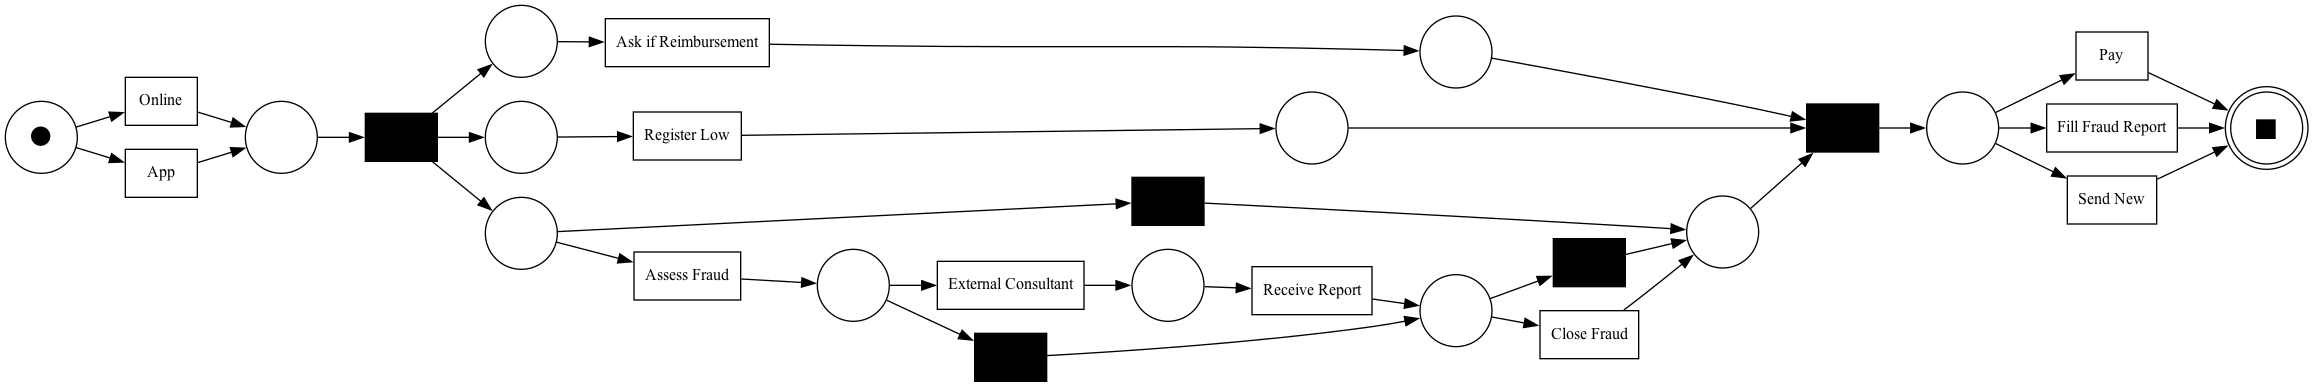

In [83]:
# your code
net_low, im_low, fm_low = pm4py.discover_petri_net_inductive(log_low)
pm4py.view_petri_net(net_low, im_low, fm_low, format='png') 

In [84]:
fitness_low = replay_fitness_evaluator.apply(log_low, net_low, im_low, fm_low, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
display(fitness_low)

replaying log with TBR, completed variants ::   0%|          | 0/94 [00:00<?, ?it/s]

{'perc_fit_traces': 100.0,
 'average_trace_fitness': 1.0,
 'log_fitness': 1.0,
 'percentage_of_fitting_traces': 100.0}

In [71]:
token_replay_result =  pm4py.conformance_diagnostics_token_based_replay(log_low, net_low, im_low, fm_low)
for i in range(len(log_low)):
    print("the fitness of the case %d:" %i)
    display(token_replay_result[i]["trace_fitness"])

replaying log with TBR, completed variants ::   0%|          | 0/94 [00:00<?, ?it/s]

the fitness of the case 0:


1.0

the fitness of the case 1:


1.0

the fitness of the case 2:


1.0

the fitness of the case 3:


1.0

the fitness of the case 4:


1.0

the fitness of the case 5:


1.0

the fitness of the case 6:


1.0

the fitness of the case 7:


1.0

the fitness of the case 8:


1.0

the fitness of the case 9:


1.0

the fitness of the case 10:


1.0

the fitness of the case 11:


1.0

the fitness of the case 12:


1.0

the fitness of the case 13:


1.0

the fitness of the case 14:


1.0

the fitness of the case 15:


1.0

the fitness of the case 16:


1.0

the fitness of the case 17:


1.0

the fitness of the case 18:


1.0

the fitness of the case 19:


1.0

the fitness of the case 20:


1.0

the fitness of the case 21:


1.0

the fitness of the case 22:


1.0

the fitness of the case 23:


1.0

the fitness of the case 24:


1.0

the fitness of the case 25:


1.0

the fitness of the case 26:


1.0

the fitness of the case 27:


1.0

the fitness of the case 28:


1.0

the fitness of the case 29:


1.0

the fitness of the case 30:


1.0

the fitness of the case 31:


1.0

the fitness of the case 32:


1.0

the fitness of the case 33:


1.0

the fitness of the case 34:


1.0

the fitness of the case 35:


1.0

the fitness of the case 36:


1.0

the fitness of the case 37:


1.0

the fitness of the case 38:


1.0

the fitness of the case 39:


1.0

the fitness of the case 40:


1.0

the fitness of the case 41:


1.0

the fitness of the case 42:


1.0

the fitness of the case 43:


1.0

the fitness of the case 44:


1.0

the fitness of the case 45:


1.0

the fitness of the case 46:


1.0

the fitness of the case 47:


1.0

the fitness of the case 48:


1.0

the fitness of the case 49:


1.0

the fitness of the case 50:


1.0

the fitness of the case 51:


1.0

the fitness of the case 52:


1.0

the fitness of the case 53:


1.0

the fitness of the case 54:


1.0

the fitness of the case 55:


1.0

the fitness of the case 56:


1.0

the fitness of the case 57:


1.0

the fitness of the case 58:


1.0

the fitness of the case 59:


1.0

the fitness of the case 60:


1.0

the fitness of the case 61:


1.0

the fitness of the case 62:


1.0

the fitness of the case 63:


1.0

the fitness of the case 64:


1.0

the fitness of the case 65:


1.0

the fitness of the case 66:


1.0

the fitness of the case 67:


1.0

the fitness of the case 68:


1.0

the fitness of the case 69:


1.0

the fitness of the case 70:


1.0

the fitness of the case 71:


1.0

the fitness of the case 72:


1.0

the fitness of the case 73:


1.0

the fitness of the case 74:


1.0

the fitness of the case 75:


1.0

the fitness of the case 76:


1.0

the fitness of the case 77:


1.0

the fitness of the case 78:


1.0

the fitness of the case 79:


1.0

the fitness of the case 80:


1.0

the fitness of the case 81:


1.0

the fitness of the case 82:


1.0

the fitness of the case 83:


1.0

the fitness of the case 84:


1.0

the fitness of the case 85:


1.0

the fitness of the case 86:


1.0

the fitness of the case 87:


1.0

the fitness of the case 88:


1.0

the fitness of the case 89:


1.0

the fitness of the case 90:


1.0

the fitness of the case 91:


1.0

the fitness of the case 92:


1.0

the fitness of the case 93:


1.0

the fitness of the case 94:


1.0

the fitness of the case 95:


1.0

the fitness of the case 96:


1.0

the fitness of the case 97:


1.0

the fitness of the case 98:


1.0

the fitness of the case 99:


1.0

the fitness of the case 100:


1.0

the fitness of the case 101:


1.0

the fitness of the case 102:


1.0

the fitness of the case 103:


1.0

the fitness of the case 104:


1.0

the fitness of the case 105:


1.0

the fitness of the case 106:


1.0

the fitness of the case 107:


1.0

the fitness of the case 108:


1.0

the fitness of the case 109:


1.0

the fitness of the case 110:


1.0

the fitness of the case 111:


1.0

the fitness of the case 112:


1.0

the fitness of the case 113:


1.0

the fitness of the case 114:


1.0

the fitness of the case 115:


1.0

the fitness of the case 116:


1.0

the fitness of the case 117:


1.0

the fitness of the case 118:


1.0

the fitness of the case 119:


1.0

the fitness of the case 120:


1.0

the fitness of the case 121:


1.0

the fitness of the case 122:


1.0

the fitness of the case 123:


1.0

the fitness of the case 124:


1.0

the fitness of the case 125:


1.0

the fitness of the case 126:


1.0

the fitness of the case 127:


1.0

the fitness of the case 128:


1.0

the fitness of the case 129:


1.0

the fitness of the case 130:


1.0

the fitness of the case 131:


1.0

the fitness of the case 132:


1.0

the fitness of the case 133:


1.0

the fitness of the case 134:


1.0

the fitness of the case 135:


1.0

the fitness of the case 136:


1.0

the fitness of the case 137:


1.0

the fitness of the case 138:


1.0

the fitness of the case 139:


1.0

the fitness of the case 140:


1.0

the fitness of the case 141:


1.0

the fitness of the case 142:


1.0

the fitness of the case 143:


1.0

the fitness of the case 144:


1.0

the fitness of the case 145:


1.0

the fitness of the case 146:


1.0

the fitness of the case 147:


1.0

the fitness of the case 148:


1.0

the fitness of the case 149:


1.0

the fitness of the case 150:


1.0

the fitness of the case 151:


1.0

the fitness of the case 152:


1.0

the fitness of the case 153:


1.0

the fitness of the case 154:


1.0

the fitness of the case 155:


1.0

the fitness of the case 156:


1.0

the fitness of the case 157:


1.0

the fitness of the case 158:


1.0

the fitness of the case 159:


1.0

the fitness of the case 160:


1.0

the fitness of the case 161:


1.0

the fitness of the case 162:


1.0

the fitness of the case 163:


1.0

the fitness of the case 164:


1.0

the fitness of the case 165:


1.0

the fitness of the case 166:


1.0

the fitness of the case 167:


1.0

the fitness of the case 168:


1.0

the fitness of the case 169:


1.0

the fitness of the case 170:


1.0

the fitness of the case 171:


1.0

the fitness of the case 172:


1.0

the fitness of the case 173:


1.0

the fitness of the case 174:


1.0

the fitness of the case 175:


1.0

the fitness of the case 176:


1.0

the fitness of the case 177:


1.0

the fitness of the case 178:


1.0

the fitness of the case 179:


1.0

the fitness of the case 180:


1.0

the fitness of the case 181:


1.0

the fitness of the case 182:


1.0

the fitness of the case 183:


1.0

the fitness of the case 184:


1.0

the fitness of the case 185:


1.0

the fitness of the case 186:


1.0

the fitness of the case 187:


1.0

the fitness of the case 188:


1.0

the fitness of the case 189:


1.0

the fitness of the case 190:


1.0

the fitness of the case 191:


1.0

the fitness of the case 192:


1.0

the fitness of the case 193:


1.0

the fitness of the case 194:


1.0

the fitness of the case 195:


1.0

the fitness of the case 196:


1.0

the fitness of the case 197:


1.0

the fitness of the case 198:


1.0

the fitness of the case 199:


1.0

the fitness of the case 200:


1.0

the fitness of the case 201:


1.0

the fitness of the case 202:


1.0

the fitness of the case 203:


1.0

the fitness of the case 204:


1.0

the fitness of the case 205:


1.0

the fitness of the case 206:


1.0

the fitness of the case 207:


1.0

the fitness of the case 208:


1.0

the fitness of the case 209:


1.0

the fitness of the case 210:


1.0

the fitness of the case 211:


1.0

the fitness of the case 212:


1.0

the fitness of the case 213:


1.0

the fitness of the case 214:


1.0

the fitness of the case 215:


1.0

the fitness of the case 216:


1.0

the fitness of the case 217:


1.0

the fitness of the case 218:


1.0

the fitness of the case 219:


1.0

the fitness of the case 220:


1.0

the fitness of the case 221:


1.0

the fitness of the case 222:


1.0

the fitness of the case 223:


1.0

the fitness of the case 224:


1.0

the fitness of the case 225:


1.0

the fitness of the case 226:


1.0

the fitness of the case 227:


1.0

the fitness of the case 228:


1.0

the fitness of the case 229:


1.0

the fitness of the case 230:


1.0

the fitness of the case 231:


1.0

the fitness of the case 232:


1.0

the fitness of the case 233:


1.0

the fitness of the case 234:


1.0

the fitness of the case 235:


1.0

the fitness of the case 236:


1.0

the fitness of the case 237:


1.0

the fitness of the case 238:


1.0

the fitness of the case 239:


1.0

the fitness of the case 240:


1.0

the fitness of the case 241:


1.0

the fitness of the case 242:


1.0

the fitness of the case 243:


1.0

the fitness of the case 244:


1.0

the fitness of the case 245:


1.0

the fitness of the case 246:


1.0

the fitness of the case 247:


1.0

the fitness of the case 248:


1.0

the fitness of the case 249:


1.0

the fitness of the case 250:


1.0

the fitness of the case 251:


1.0

the fitness of the case 252:


1.0

the fitness of the case 253:


1.0

the fitness of the case 254:


1.0

the fitness of the case 255:


1.0

the fitness of the case 256:


1.0

the fitness of the case 257:


1.0

the fitness of the case 258:


1.0

the fitness of the case 259:


1.0

the fitness of the case 260:


1.0

the fitness of the case 261:


1.0

the fitness of the case 262:


1.0

the fitness of the case 263:


1.0

the fitness of the case 264:


1.0

the fitness of the case 265:


1.0

the fitness of the case 266:


1.0

the fitness of the case 267:


1.0

the fitness of the case 268:


1.0

the fitness of the case 269:


1.0

the fitness of the case 270:


1.0

the fitness of the case 271:


1.0

the fitness of the case 272:


1.0

the fitness of the case 273:


1.0

the fitness of the case 274:


1.0

the fitness of the case 275:


1.0

the fitness of the case 276:


1.0

the fitness of the case 277:


1.0

the fitness of the case 278:


1.0

the fitness of the case 279:


1.0

the fitness of the case 280:


1.0

the fitness of the case 281:


1.0

the fitness of the case 282:


1.0

the fitness of the case 283:


1.0

the fitness of the case 284:


1.0

the fitness of the case 285:


1.0

the fitness of the case 286:


1.0

the fitness of the case 287:


1.0

the fitness of the case 288:


1.0

the fitness of the case 289:


1.0

the fitness of the case 290:


1.0

the fitness of the case 291:


1.0

the fitness of the case 292:


1.0

the fitness of the case 293:


1.0

the fitness of the case 294:


1.0

the fitness of the case 295:


1.0

the fitness of the case 296:


1.0

the fitness of the case 297:


1.0

the fitness of the case 298:


1.0

the fitness of the case 299:


1.0

the fitness of the case 300:


1.0

the fitness of the case 301:


1.0

the fitness of the case 302:


1.0

the fitness of the case 303:


1.0

the fitness of the case 304:


1.0

the fitness of the case 305:


1.0

the fitness of the case 306:


1.0

the fitness of the case 307:


1.0

the fitness of the case 308:


1.0

the fitness of the case 309:


1.0

the fitness of the case 310:


1.0

the fitness of the case 311:


1.0

the fitness of the case 312:


1.0

the fitness of the case 313:


1.0

the fitness of the case 314:


1.0

the fitness of the case 315:


1.0

the fitness of the case 316:


1.0

the fitness of the case 317:


1.0

the fitness of the case 318:


1.0

the fitness of the case 319:


1.0

the fitness of the case 320:


1.0

the fitness of the case 321:


1.0

the fitness of the case 322:


1.0

the fitness of the case 323:


1.0

the fitness of the case 324:


1.0

the fitness of the case 325:


1.0

the fitness of the case 326:


1.0

the fitness of the case 327:


1.0

the fitness of the case 328:


1.0

the fitness of the case 329:


1.0

the fitness of the case 330:


1.0

the fitness of the case 331:


1.0

the fitness of the case 332:


1.0

the fitness of the case 333:


1.0

the fitness of the case 334:


1.0

the fitness of the case 335:


1.0

the fitness of the case 336:


1.0

the fitness of the case 337:


1.0

the fitness of the case 338:


1.0

the fitness of the case 339:


1.0

the fitness of the case 340:


1.0

the fitness of the case 341:


1.0

the fitness of the case 342:


1.0

the fitness of the case 343:


1.0

the fitness of the case 344:


1.0

the fitness of the case 345:


1.0

the fitness of the case 346:


1.0

the fitness of the case 347:


1.0

the fitness of the case 348:


1.0

the fitness of the case 349:


1.0

the fitness of the case 350:


1.0

the fitness of the case 351:


1.0

the fitness of the case 352:


1.0

the fitness of the case 353:


1.0

the fitness of the case 354:


1.0

the fitness of the case 355:


1.0

the fitness of the case 356:


1.0

the fitness of the case 357:


1.0

the fitness of the case 358:


1.0

the fitness of the case 359:


1.0

the fitness of the case 360:


1.0

the fitness of the case 361:


1.0

the fitness of the case 362:


1.0

the fitness of the case 363:


1.0

the fitness of the case 364:


1.0

the fitness of the case 365:


1.0

the fitness of the case 366:


1.0

the fitness of the case 367:


1.0

the fitness of the case 368:


1.0

the fitness of the case 369:


1.0

the fitness of the case 370:


1.0

the fitness of the case 371:


1.0

the fitness of the case 372:


1.0

the fitness of the case 373:


1.0

the fitness of the case 374:


1.0

the fitness of the case 375:


1.0

the fitness of the case 376:


1.0

the fitness of the case 377:


1.0

the fitness of the case 378:


1.0

the fitness of the case 379:


1.0

the fitness of the case 380:


1.0

the fitness of the case 381:


1.0

the fitness of the case 382:


1.0

the fitness of the case 383:


1.0

the fitness of the case 384:


1.0

the fitness of the case 385:


1.0

the fitness of the case 386:


1.0

the fitness of the case 387:


1.0

the fitness of the case 388:


1.0

the fitness of the case 389:


1.0

the fitness of the case 390:


1.0

the fitness of the case 391:


1.0

the fitness of the case 392:


1.0

the fitness of the case 393:


1.0

the fitness of the case 394:


1.0

the fitness of the case 395:


1.0

the fitness of the case 396:


1.0

the fitness of the case 397:


1.0

the fitness of the case 398:


1.0

the fitness of the case 399:


1.0

the fitness of the case 400:


1.0

the fitness of the case 401:


1.0

the fitness of the case 402:


1.0

the fitness of the case 403:


1.0

the fitness of the case 404:


1.0

the fitness of the case 405:


1.0

the fitness of the case 406:


1.0

the fitness of the case 407:


1.0

the fitness of the case 408:


1.0

the fitness of the case 409:


1.0

the fitness of the case 410:


1.0

the fitness of the case 411:


1.0

the fitness of the case 412:


1.0

the fitness of the case 413:


1.0

the fitness of the case 414:


1.0

the fitness of the case 415:


1.0

the fitness of the case 416:


1.0

the fitness of the case 417:


1.0

the fitness of the case 418:


1.0

the fitness of the case 419:


1.0

the fitness of the case 420:


1.0

the fitness of the case 421:


1.0

the fitness of the case 422:


1.0

the fitness of the case 423:


1.0

the fitness of the case 424:


1.0

the fitness of the case 425:


1.0

the fitness of the case 426:


1.0

the fitness of the case 427:


1.0

the fitness of the case 428:


1.0

the fitness of the case 429:


1.0

the fitness of the case 430:


1.0

the fitness of the case 431:


1.0

the fitness of the case 432:


1.0

the fitness of the case 433:


1.0

the fitness of the case 434:


1.0

the fitness of the case 435:


1.0

the fitness of the case 436:


1.0

the fitness of the case 437:


1.0

the fitness of the case 438:


1.0

the fitness of the case 439:


1.0

the fitness of the case 440:


1.0

the fitness of the case 441:


1.0

the fitness of the case 442:


1.0

the fitness of the case 443:


1.0

the fitness of the case 444:


1.0

the fitness of the case 445:


1.0

the fitness of the case 446:


1.0

the fitness of the case 447:


1.0

the fitness of the case 448:


1.0

the fitness of the case 449:


1.0

the fitness of the case 450:


1.0

the fitness of the case 451:


1.0

the fitness of the case 452:


1.0

the fitness of the case 453:


1.0

the fitness of the case 454:


1.0

the fitness of the case 455:


1.0

the fitness of the case 456:


1.0

the fitness of the case 457:


1.0

the fitness of the case 458:


1.0

the fitness of the case 459:


1.0

the fitness of the case 460:


1.0

the fitness of the case 461:


1.0

the fitness of the case 462:


1.0

the fitness of the case 463:


1.0

the fitness of the case 464:


1.0

the fitness of the case 465:


1.0

the fitness of the case 466:


1.0

the fitness of the case 467:


1.0

the fitness of the case 468:


1.0

the fitness of the case 469:


1.0

the fitness of the case 470:


1.0

the fitness of the case 471:


1.0

the fitness of the case 472:


1.0

the fitness of the case 473:


1.0

the fitness of the case 474:


1.0

the fitness of the case 475:


1.0

the fitness of the case 476:


1.0

the fitness of the case 477:


1.0

the fitness of the case 478:


1.0

the fitness of the case 479:


1.0

the fitness of the case 480:


1.0

the fitness of the case 481:


1.0

the fitness of the case 482:


1.0

the fitness of the case 483:


1.0

the fitness of the case 484:


1.0

the fitness of the case 485:


1.0

the fitness of the case 486:


1.0

the fitness of the case 487:


1.0

the fitness of the case 488:


1.0

the fitness of the case 489:


1.0

the fitness of the case 490:


1.0

the fitness of the case 491:


1.0

the fitness of the case 492:


1.0

the fitness of the case 493:


1.0

the fitness of the case 494:


1.0

the fitness of the case 495:


1.0

the fitness of the case 496:


1.0

the fitness of the case 497:


1.0

the fitness of the case 498:


1.0

the fitness of the case 499:


1.0

the fitness of the case 500:


1.0

the fitness of the case 501:


1.0

the fitness of the case 502:


1.0

the fitness of the case 503:


1.0

the fitness of the case 504:


1.0

the fitness of the case 505:


1.0

the fitness of the case 506:


1.0

the fitness of the case 507:


1.0

the fitness of the case 508:


1.0

the fitness of the case 509:


1.0

the fitness of the case 510:


1.0

the fitness of the case 511:


1.0

the fitness of the case 512:


1.0

the fitness of the case 513:


1.0

the fitness of the case 514:


1.0

the fitness of the case 515:


1.0

the fitness of the case 516:


1.0

the fitness of the case 517:


1.0

the fitness of the case 518:


1.0

the fitness of the case 519:


1.0

the fitness of the case 520:


1.0

the fitness of the case 521:


1.0

the fitness of the case 522:


1.0

the fitness of the case 523:


1.0

the fitness of the case 524:


1.0

the fitness of the case 525:


1.0

the fitness of the case 526:


1.0

the fitness of the case 527:


1.0

the fitness of the case 528:


1.0

the fitness of the case 529:


1.0

the fitness of the case 530:


1.0

the fitness of the case 531:


1.0

the fitness of the case 532:


1.0

the fitness of the case 533:


1.0

the fitness of the case 534:


1.0

the fitness of the case 535:


1.0

the fitness of the case 536:


1.0

the fitness of the case 537:


1.0

the fitness of the case 538:


1.0

the fitness of the case 539:


1.0

the fitness of the case 540:


1.0

the fitness of the case 541:


1.0

the fitness of the case 542:


1.0

the fitness of the case 543:


1.0

the fitness of the case 544:


1.0

the fitness of the case 545:


1.0

the fitness of the case 546:


1.0

the fitness of the case 547:


1.0

the fitness of the case 548:


1.0

the fitness of the case 549:


1.0

the fitness of the case 550:


1.0

the fitness of the case 551:


1.0

the fitness of the case 552:


1.0

the fitness of the case 553:


1.0

the fitness of the case 554:


1.0

the fitness of the case 555:


1.0

the fitness of the case 556:


1.0

the fitness of the case 557:


1.0

the fitness of the case 558:


1.0

the fitness of the case 559:


1.0

the fitness of the case 560:


1.0

the fitness of the case 561:


1.0

the fitness of the case 562:


1.0

the fitness of the case 563:


1.0

the fitness of the case 564:


1.0

the fitness of the case 565:


1.0

the fitness of the case 566:


1.0

the fitness of the case 567:


1.0

the fitness of the case 568:


1.0

the fitness of the case 569:


1.0

the fitness of the case 570:


1.0

the fitness of the case 571:


1.0

the fitness of the case 572:


1.0

the fitness of the case 573:


1.0

the fitness of the case 574:


1.0

the fitness of the case 575:


1.0

the fitness of the case 576:


1.0

the fitness of the case 577:


1.0

the fitness of the case 578:


1.0

the fitness of the case 579:


1.0

the fitness of the case 580:


1.0

the fitness of the case 581:


1.0

the fitness of the case 582:


1.0

the fitness of the case 583:


1.0

the fitness of the case 584:


1.0

the fitness of the case 585:


1.0

the fitness of the case 586:


1.0

the fitness of the case 587:


1.0

the fitness of the case 588:


1.0

the fitness of the case 589:


1.0

the fitness of the case 590:


1.0

the fitness of the case 591:


1.0

the fitness of the case 592:


1.0

the fitness of the case 593:


1.0

the fitness of the case 594:


1.0

the fitness of the case 595:


1.0

the fitness of the case 596:


1.0

the fitness of the case 597:


1.0

the fitness of the case 598:


1.0

the fitness of the case 599:


1.0

the fitness of the case 600:


1.0

the fitness of the case 601:


1.0

the fitness of the case 602:


1.0

the fitness of the case 603:


1.0

the fitness of the case 604:


1.0

the fitness of the case 605:


1.0

the fitness of the case 606:


1.0

the fitness of the case 607:


1.0

the fitness of the case 608:


1.0

the fitness of the case 609:


1.0

the fitness of the case 610:


1.0

the fitness of the case 611:


1.0

the fitness of the case 612:


1.0

the fitness of the case 613:


1.0

the fitness of the case 614:


1.0

the fitness of the case 615:


1.0

the fitness of the case 616:


1.0

the fitness of the case 617:


1.0

the fitness of the case 618:


1.0

the fitness of the case 619:


1.0

the fitness of the case 620:


1.0

the fitness of the case 621:


1.0

the fitness of the case 622:


1.0

the fitness of the case 623:


1.0

the fitness of the case 624:


1.0

the fitness of the case 625:


1.0

the fitness of the case 626:


1.0

the fitness of the case 627:


1.0

the fitness of the case 628:


1.0

the fitness of the case 629:


1.0

the fitness of the case 630:


1.0

the fitness of the case 631:


1.0

the fitness of the case 632:


1.0

the fitness of the case 633:


1.0

the fitness of the case 634:


1.0

the fitness of the case 635:


1.0

the fitness of the case 636:


1.0

the fitness of the case 637:


1.0

the fitness of the case 638:


1.0

the fitness of the case 639:


1.0

the fitness of the case 640:


1.0

the fitness of the case 641:


1.0

the fitness of the case 642:


1.0

the fitness of the case 643:


1.0

the fitness of the case 644:


1.0

the fitness of the case 645:


1.0

the fitness of the case 646:


1.0

the fitness of the case 647:


1.0

the fitness of the case 648:


1.0

the fitness of the case 649:


1.0

the fitness of the case 650:


1.0

the fitness of the case 651:


1.0

the fitness of the case 652:


1.0

the fitness of the case 653:


1.0

the fitness of the case 654:


1.0

the fitness of the case 655:


1.0

the fitness of the case 656:


1.0

the fitness of the case 657:


1.0

the fitness of the case 658:


1.0

the fitness of the case 659:


1.0

the fitness of the case 660:


1.0

the fitness of the case 661:


1.0

the fitness of the case 662:


1.0

the fitness of the case 663:


1.0

the fitness of the case 664:


1.0

the fitness of the case 665:


1.0

the fitness of the case 666:


1.0

the fitness of the case 667:


1.0

the fitness of the case 668:


1.0

the fitness of the case 669:


1.0

the fitness of the case 670:


1.0

the fitness of the case 671:


1.0

the fitness of the case 672:


1.0

the fitness of the case 673:


1.0

the fitness of the case 674:


1.0

the fitness of the case 675:


1.0

the fitness of the case 676:


1.0

the fitness of the case 677:


1.0

the fitness of the case 678:


1.0

the fitness of the case 679:


1.0

the fitness of the case 680:


1.0

the fitness of the case 681:


1.0

the fitness of the case 682:


1.0

the fitness of the case 683:


1.0

the fitness of the case 684:


1.0

the fitness of the case 685:


1.0

the fitness of the case 686:


1.0

the fitness of the case 687:


1.0

the fitness of the case 688:


1.0

the fitness of the case 689:


1.0

the fitness of the case 690:


1.0

the fitness of the case 691:


1.0

the fitness of the case 692:


1.0

the fitness of the case 693:


1.0

the fitness of the case 694:


1.0

the fitness of the case 695:


1.0

the fitness of the case 696:


1.0

the fitness of the case 697:


1.0

the fitness of the case 698:


1.0

the fitness of the case 699:


1.0

the fitness of the case 700:


1.0

the fitness of the case 701:


1.0

the fitness of the case 702:


1.0

the fitness of the case 703:


1.0

the fitness of the case 704:


1.0

the fitness of the case 705:


1.0

the fitness of the case 706:


1.0

the fitness of the case 707:


1.0

the fitness of the case 708:


1.0

the fitness of the case 709:


1.0

the fitness of the case 710:


1.0

the fitness of the case 711:


1.0

the fitness of the case 712:


1.0

the fitness of the case 713:


1.0

the fitness of the case 714:


1.0

the fitness of the case 715:


1.0

the fitness of the case 716:


1.0

the fitness of the case 717:


1.0

the fitness of the case 718:


1.0

the fitness of the case 719:


1.0

the fitness of the case 720:


1.0

the fitness of the case 721:


1.0

the fitness of the case 722:


1.0

the fitness of the case 723:


1.0

the fitness of the case 724:


1.0

the fitness of the case 725:


1.0

the fitness of the case 726:


1.0

the fitness of the case 727:


1.0

the fitness of the case 728:


1.0

the fitness of the case 729:


1.0

the fitness of the case 730:


1.0

the fitness of the case 731:


1.0

the fitness of the case 732:


1.0

the fitness of the case 733:


1.0

the fitness of the case 734:


1.0

the fitness of the case 735:


1.0

the fitness of the case 736:


1.0

the fitness of the case 737:


1.0

the fitness of the case 738:


1.0

the fitness of the case 739:


1.0

the fitness of the case 740:


1.0

the fitness of the case 741:


1.0

the fitness of the case 742:


1.0

the fitness of the case 743:


1.0

the fitness of the case 744:


1.0

the fitness of the case 745:


1.0

the fitness of the case 746:


1.0

the fitness of the case 747:


1.0

the fitness of the case 748:


1.0

the fitness of the case 749:


1.0

the fitness of the case 750:


1.0

the fitness of the case 751:


1.0

the fitness of the case 752:


1.0

the fitness of the case 753:


1.0

the fitness of the case 754:


1.0

the fitness of the case 755:


1.0

the fitness of the case 756:


1.0

the fitness of the case 757:


1.0

the fitness of the case 758:


1.0

the fitness of the case 759:


1.0

the fitness of the case 760:


1.0

the fitness of the case 761:


1.0

the fitness of the case 762:


1.0

the fitness of the case 763:


1.0

the fitness of the case 764:


1.0

the fitness of the case 765:


1.0

the fitness of the case 766:


1.0

the fitness of the case 767:


1.0

the fitness of the case 768:


1.0

the fitness of the case 769:


1.0

the fitness of the case 770:


1.0

the fitness of the case 771:


1.0

the fitness of the case 772:


1.0

the fitness of the case 773:


1.0

the fitness of the case 774:


1.0

the fitness of the case 775:


1.0

the fitness of the case 776:


1.0

the fitness of the case 777:


1.0

the fitness of the case 778:


1.0

the fitness of the case 779:


1.0

the fitness of the case 780:


1.0

the fitness of the case 781:


1.0

the fitness of the case 782:


1.0

the fitness of the case 783:


1.0

the fitness of the case 784:


1.0

the fitness of the case 785:


1.0

the fitness of the case 786:


1.0

the fitness of the case 787:


1.0

the fitness of the case 788:


1.0

the fitness of the case 789:


1.0

the fitness of the case 790:


1.0

the fitness of the case 791:


1.0

the fitness of the case 792:


1.0

the fitness of the case 793:


1.0

the fitness of the case 794:


1.0

the fitness of the case 795:


1.0

the fitness of the case 796:


1.0

the fitness of the case 797:


1.0

the fitness of the case 798:


1.0

the fitness of the case 799:


1.0

the fitness of the case 800:


1.0

the fitness of the case 801:


1.0

the fitness of the case 802:


1.0

the fitness of the case 803:


1.0

the fitness of the case 804:


1.0

the fitness of the case 805:


1.0

the fitness of the case 806:


1.0

the fitness of the case 807:


1.0

the fitness of the case 808:


1.0

the fitness of the case 809:


1.0

the fitness of the case 810:


1.0

the fitness of the case 811:


1.0

the fitness of the case 812:


1.0

the fitness of the case 813:


1.0

the fitness of the case 814:


1.0

the fitness of the case 815:


1.0

the fitness of the case 816:


1.0

the fitness of the case 817:


1.0

the fitness of the case 818:


1.0

the fitness of the case 819:


1.0

the fitness of the case 820:


1.0

the fitness of the case 821:


1.0

the fitness of the case 822:


1.0

the fitness of the case 823:


1.0

the fitness of the case 824:


1.0

the fitness of the case 825:


1.0

the fitness of the case 826:


1.0

the fitness of the case 827:


1.0

the fitness of the case 828:


1.0

the fitness of the case 829:


1.0

the fitness of the case 830:


1.0

the fitness of the case 831:


1.0

the fitness of the case 832:


1.0

the fitness of the case 833:


1.0

the fitness of the case 834:


1.0

the fitness of the case 835:


1.0

the fitness of the case 836:


1.0

the fitness of the case 837:


1.0

the fitness of the case 838:


1.0

the fitness of the case 839:


1.0

the fitness of the case 840:


1.0

the fitness of the case 841:


1.0

the fitness of the case 842:


1.0

the fitness of the case 843:


1.0

the fitness of the case 844:


1.0

the fitness of the case 845:


1.0

the fitness of the case 846:


1.0

the fitness of the case 847:


1.0

the fitness of the case 848:


1.0

the fitness of the case 849:


1.0

the fitness of the case 850:


1.0

the fitness of the case 851:


1.0

the fitness of the case 852:


1.0

the fitness of the case 853:


1.0

the fitness of the case 854:


1.0

the fitness of the case 855:


1.0

the fitness of the case 856:


1.0

the fitness of the case 857:


1.0

the fitness of the case 858:


1.0

the fitness of the case 859:


1.0

the fitness of the case 860:


1.0

the fitness of the case 861:


1.0

the fitness of the case 862:


1.0

the fitness of the case 863:


1.0

the fitness of the case 864:


1.0

the fitness of the case 865:


1.0

the fitness of the case 866:


1.0

the fitness of the case 867:


1.0

the fitness of the case 868:


1.0

the fitness of the case 869:


1.0

the fitness of the case 870:


1.0

the fitness of the case 871:


1.0

the fitness of the case 872:


1.0

the fitness of the case 873:


1.0

the fitness of the case 874:


1.0

the fitness of the case 875:


1.0

the fitness of the case 876:


1.0

the fitness of the case 877:


1.0

the fitness of the case 878:


1.0

the fitness of the case 879:


1.0

the fitness of the case 880:


1.0

the fitness of the case 881:


1.0

the fitness of the case 882:


1.0

the fitness of the case 883:


1.0

the fitness of the case 884:


1.0

the fitness of the case 885:


1.0

the fitness of the case 886:


1.0

the fitness of the case 887:


1.0

the fitness of the case 888:


1.0

the fitness of the case 889:


1.0

the fitness of the case 890:


1.0

the fitness of the case 891:


1.0

the fitness of the case 892:


1.0

the fitness of the case 893:


1.0

the fitness of the case 894:


1.0

the fitness of the case 895:


1.0

the fitness of the case 896:


1.0

the fitness of the case 897:


1.0

the fitness of the case 898:


1.0

the fitness of the case 899:


1.0

the fitness of the case 900:


1.0

the fitness of the case 901:


1.0

the fitness of the case 902:


1.0

the fitness of the case 903:


1.0

the fitness of the case 904:


1.0

the fitness of the case 905:


1.0

the fitness of the case 906:


1.0

the fitness of the case 907:


1.0

the fitness of the case 908:


1.0

the fitness of the case 909:


1.0

the fitness of the case 910:


1.0

the fitness of the case 911:


1.0

the fitness of the case 912:


1.0

the fitness of the case 913:


1.0

the fitness of the case 914:


1.0

the fitness of the case 915:


1.0

the fitness of the case 916:


1.0

the fitness of the case 917:


1.0

the fitness of the case 918:


1.0

the fitness of the case 919:


1.0

the fitness of the case 920:


1.0

the fitness of the case 921:


1.0

the fitness of the case 922:


1.0

the fitness of the case 923:


1.0

the fitness of the case 924:


1.0

the fitness of the case 925:


1.0

the fitness of the case 926:


1.0

the fitness of the case 927:


1.0

the fitness of the case 928:


1.0

the fitness of the case 929:


1.0

the fitness of the case 930:


1.0

the fitness of the case 931:


1.0

the fitness of the case 932:


1.0

the fitness of the case 933:


1.0

the fitness of the case 934:


1.0

the fitness of the case 935:


1.0

the fitness of the case 936:


1.0

the fitness of the case 937:


1.0

the fitness of the case 938:


1.0

the fitness of the case 939:


1.0

the fitness of the case 940:


1.0

the fitness of the case 941:


1.0

the fitness of the case 942:


1.0

the fitness of the case 943:


1.0

the fitness of the case 944:


1.0

the fitness of the case 945:


1.0

the fitness of the case 946:


1.0

the fitness of the case 947:


1.0

the fitness of the case 948:


1.0

the fitness of the case 949:


1.0

the fitness of the case 950:


1.0

the fitness of the case 951:


1.0

the fitness of the case 952:


1.0

the fitness of the case 953:


1.0

the fitness of the case 954:


1.0

the fitness of the case 955:


1.0

the fitness of the case 956:


1.0

the fitness of the case 957:


1.0

the fitness of the case 958:


1.0

the fitness of the case 959:


1.0

the fitness of the case 960:


1.0

the fitness of the case 961:


1.0

the fitness of the case 962:


1.0

the fitness of the case 963:


1.0

the fitness of the case 964:


1.0

the fitness of the case 965:


1.0

the fitness of the case 966:


1.0

the fitness of the case 967:


1.0

the fitness of the case 968:


1.0

the fitness of the case 969:


1.0

the fitness of the case 970:


1.0

the fitness of the case 971:


1.0

the fitness of the case 972:


1.0

the fitness of the case 973:


1.0

the fitness of the case 974:


1.0

the fitness of the case 975:


1.0

the fitness of the case 976:


1.0

the fitness of the case 977:


1.0

the fitness of the case 978:


1.0

the fitness of the case 979:


1.0

the fitness of the case 980:


1.0

the fitness of the case 981:


1.0

the fitness of the case 982:


1.0

the fitness of the case 983:


1.0

the fitness of the case 984:


1.0

the fitness of the case 985:


1.0

the fitness of the case 986:


1.0

the fitness of the case 987:


1.0

the fitness of the case 988:


1.0

the fitness of the case 989:


1.0

the fitness of the case 990:


1.0

the fitness of the case 991:


1.0

the fitness of the case 992:


1.0

the fitness of the case 993:


1.0

the fitness of the case 994:


1.0

the fitness of the case 995:


1.0

the fitness of the case 996:


1.0

the fitness of the case 997:


1.0

the fitness of the case 998:


1.0

the fitness of the case 999:


1.0

the fitness of the case 1000:


1.0

the fitness of the case 1001:


1.0

the fitness of the case 1002:


1.0

the fitness of the case 1003:


1.0

the fitness of the case 1004:


1.0

the fitness of the case 1005:


1.0

the fitness of the case 1006:


1.0

the fitness of the case 1007:


1.0

the fitness of the case 1008:


1.0

the fitness of the case 1009:


1.0

the fitness of the case 1010:


1.0

the fitness of the case 1011:


1.0

the fitness of the case 1012:


1.0

the fitness of the case 1013:


1.0

the fitness of the case 1014:


1.0

the fitness of the case 1015:


1.0

the fitness of the case 1016:


1.0

the fitness of the case 1017:


1.0

the fitness of the case 1018:


1.0

the fitness of the case 1019:


1.0

the fitness of the case 1020:


1.0

the fitness of the case 1021:


1.0

the fitness of the case 1022:


1.0

the fitness of the case 1023:


1.0

the fitness of the case 1024:


1.0

the fitness of the case 1025:


1.0

the fitness of the case 1026:


1.0

the fitness of the case 1027:


1.0

the fitness of the case 1028:


1.0

the fitness of the case 1029:


1.0

the fitness of the case 1030:


1.0

the fitness of the case 1031:


1.0

the fitness of the case 1032:


1.0

the fitness of the case 1033:


1.0

the fitness of the case 1034:


1.0

the fitness of the case 1035:


1.0

the fitness of the case 1036:


1.0

the fitness of the case 1037:


1.0

the fitness of the case 1038:


1.0

the fitness of the case 1039:


1.0

the fitness of the case 1040:


1.0

the fitness of the case 1041:


1.0

the fitness of the case 1042:


1.0

the fitness of the case 1043:


1.0

the fitness of the case 1044:


1.0

the fitness of the case 1045:


1.0

the fitness of the case 1046:


1.0

the fitness of the case 1047:


1.0

the fitness of the case 1048:


1.0

the fitness of the case 1049:


1.0

the fitness of the case 1050:


1.0

the fitness of the case 1051:


1.0

the fitness of the case 1052:


1.0

the fitness of the case 1053:


1.0

the fitness of the case 1054:


1.0

the fitness of the case 1055:


1.0

the fitness of the case 1056:


1.0

the fitness of the case 1057:


1.0

the fitness of the case 1058:


1.0

the fitness of the case 1059:


1.0

the fitness of the case 1060:


1.0

the fitness of the case 1061:


1.0

the fitness of the case 1062:


1.0

the fitness of the case 1063:


1.0

the fitness of the case 1064:


1.0

the fitness of the case 1065:


1.0

the fitness of the case 1066:


1.0

the fitness of the case 1067:


1.0

the fitness of the case 1068:


1.0

the fitness of the case 1069:


1.0

the fitness of the case 1070:


1.0

the fitness of the case 1071:


1.0

the fitness of the case 1072:


1.0

the fitness of the case 1073:


1.0

the fitness of the case 1074:


1.0

the fitness of the case 1075:


1.0

the fitness of the case 1076:


1.0

the fitness of the case 1077:


1.0

the fitness of the case 1078:


1.0

the fitness of the case 1079:


1.0

the fitness of the case 1080:


1.0

the fitness of the case 1081:


1.0

the fitness of the case 1082:


1.0

the fitness of the case 1083:


1.0

the fitness of the case 1084:


1.0

the fitness of the case 1085:


1.0

the fitness of the case 1086:


1.0

the fitness of the case 1087:


1.0

the fitness of the case 1088:


1.0

the fitness of the case 1089:


1.0

the fitness of the case 1090:


1.0

the fitness of the case 1091:


1.0

the fitness of the case 1092:


1.0

the fitness of the case 1093:


1.0

the fitness of the case 1094:


1.0

the fitness of the case 1095:


1.0

the fitness of the case 1096:


1.0

the fitness of the case 1097:


1.0

the fitness of the case 1098:


1.0

the fitness of the case 1099:


1.0

the fitness of the case 1100:


1.0

the fitness of the case 1101:


1.0

the fitness of the case 1102:


1.0

the fitness of the case 1103:


1.0

the fitness of the case 1104:


1.0

the fitness of the case 1105:


1.0

the fitness of the case 1106:


1.0

the fitness of the case 1107:


1.0

the fitness of the case 1108:


1.0

the fitness of the case 1109:


1.0

the fitness of the case 1110:


1.0

the fitness of the case 1111:


1.0

the fitness of the case 1112:


1.0

the fitness of the case 1113:


1.0

the fitness of the case 1114:


1.0

the fitness of the case 1115:


1.0

the fitness of the case 1116:


1.0

the fitness of the case 1117:


1.0

the fitness of the case 1118:


1.0

the fitness of the case 1119:


1.0

the fitness of the case 1120:


1.0

the fitness of the case 1121:


1.0

the fitness of the case 1122:


1.0

the fitness of the case 1123:


1.0

the fitness of the case 1124:


1.0

the fitness of the case 1125:


1.0

the fitness of the case 1126:


1.0

the fitness of the case 1127:


1.0

the fitness of the case 1128:


1.0

the fitness of the case 1129:


1.0

the fitness of the case 1130:


1.0

the fitness of the case 1131:


1.0

the fitness of the case 1132:


1.0

the fitness of the case 1133:


1.0

the fitness of the case 1134:


1.0

the fitness of the case 1135:


1.0

the fitness of the case 1136:


1.0

the fitness of the case 1137:


1.0

the fitness of the case 1138:


1.0

the fitness of the case 1139:


1.0

the fitness of the case 1140:


1.0

the fitness of the case 1141:


1.0

the fitness of the case 1142:


1.0

the fitness of the case 1143:


1.0

the fitness of the case 1144:


1.0

the fitness of the case 1145:


1.0

the fitness of the case 1146:


1.0

the fitness of the case 1147:


1.0

the fitness of the case 1148:


1.0

the fitness of the case 1149:


1.0

the fitness of the case 1150:


1.0

the fitness of the case 1151:


1.0

the fitness of the case 1152:


1.0

the fitness of the case 1153:


1.0

the fitness of the case 1154:


1.0

the fitness of the case 1155:


1.0

the fitness of the case 1156:


1.0

the fitness of the case 1157:


1.0

the fitness of the case 1158:


1.0

the fitness of the case 1159:


1.0

the fitness of the case 1160:


1.0

the fitness of the case 1161:


1.0

the fitness of the case 1162:


1.0

the fitness of the case 1163:


1.0

the fitness of the case 1164:


1.0

the fitness of the case 1165:


1.0

the fitness of the case 1166:


1.0

the fitness of the case 1167:


1.0

the fitness of the case 1168:


1.0

the fitness of the case 1169:


1.0

the fitness of the case 1170:


1.0

the fitness of the case 1171:


1.0

the fitness of the case 1172:


1.0

the fitness of the case 1173:


1.0

the fitness of the case 1174:


1.0

the fitness of the case 1175:


1.0

the fitness of the case 1176:


1.0

the fitness of the case 1177:


1.0

the fitness of the case 1178:


1.0

the fitness of the case 1179:


1.0

the fitness of the case 1180:


1.0

the fitness of the case 1181:


1.0

the fitness of the case 1182:


1.0

the fitness of the case 1183:


1.0

the fitness of the case 1184:


1.0

the fitness of the case 1185:


1.0

the fitness of the case 1186:


1.0

the fitness of the case 1187:


1.0

the fitness of the case 1188:


1.0

the fitness of the case 1189:


1.0

the fitness of the case 1190:


1.0

the fitness of the case 1191:


1.0

the fitness of the case 1192:


1.0

the fitness of the case 1193:


1.0

the fitness of the case 1194:


1.0

the fitness of the case 1195:


1.0

the fitness of the case 1196:


1.0

the fitness of the case 1197:


1.0

the fitness of the case 1198:


1.0

the fitness of the case 1199:


1.0

the fitness of the case 1200:


1.0

the fitness of the case 1201:


1.0

the fitness of the case 1202:


1.0

the fitness of the case 1203:


1.0

the fitness of the case 1204:


1.0

the fitness of the case 1205:


1.0

the fitness of the case 1206:


1.0

the fitness of the case 1207:


1.0

the fitness of the case 1208:


1.0

the fitness of the case 1209:


1.0

the fitness of the case 1210:


1.0

the fitness of the case 1211:


1.0

the fitness of the case 1212:


1.0

the fitness of the case 1213:


1.0

the fitness of the case 1214:


1.0

the fitness of the case 1215:


1.0

the fitness of the case 1216:


1.0

the fitness of the case 1217:


1.0

the fitness of the case 1218:


1.0

the fitness of the case 1219:


1.0

the fitness of the case 1220:


1.0

the fitness of the case 1221:


1.0

the fitness of the case 1222:


1.0

the fitness of the case 1223:


1.0

the fitness of the case 1224:


1.0

the fitness of the case 1225:


1.0

the fitness of the case 1226:


1.0

the fitness of the case 1227:


1.0

the fitness of the case 1228:


1.0

the fitness of the case 1229:


1.0

the fitness of the case 1230:


1.0

the fitness of the case 1231:


1.0

the fitness of the case 1232:


1.0

the fitness of the case 1233:


1.0

the fitness of the case 1234:


1.0

the fitness of the case 1235:


1.0

the fitness of the case 1236:


1.0

the fitness of the case 1237:


1.0

the fitness of the case 1238:


1.0

the fitness of the case 1239:


1.0

the fitness of the case 1240:


1.0

the fitness of the case 1241:


1.0

the fitness of the case 1242:


1.0

the fitness of the case 1243:


1.0

the fitness of the case 1244:


1.0

the fitness of the case 1245:


1.0

the fitness of the case 1246:


1.0

the fitness of the case 1247:


1.0

the fitness of the case 1248:


1.0

the fitness of the case 1249:


1.0

the fitness of the case 1250:


1.0

the fitness of the case 1251:


1.0

the fitness of the case 1252:


1.0

the fitness of the case 1253:


1.0

the fitness of the case 1254:


1.0

the fitness of the case 1255:


1.0

the fitness of the case 1256:


1.0

the fitness of the case 1257:


1.0

the fitness of the case 1258:


1.0

the fitness of the case 1259:


1.0

the fitness of the case 1260:


1.0

the fitness of the case 1261:


1.0

the fitness of the case 1262:


1.0

the fitness of the case 1263:


1.0

the fitness of the case 1264:


1.0

the fitness of the case 1265:


1.0

the fitness of the case 1266:


1.0

the fitness of the case 1267:


1.0

the fitness of the case 1268:


1.0

the fitness of the case 1269:


1.0

the fitness of the case 1270:


1.0

the fitness of the case 1271:


1.0

the fitness of the case 1272:


1.0

the fitness of the case 1273:


1.0

the fitness of the case 1274:


1.0

the fitness of the case 1275:


1.0

the fitness of the case 1276:


1.0

the fitness of the case 1277:


1.0

the fitness of the case 1278:


1.0

the fitness of the case 1279:


1.0

the fitness of the case 1280:


1.0

the fitness of the case 1281:


1.0

the fitness of the case 1282:


1.0

the fitness of the case 1283:


1.0

the fitness of the case 1284:


1.0

the fitness of the case 1285:


1.0

the fitness of the case 1286:


1.0

the fitness of the case 1287:


1.0

the fitness of the case 1288:


1.0

the fitness of the case 1289:


1.0

the fitness of the case 1290:


1.0

the fitness of the case 1291:


1.0

the fitness of the case 1292:


1.0

the fitness of the case 1293:


1.0

the fitness of the case 1294:


1.0

the fitness of the case 1295:


1.0

the fitness of the case 1296:


1.0

the fitness of the case 1297:


1.0

the fitness of the case 1298:


1.0

the fitness of the case 1299:


1.0

the fitness of the case 1300:


1.0

the fitness of the case 1301:


1.0

the fitness of the case 1302:


1.0

the fitness of the case 1303:


1.0

the fitness of the case 1304:


1.0

the fitness of the case 1305:


1.0

the fitness of the case 1306:


1.0

the fitness of the case 1307:


1.0

the fitness of the case 1308:


1.0

the fitness of the case 1309:


1.0

the fitness of the case 1310:


1.0

the fitness of the case 1311:


1.0

the fitness of the case 1312:


1.0

the fitness of the case 1313:


1.0

the fitness of the case 1314:


1.0

the fitness of the case 1315:


1.0

the fitness of the case 1316:


1.0

the fitness of the case 1317:


1.0

the fitness of the case 1318:


1.0

the fitness of the case 1319:


1.0

the fitness of the case 1320:


1.0

the fitness of the case 1321:


1.0

the fitness of the case 1322:


1.0

the fitness of the case 1323:


1.0

the fitness of the case 1324:


1.0

the fitness of the case 1325:


1.0

the fitness of the case 1326:


1.0

the fitness of the case 1327:


1.0

the fitness of the case 1328:


1.0

the fitness of the case 1329:


1.0

the fitness of the case 1330:


1.0

the fitness of the case 1331:


1.0

the fitness of the case 1332:


1.0

the fitness of the case 1333:


1.0

the fitness of the case 1334:


1.0

the fitness of the case 1335:


1.0

the fitness of the case 1336:


1.0

the fitness of the case 1337:


1.0

the fitness of the case 1338:


1.0

the fitness of the case 1339:


1.0

the fitness of the case 1340:


1.0

the fitness of the case 1341:


1.0

the fitness of the case 1342:


1.0

the fitness of the case 1343:


1.0

the fitness of the case 1344:


1.0

the fitness of the case 1345:


1.0

the fitness of the case 1346:


1.0

the fitness of the case 1347:


1.0

the fitness of the case 1348:


1.0

the fitness of the case 1349:


1.0

the fitness of the case 1350:


1.0

the fitness of the case 1351:


1.0

the fitness of the case 1352:


1.0

the fitness of the case 1353:


1.0

the fitness of the case 1354:


1.0

the fitness of the case 1355:


1.0

the fitness of the case 1356:


1.0

the fitness of the case 1357:


1.0

the fitness of the case 1358:


1.0

the fitness of the case 1359:


1.0

the fitness of the case 1360:


1.0

the fitness of the case 1361:


1.0

the fitness of the case 1362:


1.0

the fitness of the case 1363:


1.0

the fitness of the case 1364:


1.0

the fitness of the case 1365:


1.0

the fitness of the case 1366:


1.0

the fitness of the case 1367:


1.0

the fitness of the case 1368:


1.0

the fitness of the case 1369:


1.0

the fitness of the case 1370:


1.0

the fitness of the case 1371:


1.0

the fitness of the case 1372:


1.0

the fitness of the case 1373:


1.0

the fitness of the case 1374:


1.0

the fitness of the case 1375:


1.0

the fitness of the case 1376:


1.0

the fitness of the case 1377:


1.0

the fitness of the case 1378:


1.0

the fitness of the case 1379:


1.0

the fitness of the case 1380:


1.0

the fitness of the case 1381:


1.0

the fitness of the case 1382:


1.0

the fitness of the case 1383:


1.0

the fitness of the case 1384:


1.0

the fitness of the case 1385:


1.0

the fitness of the case 1386:


1.0

the fitness of the case 1387:


1.0

the fitness of the case 1388:


1.0

the fitness of the case 1389:


1.0

the fitness of the case 1390:


1.0

the fitness of the case 1391:


1.0

the fitness of the case 1392:


1.0

the fitness of the case 1393:


1.0

the fitness of the case 1394:


1.0

the fitness of the case 1395:


1.0

the fitness of the case 1396:


1.0

the fitness of the case 1397:


1.0

the fitness of the case 1398:


1.0

the fitness of the case 1399:


1.0

the fitness of the case 1400:


1.0

the fitness of the case 1401:


1.0

the fitness of the case 1402:


1.0

the fitness of the case 1403:


1.0

the fitness of the case 1404:


1.0

the fitness of the case 1405:


1.0

the fitness of the case 1406:


1.0

the fitness of the case 1407:


1.0

the fitness of the case 1408:


1.0

the fitness of the case 1409:


1.0

the fitness of the case 1410:


1.0

the fitness of the case 1411:


1.0

the fitness of the case 1412:


1.0

the fitness of the case 1413:


1.0

the fitness of the case 1414:


1.0

the fitness of the case 1415:


1.0

the fitness of the case 1416:


1.0

the fitness of the case 1417:


1.0

the fitness of the case 1418:


1.0

the fitness of the case 1419:


1.0

the fitness of the case 1420:


1.0

the fitness of the case 1421:


1.0

the fitness of the case 1422:


1.0

the fitness of the case 1423:


1.0

the fitness of the case 1424:


1.0

the fitness of the case 1425:


1.0

the fitness of the case 1426:


1.0

the fitness of the case 1427:


1.0

the fitness of the case 1428:


1.0

the fitness of the case 1429:


1.0

the fitness of the case 1430:


1.0

the fitness of the case 1431:


1.0

the fitness of the case 1432:


1.0

the fitness of the case 1433:


1.0

the fitness of the case 1434:


1.0

the fitness of the case 1435:


1.0

the fitness of the case 1436:


1.0

the fitness of the case 1437:


1.0

the fitness of the case 1438:


1.0

the fitness of the case 1439:


1.0

the fitness of the case 1440:


1.0

the fitness of the case 1441:


1.0

the fitness of the case 1442:


1.0

the fitness of the case 1443:


1.0

the fitness of the case 1444:


1.0

the fitness of the case 1445:


1.0

the fitness of the case 1446:


1.0

the fitness of the case 1447:


1.0

the fitness of the case 1448:


1.0

the fitness of the case 1449:


1.0

the fitness of the case 1450:


1.0

the fitness of the case 1451:


1.0

the fitness of the case 1452:


1.0

the fitness of the case 1453:


1.0

the fitness of the case 1454:


1.0

the fitness of the case 1455:


1.0

the fitness of the case 1456:


1.0

the fitness of the case 1457:


1.0

the fitness of the case 1458:


1.0

the fitness of the case 1459:


1.0

the fitness of the case 1460:


1.0

the fitness of the case 1461:


1.0

the fitness of the case 1462:


1.0

the fitness of the case 1463:


1.0

the fitness of the case 1464:


1.0

the fitness of the case 1465:


1.0

the fitness of the case 1466:


1.0

the fitness of the case 1467:


1.0

the fitness of the case 1468:


1.0

the fitness of the case 1469:


1.0

the fitness of the case 1470:


1.0

the fitness of the case 1471:


1.0

the fitness of the case 1472:


1.0

the fitness of the case 1473:


1.0

the fitness of the case 1474:


1.0

the fitness of the case 1475:


1.0

the fitness of the case 1476:


1.0

the fitness of the case 1477:


1.0

the fitness of the case 1478:


1.0

the fitness of the case 1479:


1.0

the fitness of the case 1480:


1.0

the fitness of the case 1481:


1.0

the fitness of the case 1482:


1.0

the fitness of the case 1483:


1.0

the fitness of the case 1484:


1.0

the fitness of the case 1485:


1.0

the fitness of the case 1486:


1.0

the fitness of the case 1487:


1.0

the fitness of the case 1488:


1.0

the fitness of the case 1489:


1.0

the fitness of the case 1490:


1.0

the fitness of the case 1491:


1.0

the fitness of the case 1492:


1.0

the fitness of the case 1493:


1.0

the fitness of the case 1494:


1.0

the fitness of the case 1495:


1.0

the fitness of the case 1496:


1.0

the fitness of the case 1497:


1.0

the fitness of the case 1498:


1.0

the fitness of the case 1499:


1.0

the fitness of the case 1500:


1.0

the fitness of the case 1501:


1.0

the fitness of the case 1502:


1.0

the fitness of the case 1503:


1.0

the fitness of the case 1504:


1.0

the fitness of the case 1505:


1.0

the fitness of the case 1506:


1.0

the fitness of the case 1507:


1.0

the fitness of the case 1508:


1.0

the fitness of the case 1509:


1.0

the fitness of the case 1510:


1.0

the fitness of the case 1511:


1.0

the fitness of the case 1512:


1.0

the fitness of the case 1513:


1.0

the fitness of the case 1514:


1.0

the fitness of the case 1515:


1.0

the fitness of the case 1516:


1.0

the fitness of the case 1517:


1.0

the fitness of the case 1518:


1.0

the fitness of the case 1519:


1.0

the fitness of the case 1520:


1.0

the fitness of the case 1521:


1.0

the fitness of the case 1522:


1.0

the fitness of the case 1523:


1.0

the fitness of the case 1524:


1.0

the fitness of the case 1525:


1.0

the fitness of the case 1526:


1.0

the fitness of the case 1527:


1.0

the fitness of the case 1528:


1.0

the fitness of the case 1529:


1.0

the fitness of the case 1530:


1.0

the fitness of the case 1531:


1.0

the fitness of the case 1532:


1.0

the fitness of the case 1533:


1.0

the fitness of the case 1534:


1.0

the fitness of the case 1535:


1.0

the fitness of the case 1536:


1.0

the fitness of the case 1537:


1.0

the fitness of the case 1538:


1.0

the fitness of the case 1539:


1.0

the fitness of the case 1540:


1.0

the fitness of the case 1541:


1.0

the fitness of the case 1542:


1.0

the fitness of the case 1543:


1.0

the fitness of the case 1544:


1.0

the fitness of the case 1545:


1.0

the fitness of the case 1546:


1.0

the fitness of the case 1547:


1.0

the fitness of the case 1548:


1.0

the fitness of the case 1549:


1.0

the fitness of the case 1550:


1.0

the fitness of the case 1551:


1.0

the fitness of the case 1552:


1.0

the fitness of the case 1553:


1.0

the fitness of the case 1554:


1.0

the fitness of the case 1555:


1.0

the fitness of the case 1556:


1.0

the fitness of the case 1557:


1.0

the fitness of the case 1558:


1.0

the fitness of the case 1559:


1.0

the fitness of the case 1560:


1.0

the fitness of the case 1561:


1.0

the fitness of the case 1562:


1.0

the fitness of the case 1563:


1.0

the fitness of the case 1564:


1.0

the fitness of the case 1565:


1.0

the fitness of the case 1566:


1.0

the fitness of the case 1567:


1.0

the fitness of the case 1568:


1.0

the fitness of the case 1569:


1.0

the fitness of the case 1570:


1.0

the fitness of the case 1571:


1.0

the fitness of the case 1572:


1.0

the fitness of the case 1573:


1.0

the fitness of the case 1574:


1.0

the fitness of the case 1575:


1.0

the fitness of the case 1576:


1.0

the fitness of the case 1577:


1.0

the fitness of the case 1578:


1.0

the fitness of the case 1579:


1.0

the fitness of the case 1580:


1.0

the fitness of the case 1581:


1.0

the fitness of the case 1582:


1.0

the fitness of the case 1583:


1.0

the fitness of the case 1584:


1.0

the fitness of the case 1585:


1.0

the fitness of the case 1586:


1.0

the fitness of the case 1587:


1.0

the fitness of the case 1588:


1.0

the fitness of the case 1589:


1.0

the fitness of the case 1590:


1.0

the fitness of the case 1591:


1.0

the fitness of the case 1592:


1.0

the fitness of the case 1593:


1.0

the fitness of the case 1594:


1.0

the fitness of the case 1595:


1.0

the fitness of the case 1596:


1.0

the fitness of the case 1597:


1.0

the fitness of the case 1598:


1.0

the fitness of the case 1599:


1.0

the fitness of the case 1600:


1.0

the fitness of the case 1601:


1.0

the fitness of the case 1602:


1.0

the fitness of the case 1603:


1.0

the fitness of the case 1604:


1.0

the fitness of the case 1605:


1.0

the fitness of the case 1606:


1.0

the fitness of the case 1607:


1.0

the fitness of the case 1608:


1.0

the fitness of the case 1609:


1.0

the fitness of the case 1610:


1.0

the fitness of the case 1611:


1.0

the fitness of the case 1612:


1.0

the fitness of the case 1613:


1.0

the fitness of the case 1614:


1.0

the fitness of the case 1615:


1.0

the fitness of the case 1616:


1.0

the fitness of the case 1617:


1.0

the fitness of the case 1618:


1.0

the fitness of the case 1619:


1.0

the fitness of the case 1620:


1.0

the fitness of the case 1621:


1.0

the fitness of the case 1622:


1.0

the fitness of the case 1623:


1.0

the fitness of the case 1624:


1.0

the fitness of the case 1625:


1.0

the fitness of the case 1626:


1.0

the fitness of the case 1627:


1.0

the fitness of the case 1628:


1.0

the fitness of the case 1629:


1.0

the fitness of the case 1630:


1.0

the fitness of the case 1631:


1.0

the fitness of the case 1632:


1.0

the fitness of the case 1633:


1.0

the fitness of the case 1634:


1.0

the fitness of the case 1635:


1.0

the fitness of the case 1636:


1.0

the fitness of the case 1637:


1.0

the fitness of the case 1638:


1.0

the fitness of the case 1639:


1.0

the fitness of the case 1640:


1.0

the fitness of the case 1641:


1.0

the fitness of the case 1642:


1.0

the fitness of the case 1643:


1.0

the fitness of the case 1644:


1.0

the fitness of the case 1645:


1.0

the fitness of the case 1646:


1.0

the fitness of the case 1647:


1.0

the fitness of the case 1648:


1.0

the fitness of the case 1649:


1.0

the fitness of the case 1650:


1.0

the fitness of the case 1651:


1.0

the fitness of the case 1652:


1.0

the fitness of the case 1653:


1.0

the fitness of the case 1654:


1.0

the fitness of the case 1655:


1.0

the fitness of the case 1656:


1.0

the fitness of the case 1657:


1.0

the fitness of the case 1658:


1.0

the fitness of the case 1659:


1.0

the fitness of the case 1660:


1.0

the fitness of the case 1661:


1.0

the fitness of the case 1662:


1.0

the fitness of the case 1663:


1.0

the fitness of the case 1664:


1.0

the fitness of the case 1665:


1.0

the fitness of the case 1666:


1.0

the fitness of the case 1667:


1.0

the fitness of the case 1668:


1.0

the fitness of the case 1669:


1.0

the fitness of the case 1670:


1.0

the fitness of the case 1671:


1.0

the fitness of the case 1672:


1.0

the fitness of the case 1673:


1.0

the fitness of the case 1674:


1.0

the fitness of the case 1675:


1.0

the fitness of the case 1676:


1.0

the fitness of the case 1677:


1.0

the fitness of the case 1678:


1.0

the fitness of the case 1679:


1.0

the fitness of the case 1680:


1.0

the fitness of the case 1681:


1.0

the fitness of the case 1682:


1.0

the fitness of the case 1683:


1.0

the fitness of the case 1684:


1.0

the fitness of the case 1685:


1.0

the fitness of the case 1686:


1.0

the fitness of the case 1687:


1.0

the fitness of the case 1688:


1.0

the fitness of the case 1689:


1.0

the fitness of the case 1690:


1.0

the fitness of the case 1691:


1.0

the fitness of the case 1692:


1.0

the fitness of the case 1693:


1.0

the fitness of the case 1694:


1.0

the fitness of the case 1695:


1.0

the fitness of the case 1696:


1.0

the fitness of the case 1697:


1.0

the fitness of the case 1698:


1.0

the fitness of the case 1699:


1.0

the fitness of the case 1700:


1.0

the fitness of the case 1701:


1.0

the fitness of the case 1702:


1.0

the fitness of the case 1703:


1.0

the fitness of the case 1704:


1.0

the fitness of the case 1705:


1.0

the fitness of the case 1706:


1.0

the fitness of the case 1707:


1.0

the fitness of the case 1708:


1.0

the fitness of the case 1709:


1.0

the fitness of the case 1710:


1.0

the fitness of the case 1711:


1.0

the fitness of the case 1712:


1.0

the fitness of the case 1713:


1.0

the fitness of the case 1714:


1.0

the fitness of the case 1715:


1.0

the fitness of the case 1716:


1.0

the fitness of the case 1717:


1.0

the fitness of the case 1718:


1.0

the fitness of the case 1719:


1.0

the fitness of the case 1720:


1.0

the fitness of the case 1721:


1.0

the fitness of the case 1722:


1.0

the fitness of the case 1723:


1.0

the fitness of the case 1724:


1.0

the fitness of the case 1725:


1.0

the fitness of the case 1726:


1.0

the fitness of the case 1727:


1.0

the fitness of the case 1728:


1.0

the fitness of the case 1729:


1.0

the fitness of the case 1730:


1.0

the fitness of the case 1731:


1.0

the fitness of the case 1732:


1.0

the fitness of the case 1733:


1.0

the fitness of the case 1734:


1.0

the fitness of the case 1735:


1.0

the fitness of the case 1736:


1.0

the fitness of the case 1737:


1.0

the fitness of the case 1738:


1.0

the fitness of the case 1739:


1.0

the fitness of the case 1740:


1.0

the fitness of the case 1741:


1.0

the fitness of the case 1742:


1.0

the fitness of the case 1743:


1.0

the fitness of the case 1744:


1.0

the fitness of the case 1745:


1.0

the fitness of the case 1746:


1.0

the fitness of the case 1747:


1.0

the fitness of the case 1748:


1.0

the fitness of the case 1749:


1.0

the fitness of the case 1750:


1.0

the fitness of the case 1751:


1.0

the fitness of the case 1752:


1.0

the fitness of the case 1753:


1.0

the fitness of the case 1754:


1.0

the fitness of the case 1755:


1.0

the fitness of the case 1756:


1.0

the fitness of the case 1757:


1.0

the fitness of the case 1758:


1.0

the fitness of the case 1759:


1.0

the fitness of the case 1760:


1.0

the fitness of the case 1761:


1.0

the fitness of the case 1762:


1.0

the fitness of the case 1763:


1.0

the fitness of the case 1764:


1.0

the fitness of the case 1765:


1.0

the fitness of the case 1766:


1.0

the fitness of the case 1767:


1.0

the fitness of the case 1768:


1.0

the fitness of the case 1769:


1.0

the fitness of the case 1770:


1.0

the fitness of the case 1771:


1.0

the fitness of the case 1772:


1.0

the fitness of the case 1773:


1.0

the fitness of the case 1774:


1.0

the fitness of the case 1775:


1.0

the fitness of the case 1776:


1.0

the fitness of the case 1777:


1.0

the fitness of the case 1778:


1.0

the fitness of the case 1779:


1.0

the fitness of the case 1780:


1.0

the fitness of the case 1781:


1.0

the fitness of the case 1782:


1.0

the fitness of the case 1783:


1.0

the fitness of the case 1784:


1.0

the fitness of the case 1785:


1.0

the fitness of the case 1786:


1.0

the fitness of the case 1787:


1.0

the fitness of the case 1788:


1.0

the fitness of the case 1789:


1.0

the fitness of the case 1790:


1.0

the fitness of the case 1791:


1.0

the fitness of the case 1792:


1.0

the fitness of the case 1793:


1.0

the fitness of the case 1794:


1.0

the fitness of the case 1795:


1.0

the fitness of the case 1796:


1.0

the fitness of the case 1797:


1.0

the fitness of the case 1798:


1.0

the fitness of the case 1799:


1.0

the fitness of the case 1800:


1.0

the fitness of the case 1801:


1.0

the fitness of the case 1802:


1.0

the fitness of the case 1803:


1.0

the fitness of the case 1804:


1.0

the fitness of the case 1805:


1.0

the fitness of the case 1806:


1.0

the fitness of the case 1807:


1.0

the fitness of the case 1808:


1.0

the fitness of the case 1809:


1.0

the fitness of the case 1810:


1.0

the fitness of the case 1811:


1.0

the fitness of the case 1812:


1.0

the fitness of the case 1813:


1.0

the fitness of the case 1814:


1.0

the fitness of the case 1815:


1.0

the fitness of the case 1816:


1.0

the fitness of the case 1817:


1.0

the fitness of the case 1818:


1.0

the fitness of the case 1819:


1.0

the fitness of the case 1820:


1.0

the fitness of the case 1821:


1.0

the fitness of the case 1822:


1.0

the fitness of the case 1823:


1.0

the fitness of the case 1824:


1.0

the fitness of the case 1825:


1.0

the fitness of the case 1826:


1.0

the fitness of the case 1827:


1.0

the fitness of the case 1828:


1.0

the fitness of the case 1829:


1.0

the fitness of the case 1830:


1.0

the fitness of the case 1831:


1.0

the fitness of the case 1832:


1.0

the fitness of the case 1833:


1.0

the fitness of the case 1834:


1.0

the fitness of the case 1835:


1.0

the fitness of the case 1836:


1.0

the fitness of the case 1837:


1.0

the fitness of the case 1838:


1.0

the fitness of the case 1839:


1.0

the fitness of the case 1840:


1.0

the fitness of the case 1841:


1.0

the fitness of the case 1842:


1.0

the fitness of the case 1843:


1.0

the fitness of the case 1844:


1.0

the fitness of the case 1845:


1.0

the fitness of the case 1846:


1.0

the fitness of the case 1847:


1.0

the fitness of the case 1848:


1.0

the fitness of the case 1849:


1.0

the fitness of the case 1850:


1.0

the fitness of the case 1851:


1.0

the fitness of the case 1852:


1.0

the fitness of the case 1853:


1.0

the fitness of the case 1854:


1.0

the fitness of the case 1855:


1.0

the fitness of the case 1856:


1.0

the fitness of the case 1857:


1.0

the fitness of the case 1858:


1.0

the fitness of the case 1859:


1.0

the fitness of the case 1860:


1.0

the fitness of the case 1861:


1.0

the fitness of the case 1862:


1.0

the fitness of the case 1863:


1.0

the fitness of the case 1864:


1.0

the fitness of the case 1865:


1.0

the fitness of the case 1866:


1.0

the fitness of the case 1867:


1.0

the fitness of the case 1868:


1.0

the fitness of the case 1869:


1.0

the fitness of the case 1870:


1.0

the fitness of the case 1871:


1.0

the fitness of the case 1872:


1.0

the fitness of the case 1873:


1.0

the fitness of the case 1874:


1.0

the fitness of the case 1875:


1.0

the fitness of the case 1876:


1.0

the fitness of the case 1877:


1.0

the fitness of the case 1878:


1.0

the fitness of the case 1879:


1.0

the fitness of the case 1880:


1.0

the fitness of the case 1881:


1.0

the fitness of the case 1882:


1.0

the fitness of the case 1883:


1.0

the fitness of the case 1884:


1.0

the fitness of the case 1885:


1.0

the fitness of the case 1886:


1.0

the fitness of the case 1887:


1.0

the fitness of the case 1888:


1.0

the fitness of the case 1889:


1.0

the fitness of the case 1890:


1.0

the fitness of the case 1891:


1.0

the fitness of the case 1892:


1.0

the fitness of the case 1893:


1.0

the fitness of the case 1894:


1.0

the fitness of the case 1895:


1.0

the fitness of the case 1896:


1.0

the fitness of the case 1897:


1.0

the fitness of the case 1898:


1.0

the fitness of the case 1899:


1.0

the fitness of the case 1900:


1.0

the fitness of the case 1901:


1.0

the fitness of the case 1902:


1.0

the fitness of the case 1903:


1.0

the fitness of the case 1904:


1.0

the fitness of the case 1905:


1.0

the fitness of the case 1906:


1.0

the fitness of the case 1907:


1.0

the fitness of the case 1908:


1.0

the fitness of the case 1909:


1.0

the fitness of the case 1910:


1.0

the fitness of the case 1911:


1.0

the fitness of the case 1912:


1.0

the fitness of the case 1913:


1.0

the fitness of the case 1914:


1.0

the fitness of the case 1915:


1.0

the fitness of the case 1916:


1.0

the fitness of the case 1917:


1.0

the fitness of the case 1918:


1.0

the fitness of the case 1919:


1.0

the fitness of the case 1920:


1.0

the fitness of the case 1921:


1.0

the fitness of the case 1922:


1.0

the fitness of the case 1923:


1.0

the fitness of the case 1924:


1.0

the fitness of the case 1925:


1.0

the fitness of the case 1926:


1.0

the fitness of the case 1927:


1.0

the fitness of the case 1928:


1.0

the fitness of the case 1929:


1.0

the fitness of the case 1930:


1.0

the fitness of the case 1931:


1.0

the fitness of the case 1932:


1.0

the fitness of the case 1933:


1.0

the fitness of the case 1934:


1.0

the fitness of the case 1935:


1.0

the fitness of the case 1936:


1.0

the fitness of the case 1937:


1.0

the fitness of the case 1938:


1.0

the fitness of the case 1939:


1.0

the fitness of the case 1940:


1.0

the fitness of the case 1941:


1.0

the fitness of the case 1942:


1.0

the fitness of the case 1943:


1.0

the fitness of the case 1944:


1.0

the fitness of the case 1945:


1.0

the fitness of the case 1946:


1.0

the fitness of the case 1947:


1.0

the fitness of the case 1948:


1.0

the fitness of the case 1949:


1.0

the fitness of the case 1950:


1.0

the fitness of the case 1951:


1.0

the fitness of the case 1952:


1.0

the fitness of the case 1953:


1.0

the fitness of the case 1954:


1.0

the fitness of the case 1955:


1.0

the fitness of the case 1956:


1.0

the fitness of the case 1957:


1.0

the fitness of the case 1958:


1.0

the fitness of the case 1959:


1.0

the fitness of the case 1960:


1.0

the fitness of the case 1961:


1.0

the fitness of the case 1962:


1.0

the fitness of the case 1963:


1.0

the fitness of the case 1964:


1.0

the fitness of the case 1965:


1.0

the fitness of the case 1966:


1.0

the fitness of the case 1967:


1.0

the fitness of the case 1968:


1.0

the fitness of the case 1969:


1.0

the fitness of the case 1970:


1.0

the fitness of the case 1971:


1.0

the fitness of the case 1972:


1.0

the fitness of the case 1973:


1.0

the fitness of the case 1974:


1.0

the fitness of the case 1975:


1.0

the fitness of the case 1976:


1.0

the fitness of the case 1977:


1.0

the fitness of the case 1978:


1.0

the fitness of the case 1979:


1.0

the fitness of the case 1980:


1.0

the fitness of the case 1981:


1.0

the fitness of the case 1982:


1.0

the fitness of the case 1983:


1.0

the fitness of the case 1984:


1.0

the fitness of the case 1985:


1.0

the fitness of the case 1986:


1.0

the fitness of the case 1987:


1.0

the fitness of the case 1988:


1.0

the fitness of the case 1989:


1.0

the fitness of the case 1990:


1.0

the fitness of the case 1991:


1.0

the fitness of the case 1992:


1.0

the fitness of the case 1993:


1.0

the fitness of the case 1994:


1.0

the fitness of the case 1995:


1.0

the fitness of the case 1996:


1.0

the fitness of the case 1997:


1.0

the fitness of the case 1998:


1.0

the fitness of the case 1999:


1.0

the fitness of the case 2000:


1.0

the fitness of the case 2001:


1.0

the fitness of the case 2002:


1.0

the fitness of the case 2003:


1.0

the fitness of the case 2004:


1.0

the fitness of the case 2005:


1.0

the fitness of the case 2006:


1.0

the fitness of the case 2007:


1.0

the fitness of the case 2008:


1.0

the fitness of the case 2009:


1.0

the fitness of the case 2010:


1.0

the fitness of the case 2011:


1.0

the fitness of the case 2012:


1.0

the fitness of the case 2013:


1.0

the fitness of the case 2014:


1.0

the fitness of the case 2015:


1.0

the fitness of the case 2016:


1.0

the fitness of the case 2017:


1.0

the fitness of the case 2018:


1.0

the fitness of the case 2019:


1.0

the fitness of the case 2020:


1.0

the fitness of the case 2021:


1.0

the fitness of the case 2022:


1.0

the fitness of the case 2023:


1.0

the fitness of the case 2024:


1.0

the fitness of the case 2025:


1.0

the fitness of the case 2026:


1.0

the fitness of the case 2027:


1.0

the fitness of the case 2028:


1.0

the fitness of the case 2029:


1.0

the fitness of the case 2030:


1.0

the fitness of the case 2031:


1.0

the fitness of the case 2032:


1.0

the fitness of the case 2033:


1.0

the fitness of the case 2034:


1.0

the fitness of the case 2035:


1.0

the fitness of the case 2036:


1.0

the fitness of the case 2037:


1.0

the fitness of the case 2038:


1.0

the fitness of the case 2039:


1.0

the fitness of the case 2040:


1.0

the fitness of the case 2041:


1.0

the fitness of the case 2042:


1.0

the fitness of the case 2043:


1.0

the fitness of the case 2044:


1.0

the fitness of the case 2045:


1.0

the fitness of the case 2046:


1.0

the fitness of the case 2047:


1.0

the fitness of the case 2048:


1.0

the fitness of the case 2049:


1.0

the fitness of the case 2050:


1.0

the fitness of the case 2051:


1.0

the fitness of the case 2052:


1.0

the fitness of the case 2053:


1.0

the fitness of the case 2054:


1.0

the fitness of the case 2055:


1.0

the fitness of the case 2056:


1.0

the fitness of the case 2057:


1.0

the fitness of the case 2058:


1.0

the fitness of the case 2059:


1.0

the fitness of the case 2060:


1.0

the fitness of the case 2061:


1.0

the fitness of the case 2062:


1.0

the fitness of the case 2063:


1.0

the fitness of the case 2064:


1.0

the fitness of the case 2065:


1.0

the fitness of the case 2066:


1.0

the fitness of the case 2067:


1.0

the fitness of the case 2068:


1.0

the fitness of the case 2069:


1.0

the fitness of the case 2070:


1.0

the fitness of the case 2071:


1.0

the fitness of the case 2072:


1.0

the fitness of the case 2073:


1.0

the fitness of the case 2074:


1.0

the fitness of the case 2075:


1.0

the fitness of the case 2076:


1.0

the fitness of the case 2077:


1.0

the fitness of the case 2078:


1.0

the fitness of the case 2079:


1.0

the fitness of the case 2080:


1.0

the fitness of the case 2081:


1.0

the fitness of the case 2082:


1.0

the fitness of the case 2083:


1.0

the fitness of the case 2084:


1.0

the fitness of the case 2085:


1.0

the fitness of the case 2086:


1.0

the fitness of the case 2087:


1.0

the fitness of the case 2088:


1.0

the fitness of the case 2089:


1.0

the fitness of the case 2090:


1.0

the fitness of the case 2091:


1.0

the fitness of the case 2092:


1.0

the fitness of the case 2093:


1.0

the fitness of the case 2094:


1.0

the fitness of the case 2095:


1.0

the fitness of the case 2096:


1.0

the fitness of the case 2097:


1.0

the fitness of the case 2098:


1.0

the fitness of the case 2099:


1.0

the fitness of the case 2100:


1.0

the fitness of the case 2101:


1.0

the fitness of the case 2102:


1.0

the fitness of the case 2103:


1.0

the fitness of the case 2104:


1.0

the fitness of the case 2105:


1.0

the fitness of the case 2106:


1.0

the fitness of the case 2107:


1.0

the fitness of the case 2108:


1.0

the fitness of the case 2109:


1.0

the fitness of the case 2110:


1.0

the fitness of the case 2111:


1.0

the fitness of the case 2112:


1.0

the fitness of the case 2113:


1.0

the fitness of the case 2114:


1.0

the fitness of the case 2115:


1.0

the fitness of the case 2116:


1.0

the fitness of the case 2117:


1.0

the fitness of the case 2118:


1.0

the fitness of the case 2119:


1.0

the fitness of the case 2120:


1.0

the fitness of the case 2121:


1.0

the fitness of the case 2122:


1.0

the fitness of the case 2123:


1.0

the fitness of the case 2124:


1.0

the fitness of the case 2125:


1.0

the fitness of the case 2126:


1.0

the fitness of the case 2127:


1.0

the fitness of the case 2128:


1.0

the fitness of the case 2129:


1.0

the fitness of the case 2130:


1.0

the fitness of the case 2131:


1.0

the fitness of the case 2132:


1.0

the fitness of the case 2133:


1.0

the fitness of the case 2134:


1.0

the fitness of the case 2135:


1.0

the fitness of the case 2136:


1.0

the fitness of the case 2137:


1.0

the fitness of the case 2138:


1.0

the fitness of the case 2139:


1.0

the fitness of the case 2140:


1.0

the fitness of the case 2141:


1.0

the fitness of the case 2142:


1.0

the fitness of the case 2143:


1.0

the fitness of the case 2144:


1.0

the fitness of the case 2145:


1.0

the fitness of the case 2146:


1.0

the fitness of the case 2147:


1.0

the fitness of the case 2148:


1.0

the fitness of the case 2149:


1.0

the fitness of the case 2150:


1.0

the fitness of the case 2151:


1.0

the fitness of the case 2152:


1.0

the fitness of the case 2153:


1.0

the fitness of the case 2154:


1.0

the fitness of the case 2155:


1.0

the fitness of the case 2156:


1.0

the fitness of the case 2157:


1.0

the fitness of the case 2158:


1.0

the fitness of the case 2159:


1.0

the fitness of the case 2160:


1.0

the fitness of the case 2161:


1.0

the fitness of the case 2162:


1.0

the fitness of the case 2163:


1.0

the fitness of the case 2164:


1.0

the fitness of the case 2165:


1.0

the fitness of the case 2166:


1.0

the fitness of the case 2167:


1.0

the fitness of the case 2168:


1.0

the fitness of the case 2169:


1.0

the fitness of the case 2170:


1.0

the fitness of the case 2171:


1.0

the fitness of the case 2172:


1.0

the fitness of the case 2173:


1.0

the fitness of the case 2174:


1.0

the fitness of the case 2175:


1.0

the fitness of the case 2176:


1.0

the fitness of the case 2177:


1.0

the fitness of the case 2178:


1.0

the fitness of the case 2179:


1.0

the fitness of the case 2180:


1.0

the fitness of the case 2181:


1.0

the fitness of the case 2182:


1.0

the fitness of the case 2183:


1.0

the fitness of the case 2184:


1.0

the fitness of the case 2185:


1.0

the fitness of the case 2186:


1.0

the fitness of the case 2187:


1.0

the fitness of the case 2188:


1.0

the fitness of the case 2189:


1.0

the fitness of the case 2190:


1.0

the fitness of the case 2191:


1.0

the fitness of the case 2192:


1.0

the fitness of the case 2193:


1.0

the fitness of the case 2194:


1.0

the fitness of the case 2195:


1.0

the fitness of the case 2196:


1.0

the fitness of the case 2197:


1.0

the fitness of the case 2198:


1.0

the fitness of the case 2199:


1.0

the fitness of the case 2200:


1.0

the fitness of the case 2201:


1.0

the fitness of the case 2202:


1.0

the fitness of the case 2203:


1.0

the fitness of the case 2204:


1.0

the fitness of the case 2205:


1.0

the fitness of the case 2206:


1.0

the fitness of the case 2207:


1.0

the fitness of the case 2208:


1.0

the fitness of the case 2209:


1.0

the fitness of the case 2210:


1.0

the fitness of the case 2211:


1.0

the fitness of the case 2212:


1.0

the fitness of the case 2213:


1.0

the fitness of the case 2214:


1.0

the fitness of the case 2215:


1.0

the fitness of the case 2216:


1.0

the fitness of the case 2217:


1.0

the fitness of the case 2218:


1.0

the fitness of the case 2219:


1.0

the fitness of the case 2220:


1.0

the fitness of the case 2221:


1.0

the fitness of the case 2222:


1.0

the fitness of the case 2223:


1.0

the fitness of the case 2224:


1.0

the fitness of the case 2225:


1.0

the fitness of the case 2226:


1.0

the fitness of the case 2227:


1.0

the fitness of the case 2228:


1.0

the fitness of the case 2229:


1.0

the fitness of the case 2230:


1.0

the fitness of the case 2231:


1.0

the fitness of the case 2232:


1.0

the fitness of the case 2233:


1.0

the fitness of the case 2234:


1.0

the fitness of the case 2235:


1.0

the fitness of the case 2236:


1.0

the fitness of the case 2237:


1.0

the fitness of the case 2238:


1.0

the fitness of the case 2239:


1.0

the fitness of the case 2240:


1.0

the fitness of the case 2241:


1.0

the fitness of the case 2242:


1.0

the fitness of the case 2243:


1.0

the fitness of the case 2244:


1.0

the fitness of the case 2245:


1.0

the fitness of the case 2246:


1.0

the fitness of the case 2247:


1.0

the fitness of the case 2248:


1.0

the fitness of the case 2249:


1.0

the fitness of the case 2250:


1.0

the fitness of the case 2251:


1.0

the fitness of the case 2252:


1.0

the fitness of the case 2253:


1.0

the fitness of the case 2254:


1.0

the fitness of the case 2255:


1.0

the fitness of the case 2256:


1.0

the fitness of the case 2257:


1.0

the fitness of the case 2258:


1.0

the fitness of the case 2259:


1.0

the fitness of the case 2260:


1.0

the fitness of the case 2261:


1.0

the fitness of the case 2262:


1.0

the fitness of the case 2263:


1.0

the fitness of the case 2264:


1.0

the fitness of the case 2265:


1.0

the fitness of the case 2266:


1.0

the fitness of the case 2267:


1.0

the fitness of the case 2268:


1.0

the fitness of the case 2269:


1.0

the fitness of the case 2270:


1.0

the fitness of the case 2271:


1.0

the fitness of the case 2272:


1.0

the fitness of the case 2273:


1.0

the fitness of the case 2274:


1.0

the fitness of the case 2275:


1.0

the fitness of the case 2276:


1.0

the fitness of the case 2277:


1.0

the fitness of the case 2278:


1.0

the fitness of the case 2279:


1.0

the fitness of the case 2280:


1.0

the fitness of the case 2281:


1.0

the fitness of the case 2282:


1.0

the fitness of the case 2283:


1.0

the fitness of the case 2284:


1.0

the fitness of the case 2285:


1.0

the fitness of the case 2286:


1.0

the fitness of the case 2287:


1.0

the fitness of the case 2288:


1.0

the fitness of the case 2289:


1.0

the fitness of the case 2290:


1.0

the fitness of the case 2291:


1.0

the fitness of the case 2292:


1.0

the fitness of the case 2293:


1.0

the fitness of the case 2294:


1.0

the fitness of the case 2295:


1.0

the fitness of the case 2296:


1.0

the fitness of the case 2297:


1.0

the fitness of the case 2298:


1.0

the fitness of the case 2299:


1.0

the fitness of the case 2300:


1.0

the fitness of the case 2301:


1.0

the fitness of the case 2302:


1.0

the fitness of the case 2303:


1.0

the fitness of the case 2304:


1.0

the fitness of the case 2305:


1.0

the fitness of the case 2306:


1.0

the fitness of the case 2307:


1.0

the fitness of the case 2308:


1.0

the fitness of the case 2309:


1.0

the fitness of the case 2310:


1.0

the fitness of the case 2311:


1.0

the fitness of the case 2312:


1.0

the fitness of the case 2313:


1.0

the fitness of the case 2314:


1.0

the fitness of the case 2315:


1.0

the fitness of the case 2316:


1.0

the fitness of the case 2317:


1.0

the fitness of the case 2318:


1.0

the fitness of the case 2319:


1.0

the fitness of the case 2320:


1.0

the fitness of the case 2321:


1.0

the fitness of the case 2322:


1.0

the fitness of the case 2323:


1.0

the fitness of the case 2324:


1.0

the fitness of the case 2325:


1.0

the fitness of the case 2326:


1.0

the fitness of the case 2327:


1.0

the fitness of the case 2328:


1.0

the fitness of the case 2329:


1.0

the fitness of the case 2330:


1.0

the fitness of the case 2331:


1.0

the fitness of the case 2332:


1.0

the fitness of the case 2333:


1.0

the fitness of the case 2334:


1.0

the fitness of the case 2335:


1.0

the fitness of the case 2336:


1.0

the fitness of the case 2337:


1.0

the fitness of the case 2338:


1.0

the fitness of the case 2339:


1.0

the fitness of the case 2340:


1.0

the fitness of the case 2341:


1.0

the fitness of the case 2342:


1.0

the fitness of the case 2343:


1.0

the fitness of the case 2344:


1.0

the fitness of the case 2345:


1.0

the fitness of the case 2346:


1.0

the fitness of the case 2347:


1.0

the fitness of the case 2348:


1.0

the fitness of the case 2349:


1.0

the fitness of the case 2350:


1.0

the fitness of the case 2351:


1.0

the fitness of the case 2352:


1.0

the fitness of the case 2353:


1.0

the fitness of the case 2354:


1.0

the fitness of the case 2355:


1.0

the fitness of the case 2356:


1.0

the fitness of the case 2357:


1.0

the fitness of the case 2358:


1.0

the fitness of the case 2359:


1.0

the fitness of the case 2360:


1.0

the fitness of the case 2361:


1.0

the fitness of the case 2362:


1.0

the fitness of the case 2363:


1.0

the fitness of the case 2364:


1.0

the fitness of the case 2365:


1.0

the fitness of the case 2366:


1.0

the fitness of the case 2367:


1.0

the fitness of the case 2368:


1.0

the fitness of the case 2369:


1.0

the fitness of the case 2370:


1.0

the fitness of the case 2371:


1.0

the fitness of the case 2372:


1.0

the fitness of the case 2373:


1.0

the fitness of the case 2374:


1.0

the fitness of the case 2375:


1.0

the fitness of the case 2376:


1.0

the fitness of the case 2377:


1.0

the fitness of the case 2378:


1.0

the fitness of the case 2379:


1.0

the fitness of the case 2380:


1.0

the fitness of the case 2381:


1.0

the fitness of the case 2382:


1.0

the fitness of the case 2383:


1.0

the fitness of the case 2384:


1.0

the fitness of the case 2385:


1.0

the fitness of the case 2386:


1.0

the fitness of the case 2387:


1.0

the fitness of the case 2388:


1.0

the fitness of the case 2389:


1.0

the fitness of the case 2390:


1.0

the fitness of the case 2391:


1.0

the fitness of the case 2392:


1.0

the fitness of the case 2393:


1.0

the fitness of the case 2394:


1.0

the fitness of the case 2395:


1.0

the fitness of the case 2396:


1.0

the fitness of the case 2397:


1.0

the fitness of the case 2398:


1.0

the fitness of the case 2399:


1.0

the fitness of the case 2400:


1.0

the fitness of the case 2401:


1.0

the fitness of the case 2402:


1.0

the fitness of the case 2403:


1.0

the fitness of the case 2404:


1.0

the fitness of the case 2405:


1.0

the fitness of the case 2406:


1.0

the fitness of the case 2407:


1.0

the fitness of the case 2408:


1.0

the fitness of the case 2409:


1.0

the fitness of the case 2410:


1.0

the fitness of the case 2411:


1.0

the fitness of the case 2412:


1.0

the fitness of the case 2413:


1.0

the fitness of the case 2414:


1.0

the fitness of the case 2415:


1.0

the fitness of the case 2416:


1.0

the fitness of the case 2417:


1.0

the fitness of the case 2418:


1.0

the fitness of the case 2419:


1.0

the fitness of the case 2420:


1.0

the fitness of the case 2421:


1.0

the fitness of the case 2422:


1.0

the fitness of the case 2423:


1.0

the fitness of the case 2424:


1.0

the fitness of the case 2425:


1.0

the fitness of the case 2426:


1.0

the fitness of the case 2427:


1.0

the fitness of the case 2428:


1.0

the fitness of the case 2429:


1.0

the fitness of the case 2430:


1.0

the fitness of the case 2431:


1.0

the fitness of the case 2432:


1.0

the fitness of the case 2433:


1.0

the fitness of the case 2434:


1.0

the fitness of the case 2435:


1.0

the fitness of the case 2436:


1.0

the fitness of the case 2437:


1.0

the fitness of the case 2438:


1.0

the fitness of the case 2439:


1.0

the fitness of the case 2440:


1.0

the fitness of the case 2441:


1.0

the fitness of the case 2442:


1.0

the fitness of the case 2443:


1.0

the fitness of the case 2444:


1.0

the fitness of the case 2445:


1.0

the fitness of the case 2446:


1.0

the fitness of the case 2447:


1.0

the fitness of the case 2448:


1.0

the fitness of the case 2449:


1.0

the fitness of the case 2450:


1.0

the fitness of the case 2451:


1.0

the fitness of the case 2452:


1.0

the fitness of the case 2453:


1.0

the fitness of the case 2454:


1.0

the fitness of the case 2455:


1.0

the fitness of the case 2456:


1.0

the fitness of the case 2457:


1.0

the fitness of the case 2458:


1.0

the fitness of the case 2459:


1.0

the fitness of the case 2460:


1.0

the fitness of the case 2461:


1.0

the fitness of the case 2462:


1.0

the fitness of the case 2463:


1.0

the fitness of the case 2464:


1.0

the fitness of the case 2465:


1.0

the fitness of the case 2466:


1.0

the fitness of the case 2467:


1.0

the fitness of the case 2468:


1.0

the fitness of the case 2469:


1.0

the fitness of the case 2470:


1.0

the fitness of the case 2471:


1.0

the fitness of the case 2472:


1.0

the fitness of the case 2473:


1.0

the fitness of the case 2474:


1.0

the fitness of the case 2475:


1.0

the fitness of the case 2476:


1.0

the fitness of the case 2477:


1.0

the fitness of the case 2478:


1.0

the fitness of the case 2479:


1.0

the fitness of the case 2480:


1.0

the fitness of the case 2481:


1.0

the fitness of the case 2482:


1.0

the fitness of the case 2483:


1.0

the fitness of the case 2484:


1.0

the fitness of the case 2485:


1.0

the fitness of the case 2486:


1.0

the fitness of the case 2487:


1.0

the fitness of the case 2488:


1.0

the fitness of the case 2489:


1.0

the fitness of the case 2490:


1.0

the fitness of the case 2491:


1.0

the fitness of the case 2492:


1.0

the fitness of the case 2493:


1.0

the fitness of the case 2494:


1.0

the fitness of the case 2495:


1.0

the fitness of the case 2496:


1.0

the fitness of the case 2497:


1.0

the fitness of the case 2498:


1.0

the fitness of the case 2499:


1.0

the fitness of the case 2500:


1.0

the fitness of the case 2501:


1.0

the fitness of the case 2502:


1.0

the fitness of the case 2503:


1.0

the fitness of the case 2504:


1.0

the fitness of the case 2505:


1.0

the fitness of the case 2506:


1.0

the fitness of the case 2507:


1.0

the fitness of the case 2508:


1.0

the fitness of the case 2509:


1.0

the fitness of the case 2510:


1.0

the fitness of the case 2511:


1.0

the fitness of the case 2512:


1.0

the fitness of the case 2513:


1.0

the fitness of the case 2514:


1.0

the fitness of the case 2515:


1.0

the fitness of the case 2516:


1.0

the fitness of the case 2517:


1.0

the fitness of the case 2518:


1.0

the fitness of the case 2519:


1.0

the fitness of the case 2520:


1.0

the fitness of the case 2521:


1.0

the fitness of the case 2522:


1.0

the fitness of the case 2523:


1.0

the fitness of the case 2524:


1.0

the fitness of the case 2525:


1.0

the fitness of the case 2526:


1.0

the fitness of the case 2527:


1.0

the fitness of the case 2528:


1.0

the fitness of the case 2529:


1.0

the fitness of the case 2530:


1.0

the fitness of the case 2531:


1.0

the fitness of the case 2532:


1.0

the fitness of the case 2533:


1.0

the fitness of the case 2534:


1.0

the fitness of the case 2535:


1.0

the fitness of the case 2536:


1.0

the fitness of the case 2537:


1.0

the fitness of the case 2538:


1.0

the fitness of the case 2539:


1.0

the fitness of the case 2540:


1.0

the fitness of the case 2541:


1.0

the fitness of the case 2542:


1.0

the fitness of the case 2543:


1.0

the fitness of the case 2544:


1.0

the fitness of the case 2545:


1.0

the fitness of the case 2546:


1.0

the fitness of the case 2547:


1.0

the fitness of the case 2548:


1.0

the fitness of the case 2549:


1.0

the fitness of the case 2550:


1.0

the fitness of the case 2551:


1.0

the fitness of the case 2552:


1.0

the fitness of the case 2553:


1.0

the fitness of the case 2554:


1.0

the fitness of the case 2555:


1.0

the fitness of the case 2556:


1.0

the fitness of the case 2557:


1.0

the fitness of the case 2558:


1.0

the fitness of the case 2559:


1.0

the fitness of the case 2560:


1.0

the fitness of the case 2561:


1.0

the fitness of the case 2562:


1.0

the fitness of the case 2563:


1.0

the fitness of the case 2564:


1.0

the fitness of the case 2565:


1.0

the fitness of the case 2566:


1.0

the fitness of the case 2567:


1.0

the fitness of the case 2568:


1.0

the fitness of the case 2569:


1.0

the fitness of the case 2570:


1.0

the fitness of the case 2571:


1.0

the fitness of the case 2572:


1.0

the fitness of the case 2573:


1.0

the fitness of the case 2574:


1.0

the fitness of the case 2575:


1.0

the fitness of the case 2576:


1.0

the fitness of the case 2577:


1.0

the fitness of the case 2578:


1.0

the fitness of the case 2579:


1.0

the fitness of the case 2580:


1.0

the fitness of the case 2581:


1.0

the fitness of the case 2582:


1.0

the fitness of the case 2583:


1.0

the fitness of the case 2584:


1.0

the fitness of the case 2585:


1.0

the fitness of the case 2586:


1.0

the fitness of the case 2587:


1.0

the fitness of the case 2588:


1.0

the fitness of the case 2589:


1.0

the fitness of the case 2590:


1.0

the fitness of the case 2591:


1.0

the fitness of the case 2592:


1.0

the fitness of the case 2593:


1.0

the fitness of the case 2594:


1.0

the fitness of the case 2595:


1.0

the fitness of the case 2596:


1.0

the fitness of the case 2597:


1.0

the fitness of the case 2598:


1.0

the fitness of the case 2599:


1.0

the fitness of the case 2600:


1.0

the fitness of the case 2601:


1.0

the fitness of the case 2602:


1.0

the fitness of the case 2603:


1.0

the fitness of the case 2604:


1.0

the fitness of the case 2605:


1.0

the fitness of the case 2606:


1.0

the fitness of the case 2607:


1.0

the fitness of the case 2608:


1.0

the fitness of the case 2609:


1.0

the fitness of the case 2610:


1.0

the fitness of the case 2611:


1.0

the fitness of the case 2612:


1.0

the fitness of the case 2613:


1.0

the fitness of the case 2614:


1.0

the fitness of the case 2615:


1.0

the fitness of the case 2616:


1.0

the fitness of the case 2617:


1.0

the fitness of the case 2618:


1.0

the fitness of the case 2619:


1.0

the fitness of the case 2620:


1.0

the fitness of the case 2621:


1.0

the fitness of the case 2622:


1.0

the fitness of the case 2623:


1.0

the fitness of the case 2624:


1.0

the fitness of the case 2625:


1.0

the fitness of the case 2626:


1.0

the fitness of the case 2627:


1.0

the fitness of the case 2628:


1.0

the fitness of the case 2629:


1.0

the fitness of the case 2630:


1.0

the fitness of the case 2631:


1.0

the fitness of the case 2632:


1.0

the fitness of the case 2633:


1.0

the fitness of the case 2634:


1.0

the fitness of the case 2635:


1.0

the fitness of the case 2636:


1.0

the fitness of the case 2637:


1.0

the fitness of the case 2638:


1.0

the fitness of the case 2639:


1.0

the fitness of the case 2640:


1.0

the fitness of the case 2641:


1.0

the fitness of the case 2642:


1.0

the fitness of the case 2643:


1.0

the fitness of the case 2644:


1.0

the fitness of the case 2645:


1.0

the fitness of the case 2646:


1.0

the fitness of the case 2647:


1.0

the fitness of the case 2648:


1.0

the fitness of the case 2649:


1.0

the fitness of the case 2650:


1.0

the fitness of the case 2651:


1.0

the fitness of the case 2652:


1.0

the fitness of the case 2653:


1.0

the fitness of the case 2654:


1.0

the fitness of the case 2655:


1.0

the fitness of the case 2656:


1.0

the fitness of the case 2657:


1.0

the fitness of the case 2658:


1.0

the fitness of the case 2659:


1.0

the fitness of the case 2660:


1.0

the fitness of the case 2661:


1.0

the fitness of the case 2662:


1.0

the fitness of the case 2663:


1.0

the fitness of the case 2664:


1.0

the fitness of the case 2665:


1.0

the fitness of the case 2666:


1.0

the fitness of the case 2667:


1.0

the fitness of the case 2668:


1.0

the fitness of the case 2669:


1.0

the fitness of the case 2670:


1.0

the fitness of the case 2671:


1.0

the fitness of the case 2672:


1.0

the fitness of the case 2673:


1.0

the fitness of the case 2674:


1.0

the fitness of the case 2675:


1.0

the fitness of the case 2676:


1.0

the fitness of the case 2677:


1.0

the fitness of the case 2678:


1.0

the fitness of the case 2679:


1.0

the fitness of the case 2680:


1.0

the fitness of the case 2681:


1.0

the fitness of the case 2682:


1.0

the fitness of the case 2683:


1.0

the fitness of the case 2684:


1.0

the fitness of the case 2685:


1.0

the fitness of the case 2686:


1.0

the fitness of the case 2687:


1.0

the fitness of the case 2688:


1.0

the fitness of the case 2689:


1.0

the fitness of the case 2690:


1.0

the fitness of the case 2691:


1.0

the fitness of the case 2692:


1.0

the fitness of the case 2693:


1.0

the fitness of the case 2694:


1.0

the fitness of the case 2695:


1.0

the fitness of the case 2696:


1.0

the fitness of the case 2697:


1.0

the fitness of the case 2698:


1.0

the fitness of the case 2699:


1.0

the fitness of the case 2700:


1.0

the fitness of the case 2701:


1.0

the fitness of the case 2702:


1.0

the fitness of the case 2703:


1.0

the fitness of the case 2704:


1.0

the fitness of the case 2705:


1.0

the fitness of the case 2706:


1.0

the fitness of the case 2707:


1.0

the fitness of the case 2708:


1.0

the fitness of the case 2709:


1.0

the fitness of the case 2710:


1.0

the fitness of the case 2711:


1.0

the fitness of the case 2712:


1.0

the fitness of the case 2713:


1.0

the fitness of the case 2714:


1.0

the fitness of the case 2715:


1.0

the fitness of the case 2716:


1.0

the fitness of the case 2717:


1.0

the fitness of the case 2718:


1.0

the fitness of the case 2719:


1.0

the fitness of the case 2720:


1.0

the fitness of the case 2721:


1.0

the fitness of the case 2722:


1.0

the fitness of the case 2723:


1.0

the fitness of the case 2724:


1.0

the fitness of the case 2725:


1.0

the fitness of the case 2726:


1.0

the fitness of the case 2727:


1.0

the fitness of the case 2728:


1.0

the fitness of the case 2729:


1.0

the fitness of the case 2730:


1.0

the fitness of the case 2731:


1.0

the fitness of the case 2732:


1.0

the fitness of the case 2733:


1.0

the fitness of the case 2734:


1.0

the fitness of the case 2735:


1.0

the fitness of the case 2736:


1.0

the fitness of the case 2737:


1.0

the fitness of the case 2738:


1.0

the fitness of the case 2739:


1.0

the fitness of the case 2740:


1.0

the fitness of the case 2741:


1.0

the fitness of the case 2742:


1.0

the fitness of the case 2743:


1.0

the fitness of the case 2744:


1.0

the fitness of the case 2745:


1.0

the fitness of the case 2746:


1.0

the fitness of the case 2747:


1.0

the fitness of the case 2748:


1.0

the fitness of the case 2749:


1.0

the fitness of the case 2750:


1.0

the fitness of the case 2751:


1.0

the fitness of the case 2752:


1.0

the fitness of the case 2753:


1.0

the fitness of the case 2754:


1.0

the fitness of the case 2755:


1.0

the fitness of the case 2756:


1.0

the fitness of the case 2757:


1.0

the fitness of the case 2758:


1.0

the fitness of the case 2759:


1.0

the fitness of the case 2760:


1.0

the fitness of the case 2761:


1.0

the fitness of the case 2762:


1.0

the fitness of the case 2763:


1.0

the fitness of the case 2764:


1.0

the fitness of the case 2765:


1.0

the fitness of the case 2766:


1.0

the fitness of the case 2767:


1.0

the fitness of the case 2768:


1.0

the fitness of the case 2769:


1.0

the fitness of the case 2770:


1.0

the fitness of the case 2771:


1.0

the fitness of the case 2772:


1.0

the fitness of the case 2773:


1.0

the fitness of the case 2774:


1.0

the fitness of the case 2775:


1.0

the fitness of the case 2776:


1.0

the fitness of the case 2777:


1.0

the fitness of the case 2778:


1.0

the fitness of the case 2779:


1.0

the fitness of the case 2780:


1.0

the fitness of the case 2781:


1.0

the fitness of the case 2782:


1.0

the fitness of the case 2783:


1.0

the fitness of the case 2784:


1.0

the fitness of the case 2785:


1.0

the fitness of the case 2786:


1.0

the fitness of the case 2787:


1.0

the fitness of the case 2788:


1.0

the fitness of the case 2789:


1.0

the fitness of the case 2790:


1.0

the fitness of the case 2791:


1.0

the fitness of the case 2792:


1.0

the fitness of the case 2793:


1.0

the fitness of the case 2794:


1.0

the fitness of the case 2795:


1.0

the fitness of the case 2796:


1.0

the fitness of the case 2797:


1.0

the fitness of the case 2798:


1.0

the fitness of the case 2799:


1.0

the fitness of the case 2800:


1.0

the fitness of the case 2801:


1.0

the fitness of the case 2802:


1.0

the fitness of the case 2803:


1.0

the fitness of the case 2804:


1.0

the fitness of the case 2805:


1.0

the fitness of the case 2806:


1.0

the fitness of the case 2807:


1.0

the fitness of the case 2808:


1.0

the fitness of the case 2809:


1.0

the fitness of the case 2810:


1.0

the fitness of the case 2811:


1.0

the fitness of the case 2812:


1.0

the fitness of the case 2813:


1.0

the fitness of the case 2814:


1.0

the fitness of the case 2815:


1.0

the fitness of the case 2816:


1.0

the fitness of the case 2817:


1.0

the fitness of the case 2818:


1.0

the fitness of the case 2819:


1.0

the fitness of the case 2820:


1.0

the fitness of the case 2821:


1.0

the fitness of the case 2822:


1.0

the fitness of the case 2823:


1.0

the fitness of the case 2824:


1.0

the fitness of the case 2825:


1.0

the fitness of the case 2826:


1.0

the fitness of the case 2827:


1.0

the fitness of the case 2828:


1.0

the fitness of the case 2829:


1.0

the fitness of the case 2830:


1.0

the fitness of the case 2831:


1.0

the fitness of the case 2832:


1.0

the fitness of the case 2833:


1.0

the fitness of the case 2834:


1.0

the fitness of the case 2835:


1.0

the fitness of the case 2836:


1.0

the fitness of the case 2837:


1.0

the fitness of the case 2838:


1.0

the fitness of the case 2839:


1.0

the fitness of the case 2840:


1.0

the fitness of the case 2841:


1.0

the fitness of the case 2842:


1.0

the fitness of the case 2843:


1.0

the fitness of the case 2844:


1.0

the fitness of the case 2845:


1.0

the fitness of the case 2846:


1.0

the fitness of the case 2847:


1.0

the fitness of the case 2848:


1.0

the fitness of the case 2849:


1.0

the fitness of the case 2850:


1.0

the fitness of the case 2851:


1.0

the fitness of the case 2852:


1.0

the fitness of the case 2853:


1.0

the fitness of the case 2854:


1.0

the fitness of the case 2855:


1.0

the fitness of the case 2856:


1.0

the fitness of the case 2857:


1.0

the fitness of the case 2858:


1.0

the fitness of the case 2859:


1.0

the fitness of the case 2860:


1.0

the fitness of the case 2861:


1.0

the fitness of the case 2862:


1.0

the fitness of the case 2863:


1.0

the fitness of the case 2864:


1.0

the fitness of the case 2865:


1.0

the fitness of the case 2866:


1.0

the fitness of the case 2867:


1.0

the fitness of the case 2868:


1.0

the fitness of the case 2869:


1.0

the fitness of the case 2870:


1.0

the fitness of the case 2871:


1.0

the fitness of the case 2872:


1.0

the fitness of the case 2873:


1.0

the fitness of the case 2874:


1.0

the fitness of the case 2875:


1.0

the fitness of the case 2876:


1.0

the fitness of the case 2877:


1.0

the fitness of the case 2878:


1.0

the fitness of the case 2879:


1.0

the fitness of the case 2880:


1.0

the fitness of the case 2881:


1.0

the fitness of the case 2882:


1.0

the fitness of the case 2883:


1.0

the fitness of the case 2884:


1.0

the fitness of the case 2885:


1.0

the fitness of the case 2886:


1.0

the fitness of the case 2887:


1.0

the fitness of the case 2888:


1.0

the fitness of the case 2889:


1.0

the fitness of the case 2890:


1.0

the fitness of the case 2891:


1.0

the fitness of the case 2892:


1.0

the fitness of the case 2893:


1.0

the fitness of the case 2894:


1.0

the fitness of the case 2895:


1.0

the fitness of the case 2896:


1.0

the fitness of the case 2897:


1.0

the fitness of the case 2898:


1.0

the fitness of the case 2899:


1.0

the fitness of the case 2900:


1.0

the fitness of the case 2901:


1.0

the fitness of the case 2902:


1.0

the fitness of the case 2903:


1.0

the fitness of the case 2904:


1.0

the fitness of the case 2905:


1.0

the fitness of the case 2906:


1.0

the fitness of the case 2907:


1.0

the fitness of the case 2908:


1.0

the fitness of the case 2909:


1.0

the fitness of the case 2910:


1.0

the fitness of the case 2911:


1.0

the fitness of the case 2912:


1.0

the fitness of the case 2913:


1.0

the fitness of the case 2914:


1.0

the fitness of the case 2915:


1.0

the fitness of the case 2916:


1.0

the fitness of the case 2917:


1.0

the fitness of the case 2918:


1.0

the fitness of the case 2919:


1.0

the fitness of the case 2920:


1.0

the fitness of the case 2921:


1.0

the fitness of the case 2922:


1.0

the fitness of the case 2923:


1.0

the fitness of the case 2924:


1.0

the fitness of the case 2925:


1.0

the fitness of the case 2926:


1.0

the fitness of the case 2927:


1.0

the fitness of the case 2928:


1.0

the fitness of the case 2929:


1.0

the fitness of the case 2930:


1.0

the fitness of the case 2931:


1.0

the fitness of the case 2932:


1.0

the fitness of the case 2933:


1.0

the fitness of the case 2934:


1.0

the fitness of the case 2935:


1.0

the fitness of the case 2936:


1.0

the fitness of the case 2937:


1.0

the fitness of the case 2938:


1.0

the fitness of the case 2939:


1.0

the fitness of the case 2940:


1.0

the fitness of the case 2941:


1.0

the fitness of the case 2942:


1.0

the fitness of the case 2943:


1.0

the fitness of the case 2944:


1.0

the fitness of the case 2945:


1.0

the fitness of the case 2946:


1.0

the fitness of the case 2947:


1.0

the fitness of the case 2948:


1.0

the fitness of the case 2949:


1.0

the fitness of the case 2950:


1.0

the fitness of the case 2951:


1.0

the fitness of the case 2952:


1.0

the fitness of the case 2953:


1.0

the fitness of the case 2954:


1.0

the fitness of the case 2955:


1.0

the fitness of the case 2956:


1.0

the fitness of the case 2957:


1.0

the fitness of the case 2958:


1.0

the fitness of the case 2959:


1.0

the fitness of the case 2960:


1.0

the fitness of the case 2961:


1.0

the fitness of the case 2962:


1.0

the fitness of the case 2963:


1.0

the fitness of the case 2964:


1.0

the fitness of the case 2965:


1.0

the fitness of the case 2966:


1.0

the fitness of the case 2967:


1.0

the fitness of the case 2968:


1.0

the fitness of the case 2969:


1.0

the fitness of the case 2970:


1.0

the fitness of the case 2971:


1.0

the fitness of the case 2972:


1.0

the fitness of the case 2973:


1.0

the fitness of the case 2974:


1.0

the fitness of the case 2975:


1.0

the fitness of the case 2976:


1.0

the fitness of the case 2977:


1.0

the fitness of the case 2978:


1.0

the fitness of the case 2979:


1.0

the fitness of the case 2980:


1.0

the fitness of the case 2981:


1.0

the fitness of the case 2982:


1.0

the fitness of the case 2983:


1.0

the fitness of the case 2984:


1.0

the fitness of the case 2985:


1.0

the fitness of the case 2986:


1.0

the fitness of the case 2987:


1.0

the fitness of the case 2988:


1.0

the fitness of the case 2989:


1.0

the fitness of the case 2990:


1.0

the fitness of the case 2991:


1.0

the fitness of the case 2992:


1.0

the fitness of the case 2993:


1.0

the fitness of the case 2994:


1.0

the fitness of the case 2995:


1.0

the fitness of the case 2996:


1.0

the fitness of the case 2997:


1.0

the fitness of the case 2998:


1.0

the fitness of the case 2999:


1.0

the fitness of the case 3000:


1.0

the fitness of the case 3001:


1.0

the fitness of the case 3002:


1.0

the fitness of the case 3003:


1.0

the fitness of the case 3004:


1.0

the fitness of the case 3005:


1.0

the fitness of the case 3006:


1.0

the fitness of the case 3007:


1.0

the fitness of the case 3008:


1.0

the fitness of the case 3009:


1.0

the fitness of the case 3010:


1.0

the fitness of the case 3011:


1.0

the fitness of the case 3012:


1.0

the fitness of the case 3013:


1.0

the fitness of the case 3014:


1.0

the fitness of the case 3015:


1.0

the fitness of the case 3016:


1.0

the fitness of the case 3017:


1.0

the fitness of the case 3018:


1.0

the fitness of the case 3019:


1.0

the fitness of the case 3020:


1.0

the fitness of the case 3021:


1.0

the fitness of the case 3022:


1.0

the fitness of the case 3023:


1.0

the fitness of the case 3024:


1.0

the fitness of the case 3025:


1.0

the fitness of the case 3026:


1.0

the fitness of the case 3027:


1.0

the fitness of the case 3028:


1.0

the fitness of the case 3029:


1.0

the fitness of the case 3030:


1.0

the fitness of the case 3031:


1.0

the fitness of the case 3032:


1.0

the fitness of the case 3033:


1.0

the fitness of the case 3034:


1.0

the fitness of the case 3035:


1.0

the fitness of the case 3036:


1.0

the fitness of the case 3037:


1.0

the fitness of the case 3038:


1.0

the fitness of the case 3039:


1.0

the fitness of the case 3040:


1.0

the fitness of the case 3041:


1.0

the fitness of the case 3042:


1.0

the fitness of the case 3043:


1.0

the fitness of the case 3044:


1.0

the fitness of the case 3045:


1.0

the fitness of the case 3046:


1.0

the fitness of the case 3047:


1.0

the fitness of the case 3048:


1.0

the fitness of the case 3049:


1.0

the fitness of the case 3050:


1.0

the fitness of the case 3051:


1.0

the fitness of the case 3052:


1.0

the fitness of the case 3053:


1.0

the fitness of the case 3054:


1.0

the fitness of the case 3055:


1.0

the fitness of the case 3056:


1.0

the fitness of the case 3057:


1.0

the fitness of the case 3058:


1.0

the fitness of the case 3059:


1.0

the fitness of the case 3060:


1.0

the fitness of the case 3061:


1.0

the fitness of the case 3062:


1.0

the fitness of the case 3063:


1.0

the fitness of the case 3064:


1.0

the fitness of the case 3065:


1.0

the fitness of the case 3066:


1.0

the fitness of the case 3067:


1.0

the fitness of the case 3068:


1.0

the fitness of the case 3069:


1.0

the fitness of the case 3070:


1.0

the fitness of the case 3071:


1.0

the fitness of the case 3072:


1.0

the fitness of the case 3073:


1.0

the fitness of the case 3074:


1.0

the fitness of the case 3075:


1.0

the fitness of the case 3076:


1.0

the fitness of the case 3077:


1.0

the fitness of the case 3078:


1.0

the fitness of the case 3079:


1.0

the fitness of the case 3080:


1.0

the fitness of the case 3081:


1.0

the fitness of the case 3082:


1.0

the fitness of the case 3083:


1.0

the fitness of the case 3084:


1.0

the fitness of the case 3085:


1.0

the fitness of the case 3086:


1.0

the fitness of the case 3087:


1.0

the fitness of the case 3088:


1.0

the fitness of the case 3089:


1.0

the fitness of the case 3090:


1.0

the fitness of the case 3091:


1.0

the fitness of the case 3092:


1.0

the fitness of the case 3093:


1.0

the fitness of the case 3094:


1.0

the fitness of the case 3095:


1.0

the fitness of the case 3096:


1.0

the fitness of the case 3097:


1.0

the fitness of the case 3098:


1.0

the fitness of the case 3099:


1.0

the fitness of the case 3100:


1.0

the fitness of the case 3101:


1.0

the fitness of the case 3102:


1.0

the fitness of the case 3103:


1.0

the fitness of the case 3104:


1.0

the fitness of the case 3105:


1.0

the fitness of the case 3106:


1.0

the fitness of the case 3107:


1.0

the fitness of the case 3108:


1.0

the fitness of the case 3109:


1.0

the fitness of the case 3110:


1.0

the fitness of the case 3111:


1.0

the fitness of the case 3112:


1.0

the fitness of the case 3113:


1.0

the fitness of the case 3114:


1.0

the fitness of the case 3115:


1.0

the fitness of the case 3116:


1.0

the fitness of the case 3117:


1.0

the fitness of the case 3118:


1.0

the fitness of the case 3119:


1.0

the fitness of the case 3120:


1.0

the fitness of the case 3121:


1.0

the fitness of the case 3122:


1.0

the fitness of the case 3123:


1.0

the fitness of the case 3124:


1.0

the fitness of the case 3125:


1.0

the fitness of the case 3126:


1.0

the fitness of the case 3127:


1.0

the fitness of the case 3128:


1.0

the fitness of the case 3129:


1.0

the fitness of the case 3130:


1.0

the fitness of the case 3131:


1.0

the fitness of the case 3132:


1.0

the fitness of the case 3133:


1.0

the fitness of the case 3134:


1.0

the fitness of the case 3135:


1.0

the fitness of the case 3136:


1.0

the fitness of the case 3137:


1.0

the fitness of the case 3138:


1.0

the fitness of the case 3139:


1.0

the fitness of the case 3140:


1.0

the fitness of the case 3141:


1.0

the fitness of the case 3142:


1.0

the fitness of the case 3143:


1.0

the fitness of the case 3144:


1.0

the fitness of the case 3145:


1.0

the fitness of the case 3146:


1.0

the fitness of the case 3147:


1.0

the fitness of the case 3148:


1.0

the fitness of the case 3149:


1.0

the fitness of the case 3150:


1.0

the fitness of the case 3151:


1.0

the fitness of the case 3152:


1.0

the fitness of the case 3153:


1.0

the fitness of the case 3154:


1.0

the fitness of the case 3155:


1.0

the fitness of the case 3156:


1.0

the fitness of the case 3157:


1.0

the fitness of the case 3158:


1.0

the fitness of the case 3159:


1.0

the fitness of the case 3160:


1.0

the fitness of the case 3161:


1.0

the fitness of the case 3162:


1.0

the fitness of the case 3163:


1.0

the fitness of the case 3164:


1.0

the fitness of the case 3165:


1.0

the fitness of the case 3166:


1.0

the fitness of the case 3167:


1.0

the fitness of the case 3168:


1.0

the fitness of the case 3169:


1.0

the fitness of the case 3170:


1.0

the fitness of the case 3171:


1.0

the fitness of the case 3172:


1.0

the fitness of the case 3173:


1.0

the fitness of the case 3174:


1.0

the fitness of the case 3175:


1.0

the fitness of the case 3176:


1.0

the fitness of the case 3177:


1.0

the fitness of the case 3178:


1.0

the fitness of the case 3179:


1.0

the fitness of the case 3180:


1.0

the fitness of the case 3181:


1.0

the fitness of the case 3182:


1.0

the fitness of the case 3183:


1.0

the fitness of the case 3184:


1.0

the fitness of the case 3185:


1.0

the fitness of the case 3186:


1.0

the fitness of the case 3187:


1.0

the fitness of the case 3188:


1.0

the fitness of the case 3189:


1.0

the fitness of the case 3190:


1.0

the fitness of the case 3191:


1.0

the fitness of the case 3192:


1.0

the fitness of the case 3193:


1.0

the fitness of the case 3194:


1.0

the fitness of the case 3195:


1.0

the fitness of the case 3196:


1.0

the fitness of the case 3197:


1.0

the fitness of the case 3198:


1.0

the fitness of the case 3199:


1.0

the fitness of the case 3200:


1.0

the fitness of the case 3201:


1.0

the fitness of the case 3202:


1.0

the fitness of the case 3203:


1.0

the fitness of the case 3204:


1.0

the fitness of the case 3205:


1.0

the fitness of the case 3206:


1.0

the fitness of the case 3207:


1.0

the fitness of the case 3208:


1.0

the fitness of the case 3209:


1.0

the fitness of the case 3210:


1.0

the fitness of the case 3211:


1.0

the fitness of the case 3212:


1.0

the fitness of the case 3213:


1.0

the fitness of the case 3214:


1.0

the fitness of the case 3215:


1.0

the fitness of the case 3216:


1.0

the fitness of the case 3217:


1.0

the fitness of the case 3218:


1.0

the fitness of the case 3219:


1.0

the fitness of the case 3220:


1.0

the fitness of the case 3221:


1.0

the fitness of the case 3222:


1.0

the fitness of the case 3223:


1.0

the fitness of the case 3224:


1.0

the fitness of the case 3225:


1.0

the fitness of the case 3226:


1.0

the fitness of the case 3227:


1.0

the fitness of the case 3228:


1.0

the fitness of the case 3229:


1.0

the fitness of the case 3230:


1.0

the fitness of the case 3231:


1.0

the fitness of the case 3232:


1.0

the fitness of the case 3233:


1.0

the fitness of the case 3234:


1.0

the fitness of the case 3235:


1.0

the fitness of the case 3236:


1.0

the fitness of the case 3237:


1.0

the fitness of the case 3238:


1.0

the fitness of the case 3239:


1.0

the fitness of the case 3240:


1.0

the fitness of the case 3241:


1.0

the fitness of the case 3242:


1.0

the fitness of the case 3243:


1.0

the fitness of the case 3244:


1.0

the fitness of the case 3245:


1.0

the fitness of the case 3246:


1.0

the fitness of the case 3247:


1.0

the fitness of the case 3248:


1.0

the fitness of the case 3249:


1.0

the fitness of the case 3250:


1.0

the fitness of the case 3251:


1.0

the fitness of the case 3252:


1.0

the fitness of the case 3253:


1.0

the fitness of the case 3254:


1.0

the fitness of the case 3255:


1.0

the fitness of the case 3256:


1.0

the fitness of the case 3257:


1.0

the fitness of the case 3258:


1.0

the fitness of the case 3259:


1.0

the fitness of the case 3260:


1.0

the fitness of the case 3261:


1.0

the fitness of the case 3262:


1.0

the fitness of the case 3263:


1.0

the fitness of the case 3264:


1.0

the fitness of the case 3265:


1.0

the fitness of the case 3266:


1.0

the fitness of the case 3267:


1.0

the fitness of the case 3268:


1.0

the fitness of the case 3269:


1.0

the fitness of the case 3270:


1.0

the fitness of the case 3271:


1.0

the fitness of the case 3272:


1.0

the fitness of the case 3273:


1.0

the fitness of the case 3274:


1.0

the fitness of the case 3275:


1.0

the fitness of the case 3276:


1.0

the fitness of the case 3277:


1.0

the fitness of the case 3278:


1.0

the fitness of the case 3279:


1.0

the fitness of the case 3280:


1.0

the fitness of the case 3281:


1.0

the fitness of the case 3282:


1.0

the fitness of the case 3283:


1.0

the fitness of the case 3284:


1.0

the fitness of the case 3285:


1.0

the fitness of the case 3286:


1.0

the fitness of the case 3287:


1.0

the fitness of the case 3288:


1.0

the fitness of the case 3289:


1.0

the fitness of the case 3290:


1.0

the fitness of the case 3291:


1.0

the fitness of the case 3292:


1.0

the fitness of the case 3293:


1.0

the fitness of the case 3294:


1.0

the fitness of the case 3295:


1.0

the fitness of the case 3296:


1.0

the fitness of the case 3297:


1.0

the fitness of the case 3298:


1.0

the fitness of the case 3299:


1.0

the fitness of the case 3300:


1.0

the fitness of the case 3301:


1.0

the fitness of the case 3302:


1.0

the fitness of the case 3303:


1.0

the fitness of the case 3304:


1.0

the fitness of the case 3305:


1.0

the fitness of the case 3306:


1.0

the fitness of the case 3307:


1.0

the fitness of the case 3308:


1.0

the fitness of the case 3309:


1.0

the fitness of the case 3310:


1.0

the fitness of the case 3311:


1.0

the fitness of the case 3312:


1.0

the fitness of the case 3313:


1.0

the fitness of the case 3314:


1.0

the fitness of the case 3315:


1.0

the fitness of the case 3316:


1.0

the fitness of the case 3317:


1.0

the fitness of the case 3318:


1.0

the fitness of the case 3319:


1.0

the fitness of the case 3320:


1.0

the fitness of the case 3321:


1.0

the fitness of the case 3322:


1.0

the fitness of the case 3323:


1.0

the fitness of the case 3324:


1.0

the fitness of the case 3325:


1.0

the fitness of the case 3326:


1.0

the fitness of the case 3327:


1.0

the fitness of the case 3328:


1.0

the fitness of the case 3329:


1.0

the fitness of the case 3330:


1.0

the fitness of the case 3331:


1.0

the fitness of the case 3332:


1.0

the fitness of the case 3333:


1.0

the fitness of the case 3334:


1.0

the fitness of the case 3335:


1.0

the fitness of the case 3336:


1.0

the fitness of the case 3337:


1.0

the fitness of the case 3338:


1.0

the fitness of the case 3339:


1.0

the fitness of the case 3340:


1.0

the fitness of the case 3341:


1.0

the fitness of the case 3342:


1.0

the fitness of the case 3343:


1.0

the fitness of the case 3344:


1.0

the fitness of the case 3345:


1.0

the fitness of the case 3346:


1.0

the fitness of the case 3347:


1.0

the fitness of the case 3348:


1.0

the fitness of the case 3349:


1.0

the fitness of the case 3350:


1.0

the fitness of the case 3351:


1.0

the fitness of the case 3352:


1.0

the fitness of the case 3353:


1.0

the fitness of the case 3354:


1.0

the fitness of the case 3355:


1.0

the fitness of the case 3356:


1.0

the fitness of the case 3357:


1.0

the fitness of the case 3358:


1.0

the fitness of the case 3359:


1.0

the fitness of the case 3360:


1.0

the fitness of the case 3361:


1.0

the fitness of the case 3362:


1.0

the fitness of the case 3363:


1.0

the fitness of the case 3364:


1.0

the fitness of the case 3365:


1.0

the fitness of the case 3366:


1.0

the fitness of the case 3367:


1.0

the fitness of the case 3368:


1.0

the fitness of the case 3369:


1.0

the fitness of the case 3370:


1.0

the fitness of the case 3371:


1.0

the fitness of the case 3372:


1.0

the fitness of the case 3373:


1.0

the fitness of the case 3374:


1.0

the fitness of the case 3375:


1.0

the fitness of the case 3376:


1.0

the fitness of the case 3377:


1.0

the fitness of the case 3378:


1.0

the fitness of the case 3379:


1.0

the fitness of the case 3380:


1.0

the fitness of the case 3381:


1.0

the fitness of the case 3382:


1.0

the fitness of the case 3383:


1.0

the fitness of the case 3384:


1.0

the fitness of the case 3385:


1.0

the fitness of the case 3386:


1.0

the fitness of the case 3387:


1.0

the fitness of the case 3388:


1.0

the fitness of the case 3389:


1.0

the fitness of the case 3390:


1.0

the fitness of the case 3391:


1.0

the fitness of the case 3392:


1.0

the fitness of the case 3393:


1.0

the fitness of the case 3394:


1.0

the fitness of the case 3395:


1.0

the fitness of the case 3396:


1.0

the fitness of the case 3397:


1.0

the fitness of the case 3398:


1.0

the fitness of the case 3399:


1.0

the fitness of the case 3400:


1.0

the fitness of the case 3401:


1.0

the fitness of the case 3402:


1.0

the fitness of the case 3403:


1.0

the fitness of the case 3404:


1.0

the fitness of the case 3405:


1.0

the fitness of the case 3406:


1.0

the fitness of the case 3407:


1.0

the fitness of the case 3408:


1.0

the fitness of the case 3409:


1.0

the fitness of the case 3410:


1.0

the fitness of the case 3411:


1.0

the fitness of the case 3412:


1.0

the fitness of the case 3413:


1.0

the fitness of the case 3414:


1.0

the fitness of the case 3415:


1.0

the fitness of the case 3416:


1.0

the fitness of the case 3417:


1.0

the fitness of the case 3418:


1.0

the fitness of the case 3419:


1.0

the fitness of the case 3420:


1.0

the fitness of the case 3421:


1.0

the fitness of the case 3422:


1.0

the fitness of the case 3423:


1.0

the fitness of the case 3424:


1.0

the fitness of the case 3425:


1.0

the fitness of the case 3426:


1.0

the fitness of the case 3427:


1.0

the fitness of the case 3428:


1.0

the fitness of the case 3429:


1.0

the fitness of the case 3430:


1.0

the fitness of the case 3431:


1.0

the fitness of the case 3432:


1.0

the fitness of the case 3433:


1.0

the fitness of the case 3434:


1.0

the fitness of the case 3435:


1.0

the fitness of the case 3436:


1.0

the fitness of the case 3437:


1.0

the fitness of the case 3438:


1.0

the fitness of the case 3439:


1.0

the fitness of the case 3440:


1.0

the fitness of the case 3441:


1.0

the fitness of the case 3442:


1.0

the fitness of the case 3443:


1.0

the fitness of the case 3444:


1.0

the fitness of the case 3445:


1.0

the fitness of the case 3446:


1.0

the fitness of the case 3447:


1.0

the fitness of the case 3448:


1.0

the fitness of the case 3449:


1.0

the fitness of the case 3450:


1.0

the fitness of the case 3451:


1.0

the fitness of the case 3452:


1.0

the fitness of the case 3453:


1.0

the fitness of the case 3454:


1.0

the fitness of the case 3455:


1.0

the fitness of the case 3456:


1.0

the fitness of the case 3457:


1.0

the fitness of the case 3458:


1.0

the fitness of the case 3459:


1.0

the fitness of the case 3460:


1.0

the fitness of the case 3461:


1.0

the fitness of the case 3462:


1.0

the fitness of the case 3463:


1.0

the fitness of the case 3464:


1.0

the fitness of the case 3465:


1.0

the fitness of the case 3466:


1.0

the fitness of the case 3467:


1.0

the fitness of the case 3468:


1.0

the fitness of the case 3469:


1.0

the fitness of the case 3470:


1.0

the fitness of the case 3471:


1.0

the fitness of the case 3472:


1.0

the fitness of the case 3473:


1.0

the fitness of the case 3474:


1.0

the fitness of the case 3475:


1.0

the fitness of the case 3476:


1.0

the fitness of the case 3477:


1.0

the fitness of the case 3478:


1.0

the fitness of the case 3479:


1.0

the fitness of the case 3480:


1.0

the fitness of the case 3481:


1.0

the fitness of the case 3482:


1.0

the fitness of the case 3483:


1.0

the fitness of the case 3484:


1.0

the fitness of the case 3485:


1.0

the fitness of the case 3486:


1.0

the fitness of the case 3487:


1.0

the fitness of the case 3488:


1.0

the fitness of the case 3489:


1.0

the fitness of the case 3490:


1.0

the fitness of the case 3491:


1.0

the fitness of the case 3492:


1.0

the fitness of the case 3493:


1.0

the fitness of the case 3494:


1.0

the fitness of the case 3495:


1.0

the fitness of the case 3496:


1.0

the fitness of the case 3497:


1.0

the fitness of the case 3498:


1.0

the fitness of the case 3499:


1.0

the fitness of the case 3500:


1.0

the fitness of the case 3501:


1.0

the fitness of the case 3502:


1.0

the fitness of the case 3503:


1.0

the fitness of the case 3504:


1.0

the fitness of the case 3505:


1.0

the fitness of the case 3506:


1.0

the fitness of the case 3507:


1.0

the fitness of the case 3508:


1.0

the fitness of the case 3509:


1.0

the fitness of the case 3510:


1.0

the fitness of the case 3511:


1.0

the fitness of the case 3512:


1.0

the fitness of the case 3513:


1.0

the fitness of the case 3514:


1.0

the fitness of the case 3515:


1.0

the fitness of the case 3516:


1.0

the fitness of the case 3517:


1.0

the fitness of the case 3518:


1.0

the fitness of the case 3519:


1.0

the fitness of the case 3520:


1.0

the fitness of the case 3521:


1.0

the fitness of the case 3522:


1.0

the fitness of the case 3523:


1.0

the fitness of the case 3524:


1.0

the fitness of the case 3525:


1.0

the fitness of the case 3526:


1.0

the fitness of the case 3527:


1.0

the fitness of the case 3528:


1.0

the fitness of the case 3529:


1.0

the fitness of the case 3530:


1.0

the fitness of the case 3531:


1.0

the fitness of the case 3532:


1.0

the fitness of the case 3533:


1.0

the fitness of the case 3534:


1.0

the fitness of the case 3535:


1.0

the fitness of the case 3536:


1.0

the fitness of the case 3537:


1.0

the fitness of the case 3538:


1.0

the fitness of the case 3539:


1.0

the fitness of the case 3540:


1.0

the fitness of the case 3541:


1.0

the fitness of the case 3542:


1.0

the fitness of the case 3543:


1.0

the fitness of the case 3544:


1.0

the fitness of the case 3545:


1.0

the fitness of the case 3546:


1.0

the fitness of the case 3547:


1.0

the fitness of the case 3548:


1.0

the fitness of the case 3549:


1.0

the fitness of the case 3550:


1.0

the fitness of the case 3551:


1.0

the fitness of the case 3552:


1.0

the fitness of the case 3553:


1.0

the fitness of the case 3554:


1.0

the fitness of the case 3555:


1.0

the fitness of the case 3556:


1.0

the fitness of the case 3557:


1.0

the fitness of the case 3558:


1.0

the fitness of the case 3559:


1.0

the fitness of the case 3560:


1.0

the fitness of the case 3561:


1.0

the fitness of the case 3562:


1.0

the fitness of the case 3563:


1.0

the fitness of the case 3564:


1.0

the fitness of the case 3565:


1.0

the fitness of the case 3566:


1.0

the fitness of the case 3567:


1.0

the fitness of the case 3568:


1.0

the fitness of the case 3569:


1.0

the fitness of the case 3570:


1.0

the fitness of the case 3571:


1.0

the fitness of the case 3572:


1.0

the fitness of the case 3573:


1.0

the fitness of the case 3574:


1.0

the fitness of the case 3575:


1.0

the fitness of the case 3576:


1.0

the fitness of the case 3577:


1.0

the fitness of the case 3578:


1.0

the fitness of the case 3579:


1.0

the fitness of the case 3580:


1.0

the fitness of the case 3581:


1.0

the fitness of the case 3582:


1.0

the fitness of the case 3583:


1.0

the fitness of the case 3584:


1.0

the fitness of the case 3585:


1.0

the fitness of the case 3586:


1.0

the fitness of the case 3587:


1.0

the fitness of the case 3588:


1.0

the fitness of the case 3589:


1.0

the fitness of the case 3590:


1.0

the fitness of the case 3591:


1.0

the fitness of the case 3592:


1.0

the fitness of the case 3593:


1.0

the fitness of the case 3594:


1.0

the fitness of the case 3595:


1.0

the fitness of the case 3596:


1.0

the fitness of the case 3597:


1.0

the fitness of the case 3598:


1.0

the fitness of the case 3599:


1.0

the fitness of the case 3600:


1.0

the fitness of the case 3601:


1.0

the fitness of the case 3602:


1.0

the fitness of the case 3603:


1.0

the fitness of the case 3604:


1.0

the fitness of the case 3605:


1.0

the fitness of the case 3606:


1.0

the fitness of the case 3607:


1.0

the fitness of the case 3608:


1.0

the fitness of the case 3609:


1.0

the fitness of the case 3610:


1.0

the fitness of the case 3611:


1.0

the fitness of the case 3612:


1.0

the fitness of the case 3613:


1.0

the fitness of the case 3614:


1.0

the fitness of the case 3615:


1.0

the fitness of the case 3616:


1.0

the fitness of the case 3617:


1.0

the fitness of the case 3618:


1.0

the fitness of the case 3619:


1.0

the fitness of the case 3620:


1.0

the fitness of the case 3621:


1.0

the fitness of the case 3622:


1.0

the fitness of the case 3623:


1.0

the fitness of the case 3624:


1.0

the fitness of the case 3625:


1.0

the fitness of the case 3626:


1.0

the fitness of the case 3627:


1.0

the fitness of the case 3628:


1.0

the fitness of the case 3629:


1.0

the fitness of the case 3630:


1.0

the fitness of the case 3631:


1.0

the fitness of the case 3632:


1.0

the fitness of the case 3633:


1.0

the fitness of the case 3634:


1.0

the fitness of the case 3635:


1.0

the fitness of the case 3636:


1.0

the fitness of the case 3637:


1.0

the fitness of the case 3638:


1.0

the fitness of the case 3639:


1.0

the fitness of the case 3640:


1.0

the fitness of the case 3641:


1.0

the fitness of the case 3642:


1.0

the fitness of the case 3643:


1.0

the fitness of the case 3644:


1.0

the fitness of the case 3645:


1.0

the fitness of the case 3646:


1.0

the fitness of the case 3647:


1.0

the fitness of the case 3648:


1.0

the fitness of the case 3649:


1.0

the fitness of the case 3650:


1.0

the fitness of the case 3651:


1.0

the fitness of the case 3652:


1.0

the fitness of the case 3653:


1.0

the fitness of the case 3654:


1.0

the fitness of the case 3655:


1.0

the fitness of the case 3656:


1.0

the fitness of the case 3657:


1.0

the fitness of the case 3658:


1.0

the fitness of the case 3659:


1.0

the fitness of the case 3660:


1.0

the fitness of the case 3661:


1.0

the fitness of the case 3662:


1.0

the fitness of the case 3663:


1.0

the fitness of the case 3664:


1.0

the fitness of the case 3665:


1.0

the fitness of the case 3666:


1.0

the fitness of the case 3667:


1.0

the fitness of the case 3668:


1.0

the fitness of the case 3669:


1.0

the fitness of the case 3670:


1.0

the fitness of the case 3671:


1.0

the fitness of the case 3672:


1.0

the fitness of the case 3673:


1.0

the fitness of the case 3674:


1.0

the fitness of the case 3675:


1.0

the fitness of the case 3676:


1.0

the fitness of the case 3677:


1.0

the fitness of the case 3678:


1.0

the fitness of the case 3679:


1.0

the fitness of the case 3680:


1.0

the fitness of the case 3681:


1.0

the fitness of the case 3682:


1.0

the fitness of the case 3683:


1.0

the fitness of the case 3684:


1.0

the fitness of the case 3685:


1.0

the fitness of the case 3686:


1.0

the fitness of the case 3687:


1.0

the fitness of the case 3688:


1.0

the fitness of the case 3689:


1.0

the fitness of the case 3690:


1.0

the fitness of the case 3691:


1.0

the fitness of the case 3692:


1.0

the fitness of the case 3693:


1.0

the fitness of the case 3694:


1.0

the fitness of the case 3695:


1.0

the fitness of the case 3696:


1.0

the fitness of the case 3697:


1.0

the fitness of the case 3698:


1.0

the fitness of the case 3699:


1.0

the fitness of the case 3700:


1.0

the fitness of the case 3701:


1.0

the fitness of the case 3702:


1.0

the fitness of the case 3703:


1.0

the fitness of the case 3704:


1.0

the fitness of the case 3705:


1.0

the fitness of the case 3706:


1.0

the fitness of the case 3707:


1.0

the fitness of the case 3708:


1.0

the fitness of the case 3709:


1.0

the fitness of the case 3710:


1.0

the fitness of the case 3711:


1.0

the fitness of the case 3712:


1.0

the fitness of the case 3713:


1.0

the fitness of the case 3714:


1.0

the fitness of the case 3715:


1.0

the fitness of the case 3716:


1.0

the fitness of the case 3717:


1.0

the fitness of the case 3718:


1.0

the fitness of the case 3719:


1.0

the fitness of the case 3720:


1.0

the fitness of the case 3721:


1.0

the fitness of the case 3722:


1.0

the fitness of the case 3723:


1.0

the fitness of the case 3724:


1.0

the fitness of the case 3725:


1.0

the fitness of the case 3726:


1.0

the fitness of the case 3727:


1.0

the fitness of the case 3728:


1.0

the fitness of the case 3729:


1.0

the fitness of the case 3730:


1.0

the fitness of the case 3731:


1.0

the fitness of the case 3732:


1.0

the fitness of the case 3733:


1.0

the fitness of the case 3734:


1.0

the fitness of the case 3735:


1.0

the fitness of the case 3736:


1.0

the fitness of the case 3737:


1.0

the fitness of the case 3738:


1.0

the fitness of the case 3739:


1.0

the fitness of the case 3740:


1.0

the fitness of the case 3741:


1.0

the fitness of the case 3742:


1.0

the fitness of the case 3743:


1.0

the fitness of the case 3744:


1.0

the fitness of the case 3745:


1.0

the fitness of the case 3746:


1.0

the fitness of the case 3747:


1.0

the fitness of the case 3748:


1.0

the fitness of the case 3749:


1.0

the fitness of the case 3750:


1.0

the fitness of the case 3751:


1.0

the fitness of the case 3752:


1.0

the fitness of the case 3753:


1.0

the fitness of the case 3754:


1.0

the fitness of the case 3755:


1.0

the fitness of the case 3756:


1.0

the fitness of the case 3757:


1.0

the fitness of the case 3758:


1.0

the fitness of the case 3759:


1.0

the fitness of the case 3760:


1.0

the fitness of the case 3761:


1.0

the fitness of the case 3762:


1.0

the fitness of the case 3763:


1.0

the fitness of the case 3764:


1.0

the fitness of the case 3765:


1.0

the fitness of the case 3766:


1.0

the fitness of the case 3767:


1.0

the fitness of the case 3768:


1.0

the fitness of the case 3769:


1.0

the fitness of the case 3770:


1.0

the fitness of the case 3771:


1.0

the fitness of the case 3772:


1.0

the fitness of the case 3773:


1.0

the fitness of the case 3774:


1.0

the fitness of the case 3775:


1.0

the fitness of the case 3776:


1.0

the fitness of the case 3777:


1.0

the fitness of the case 3778:


1.0

the fitness of the case 3779:


1.0

the fitness of the case 3780:


1.0

the fitness of the case 3781:


1.0

the fitness of the case 3782:


1.0

the fitness of the case 3783:


1.0

the fitness of the case 3784:


1.0

the fitness of the case 3785:


1.0

the fitness of the case 3786:


1.0

the fitness of the case 3787:


1.0

the fitness of the case 3788:


1.0

the fitness of the case 3789:


1.0

the fitness of the case 3790:


1.0

the fitness of the case 3791:


1.0

the fitness of the case 3792:


1.0

the fitness of the case 3793:


1.0

the fitness of the case 3794:


1.0

the fitness of the case 3795:


1.0

the fitness of the case 3796:


1.0

the fitness of the case 3797:


1.0

the fitness of the case 3798:


1.0

the fitness of the case 3799:


1.0

the fitness of the case 3800:


1.0

the fitness of the case 3801:


1.0

the fitness of the case 3802:


1.0

the fitness of the case 3803:


1.0

the fitness of the case 3804:


1.0

the fitness of the case 3805:


1.0

the fitness of the case 3806:


1.0

the fitness of the case 3807:


1.0

the fitness of the case 3808:


1.0

the fitness of the case 3809:


1.0

the fitness of the case 3810:


1.0

the fitness of the case 3811:


1.0

the fitness of the case 3812:


1.0

the fitness of the case 3813:


1.0

the fitness of the case 3814:


1.0

the fitness of the case 3815:


1.0

the fitness of the case 3816:


1.0

the fitness of the case 3817:


1.0

the fitness of the case 3818:


1.0

the fitness of the case 3819:


1.0

the fitness of the case 3820:


1.0

the fitness of the case 3821:


1.0

the fitness of the case 3822:


1.0

the fitness of the case 3823:


1.0

the fitness of the case 3824:


1.0

the fitness of the case 3825:


1.0

the fitness of the case 3826:


1.0

the fitness of the case 3827:


1.0

the fitness of the case 3828:


1.0

the fitness of the case 3829:


1.0

the fitness of the case 3830:


1.0

the fitness of the case 3831:


1.0

the fitness of the case 3832:


1.0

the fitness of the case 3833:


1.0

the fitness of the case 3834:


1.0

the fitness of the case 3835:


1.0

the fitness of the case 3836:


1.0

the fitness of the case 3837:


1.0

the fitness of the case 3838:


1.0

the fitness of the case 3839:


1.0

the fitness of the case 3840:


1.0

the fitness of the case 3841:


1.0

the fitness of the case 3842:


1.0

the fitness of the case 3843:


1.0

the fitness of the case 3844:


1.0

the fitness of the case 3845:


1.0

the fitness of the case 3846:


1.0

the fitness of the case 3847:


1.0

the fitness of the case 3848:


1.0

the fitness of the case 3849:


1.0

the fitness of the case 3850:


1.0

the fitness of the case 3851:


1.0

the fitness of the case 3852:


1.0

the fitness of the case 3853:


1.0

the fitness of the case 3854:


1.0

the fitness of the case 3855:


1.0

the fitness of the case 3856:


1.0

the fitness of the case 3857:


1.0

the fitness of the case 3858:


1.0

the fitness of the case 3859:


1.0

the fitness of the case 3860:


1.0

the fitness of the case 3861:


1.0

the fitness of the case 3862:


1.0

the fitness of the case 3863:


1.0

the fitness of the case 3864:


1.0

the fitness of the case 3865:


1.0

the fitness of the case 3866:


1.0

the fitness of the case 3867:


1.0

the fitness of the case 3868:


1.0

the fitness of the case 3869:


1.0

the fitness of the case 3870:


1.0

the fitness of the case 3871:


1.0

the fitness of the case 3872:


1.0

the fitness of the case 3873:


1.0

the fitness of the case 3874:


1.0

the fitness of the case 3875:


1.0

the fitness of the case 3876:


1.0

the fitness of the case 3877:


1.0

the fitness of the case 3878:


1.0

the fitness of the case 3879:


1.0

the fitness of the case 3880:


1.0

the fitness of the case 3881:


1.0

the fitness of the case 3882:


1.0

the fitness of the case 3883:


1.0

the fitness of the case 3884:


1.0

the fitness of the case 3885:


1.0

the fitness of the case 3886:


1.0

the fitness of the case 3887:


1.0

the fitness of the case 3888:


1.0

the fitness of the case 3889:


1.0

the fitness of the case 3890:


1.0

the fitness of the case 3891:


1.0

the fitness of the case 3892:


1.0

the fitness of the case 3893:


1.0

the fitness of the case 3894:


1.0

the fitness of the case 3895:


1.0

the fitness of the case 3896:


1.0

the fitness of the case 3897:


1.0

the fitness of the case 3898:


1.0

the fitness of the case 3899:


1.0

the fitness of the case 3900:


1.0

the fitness of the case 3901:


1.0

the fitness of the case 3902:


1.0

the fitness of the case 3903:


1.0

the fitness of the case 3904:


1.0

the fitness of the case 3905:


1.0

the fitness of the case 3906:


1.0

the fitness of the case 3907:


1.0

the fitness of the case 3908:


1.0

the fitness of the case 3909:


1.0

the fitness of the case 3910:


1.0

the fitness of the case 3911:


1.0

the fitness of the case 3912:


1.0

the fitness of the case 3913:


1.0

the fitness of the case 3914:


1.0

the fitness of the case 3915:


1.0

the fitness of the case 3916:


1.0

the fitness of the case 3917:


1.0

the fitness of the case 3918:


1.0

the fitness of the case 3919:


1.0

the fitness of the case 3920:


1.0

the fitness of the case 3921:


1.0

the fitness of the case 3922:


1.0

the fitness of the case 3923:


1.0

the fitness of the case 3924:


1.0

the fitness of the case 3925:


1.0

the fitness of the case 3926:


1.0

the fitness of the case 3927:


1.0

the fitness of the case 3928:


1.0

the fitness of the case 3929:


1.0

the fitness of the case 3930:


1.0

the fitness of the case 3931:


1.0

the fitness of the case 3932:


1.0

the fitness of the case 3933:


1.0

the fitness of the case 3934:


1.0

the fitness of the case 3935:


1.0

the fitness of the case 3936:


1.0

the fitness of the case 3937:


1.0

the fitness of the case 3938:


1.0

the fitness of the case 3939:


1.0

the fitness of the case 3940:


1.0

the fitness of the case 3941:


1.0

the fitness of the case 3942:


1.0

the fitness of the case 3943:


1.0

the fitness of the case 3944:


1.0

the fitness of the case 3945:


1.0

the fitness of the case 3946:


1.0

the fitness of the case 3947:


1.0

the fitness of the case 3948:


1.0

the fitness of the case 3949:


1.0

the fitness of the case 3950:


1.0

the fitness of the case 3951:


1.0

the fitness of the case 3952:


1.0

the fitness of the case 3953:


1.0

the fitness of the case 3954:


1.0

the fitness of the case 3955:


1.0

the fitness of the case 3956:


1.0

the fitness of the case 3957:


1.0

the fitness of the case 3958:


1.0

the fitness of the case 3959:


1.0

the fitness of the case 3960:


1.0

the fitness of the case 3961:


1.0

the fitness of the case 3962:


1.0

the fitness of the case 3963:


1.0

the fitness of the case 3964:


1.0

the fitness of the case 3965:


1.0

the fitness of the case 3966:


1.0

the fitness of the case 3967:


1.0

the fitness of the case 3968:


1.0

the fitness of the case 3969:


1.0

the fitness of the case 3970:


1.0

the fitness of the case 3971:


1.0

the fitness of the case 3972:


1.0

the fitness of the case 3973:


1.0

the fitness of the case 3974:


1.0

the fitness of the case 3975:


1.0

the fitness of the case 3976:


1.0

the fitness of the case 3977:


1.0

the fitness of the case 3978:


1.0

the fitness of the case 3979:


1.0

the fitness of the case 3980:


1.0

the fitness of the case 3981:


1.0

the fitness of the case 3982:


1.0

the fitness of the case 3983:


1.0

the fitness of the case 3984:


1.0

the fitness of the case 3985:


1.0

the fitness of the case 3986:


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1.0

the fitness of the case 4513:


1.0

the fitness of the case 4514:


1.0

the fitness of the case 4515:


1.0

the fitness of the case 4516:


1.0

the fitness of the case 4517:


1.0

the fitness of the case 4518:


1.0

the fitness of the case 4519:


1.0

the fitness of the case 4520:


1.0

the fitness of the case 4521:


1.0

the fitness of the case 4522:


1.0

the fitness of the case 4523:


1.0

the fitness of the case 4524:


1.0

the fitness of the case 4525:


1.0

the fitness of the case 4526:


1.0

the fitness of the case 4527:


1.0

the fitness of the case 4528:


1.0

the fitness of the case 4529:


1.0

the fitness of the case 4530:


1.0

the fitness of the case 4531:


1.0

the fitness of the case 4532:


1.0

the fitness of the case 4533:


1.0

the fitness of the case 4534:


1.0

the fitness of the case 4535:


1.0

the fitness of the case 4536:


1.0

the fitness of the case 4537:


1.0

the fitness of the case 4538:


1.0

the fitness of the case 4539:


1.0

the fitness of the case 4540:


1.0

the fitness of the case 4541:


1.0

the fitness of the case 4542:


1.0

the fitness of the case 4543:


1.0

the fitness of the case 4544:


1.0

the fitness of the case 4545:


1.0

the fitness of the case 4546:


1.0

the fitness of the case 4547:


1.0

the fitness of the case 4548:


1.0

the fitness of the case 4549:


1.0

the fitness of the case 4550:


1.0

the fitness of the case 4551:


1.0

the fitness of the case 4552:


1.0

the fitness of the case 4553:


1.0

the fitness of the case 4554:


1.0

the fitness of the case 4555:


1.0

the fitness of the case 4556:


1.0

the fitness of the case 4557:


1.0

the fitness of the case 4558:


1.0

the fitness of the case 4559:


1.0

the fitness of the case 4560:


1.0

the fitness of the case 4561:


1.0

the fitness of the case 4562:


1.0

the fitness of the case 4563:


1.0

the fitness of the case 4564:


1.0

the fitness of the case 4565:


1.0

the fitness of the case 4566:


1.0

the fitness of the case 4567:


1.0

the fitness of the case 4568:


1.0

the fitness of the case 4569:


1.0

the fitness of the case 4570:


1.0

the fitness of the case 4571:


1.0

the fitness of the case 4572:


1.0

the fitness of the case 4573:


1.0

the fitness of the case 4574:


1.0

the fitness of the case 4575:


1.0

the fitness of the case 4576:


1.0

the fitness of the case 4577:


1.0

the fitness of the case 4578:


1.0

the fitness of the case 4579:


1.0

the fitness of the case 4580:


1.0

the fitness of the case 4581:


1.0

the fitness of the case 4582:


1.0

the fitness of the case 4583:


1.0

the fitness of the case 4584:


1.0

the fitness of the case 4585:


1.0

the fitness of the case 4586:


1.0

the fitness of the case 4587:


1.0

the fitness of the case 4588:


1.0

the fitness of the case 4589:


1.0

the fitness of the case 4590:


1.0

the fitness of the case 4591:


1.0

the fitness of the case 4592:


1.0

the fitness of the case 4593:


1.0

the fitness of the case 4594:


1.0

the fitness of the case 4595:


1.0

the fitness of the case 4596:


1.0

the fitness of the case 4597:


1.0

the fitness of the case 4598:


1.0

the fitness of the case 4599:


1.0

the fitness of the case 4600:


1.0

the fitness of the case 4601:


1.0

the fitness of the case 4602:


1.0

the fitness of the case 4603:


1.0

the fitness of the case 4604:


1.0

the fitness of the case 4605:


1.0

the fitness of the case 4606:


1.0

the fitness of the case 4607:


1.0

the fitness of the case 4608:


1.0

the fitness of the case 4609:


1.0

the fitness of the case 4610:


1.0

the fitness of the case 4611:


1.0

the fitness of the case 4612:


1.0

the fitness of the case 4613:


1.0

the fitness of the case 4614:


1.0

the fitness of the case 4615:


1.0

the fitness of the case 4616:


1.0

the fitness of the case 4617:


1.0

the fitness of the case 4618:


1.0

the fitness of the case 4619:


1.0

the fitness of the case 4620:


1.0

the fitness of the case 4621:


1.0

the fitness of the case 4622:


1.0

the fitness of the case 4623:


1.0

the fitness of the case 4624:


1.0

the fitness of the case 4625:


1.0

the fitness of the case 4626:


1.0

the fitness of the case 4627:


1.0

the fitness of the case 4628:


1.0

the fitness of the case 4629:


1.0

the fitness of the case 4630:


1.0

the fitness of the case 4631:


1.0

the fitness of the case 4632:


1.0

the fitness of the case 4633:


1.0

the fitness of the case 4634:


1.0

the fitness of the case 4635:


1.0

the fitness of the case 4636:


1.0

the fitness of the case 4637:


1.0

the fitness of the case 4638:


1.0

the fitness of the case 4639:


1.0

the fitness of the case 4640:


1.0

the fitness of the case 4641:


1.0

the fitness of the case 4642:


1.0

the fitness of the case 4643:


1.0

the fitness of the case 4644:


1.0

the fitness of the case 4645:


1.0

the fitness of the case 4646:


1.0

the fitness of the case 4647:


1.0

the fitness of the case 4648:


1.0

the fitness of the case 4649:


1.0

the fitness of the case 4650:


1.0

the fitness of the case 4651:


1.0

the fitness of the case 4652:


1.0

the fitness of the case 4653:


1.0

the fitness of the case 4654:


1.0

the fitness of the case 4655:


1.0

the fitness of the case 4656:


1.0

the fitness of the case 4657:


1.0

the fitness of the case 4658:


1.0

the fitness of the case 4659:


1.0

the fitness of the case 4660:


1.0

the fitness of the case 4661:


1.0

the fitness of the case 4662:


1.0

the fitness of the case 4663:


1.0

the fitness of the case 4664:


1.0

the fitness of the case 4665:


1.0

the fitness of the case 4666:


1.0

the fitness of the case 4667:


1.0

the fitness of the case 4668:


1.0

the fitness of the case 4669:


1.0

the fitness of the case 4670:


1.0

the fitness of the case 4671:


1.0

the fitness of the case 4672:


1.0

the fitness of the case 4673:


1.0

the fitness of the case 4674:


1.0

the fitness of the case 4675:


1.0

the fitness of the case 4676:


1.0

the fitness of the case 4677:


1.0

the fitness of the case 4678:


1.0

the fitness of the case 4679:


1.0

the fitness of the case 4680:


1.0

the fitness of the case 4681:


1.0

the fitness of the case 4682:


1.0

the fitness of the case 4683:


1.0

the fitness of the case 4684:


1.0

the fitness of the case 4685:


1.0

the fitness of the case 4686:


1.0

the fitness of the case 4687:


1.0

the fitness of the case 4688:


1.0

the fitness of the case 4689:


1.0

the fitness of the case 4690:


1.0

the fitness of the case 4691:


1.0

the fitness of the case 4692:


1.0

the fitness of the case 4693:


1.0

the fitness of the case 4694:


1.0

the fitness of the case 4695:


1.0

the fitness of the case 4696:


1.0

the fitness of the case 4697:


1.0

the fitness of the case 4698:


1.0

the fitness of the case 4699:


1.0

the fitness of the case 4700:


1.0

the fitness of the case 4701:


1.0

the fitness of the case 4702:


1.0

the fitness of the case 4703:


1.0

the fitness of the case 4704:


1.0

the fitness of the case 4705:


1.0

the fitness of the case 4706:


1.0

the fitness of the case 4707:


1.0

the fitness of the case 4708:


1.0

the fitness of the case 4709:


1.0

the fitness of the case 4710:


1.0

the fitness of the case 4711:


1.0

the fitness of the case 4712:


1.0

the fitness of the case 4713:


1.0

the fitness of the case 4714:


1.0

the fitness of the case 4715:


1.0

the fitness of the case 4716:


1.0

the fitness of the case 4717:


1.0

the fitness of the case 4718:


1.0

the fitness of the case 4719:


1.0

the fitness of the case 4720:


1.0

the fitness of the case 4721:


1.0

the fitness of the case 4722:


1.0

the fitness of the case 4723:


1.0

the fitness of the case 4724:


1.0

the fitness of the case 4725:


1.0

the fitness of the case 4726:


1.0

the fitness of the case 4727:


1.0

the fitness of the case 4728:


1.0

the fitness of the case 4729:


1.0

the fitness of the case 4730:


1.0

the fitness of the case 4731:


1.0

the fitness of the case 4732:


1.0

the fitness of the case 4733:


1.0

the fitness of the case 4734:


1.0

the fitness of the case 4735:


1.0

the fitness of the case 4736:


1.0

the fitness of the case 4737:


1.0

the fitness of the case 4738:


1.0

the fitness of the case 4739:


1.0

the fitness of the case 4740:


1.0

the fitness of the case 4741:


1.0

the fitness of the case 4742:


1.0

the fitness of the case 4743:


1.0

the fitness of the case 4744:


1.0

the fitness of the case 4745:


1.0

the fitness of the case 4746:


1.0

the fitness of the case 4747:


1.0

the fitness of the case 4748:


1.0

the fitness of the case 4749:


1.0

the fitness of the case 4750:


1.0

the fitness of the case 4751:


1.0

the fitness of the case 4752:


1.0

the fitness of the case 4753:


1.0

the fitness of the case 4754:


1.0

the fitness of the case 4755:


1.0

the fitness of the case 4756:


1.0

the fitness of the case 4757:


1.0

the fitness of the case 4758:


1.0

the fitness of the case 4759:


1.0

the fitness of the case 4760:


1.0

the fitness of the case 4761:


1.0

the fitness of the case 4762:


1.0

the fitness of the case 4763:


1.0

the fitness of the case 4764:


1.0

the fitness of the case 4765:


1.0

the fitness of the case 4766:


1.0

the fitness of the case 4767:


1.0

the fitness of the case 4768:


1.0

the fitness of the case 4769:


1.0

the fitness of the case 4770:


1.0

the fitness of the case 4771:


1.0

the fitness of the case 4772:


1.0

the fitness of the case 4773:


1.0

the fitness of the case 4774:


1.0

the fitness of the case 4775:


1.0

the fitness of the case 4776:


1.0

the fitness of the case 4777:


1.0

the fitness of the case 4778:


1.0

the fitness of the case 4779:


1.0

the fitness of the case 4780:


1.0

the fitness of the case 4781:


1.0

the fitness of the case 4782:


1.0

the fitness of the case 4783:


1.0

the fitness of the case 4784:


1.0

the fitness of the case 4785:


1.0

the fitness of the case 4786:


1.0

the fitness of the case 4787:


1.0

the fitness of the case 4788:


1.0

the fitness of the case 4789:


1.0

the fitness of the case 4790:


1.0

the fitness of the case 4791:


1.0

the fitness of the case 4792:


1.0

the fitness of the case 4793:


1.0

the fitness of the case 4794:


1.0

the fitness of the case 4795:


1.0

the fitness of the case 4796:


1.0

the fitness of the case 4797:


1.0

the fitness of the case 4798:


1.0

the fitness of the case 4799:


1.0

the fitness of the case 4800:


1.0

the fitness of the case 4801:


1.0

the fitness of the case 4802:


1.0

the fitness of the case 4803:


1.0

the fitness of the case 4804:


1.0

the fitness of the case 4805:


1.0

the fitness of the case 4806:


1.0

the fitness of the case 4807:


1.0

the fitness of the case 4808:


1.0

the fitness of the case 4809:


1.0

the fitness of the case 4810:


1.0

the fitness of the case 4811:


1.0

the fitness of the case 4812:


1.0

the fitness of the case 4813:


1.0

the fitness of the case 4814:


1.0

the fitness of the case 4815:


1.0

the fitness of the case 4816:


1.0

the fitness of the case 4817:


1.0

the fitness of the case 4818:


1.0

the fitness of the case 4819:


1.0

the fitness of the case 4820:


1.0

the fitness of the case 4821:


1.0

the fitness of the case 4822:


1.0

the fitness of the case 4823:


1.0

the fitness of the case 4824:


1.0

the fitness of the case 4825:


1.0

the fitness of the case 4826:


1.0

the fitness of the case 4827:


1.0

the fitness of the case 4828:


1.0

the fitness of the case 4829:


1.0

the fitness of the case 4830:


1.0

the fitness of the case 4831:


1.0

the fitness of the case 4832:


1.0

the fitness of the case 4833:


1.0

the fitness of the case 4834:


1.0

the fitness of the case 4835:


1.0

the fitness of the case 4836:


1.0

the fitness of the case 4837:


1.0

the fitness of the case 4838:


1.0

the fitness of the case 4839:


1.0

the fitness of the case 4840:


1.0

the fitness of the case 4841:


1.0

the fitness of the case 4842:


1.0

the fitness of the case 4843:


1.0

the fitness of the case 4844:


1.0

the fitness of the case 4845:


1.0

the fitness of the case 4846:


1.0

the fitness of the case 4847:


1.0

the fitness of the case 4848:


1.0

the fitness of the case 4849:


1.0

the fitness of the case 4850:


1.0

the fitness of the case 4851:


1.0

the fitness of the case 4852:


1.0

the fitness of the case 4853:


1.0

the fitness of the case 4854:


1.0

the fitness of the case 4855:


1.0

the fitness of the case 4856:


1.0

the fitness of the case 4857:


1.0

the fitness of the case 4858:


1.0

the fitness of the case 4859:


1.0

the fitness of the case 4860:


1.0

the fitness of the case 4861:


1.0

the fitness of the case 4862:


1.0

the fitness of the case 4863:


1.0

the fitness of the case 4864:


1.0

the fitness of the case 4865:


1.0

the fitness of the case 4866:


1.0

the fitness of the case 4867:


1.0

the fitness of the case 4868:


1.0

the fitness of the case 4869:


1.0

the fitness of the case 4870:


1.0

the fitness of the case 4871:


1.0

the fitness of the case 4872:


1.0

the fitness of the case 4873:


1.0

the fitness of the case 4874:


1.0

the fitness of the case 4875:


1.0

the fitness of the case 4876:


1.0

the fitness of the case 4877:


1.0

the fitness of the case 4878:


1.0

the fitness of the case 4879:


1.0

the fitness of the case 4880:


1.0

the fitness of the case 4881:


1.0

the fitness of the case 4882:


1.0

the fitness of the case 4883:


1.0

the fitness of the case 4884:


1.0

the fitness of the case 4885:


1.0

the fitness of the case 4886:


1.0

the fitness of the case 4887:


1.0

the fitness of the case 4888:


1.0

the fitness of the case 4889:


1.0

the fitness of the case 4890:


1.0

the fitness of the case 4891:


1.0

the fitness of the case 4892:


1.0

the fitness of the case 4893:


1.0

the fitness of the case 4894:


1.0

the fitness of the case 4895:


1.0

the fitness of the case 4896:


1.0

the fitness of the case 4897:


1.0

the fitness of the case 4898:


1.0

the fitness of the case 4899:


1.0

the fitness of the case 4900:


1.0

the fitness of the case 4901:


1.0

the fitness of the case 4902:


1.0

the fitness of the case 4903:


1.0

the fitness of the case 4904:


1.0

the fitness of the case 4905:


1.0

the fitness of the case 4906:


1.0

the fitness of the case 4907:


1.0

the fitness of the case 4908:


1.0

the fitness of the case 4909:


1.0

the fitness of the case 4910:


1.0

the fitness of the case 4911:


1.0

the fitness of the case 4912:


1.0

the fitness of the case 4913:


1.0

the fitness of the case 4914:


1.0

the fitness of the case 4915:


1.0

the fitness of the case 4916:


1.0

the fitness of the case 4917:


1.0

the fitness of the case 4918:


1.0

the fitness of the case 4919:


1.0

the fitness of the case 4920:


1.0

the fitness of the case 4921:


1.0

the fitness of the case 4922:


1.0

the fitness of the case 4923:


1.0

the fitness of the case 4924:


1.0

the fitness of the case 4925:


1.0

the fitness of the case 4926:


1.0

the fitness of the case 4927:


1.0

the fitness of the case 4928:


1.0

the fitness of the case 4929:


1.0

the fitness of the case 4930:


1.0

the fitness of the case 4931:


1.0

the fitness of the case 4932:


1.0

the fitness of the case 4933:


1.0

the fitness of the case 4934:


1.0

the fitness of the case 4935:


1.0

the fitness of the case 4936:


1.0

the fitness of the case 4937:


1.0

the fitness of the case 4938:


1.0

the fitness of the case 4939:


1.0

the fitness of the case 4940:


1.0

the fitness of the case 4941:


1.0

the fitness of the case 4942:


1.0

the fitness of the case 4943:


1.0

the fitness of the case 4944:


1.0

the fitness of the case 4945:


1.0

the fitness of the case 4946:


1.0

the fitness of the case 4947:


1.0

the fitness of the case 4948:


1.0

the fitness of the case 4949:


1.0

the fitness of the case 4950:


1.0

the fitness of the case 4951:


1.0

the fitness of the case 4952:


1.0

the fitness of the case 4953:


1.0

the fitness of the case 4954:


1.0

the fitness of the case 4955:


1.0

the fitness of the case 4956:


1.0

the fitness of the case 4957:


1.0

the fitness of the case 4958:


1.0

the fitness of the case 4959:


1.0

the fitness of the case 4960:


1.0

the fitness of the case 4961:


1.0

the fitness of the case 4962:


1.0

the fitness of the case 4963:


1.0

the fitness of the case 4964:


1.0

the fitness of the case 4965:


1.0

the fitness of the case 4966:


1.0

the fitness of the case 4967:


1.0

the fitness of the case 4968:


1.0

the fitness of the case 4969:


1.0

the fitness of the case 4970:


1.0

the fitness of the case 4971:


1.0

the fitness of the case 4972:


1.0

the fitness of the case 4973:


1.0

the fitness of the case 4974:


1.0

the fitness of the case 4975:


1.0

the fitness of the case 4976:


1.0

the fitness of the case 4977:


1.0

the fitness of the case 4978:


1.0

the fitness of the case 4979:


1.0

the fitness of the case 4980:


1.0

the fitness of the case 4981:


1.0

the fitness of the case 4982:


1.0

the fitness of the case 4983:


1.0

the fitness of the case 4984:


1.0

the fitness of the case 4985:


1.0

the fitness of the case 4986:


1.0

the fitness of the case 4987:


1.0

the fitness of the case 4988:


1.0

the fitness of the case 4989:


1.0

the fitness of the case 4990:


1.0

the fitness of the case 4991:


1.0

the fitness of the case 4992:


1.0

the fitness of the case 4993:


1.0

the fitness of the case 4994:


1.0

the fitness of the case 4995:


1.0

the fitness of the case 4996:


1.0

the fitness of the case 4997:


1.0

the fitness of the case 4998:


1.0

the fitness of the case 4999:


1.0

the fitness of the case 5000:


1.0

the fitness of the case 5001:


1.0

the fitness of the case 5002:


1.0

the fitness of the case 5003:


1.0

the fitness of the case 5004:


1.0

the fitness of the case 5005:


1.0

the fitness of the case 5006:


1.0

the fitness of the case 5007:


1.0

the fitness of the case 5008:


1.0

the fitness of the case 5009:


1.0

the fitness of the case 5010:


1.0

the fitness of the case 5011:


1.0

the fitness of the case 5012:


1.0

the fitness of the case 5013:


1.0

the fitness of the case 5014:


1.0

the fitness of the case 5015:


1.0

the fitness of the case 5016:


1.0

the fitness of the case 5017:


1.0

the fitness of the case 5018:


1.0

the fitness of the case 5019:


1.0

the fitness of the case 5020:


1.0

the fitness of the case 5021:


1.0

the fitness of the case 5022:


1.0

the fitness of the case 5023:


1.0

the fitness of the case 5024:


1.0

the fitness of the case 5025:


1.0

the fitness of the case 5026:


1.0

the fitness of the case 5027:


1.0

the fitness of the case 5028:


1.0

the fitness of the case 5029:


1.0

the fitness of the case 5030:


1.0

the fitness of the case 5031:


1.0

the fitness of the case 5032:


1.0

the fitness of the case 5033:


1.0

the fitness of the case 5034:


1.0

the fitness of the case 5035:


1.0

the fitness of the case 5036:


1.0

the fitness of the case 5037:


1.0

the fitness of the case 5038:


1.0

the fitness of the case 5039:


1.0

the fitness of the case 5040:


1.0

the fitness of the case 5041:


1.0

the fitness of the case 5042:


1.0

the fitness of the case 5043:


1.0

the fitness of the case 5044:


1.0

the fitness of the case 5045:


1.0

the fitness of the case 5046:


1.0

the fitness of the case 5047:


1.0

the fitness of the case 5048:


1.0

the fitness of the case 5049:


1.0

the fitness of the case 5050:


1.0

the fitness of the case 5051:


1.0

the fitness of the case 5052:


1.0

the fitness of the case 5053:


1.0

the fitness of the case 5054:


1.0

the fitness of the case 5055:


1.0

the fitness of the case 5056:


1.0

the fitness of the case 5057:


1.0

the fitness of the case 5058:


1.0

the fitness of the case 5059:


1.0

the fitness of the case 5060:


1.0

the fitness of the case 5061:


1.0

the fitness of the case 5062:


1.0

the fitness of the case 5063:


1.0

the fitness of the case 5064:


1.0

the fitness of the case 5065:


1.0

the fitness of the case 5066:


1.0

the fitness of the case 5067:


1.0

the fitness of the case 5068:


1.0

the fitness of the case 5069:


1.0

the fitness of the case 5070:


1.0

the fitness of the case 5071:


1.0

the fitness of the case 5072:


1.0

the fitness of the case 5073:


1.0

the fitness of the case 5074:


1.0

the fitness of the case 5075:


1.0

the fitness of the case 5076:


1.0

the fitness of the case 5077:


1.0

the fitness of the case 5078:


1.0

the fitness of the case 5079:


1.0

the fitness of the case 5080:


1.0

the fitness of the case 5081:


1.0

the fitness of the case 5082:


1.0

the fitness of the case 5083:


1.0

the fitness of the case 5084:


1.0

the fitness of the case 5085:


1.0

the fitness of the case 5086:


1.0

the fitness of the case 5087:


1.0

the fitness of the case 5088:


1.0

the fitness of the case 5089:


1.0

the fitness of the case 5090:


1.0

the fitness of the case 5091:


1.0

the fitness of the case 5092:


1.0

the fitness of the case 5093:


1.0

the fitness of the case 5094:


1.0

the fitness of the case 5095:


1.0

the fitness of the case 5096:


1.0

the fitness of the case 5097:


1.0

the fitness of the case 5098:


1.0

the fitness of the case 5099:


1.0

the fitness of the case 5100:


1.0

the fitness of the case 5101:


1.0

the fitness of the case 5102:


1.0

the fitness of the case 5103:


1.0

the fitness of the case 5104:


1.0

the fitness of the case 5105:


1.0

the fitness of the case 5106:


1.0

the fitness of the case 5107:


1.0

the fitness of the case 5108:


1.0

the fitness of the case 5109:


1.0

the fitness of the case 5110:


1.0

the fitness of the case 5111:


1.0

the fitness of the case 5112:


1.0

the fitness of the case 5113:


1.0

the fitness of the case 5114:


1.0

the fitness of the case 5115:


1.0

the fitness of the case 5116:


1.0

the fitness of the case 5117:


1.0

the fitness of the case 5118:


1.0

the fitness of the case 5119:


1.0

the fitness of the case 5120:


1.0

the fitness of the case 5121:


1.0

the fitness of the case 5122:


1.0

the fitness of the case 5123:


1.0

the fitness of the case 5124:


1.0

the fitness of the case 5125:


1.0

the fitness of the case 5126:


1.0

the fitness of the case 5127:


1.0

the fitness of the case 5128:


1.0

the fitness of the case 5129:


1.0

the fitness of the case 5130:


1.0

the fitness of the case 5131:


1.0

the fitness of the case 5132:


1.0

the fitness of the case 5133:


1.0

the fitness of the case 5134:


1.0

the fitness of the case 5135:


1.0

the fitness of the case 5136:


1.0

the fitness of the case 5137:


1.0

the fitness of the case 5138:


1.0

the fitness of the case 5139:


1.0

the fitness of the case 5140:


1.0

the fitness of the case 5141:


1.0

the fitness of the case 5142:


1.0

the fitness of the case 5143:


1.0

the fitness of the case 5144:


1.0

the fitness of the case 5145:


1.0

the fitness of the case 5146:


1.0

the fitness of the case 5147:


1.0

the fitness of the case 5148:


1.0

the fitness of the case 5149:


1.0

the fitness of the case 5150:


1.0

the fitness of the case 5151:


1.0

the fitness of the case 5152:


1.0

the fitness of the case 5153:


1.0

the fitness of the case 5154:


1.0

the fitness of the case 5155:


1.0

the fitness of the case 5156:


1.0

the fitness of the case 5157:


1.0

the fitness of the case 5158:


1.0

the fitness of the case 5159:


1.0

the fitness of the case 5160:


1.0

the fitness of the case 5161:


1.0

the fitness of the case 5162:


1.0

the fitness of the case 5163:


1.0

the fitness of the case 5164:


1.0

the fitness of the case 5165:


1.0

the fitness of the case 5166:


1.0

the fitness of the case 5167:


1.0

the fitness of the case 5168:


1.0

the fitness of the case 5169:


1.0

the fitness of the case 5170:


1.0

the fitness of the case 5171:


1.0

the fitness of the case 5172:


1.0

the fitness of the case 5173:


1.0

the fitness of the case 5174:


1.0

the fitness of the case 5175:


1.0

the fitness of the case 5176:


1.0

the fitness of the case 5177:


1.0

the fitness of the case 5178:


1.0

the fitness of the case 5179:


1.0

the fitness of the case 5180:


1.0

the fitness of the case 5181:


1.0

the fitness of the case 5182:


1.0

the fitness of the case 5183:


1.0

the fitness of the case 5184:


1.0

the fitness of the case 5185:


1.0

the fitness of the case 5186:


1.0

the fitness of the case 5187:


1.0

the fitness of the case 5188:


1.0

the fitness of the case 5189:


1.0

the fitness of the case 5190:


1.0

the fitness of the case 5191:


1.0

the fitness of the case 5192:


1.0

the fitness of the case 5193:


1.0

the fitness of the case 5194:


1.0

the fitness of the case 5195:


1.0

the fitness of the case 5196:


1.0

the fitness of the case 5197:


1.0

the fitness of the case 5198:


1.0

the fitness of the case 5199:


1.0

the fitness of the case 5200:


1.0

the fitness of the case 5201:


1.0

the fitness of the case 5202:


1.0

the fitness of the case 5203:


1.0

the fitness of the case 5204:


1.0

the fitness of the case 5205:


1.0

the fitness of the case 5206:


1.0

the fitness of the case 5207:


1.0

the fitness of the case 5208:


1.0

the fitness of the case 5209:


1.0

the fitness of the case 5210:


1.0

the fitness of the case 5211:


1.0

the fitness of the case 5212:


1.0

the fitness of the case 5213:


1.0

the fitness of the case 5214:


1.0

the fitness of the case 5215:


1.0

the fitness of the case 5216:


1.0

the fitness of the case 5217:


1.0

the fitness of the case 5218:


1.0

the fitness of the case 5219:


1.0

the fitness of the case 5220:


1.0

the fitness of the case 5221:


1.0

the fitness of the case 5222:


1.0

the fitness of the case 5223:


1.0

the fitness of the case 5224:


1.0

the fitness of the case 5225:


1.0

the fitness of the case 5226:


1.0

the fitness of the case 5227:


1.0

the fitness of the case 5228:


1.0

the fitness of the case 5229:


1.0

the fitness of the case 5230:


1.0

the fitness of the case 5231:


1.0

the fitness of the case 5232:


1.0

the fitness of the case 5233:


1.0

the fitness of the case 5234:


1.0

the fitness of the case 5235:


1.0

the fitness of the case 5236:


1.0

the fitness of the case 5237:


1.0

the fitness of the case 5238:


1.0

the fitness of the case 5239:


1.0

the fitness of the case 5240:


1.0

the fitness of the case 5241:


1.0

the fitness of the case 5242:


1.0

the fitness of the case 5243:


1.0

the fitness of the case 5244:


1.0

the fitness of the case 5245:


1.0

the fitness of the case 5246:


1.0

the fitness of the case 5247:


1.0

the fitness of the case 5248:


1.0

the fitness of the case 5249:


1.0

the fitness of the case 5250:


1.0

the fitness of the case 5251:


1.0

the fitness of the case 5252:


1.0

the fitness of the case 5253:


1.0

the fitness of the case 5254:


1.0

the fitness of the case 5255:


1.0

the fitness of the case 5256:


1.0

the fitness of the case 5257:


1.0

the fitness of the case 5258:


1.0

the fitness of the case 5259:


1.0

the fitness of the case 5260:


1.0

the fitness of the case 5261:


1.0

the fitness of the case 5262:


1.0

the fitness of the case 5263:


1.0

the fitness of the case 5264:


1.0

the fitness of the case 5265:


1.0

the fitness of the case 5266:


1.0

the fitness of the case 5267:


1.0

the fitness of the case 5268:


1.0

the fitness of the case 5269:


1.0

the fitness of the case 5270:


1.0

the fitness of the case 5271:


1.0

the fitness of the case 5272:


1.0

the fitness of the case 5273:


1.0

the fitness of the case 5274:


1.0

the fitness of the case 5275:


1.0

the fitness of the case 5276:


1.0

the fitness of the case 5277:


1.0

the fitness of the case 5278:


1.0

the fitness of the case 5279:


1.0

the fitness of the case 5280:


1.0

the fitness of the case 5281:


1.0

the fitness of the case 5282:


1.0

the fitness of the case 5283:


1.0

the fitness of the case 5284:


1.0

the fitness of the case 5285:


1.0

the fitness of the case 5286:


1.0

the fitness of the case 5287:


1.0

the fitness of the case 5288:


1.0

the fitness of the case 5289:


1.0

the fitness of the case 5290:


1.0

the fitness of the case 5291:


1.0

the fitness of the case 5292:


1.0

the fitness of the case 5293:


1.0

the fitness of the case 5294:


1.0

the fitness of the case 5295:


1.0

the fitness of the case 5296:


1.0

the fitness of the case 5297:


1.0

the fitness of the case 5298:


1.0

the fitness of the case 5299:


1.0

the fitness of the case 5300:


1.0

the fitness of the case 5301:


1.0

the fitness of the case 5302:


1.0

the fitness of the case 5303:


1.0

the fitness of the case 5304:


1.0

the fitness of the case 5305:


1.0

the fitness of the case 5306:


1.0

the fitness of the case 5307:


1.0

the fitness of the case 5308:


1.0

the fitness of the case 5309:


1.0

the fitness of the case 5310:


1.0

the fitness of the case 5311:


1.0

the fitness of the case 5312:


1.0

the fitness of the case 5313:


1.0

the fitness of the case 5314:


1.0

the fitness of the case 5315:


1.0

the fitness of the case 5316:


1.0

the fitness of the case 5317:


1.0

the fitness of the case 5318:


1.0

the fitness of the case 5319:


1.0

the fitness of the case 5320:


1.0

the fitness of the case 5321:


1.0

the fitness of the case 5322:


1.0

the fitness of the case 5323:


1.0

the fitness of the case 5324:


1.0

the fitness of the case 5325:


1.0

the fitness of the case 5326:


1.0

the fitness of the case 5327:


1.0

the fitness of the case 5328:


1.0

the fitness of the case 5329:


1.0

the fitness of the case 5330:


1.0

the fitness of the case 5331:


1.0

the fitness of the case 5332:


1.0

the fitness of the case 5333:


1.0

the fitness of the case 5334:


1.0

the fitness of the case 5335:


1.0

the fitness of the case 5336:


1.0

the fitness of the case 5337:


1.0

the fitness of the case 5338:


1.0

the fitness of the case 5339:


1.0

the fitness of the case 5340:


1.0

the fitness of the case 5341:


1.0

the fitness of the case 5342:


1.0

the fitness of the case 5343:


1.0

the fitness of the case 5344:


1.0

the fitness of the case 5345:


1.0

the fitness of the case 5346:


1.0

the fitness of the case 5347:


1.0

the fitness of the case 5348:


1.0

the fitness of the case 5349:


1.0

the fitness of the case 5350:


1.0

the fitness of the case 5351:


1.0

the fitness of the case 5352:


1.0

the fitness of the case 5353:


1.0

the fitness of the case 5354:


1.0

the fitness of the case 5355:


1.0

the fitness of the case 5356:


1.0

the fitness of the case 5357:


1.0

the fitness of the case 5358:


1.0

the fitness of the case 5359:


1.0

the fitness of the case 5360:


1.0

the fitness of the case 5361:


1.0

the fitness of the case 5362:


1.0

the fitness of the case 5363:


1.0

the fitness of the case 5364:


1.0

the fitness of the case 5365:


1.0

the fitness of the case 5366:


1.0

the fitness of the case 5367:


1.0

the fitness of the case 5368:


1.0

the fitness of the case 5369:


1.0

the fitness of the case 5370:


1.0

the fitness of the case 5371:


1.0

the fitness of the case 5372:


1.0

the fitness of the case 5373:


1.0

the fitness of the case 5374:


1.0

the fitness of the case 5375:


1.0

the fitness of the case 5376:


1.0

the fitness of the case 5377:


1.0

the fitness of the case 5378:


1.0

the fitness of the case 5379:


1.0

the fitness of the case 5380:


1.0

the fitness of the case 5381:


1.0

the fitness of the case 5382:


1.0

the fitness of the case 5383:


1.0

the fitness of the case 5384:


1.0

the fitness of the case 5385:


1.0

the fitness of the case 5386:


1.0

the fitness of the case 5387:


1.0

the fitness of the case 5388:


1.0

the fitness of the case 5389:


1.0

the fitness of the case 5390:


1.0

the fitness of the case 5391:


1.0

the fitness of the case 5392:


1.0

the fitness of the case 5393:


1.0

the fitness of the case 5394:


1.0

the fitness of the case 5395:


1.0

the fitness of the case 5396:


1.0

the fitness of the case 5397:


1.0

the fitness of the case 5398:


1.0

the fitness of the case 5399:


1.0

the fitness of the case 5400:


1.0

the fitness of the case 5401:


1.0

the fitness of the case 5402:


1.0

the fitness of the case 5403:


1.0

the fitness of the case 5404:


1.0

the fitness of the case 5405:


1.0

the fitness of the case 5406:


1.0

the fitness of the case 5407:


1.0

the fitness of the case 5408:


1.0

the fitness of the case 5409:


1.0

the fitness of the case 5410:


1.0

the fitness of the case 5411:


1.0

the fitness of the case 5412:


1.0

the fitness of the case 5413:


1.0

the fitness of the case 5414:


1.0

the fitness of the case 5415:


1.0

the fitness of the case 5416:


1.0

the fitness of the case 5417:


1.0

the fitness of the case 5418:


1.0

the fitness of the case 5419:


1.0

the fitness of the case 5420:


1.0

the fitness of the case 5421:


1.0

the fitness of the case 5422:


1.0

the fitness of the case 5423:


1.0

the fitness of the case 5424:


1.0

the fitness of the case 5425:


1.0

the fitness of the case 5426:


1.0

the fitness of the case 5427:


1.0

the fitness of the case 5428:


1.0

the fitness of the case 5429:


1.0

the fitness of the case 5430:


1.0

the fitness of the case 5431:


1.0

the fitness of the case 5432:


1.0

the fitness of the case 5433:


1.0

the fitness of the case 5434:


1.0

the fitness of the case 5435:


1.0

the fitness of the case 5436:


1.0

the fitness of the case 5437:


1.0

the fitness of the case 5438:


1.0

the fitness of the case 5439:


1.0

the fitness of the case 5440:


1.0

the fitness of the case 5441:


1.0

the fitness of the case 5442:


1.0

the fitness of the case 5443:


1.0

the fitness of the case 5444:


1.0

the fitness of the case 5445:


1.0

the fitness of the case 5446:


1.0

the fitness of the case 5447:


1.0

the fitness of the case 5448:


1.0

the fitness of the case 5449:


1.0

the fitness of the case 5450:


1.0

the fitness of the case 5451:


1.0

the fitness of the case 5452:


1.0

the fitness of the case 5453:


1.0

the fitness of the case 5454:


1.0

the fitness of the case 5455:


1.0

the fitness of the case 5456:


1.0

the fitness of the case 5457:


1.0

the fitness of the case 5458:


1.0

the fitness of the case 5459:


1.0

the fitness of the case 5460:


1.0

the fitness of the case 5461:


1.0

the fitness of the case 5462:


1.0

the fitness of the case 5463:


1.0

the fitness of the case 5464:


1.0

the fitness of the case 5465:


1.0

the fitness of the case 5466:


1.0

the fitness of the case 5467:


1.0

the fitness of the case 5468:


1.0

the fitness of the case 5469:


1.0

the fitness of the case 5470:


1.0

the fitness of the case 5471:


1.0

the fitness of the case 5472:


1.0

the fitness of the case 5473:


1.0

the fitness of the case 5474:


1.0

the fitness of the case 5475:


1.0

the fitness of the case 5476:


1.0

the fitness of the case 5477:


1.0

the fitness of the case 5478:


1.0

the fitness of the case 5479:


1.0

the fitness of the case 5480:


1.0

the fitness of the case 5481:


1.0

the fitness of the case 5482:


1.0

the fitness of the case 5483:


1.0

the fitness of the case 5484:


1.0

the fitness of the case 5485:


1.0

the fitness of the case 5486:


1.0

the fitness of the case 5487:


1.0

the fitness of the case 5488:


1.0

the fitness of the case 5489:


1.0

the fitness of the case 5490:


1.0

the fitness of the case 5491:


1.0

the fitness of the case 5492:


1.0

the fitness of the case 5493:


1.0

the fitness of the case 5494:


1.0

the fitness of the case 5495:


1.0

the fitness of the case 5496:


1.0

the fitness of the case 5497:


1.0

the fitness of the case 5498:


1.0

the fitness of the case 5499:


1.0

the fitness of the case 5500:


1.0

the fitness of the case 5501:


1.0

the fitness of the case 5502:


1.0

the fitness of the case 5503:


1.0

the fitness of the case 5504:


1.0

the fitness of the case 5505:


1.0

the fitness of the case 5506:


1.0

the fitness of the case 5507:


1.0

the fitness of the case 5508:


1.0

the fitness of the case 5509:


1.0

the fitness of the case 5510:


1.0

the fitness of the case 5511:


1.0

the fitness of the case 5512:


1.0

the fitness of the case 5513:


1.0

the fitness of the case 5514:


1.0

the fitness of the case 5515:


1.0

the fitness of the case 5516:


1.0

the fitness of the case 5517:


1.0

the fitness of the case 5518:


1.0

the fitness of the case 5519:


1.0

the fitness of the case 5520:


1.0

the fitness of the case 5521:


1.0

the fitness of the case 5522:


1.0

the fitness of the case 5523:


1.0

the fitness of the case 5524:


1.0

the fitness of the case 5525:


1.0

the fitness of the case 5526:


1.0

the fitness of the case 5527:


1.0

the fitness of the case 5528:


1.0

the fitness of the case 5529:


1.0

the fitness of the case 5530:


1.0

the fitness of the case 5531:


1.0

the fitness of the case 5532:


1.0

the fitness of the case 5533:


1.0

the fitness of the case 5534:


1.0

the fitness of the case 5535:


1.0

the fitness of the case 5536:


1.0

the fitness of the case 5537:


1.0

the fitness of the case 5538:


1.0

the fitness of the case 5539:


1.0

the fitness of the case 5540:


1.0

the fitness of the case 5541:


1.0

the fitness of the case 5542:


1.0

the fitness of the case 5543:


1.0

the fitness of the case 5544:


1.0

the fitness of the case 5545:


1.0

the fitness of the case 5546:


1.0

the fitness of the case 5547:


1.0

the fitness of the case 5548:


1.0

the fitness of the case 5549:


1.0

the fitness of the case 5550:


1.0

the fitness of the case 5551:


1.0

the fitness of the case 5552:


1.0

the fitness of the case 5553:


1.0

the fitness of the case 5554:


1.0

the fitness of the case 5555:


1.0

the fitness of the case 5556:


1.0

the fitness of the case 5557:


1.0

the fitness of the case 5558:


1.0

the fitness of the case 5559:


1.0

the fitness of the case 5560:


1.0

the fitness of the case 5561:


1.0

the fitness of the case 5562:


1.0

the fitness of the case 5563:


1.0

the fitness of the case 5564:


1.0

the fitness of the case 5565:


1.0

the fitness of the case 5566:


1.0

the fitness of the case 5567:


1.0

the fitness of the case 5568:


1.0

the fitness of the case 5569:


1.0

the fitness of the case 5570:


1.0

the fitness of the case 5571:


1.0

the fitness of the case 5572:


1.0

the fitness of the case 5573:


1.0

the fitness of the case 5574:


1.0

the fitness of the case 5575:


1.0

the fitness of the case 5576:


1.0

the fitness of the case 5577:


1.0

the fitness of the case 5578:


1.0

the fitness of the case 5579:


1.0

the fitness of the case 5580:


1.0

the fitness of the case 5581:


1.0

the fitness of the case 5582:


1.0

the fitness of the case 5583:


1.0

the fitness of the case 5584:


1.0

the fitness of the case 5585:


1.0

the fitness of the case 5586:


1.0

the fitness of the case 5587:


1.0

the fitness of the case 5588:


1.0

the fitness of the case 5589:


1.0

the fitness of the case 5590:


1.0

the fitness of the case 5591:


1.0

the fitness of the case 5592:


1.0

the fitness of the case 5593:


1.0

the fitness of the case 5594:


1.0

the fitness of the case 5595:


1.0

the fitness of the case 5596:


1.0

the fitness of the case 5597:


1.0

the fitness of the case 5598:


1.0

the fitness of the case 5599:


1.0

the fitness of the case 5600:


1.0

the fitness of the case 5601:


1.0

the fitness of the case 5602:


1.0

the fitness of the case 5603:


1.0

the fitness of the case 5604:


1.0

the fitness of the case 5605:


1.0

the fitness of the case 5606:


1.0

the fitness of the case 5607:


1.0

the fitness of the case 5608:


1.0

the fitness of the case 5609:


1.0

the fitness of the case 5610:


1.0

the fitness of the case 5611:


1.0

the fitness of the case 5612:


1.0

the fitness of the case 5613:


1.0

the fitness of the case 5614:


1.0

the fitness of the case 5615:


1.0

the fitness of the case 5616:


1.0

the fitness of the case 5617:


1.0

the fitness of the case 5618:


1.0

the fitness of the case 5619:


1.0

the fitness of the case 5620:


1.0

the fitness of the case 5621:


1.0

the fitness of the case 5622:


1.0

the fitness of the case 5623:


1.0

the fitness of the case 5624:


1.0

the fitness of the case 5625:


1.0

the fitness of the case 5626:


1.0

the fitness of the case 5627:


1.0

the fitness of the case 5628:


1.0

the fitness of the case 5629:


1.0

the fitness of the case 5630:


1.0

the fitness of the case 5631:


1.0

the fitness of the case 5632:


1.0

the fitness of the case 5633:


1.0

the fitness of the case 5634:


1.0

the fitness of the case 5635:


1.0

the fitness of the case 5636:


1.0

the fitness of the case 5637:


1.0

the fitness of the case 5638:


1.0

the fitness of the case 5639:


1.0

the fitness of the case 5640:


1.0

the fitness of the case 5641:


1.0

the fitness of the case 5642:


1.0

the fitness of the case 5643:


1.0

the fitness of the case 5644:


1.0

the fitness of the case 5645:


1.0

the fitness of the case 5646:


1.0

the fitness of the case 5647:


1.0

the fitness of the case 5648:


1.0

the fitness of the case 5649:


1.0

the fitness of the case 5650:


1.0

the fitness of the case 5651:


1.0

the fitness of the case 5652:


1.0

the fitness of the case 5653:


1.0

the fitness of the case 5654:


1.0

the fitness of the case 5655:


1.0

the fitness of the case 5656:


1.0

the fitness of the case 5657:


1.0

the fitness of the case 5658:


1.0

the fitness of the case 5659:


1.0

the fitness of the case 5660:


1.0

the fitness of the case 5661:


1.0

the fitness of the case 5662:


1.0

the fitness of the case 5663:


1.0

the fitness of the case 5664:


1.0

the fitness of the case 5665:


1.0

the fitness of the case 5666:


1.0

the fitness of the case 5667:


1.0

the fitness of the case 5668:


1.0

the fitness of the case 5669:


1.0

the fitness of the case 5670:


1.0

the fitness of the case 5671:


1.0

the fitness of the case 5672:


1.0

the fitness of the case 5673:


1.0

the fitness of the case 5674:


1.0

the fitness of the case 5675:


1.0

the fitness of the case 5676:


1.0

the fitness of the case 5677:


1.0

the fitness of the case 5678:


1.0

the fitness of the case 5679:


1.0

the fitness of the case 5680:


1.0

the fitness of the case 5681:


1.0

the fitness of the case 5682:


1.0

the fitness of the case 5683:


1.0

the fitness of the case 5684:


1.0

the fitness of the case 5685:


1.0

the fitness of the case 5686:


1.0

the fitness of the case 5687:


1.0

the fitness of the case 5688:


1.0

the fitness of the case 5689:


1.0

the fitness of the case 5690:


1.0

the fitness of the case 5691:


1.0

the fitness of the case 5692:


1.0

the fitness of the case 5693:


1.0

the fitness of the case 5694:


1.0

the fitness of the case 5695:


1.0

the fitness of the case 5696:


1.0

the fitness of the case 5697:


1.0

the fitness of the case 5698:


1.0

the fitness of the case 5699:


1.0

the fitness of the case 5700:


1.0

the fitness of the case 5701:


1.0

the fitness of the case 5702:


1.0

the fitness of the case 5703:


1.0

the fitness of the case 5704:


1.0

the fitness of the case 5705:


1.0

the fitness of the case 5706:


1.0

the fitness of the case 5707:


1.0

the fitness of the case 5708:


1.0

the fitness of the case 5709:


1.0

the fitness of the case 5710:


1.0

the fitness of the case 5711:


1.0

the fitness of the case 5712:


1.0

the fitness of the case 5713:


1.0

the fitness of the case 5714:


1.0

the fitness of the case 5715:


1.0

the fitness of the case 5716:


1.0

the fitness of the case 5717:


1.0

the fitness of the case 5718:


1.0

the fitness of the case 5719:


1.0

the fitness of the case 5720:


1.0

the fitness of the case 5721:


1.0

the fitness of the case 5722:


1.0

the fitness of the case 5723:


1.0

the fitness of the case 5724:


1.0

the fitness of the case 5725:


1.0

the fitness of the case 5726:


1.0

the fitness of the case 5727:


1.0

the fitness of the case 5728:


1.0

the fitness of the case 5729:


1.0

the fitness of the case 5730:


1.0

the fitness of the case 5731:


1.0

the fitness of the case 5732:


1.0

the fitness of the case 5733:


1.0

the fitness of the case 5734:


1.0

the fitness of the case 5735:


1.0

the fitness of the case 5736:


1.0

the fitness of the case 5737:


1.0

the fitness of the case 5738:


1.0

the fitness of the case 5739:


1.0

the fitness of the case 5740:


1.0

the fitness of the case 5741:


1.0

the fitness of the case 5742:


1.0

the fitness of the case 5743:


1.0

the fitness of the case 5744:


1.0

the fitness of the case 5745:


1.0

the fitness of the case 5746:


1.0

the fitness of the case 5747:


1.0

the fitness of the case 5748:


1.0

the fitness of the case 5749:


1.0

the fitness of the case 5750:


1.0

the fitness of the case 5751:


1.0

the fitness of the case 5752:


1.0

the fitness of the case 5753:


1.0

the fitness of the case 5754:


1.0

the fitness of the case 5755:


1.0

the fitness of the case 5756:


1.0

the fitness of the case 5757:


1.0

the fitness of the case 5758:


1.0

the fitness of the case 5759:


1.0

the fitness of the case 5760:


1.0

the fitness of the case 5761:


1.0

the fitness of the case 5762:


1.0

the fitness of the case 5763:


1.0

the fitness of the case 5764:


1.0

the fitness of the case 5765:


1.0

the fitness of the case 5766:


1.0

the fitness of the case 5767:


1.0

the fitness of the case 5768:


1.0

the fitness of the case 5769:


1.0

the fitness of the case 5770:


1.0

the fitness of the case 5771:


1.0

the fitness of the case 5772:


1.0

the fitness of the case 5773:


1.0

the fitness of the case 5774:


1.0

the fitness of the case 5775:


1.0

the fitness of the case 5776:


1.0

the fitness of the case 5777:


1.0

the fitness of the case 5778:


1.0

the fitness of the case 5779:


1.0

the fitness of the case 5780:


1.0

the fitness of the case 5781:


1.0

the fitness of the case 5782:


1.0

the fitness of the case 5783:


1.0

the fitness of the case 5784:


1.0

the fitness of the case 5785:


1.0

the fitness of the case 5786:


1.0

the fitness of the case 5787:


1.0

the fitness of the case 5788:


1.0

the fitness of the case 5789:


1.0

the fitness of the case 5790:


1.0

the fitness of the case 5791:


1.0

the fitness of the case 5792:


1.0

the fitness of the case 5793:


1.0

the fitness of the case 5794:


1.0

the fitness of the case 5795:


1.0

the fitness of the case 5796:


1.0

the fitness of the case 5797:


1.0

the fitness of the case 5798:


1.0

the fitness of the case 5799:


1.0

the fitness of the case 5800:


1.0

the fitness of the case 5801:


1.0

the fitness of the case 5802:


1.0

the fitness of the case 5803:


1.0

the fitness of the case 5804:


1.0

the fitness of the case 5805:


1.0

the fitness of the case 5806:


1.0

the fitness of the case 5807:


1.0

the fitness of the case 5808:


1.0

the fitness of the case 5809:


1.0

the fitness of the case 5810:


1.0

the fitness of the case 5811:


1.0

the fitness of the case 5812:


1.0

the fitness of the case 5813:


1.0

the fitness of the case 5814:


1.0

the fitness of the case 5815:


1.0

the fitness of the case 5816:


1.0

the fitness of the case 5817:


1.0

the fitness of the case 5818:


1.0

the fitness of the case 5819:


1.0

the fitness of the case 5820:


1.0

the fitness of the case 5821:


1.0

the fitness of the case 5822:


1.0

the fitness of the case 5823:


1.0

the fitness of the case 5824:


1.0

the fitness of the case 5825:


1.0

the fitness of the case 5826:


1.0

the fitness of the case 5827:


1.0

the fitness of the case 5828:


1.0

the fitness of the case 5829:


1.0

the fitness of the case 5830:


1.0

the fitness of the case 5831:


1.0

the fitness of the case 5832:


1.0

the fitness of the case 5833:


1.0

the fitness of the case 5834:


1.0

the fitness of the case 5835:


1.0

the fitness of the case 5836:


1.0

the fitness of the case 5837:


1.0

the fitness of the case 5838:


1.0

the fitness of the case 5839:


1.0

the fitness of the case 5840:


1.0

the fitness of the case 5841:


1.0

the fitness of the case 5842:


1.0

the fitness of the case 5843:


1.0

the fitness of the case 5844:


1.0

the fitness of the case 5845:


1.0

the fitness of the case 5846:


1.0

the fitness of the case 5847:


1.0

the fitness of the case 5848:


1.0

the fitness of the case 5849:


1.0

the fitness of the case 5850:


1.0

the fitness of the case 5851:


1.0

the fitness of the case 5852:


1.0

the fitness of the case 5853:


1.0

the fitness of the case 5854:


1.0

the fitness of the case 5855:


1.0

the fitness of the case 5856:


1.0

the fitness of the case 5857:


1.0

the fitness of the case 5858:


1.0

the fitness of the case 5859:


1.0

the fitness of the case 5860:


1.0

the fitness of the case 5861:


1.0

the fitness of the case 5862:


1.0

the fitness of the case 5863:


1.0

the fitness of the case 5864:


1.0

the fitness of the case 5865:


1.0

the fitness of the case 5866:


1.0

the fitness of the case 5867:


1.0

the fitness of the case 5868:


1.0

the fitness of the case 5869:


1.0

the fitness of the case 5870:


1.0

the fitness of the case 5871:


1.0

the fitness of the case 5872:


1.0

the fitness of the case 5873:


1.0

the fitness of the case 5874:


1.0

the fitness of the case 5875:


1.0

the fitness of the case 5876:


1.0

the fitness of the case 5877:


1.0

the fitness of the case 5878:


1.0

the fitness of the case 5879:


1.0

the fitness of the case 5880:


1.0

the fitness of the case 5881:


1.0

the fitness of the case 5882:


1.0

the fitness of the case 5883:


1.0

the fitness of the case 5884:


1.0

the fitness of the case 5885:


1.0

the fitness of the case 5886:


1.0

the fitness of the case 5887:


1.0

the fitness of the case 5888:


1.0

the fitness of the case 5889:


1.0

the fitness of the case 5890:


1.0

the fitness of the case 5891:


1.0

the fitness of the case 5892:


1.0

the fitness of the case 5893:


1.0

the fitness of the case 5894:


1.0

the fitness of the case 5895:


1.0

the fitness of the case 5896:


1.0

the fitness of the case 5897:


1.0

the fitness of the case 5898:


1.0

the fitness of the case 5899:


1.0

the fitness of the case 5900:


1.0

the fitness of the case 5901:


1.0

the fitness of the case 5902:


1.0

the fitness of the case 5903:


1.0

the fitness of the case 5904:


1.0

the fitness of the case 5905:


1.0

the fitness of the case 5906:


1.0

the fitness of the case 5907:


1.0

the fitness of the case 5908:


1.0

the fitness of the case 5909:


1.0

the fitness of the case 5910:


1.0

the fitness of the case 5911:


1.0

the fitness of the case 5912:


1.0

the fitness of the case 5913:


1.0

the fitness of the case 5914:


1.0

the fitness of the case 5915:


1.0

the fitness of the case 5916:


1.0

the fitness of the case 5917:


1.0

the fitness of the case 5918:


1.0

the fitness of the case 5919:


1.0

the fitness of the case 5920:


1.0

the fitness of the case 5921:


1.0

the fitness of the case 5922:


1.0

the fitness of the case 5923:


1.0

the fitness of the case 5924:


1.0

the fitness of the case 5925:


1.0

the fitness of the case 5926:


1.0

the fitness of the case 5927:


1.0

the fitness of the case 5928:


1.0

the fitness of the case 5929:


1.0

the fitness of the case 5930:


1.0

the fitness of the case 5931:


1.0

the fitness of the case 5932:


1.0

the fitness of the case 5933:


1.0

the fitness of the case 5934:


1.0

the fitness of the case 5935:


1.0

the fitness of the case 5936:


1.0

the fitness of the case 5937:


1.0

the fitness of the case 5938:


1.0

the fitness of the case 5939:


1.0

the fitness of the case 5940:


1.0

the fitness of the case 5941:


1.0

the fitness of the case 5942:


1.0

the fitness of the case 5943:


1.0

the fitness of the case 5944:


1.0

the fitness of the case 5945:


1.0

the fitness of the case 5946:


1.0

the fitness of the case 5947:


1.0

the fitness of the case 5948:


1.0

the fitness of the case 5949:


1.0

the fitness of the case 5950:


1.0

the fitness of the case 5951:


1.0

the fitness of the case 5952:


1.0

the fitness of the case 5953:


1.0

the fitness of the case 5954:


1.0

the fitness of the case 5955:


1.0

the fitness of the case 5956:


1.0

the fitness of the case 5957:


1.0

the fitness of the case 5958:


1.0

the fitness of the case 5959:


1.0

the fitness of the case 5960:


1.0

the fitness of the case 5961:


1.0

the fitness of the case 5962:


1.0

the fitness of the case 5963:


1.0

the fitness of the case 5964:


1.0

the fitness of the case 5965:


1.0

the fitness of the case 5966:


1.0

the fitness of the case 5967:


1.0

the fitness of the case 5968:


1.0

the fitness of the case 5969:


1.0

the fitness of the case 5970:


1.0

the fitness of the case 5971:


1.0

the fitness of the case 5972:


1.0

the fitness of the case 5973:


1.0

the fitness of the case 5974:


1.0

the fitness of the case 5975:


1.0

the fitness of the case 5976:


1.0

the fitness of the case 5977:


1.0

the fitness of the case 5978:


1.0

the fitness of the case 5979:


1.0

the fitness of the case 5980:


1.0

the fitness of the case 5981:


1.0

the fitness of the case 5982:


1.0

the fitness of the case 5983:


1.0

the fitness of the case 5984:


1.0

the fitness of the case 5985:


1.0

the fitness of the case 5986:


1.0

the fitness of the case 5987:


1.0

the fitness of the case 5988:


1.0

the fitness of the case 5989:


1.0

the fitness of the case 5990:


1.0

the fitness of the case 5991:


1.0

the fitness of the case 5992:


1.0

the fitness of the case 5993:


1.0

the fitness of the case 5994:


1.0

the fitness of the case 5995:


1.0

the fitness of the case 5996:


1.0

the fitness of the case 5997:


1.0

the fitness of the case 5998:


1.0

the fitness of the case 5999:


1.0

the fitness of the case 6000:


1.0

the fitness of the case 6001:


1.0

the fitness of the case 6002:


1.0

the fitness of the case 6003:


1.0

the fitness of the case 6004:


1.0

the fitness of the case 6005:


1.0

the fitness of the case 6006:


1.0

the fitness of the case 6007:


1.0

the fitness of the case 6008:


1.0

the fitness of the case 6009:


1.0

the fitness of the case 6010:


1.0

the fitness of the case 6011:


1.0

the fitness of the case 6012:


1.0

the fitness of the case 6013:


1.0

the fitness of the case 6014:


1.0

the fitness of the case 6015:


1.0

the fitness of the case 6016:


1.0

the fitness of the case 6017:


1.0

the fitness of the case 6018:


1.0

the fitness of the case 6019:


1.0

the fitness of the case 6020:


1.0

the fitness of the case 6021:


1.0

the fitness of the case 6022:


1.0

the fitness of the case 6023:


1.0

the fitness of the case 6024:


1.0

the fitness of the case 6025:


1.0

the fitness of the case 6026:


1.0

the fitness of the case 6027:


1.0

the fitness of the case 6028:


1.0

the fitness of the case 6029:


1.0

the fitness of the case 6030:


1.0

the fitness of the case 6031:


1.0

the fitness of the case 6032:


1.0

the fitness of the case 6033:


1.0

the fitness of the case 6034:


1.0

the fitness of the case 6035:


1.0

the fitness of the case 6036:


1.0

the fitness of the case 6037:


1.0

the fitness of the case 6038:


1.0

the fitness of the case 6039:


1.0

the fitness of the case 6040:


1.0

the fitness of the case 6041:


1.0

the fitness of the case 6042:


1.0

the fitness of the case 6043:


1.0

the fitness of the case 6044:


1.0

the fitness of the case 6045:


1.0

the fitness of the case 6046:


1.0

the fitness of the case 6047:


1.0

the fitness of the case 6048:


1.0

the fitness of the case 6049:


1.0

the fitness of the case 6050:


1.0

the fitness of the case 6051:


1.0

the fitness of the case 6052:


1.0

the fitness of the case 6053:


1.0

the fitness of the case 6054:


1.0

the fitness of the case 6055:


1.0

the fitness of the case 6056:


1.0

the fitness of the case 6057:


1.0

the fitness of the case 6058:


1.0

the fitness of the case 6059:


1.0

the fitness of the case 6060:


1.0

the fitness of the case 6061:


1.0

the fitness of the case 6062:


1.0

the fitness of the case 6063:


1.0

the fitness of the case 6064:


1.0

the fitness of the case 6065:


1.0

the fitness of the case 6066:


1.0

the fitness of the case 6067:


1.0

the fitness of the case 6068:


1.0

the fitness of the case 6069:


1.0

the fitness of the case 6070:


1.0

the fitness of the case 6071:


1.0

the fitness of the case 6072:


1.0

the fitness of the case 6073:


1.0

the fitness of the case 6074:


1.0

the fitness of the case 6075:


1.0

the fitness of the case 6076:


1.0

the fitness of the case 6077:


1.0

the fitness of the case 6078:


1.0

the fitness of the case 6079:


1.0

the fitness of the case 6080:


1.0

the fitness of the case 6081:


1.0

the fitness of the case 6082:


1.0

the fitness of the case 6083:


1.0

the fitness of the case 6084:


1.0

the fitness of the case 6085:


1.0

the fitness of the case 6086:


1.0

the fitness of the case 6087:


1.0

the fitness of the case 6088:


1.0

the fitness of the case 6089:


1.0

the fitness of the case 6090:


1.0

the fitness of the case 6091:


1.0

the fitness of the case 6092:


1.0

the fitness of the case 6093:


1.0

the fitness of the case 6094:


1.0

the fitness of the case 6095:


1.0

the fitness of the case 6096:


1.0

the fitness of the case 6097:


1.0

the fitness of the case 6098:


1.0

the fitness of the case 6099:


1.0

the fitness of the case 6100:


1.0

the fitness of the case 6101:


1.0

the fitness of the case 6102:


1.0

the fitness of the case 6103:


1.0

the fitness of the case 6104:


1.0

the fitness of the case 6105:


1.0

the fitness of the case 6106:


1.0

the fitness of the case 6107:


1.0

the fitness of the case 6108:


1.0

the fitness of the case 6109:


1.0

the fitness of the case 6110:


1.0

the fitness of the case 6111:


1.0

the fitness of the case 6112:


1.0

the fitness of the case 6113:


1.0

the fitness of the case 6114:


1.0

the fitness of the case 6115:


1.0

the fitness of the case 6116:


1.0

the fitness of the case 6117:


1.0

the fitness of the case 6118:


1.0

the fitness of the case 6119:


1.0

the fitness of the case 6120:


1.0

the fitness of the case 6121:


1.0

the fitness of the case 6122:


1.0

the fitness of the case 6123:


1.0

the fitness of the case 6124:


1.0

the fitness of the case 6125:


1.0

the fitness of the case 6126:


1.0

the fitness of the case 6127:


1.0

the fitness of the case 6128:


1.0

the fitness of the case 6129:


1.0

the fitness of the case 6130:


1.0

the fitness of the case 6131:


1.0

the fitness of the case 6132:


1.0

the fitness of the case 6133:


1.0

the fitness of the case 6134:


1.0

the fitness of the case 6135:


1.0

the fitness of the case 6136:


1.0

the fitness of the case 6137:


1.0

the fitness of the case 6138:


1.0

the fitness of the case 6139:


1.0

the fitness of the case 6140:


1.0

the fitness of the case 6141:


1.0

the fitness of the case 6142:


1.0

the fitness of the case 6143:


1.0

the fitness of the case 6144:


1.0

the fitness of the case 6145:


1.0

the fitness of the case 6146:


1.0

the fitness of the case 6147:


1.0

the fitness of the case 6148:


1.0

the fitness of the case 6149:


1.0

the fitness of the case 6150:


1.0

the fitness of the case 6151:


1.0

the fitness of the case 6152:


1.0

the fitness of the case 6153:


1.0

the fitness of the case 6154:


1.0

the fitness of the case 6155:


1.0

the fitness of the case 6156:


1.0

the fitness of the case 6157:


1.0

the fitness of the case 6158:


1.0

the fitness of the case 6159:


1.0

the fitness of the case 6160:


1.0

the fitness of the case 6161:


1.0

the fitness of the case 6162:


1.0

the fitness of the case 6163:


1.0

the fitness of the case 6164:


1.0

the fitness of the case 6165:


1.0

the fitness of the case 6166:


1.0

the fitness of the case 6167:


1.0

the fitness of the case 6168:


1.0

the fitness of the case 6169:


1.0

the fitness of the case 6170:


1.0

the fitness of the case 6171:


1.0

the fitness of the case 6172:


1.0

the fitness of the case 6173:


1.0

the fitness of the case 6174:


1.0

the fitness of the case 6175:


1.0

the fitness of the case 6176:


1.0

the fitness of the case 6177:


1.0

the fitness of the case 6178:


1.0

the fitness of the case 6179:


1.0

the fitness of the case 6180:


1.0

the fitness of the case 6181:


1.0

the fitness of the case 6182:


1.0

the fitness of the case 6183:


1.0

the fitness of the case 6184:


1.0

the fitness of the case 6185:


1.0

the fitness of the case 6186:


1.0

the fitness of the case 6187:


1.0

the fitness of the case 6188:


1.0

the fitness of the case 6189:


1.0

the fitness of the case 6190:


1.0

the fitness of the case 6191:


1.0

the fitness of the case 6192:


1.0

the fitness of the case 6193:


1.0

the fitness of the case 6194:


1.0

the fitness of the case 6195:


1.0

the fitness of the case 6196:


1.0

the fitness of the case 6197:


1.0

the fitness of the case 6198:


1.0

the fitness of the case 6199:


1.0

the fitness of the case 6200:


1.0

the fitness of the case 6201:


1.0

the fitness of the case 6202:


1.0

the fitness of the case 6203:


1.0

the fitness of the case 6204:


1.0

the fitness of the case 6205:


1.0

the fitness of the case 6206:


1.0

the fitness of the case 6207:


1.0

the fitness of the case 6208:


1.0

the fitness of the case 6209:


1.0

the fitness of the case 6210:


1.0

the fitness of the case 6211:


1.0

the fitness of the case 6212:


1.0

the fitness of the case 6213:


1.0

the fitness of the case 6214:


1.0

the fitness of the case 6215:


1.0

the fitness of the case 6216:


1.0

the fitness of the case 6217:


1.0

the fitness of the case 6218:


1.0

the fitness of the case 6219:


1.0

the fitness of the case 6220:


1.0

the fitness of the case 6221:


1.0

the fitness of the case 6222:


1.0

the fitness of the case 6223:


1.0

the fitness of the case 6224:


1.0

the fitness of the case 6225:


1.0

the fitness of the case 6226:


1.0

the fitness of the case 6227:


1.0

the fitness of the case 6228:


1.0

the fitness of the case 6229:


1.0

the fitness of the case 6230:


1.0

the fitness of the case 6231:


1.0

the fitness of the case 6232:


1.0

the fitness of the case 6233:


1.0

the fitness of the case 6234:


1.0

the fitness of the case 6235:


1.0

the fitness of the case 6236:


1.0

the fitness of the case 6237:


1.0

the fitness of the case 6238:


1.0

the fitness of the case 6239:


1.0

the fitness of the case 6240:


1.0

the fitness of the case 6241:


1.0

the fitness of the case 6242:


1.0

the fitness of the case 6243:


1.0

the fitness of the case 6244:


1.0

the fitness of the case 6245:


1.0

the fitness of the case 6246:


1.0

the fitness of the case 6247:


1.0

the fitness of the case 6248:


1.0

the fitness of the case 6249:


1.0

the fitness of the case 6250:


1.0

the fitness of the case 6251:


1.0

the fitness of the case 6252:


1.0

the fitness of the case 6253:


1.0

the fitness of the case 6254:


1.0

the fitness of the case 6255:


1.0

the fitness of the case 6256:


1.0

the fitness of the case 6257:


1.0

the fitness of the case 6258:


1.0

the fitness of the case 6259:


1.0

the fitness of the case 6260:


1.0

the fitness of the case 6261:


1.0

the fitness of the case 6262:


1.0

the fitness of the case 6263:


1.0

the fitness of the case 6264:


1.0

the fitness of the case 6265:


1.0

the fitness of the case 6266:


1.0

the fitness of the case 6267:


1.0

the fitness of the case 6268:


1.0

the fitness of the case 6269:


1.0

the fitness of the case 6270:


1.0

the fitness of the case 6271:


1.0

the fitness of the case 6272:


1.0

the fitness of the case 6273:


1.0

the fitness of the case 6274:


1.0

the fitness of the case 6275:


1.0

the fitness of the case 6276:


1.0

the fitness of the case 6277:


1.0

the fitness of the case 6278:


1.0

the fitness of the case 6279:


1.0

the fitness of the case 6280:


1.0

the fitness of the case 6281:


1.0

the fitness of the case 6282:


1.0

the fitness of the case 6283:


1.0

the fitness of the case 6284:


1.0

the fitness of the case 6285:


1.0

the fitness of the case 6286:


1.0

the fitness of the case 6287:


1.0

the fitness of the case 6288:


1.0

the fitness of the case 6289:


1.0

the fitness of the case 6290:


1.0

the fitness of the case 6291:


1.0

the fitness of the case 6292:


1.0

the fitness of the case 6293:


1.0

the fitness of the case 6294:


1.0

the fitness of the case 6295:


1.0

the fitness of the case 6296:


1.0

the fitness of the case 6297:


1.0

the fitness of the case 6298:


1.0

the fitness of the case 6299:


1.0

the fitness of the case 6300:


1.0

the fitness of the case 6301:


1.0

the fitness of the case 6302:


1.0

the fitness of the case 6303:


1.0

the fitness of the case 6304:


1.0

the fitness of the case 6305:


1.0

the fitness of the case 6306:


1.0

the fitness of the case 6307:


1.0

the fitness of the case 6308:


1.0

the fitness of the case 6309:


1.0

the fitness of the case 6310:


1.0

the fitness of the case 6311:


1.0

the fitness of the case 6312:


1.0

the fitness of the case 6313:


1.0

the fitness of the case 6314:


1.0

the fitness of the case 6315:


1.0

the fitness of the case 6316:


1.0

the fitness of the case 6317:


1.0

the fitness of the case 6318:


1.0

the fitness of the case 6319:


1.0

the fitness of the case 6320:


1.0

the fitness of the case 6321:


1.0

the fitness of the case 6322:


1.0

the fitness of the case 6323:


1.0

the fitness of the case 6324:


1.0

the fitness of the case 6325:


1.0

the fitness of the case 6326:


1.0

the fitness of the case 6327:


1.0

the fitness of the case 6328:


1.0

the fitness of the case 6329:


1.0

the fitness of the case 6330:


1.0

the fitness of the case 6331:


1.0

the fitness of the case 6332:


1.0

the fitness of the case 6333:


1.0

the fitness of the case 6334:


1.0

the fitness of the case 6335:


1.0

the fitness of the case 6336:


1.0

the fitness of the case 6337:


1.0

the fitness of the case 6338:


1.0

the fitness of the case 6339:


1.0

the fitness of the case 6340:


1.0

the fitness of the case 6341:


1.0

the fitness of the case 6342:


1.0

the fitness of the case 6343:


1.0

the fitness of the case 6344:


1.0

the fitness of the case 6345:


1.0

the fitness of the case 6346:


1.0

the fitness of the case 6347:


1.0

the fitness of the case 6348:


1.0

the fitness of the case 6349:


1.0

the fitness of the case 6350:


1.0

the fitness of the case 6351:


1.0

the fitness of the case 6352:


1.0

the fitness of the case 6353:


1.0

the fitness of the case 6354:


1.0

the fitness of the case 6355:


1.0

the fitness of the case 6356:


1.0

the fitness of the case 6357:


1.0

the fitness of the case 6358:


1.0

the fitness of the case 6359:


1.0

the fitness of the case 6360:


1.0

the fitness of the case 6361:


1.0

the fitness of the case 6362:


1.0

the fitness of the case 6363:


1.0

the fitness of the case 6364:


1.0

the fitness of the case 6365:


1.0

the fitness of the case 6366:


1.0

the fitness of the case 6367:


1.0

the fitness of the case 6368:


1.0

the fitness of the case 6369:


1.0

the fitness of the case 6370:


1.0

the fitness of the case 6371:


1.0

the fitness of the case 6372:


1.0

the fitness of the case 6373:


1.0

the fitness of the case 6374:


1.0

the fitness of the case 6375:


1.0

the fitness of the case 6376:


1.0

the fitness of the case 6377:


1.0

the fitness of the case 6378:


1.0

the fitness of the case 6379:


1.0

the fitness of the case 6380:


1.0

the fitness of the case 6381:


1.0

the fitness of the case 6382:


1.0

the fitness of the case 6383:


1.0

the fitness of the case 6384:


1.0

the fitness of the case 6385:


1.0

the fitness of the case 6386:


1.0

the fitness of the case 6387:


1.0

the fitness of the case 6388:


1.0

the fitness of the case 6389:


1.0

the fitness of the case 6390:


1.0

the fitness of the case 6391:


1.0

the fitness of the case 6392:


1.0

the fitness of the case 6393:


1.0

the fitness of the case 6394:


1.0

the fitness of the case 6395:


1.0

the fitness of the case 6396:


1.0

the fitness of the case 6397:


1.0

the fitness of the case 6398:


1.0

the fitness of the case 6399:


1.0

the fitness of the case 6400:


1.0

the fitness of the case 6401:


1.0

the fitness of the case 6402:


1.0

the fitness of the case 6403:


1.0

the fitness of the case 6404:


1.0

the fitness of the case 6405:


1.0

the fitness of the case 6406:


1.0

the fitness of the case 6407:


1.0

the fitness of the case 6408:


1.0

the fitness of the case 6409:


1.0

the fitness of the case 6410:


1.0

the fitness of the case 6411:


1.0

the fitness of the case 6412:


1.0

the fitness of the case 6413:


1.0

the fitness of the case 6414:


1.0

the fitness of the case 6415:


1.0

the fitness of the case 6416:


1.0

the fitness of the case 6417:


1.0

the fitness of the case 6418:


1.0

the fitness of the case 6419:


1.0

the fitness of the case 6420:


1.0

the fitness of the case 6421:


1.0

the fitness of the case 6422:


1.0

the fitness of the case 6423:


1.0

the fitness of the case 6424:


1.0

the fitness of the case 6425:


1.0

the fitness of the case 6426:


1.0

the fitness of the case 6427:


1.0

the fitness of the case 6428:


1.0

the fitness of the case 6429:


1.0

the fitness of the case 6430:


1.0

the fitness of the case 6431:


1.0

the fitness of the case 6432:


1.0

the fitness of the case 6433:


1.0

the fitness of the case 6434:


1.0

the fitness of the case 6435:


1.0

the fitness of the case 6436:


1.0

the fitness of the case 6437:


1.0

the fitness of the case 6438:


1.0

the fitness of the case 6439:


1.0

the fitness of the case 6440:


1.0

the fitness of the case 6441:


1.0

the fitness of the case 6442:


1.0

the fitness of the case 6443:


1.0

the fitness of the case 6444:


1.0

the fitness of the case 6445:


1.0

the fitness of the case 6446:


1.0

the fitness of the case 6447:


1.0

the fitness of the case 6448:


1.0

the fitness of the case 6449:


1.0

the fitness of the case 6450:


1.0

the fitness of the case 6451:


1.0

the fitness of the case 6452:


1.0

the fitness of the case 6453:


1.0

the fitness of the case 6454:


1.0

the fitness of the case 6455:


1.0

the fitness of the case 6456:


1.0

the fitness of the case 6457:


1.0

the fitness of the case 6458:


1.0

the fitness of the case 6459:


1.0

the fitness of the case 6460:


1.0

the fitness of the case 6461:


1.0

the fitness of the case 6462:


1.0

the fitness of the case 6463:


1.0

the fitness of the case 6464:


1.0

the fitness of the case 6465:


1.0

the fitness of the case 6466:


1.0

the fitness of the case 6467:


1.0

the fitness of the case 6468:


1.0

the fitness of the case 6469:


1.0

the fitness of the case 6470:


1.0

the fitness of the case 6471:


1.0

the fitness of the case 6472:


1.0

the fitness of the case 6473:


1.0

the fitness of the case 6474:


1.0

the fitness of the case 6475:


1.0

the fitness of the case 6476:


1.0

the fitness of the case 6477:


1.0

the fitness of the case 6478:


1.0

the fitness of the case 6479:


1.0

the fitness of the case 6480:


1.0

the fitness of the case 6481:


1.0

the fitness of the case 6482:


1.0

the fitness of the case 6483:


1.0

the fitness of the case 6484:


1.0

the fitness of the case 6485:


1.0

the fitness of the case 6486:


1.0

the fitness of the case 6487:


1.0

the fitness of the case 6488:


1.0

the fitness of the case 6489:


1.0

the fitness of the case 6490:


1.0

the fitness of the case 6491:


1.0

the fitness of the case 6492:


1.0

the fitness of the case 6493:


1.0

the fitness of the case 6494:


1.0

the fitness of the case 6495:


1.0

the fitness of the case 6496:


1.0

the fitness of the case 6497:


1.0

the fitness of the case 6498:


1.0

the fitness of the case 6499:


1.0

the fitness of the case 6500:


1.0

the fitness of the case 6501:


1.0

the fitness of the case 6502:


1.0

the fitness of the case 6503:


1.0

the fitness of the case 6504:


1.0

the fitness of the case 6505:


1.0

the fitness of the case 6506:


1.0

the fitness of the case 6507:


1.0

the fitness of the case 6508:


1.0

the fitness of the case 6509:


1.0

the fitness of the case 6510:


1.0

the fitness of the case 6511:


1.0

the fitness of the case 6512:


1.0

the fitness of the case 6513:


1.0

the fitness of the case 6514:


1.0

the fitness of the case 6515:


1.0

the fitness of the case 6516:


1.0

the fitness of the case 6517:


1.0

the fitness of the case 6518:


1.0

the fitness of the case 6519:


1.0

the fitness of the case 6520:


1.0

the fitness of the case 6521:


1.0

the fitness of the case 6522:


1.0

the fitness of the case 6523:


1.0

the fitness of the case 6524:


1.0

the fitness of the case 6525:


1.0

the fitness of the case 6526:


1.0

the fitness of the case 6527:


1.0

the fitness of the case 6528:


1.0

the fitness of the case 6529:


1.0

the fitness of the case 6530:


1.0

the fitness of the case 6531:


1.0

the fitness of the case 6532:


1.0

the fitness of the case 6533:


1.0

the fitness of the case 6534:


1.0

the fitness of the case 6535:


1.0

the fitness of the case 6536:


1.0

the fitness of the case 6537:


1.0

the fitness of the case 6538:


1.0

the fitness of the case 6539:


1.0

the fitness of the case 6540:


1.0

the fitness of the case 6541:


1.0

the fitness of the case 6542:


1.0

the fitness of the case 6543:


1.0

the fitness of the case 6544:


1.0

the fitness of the case 6545:


1.0

the fitness of the case 6546:


1.0

the fitness of the case 6547:


1.0

the fitness of the case 6548:


1.0

the fitness of the case 6549:


1.0

the fitness of the case 6550:


1.0

the fitness of the case 6551:


1.0

the fitness of the case 6552:


1.0

the fitness of the case 6553:


1.0

the fitness of the case 6554:


1.0

the fitness of the case 6555:


1.0

the fitness of the case 6556:


1.0

the fitness of the case 6557:


1.0

the fitness of the case 6558:


1.0

the fitness of the case 6559:


1.0

the fitness of the case 6560:


1.0

the fitness of the case 6561:


1.0

the fitness of the case 6562:


1.0

the fitness of the case 6563:


1.0

the fitness of the case 6564:


1.0

the fitness of the case 6565:


1.0

the fitness of the case 6566:


1.0

the fitness of the case 6567:


1.0

the fitness of the case 6568:


1.0

the fitness of the case 6569:


1.0

the fitness of the case 6570:


1.0

the fitness of the case 6571:


1.0

the fitness of the case 6572:


1.0

the fitness of the case 6573:


1.0

the fitness of the case 6574:


1.0

the fitness of the case 6575:


1.0

the fitness of the case 6576:


1.0

the fitness of the case 6577:


1.0

the fitness of the case 6578:


1.0

the fitness of the case 6579:


1.0

the fitness of the case 6580:


1.0

the fitness of the case 6581:


1.0

the fitness of the case 6582:


1.0

the fitness of the case 6583:


1.0

the fitness of the case 6584:


1.0

the fitness of the case 6585:


1.0

the fitness of the case 6586:


1.0

the fitness of the case 6587:


1.0

the fitness of the case 6588:


1.0

the fitness of the case 6589:


1.0

the fitness of the case 6590:


1.0

the fitness of the case 6591:


1.0

the fitness of the case 6592:


1.0

the fitness of the case 6593:


1.0

the fitness of the case 6594:


1.0

the fitness of the case 6595:


1.0

the fitness of the case 6596:


1.0

the fitness of the case 6597:


1.0

the fitness of the case 6598:


1.0

the fitness of the case 6599:


1.0

the fitness of the case 6600:


1.0

the fitness of the case 6601:


1.0

the fitness of the case 6602:


1.0

the fitness of the case 6603:


1.0

the fitness of the case 6604:


1.0

the fitness of the case 6605:


1.0

the fitness of the case 6606:


1.0

the fitness of the case 6607:


1.0

the fitness of the case 6608:


1.0

the fitness of the case 6609:


1.0

the fitness of the case 6610:


1.0

the fitness of the case 6611:


1.0

the fitness of the case 6612:


1.0

the fitness of the case 6613:


1.0

the fitness of the case 6614:


1.0

the fitness of the case 6615:


1.0

the fitness of the case 6616:


1.0

the fitness of the case 6617:


1.0

the fitness of the case 6618:


1.0

the fitness of the case 6619:


1.0

the fitness of the case 6620:


1.0

the fitness of the case 6621:


1.0

the fitness of the case 6622:


1.0

the fitness of the case 6623:


1.0

the fitness of the case 6624:


1.0

the fitness of the case 6625:


1.0

the fitness of the case 6626:


1.0

the fitness of the case 6627:


1.0

the fitness of the case 6628:


1.0

the fitness of the case 6629:


1.0

the fitness of the case 6630:


1.0

the fitness of the case 6631:


1.0

the fitness of the case 6632:


1.0

the fitness of the case 6633:


1.0

the fitness of the case 6634:


1.0

the fitness of the case 6635:


1.0

the fitness of the case 6636:


1.0

the fitness of the case 6637:


1.0

the fitness of the case 6638:


1.0

the fitness of the case 6639:


1.0

the fitness of the case 6640:


1.0

the fitness of the case 6641:


1.0

the fitness of the case 6642:


1.0

the fitness of the case 6643:


1.0

the fitness of the case 6644:


1.0

the fitness of the case 6645:


1.0

the fitness of the case 6646:


1.0

the fitness of the case 6647:


1.0

the fitness of the case 6648:


1.0

the fitness of the case 6649:


1.0

the fitness of the case 6650:


1.0

the fitness of the case 6651:


1.0

the fitness of the case 6652:


1.0

the fitness of the case 6653:


1.0

the fitness of the case 6654:


1.0

the fitness of the case 6655:


1.0

the fitness of the case 6656:


1.0

the fitness of the case 6657:


1.0

the fitness of the case 6658:


1.0

the fitness of the case 6659:


1.0

the fitness of the case 6660:


1.0

the fitness of the case 6661:


1.0

the fitness of the case 6662:


1.0

the fitness of the case 6663:


1.0

the fitness of the case 6664:


1.0

the fitness of the case 6665:


1.0

the fitness of the case 6666:


1.0

the fitness of the case 6667:


1.0

the fitness of the case 6668:


1.0

the fitness of the case 6669:


1.0

the fitness of the case 6670:


1.0

the fitness of the case 6671:


1.0

the fitness of the case 6672:


1.0

the fitness of the case 6673:


1.0

the fitness of the case 6674:


1.0

the fitness of the case 6675:


1.0

the fitness of the case 6676:


1.0

the fitness of the case 6677:


1.0

the fitness of the case 6678:


1.0

the fitness of the case 6679:


1.0

the fitness of the case 6680:


1.0

the fitness of the case 6681:


1.0

the fitness of the case 6682:


1.0

the fitness of the case 6683:


1.0

the fitness of the case 6684:


1.0

the fitness of the case 6685:


1.0

the fitness of the case 6686:


1.0

the fitness of the case 6687:


1.0

the fitness of the case 6688:


1.0

the fitness of the case 6689:


1.0

the fitness of the case 6690:


1.0

the fitness of the case 6691:


1.0

the fitness of the case 6692:


1.0

the fitness of the case 6693:


1.0

the fitness of the case 6694:


1.0

the fitness of the case 6695:


1.0

the fitness of the case 6696:


1.0

the fitness of the case 6697:


1.0

the fitness of the case 6698:


1.0

the fitness of the case 6699:


1.0

the fitness of the case 6700:


1.0

the fitness of the case 6701:


1.0

the fitness of the case 6702:


1.0

the fitness of the case 6703:


1.0

the fitness of the case 6704:


1.0

the fitness of the case 6705:


1.0

the fitness of the case 6706:


1.0

the fitness of the case 6707:


1.0

the fitness of the case 6708:


1.0

the fitness of the case 6709:


1.0

the fitness of the case 6710:


1.0

the fitness of the case 6711:


1.0

the fitness of the case 6712:


1.0

the fitness of the case 6713:


1.0

the fitness of the case 6714:


1.0

the fitness of the case 6715:


1.0

the fitness of the case 6716:


1.0

the fitness of the case 6717:


1.0

the fitness of the case 6718:


1.0

the fitness of the case 6719:


1.0

the fitness of the case 6720:


1.0

the fitness of the case 6721:


1.0

the fitness of the case 6722:


1.0

the fitness of the case 6723:


1.0

the fitness of the case 6724:


1.0

the fitness of the case 6725:


1.0

the fitness of the case 6726:


1.0

the fitness of the case 6727:


1.0

the fitness of the case 6728:


1.0

the fitness of the case 6729:


1.0

the fitness of the case 6730:


1.0

the fitness of the case 6731:


1.0

the fitness of the case 6732:


1.0

the fitness of the case 6733:


1.0

the fitness of the case 6734:


1.0

the fitness of the case 6735:


1.0

the fitness of the case 6736:


1.0

the fitness of the case 6737:


1.0

the fitness of the case 6738:


1.0

the fitness of the case 6739:


1.0

the fitness of the case 6740:


1.0

the fitness of the case 6741:


1.0

the fitness of the case 6742:


1.0

the fitness of the case 6743:


1.0

the fitness of the case 6744:


1.0

the fitness of the case 6745:


1.0

the fitness of the case 6746:


1.0

the fitness of the case 6747:


1.0

the fitness of the case 6748:


1.0

the fitness of the case 6749:


1.0

the fitness of the case 6750:


1.0

the fitness of the case 6751:


1.0

the fitness of the case 6752:


1.0

the fitness of the case 6753:


1.0

the fitness of the case 6754:


1.0

the fitness of the case 6755:


1.0

the fitness of the case 6756:


1.0

the fitness of the case 6757:


1.0

the fitness of the case 6758:


1.0

the fitness of the case 6759:


1.0

the fitness of the case 6760:


1.0

the fitness of the case 6761:


1.0

the fitness of the case 6762:


1.0

the fitness of the case 6763:


1.0

the fitness of the case 6764:


1.0

the fitness of the case 6765:


1.0

the fitness of the case 6766:


1.0

the fitness of the case 6767:


1.0

the fitness of the case 6768:


1.0

the fitness of the case 6769:


1.0

the fitness of the case 6770:


1.0

the fitness of the case 6771:


1.0

the fitness of the case 6772:


1.0

the fitness of the case 6773:


1.0

the fitness of the case 6774:


1.0

the fitness of the case 6775:


1.0

the fitness of the case 6776:


1.0

the fitness of the case 6777:


1.0

the fitness of the case 6778:


1.0

the fitness of the case 6779:


1.0

the fitness of the case 6780:


1.0

the fitness of the case 6781:


1.0

the fitness of the case 6782:


1.0

the fitness of the case 6783:


1.0

the fitness of the case 6784:


1.0

the fitness of the case 6785:


1.0

the fitness of the case 6786:


1.0

the fitness of the case 6787:


1.0

the fitness of the case 6788:


1.0

the fitness of the case 6789:


1.0

the fitness of the case 6790:


1.0

the fitness of the case 6791:


1.0

the fitness of the case 6792:


1.0

the fitness of the case 6793:


1.0

the fitness of the case 6794:


1.0

the fitness of the case 6795:


1.0

the fitness of the case 6796:


1.0

the fitness of the case 6797:


1.0

the fitness of the case 6798:


1.0

the fitness of the case 6799:


1.0

the fitness of the case 6800:


1.0

the fitness of the case 6801:


1.0

the fitness of the case 6802:


1.0

the fitness of the case 6803:


1.0

the fitness of the case 6804:


1.0

the fitness of the case 6805:


1.0

the fitness of the case 6806:


1.0

the fitness of the case 6807:


1.0

the fitness of the case 6808:


1.0

the fitness of the case 6809:


1.0

the fitness of the case 6810:


1.0

the fitness of the case 6811:


1.0

the fitness of the case 6812:


1.0

the fitness of the case 6813:


1.0

the fitness of the case 6814:


1.0

the fitness of the case 6815:


1.0

the fitness of the case 6816:


1.0

the fitness of the case 6817:


1.0

the fitness of the case 6818:


1.0

the fitness of the case 6819:


1.0

the fitness of the case 6820:


1.0

the fitness of the case 6821:


1.0

the fitness of the case 6822:


1.0

the fitness of the case 6823:


1.0

the fitness of the case 6824:


1.0

the fitness of the case 6825:


1.0

the fitness of the case 6826:


1.0

the fitness of the case 6827:


1.0

the fitness of the case 6828:


1.0

the fitness of the case 6829:


1.0

the fitness of the case 6830:


1.0

the fitness of the case 6831:


1.0

the fitness of the case 6832:


1.0

the fitness of the case 6833:


1.0

the fitness of the case 6834:


1.0

the fitness of the case 6835:


1.0

the fitness of the case 6836:


1.0

the fitness of the case 6837:


1.0

the fitness of the case 6838:


1.0

the fitness of the case 6839:


1.0

the fitness of the case 6840:


1.0

the fitness of the case 6841:


1.0

the fitness of the case 6842:


1.0

the fitness of the case 6843:


1.0

the fitness of the case 6844:


1.0

the fitness of the case 6845:


1.0

the fitness of the case 6846:


1.0

the fitness of the case 6847:


1.0

the fitness of the case 6848:


1.0

the fitness of the case 6849:


1.0

the fitness of the case 6850:


1.0

the fitness of the case 6851:


1.0

the fitness of the case 6852:


1.0

the fitness of the case 6853:


1.0

the fitness of the case 6854:


1.0

the fitness of the case 6855:


1.0

the fitness of the case 6856:


1.0

the fitness of the case 6857:


1.0

the fitness of the case 6858:


1.0

the fitness of the case 6859:


1.0

the fitness of the case 6860:


1.0

the fitness of the case 6861:


1.0

the fitness of the case 6862:


1.0

the fitness of the case 6863:


1.0

the fitness of the case 6864:


1.0

the fitness of the case 6865:


1.0

the fitness of the case 6866:


1.0

the fitness of the case 6867:


1.0

the fitness of the case 6868:


1.0

the fitness of the case 6869:


1.0

the fitness of the case 6870:


1.0

the fitness of the case 6871:


1.0

the fitness of the case 6872:


1.0

the fitness of the case 6873:


1.0

the fitness of the case 6874:


1.0

the fitness of the case 6875:


1.0

the fitness of the case 6876:


1.0

the fitness of the case 6877:


1.0

the fitness of the case 6878:


1.0

the fitness of the case 6879:


1.0

the fitness of the case 6880:


1.0

the fitness of the case 6881:


1.0

the fitness of the case 6882:


1.0

the fitness of the case 6883:


1.0

the fitness of the case 6884:


1.0

the fitness of the case 6885:


1.0

the fitness of the case 6886:


1.0

the fitness of the case 6887:


1.0

the fitness of the case 6888:


1.0

the fitness of the case 6889:


1.0

the fitness of the case 6890:


1.0

the fitness of the case 6891:


1.0

the fitness of the case 6892:


1.0

the fitness of the case 6893:


1.0

the fitness of the case 6894:


1.0

the fitness of the case 6895:


1.0

the fitness of the case 6896:


1.0

the fitness of the case 6897:


1.0

the fitness of the case 6898:


1.0

the fitness of the case 6899:


1.0

the fitness of the case 6900:


1.0

the fitness of the case 6901:


1.0

the fitness of the case 6902:


1.0

the fitness of the case 6903:


1.0

the fitness of the case 6904:


1.0

the fitness of the case 6905:


1.0

the fitness of the case 6906:


1.0

the fitness of the case 6907:


1.0

the fitness of the case 6908:


1.0

the fitness of the case 6909:


1.0

the fitness of the case 6910:


1.0

the fitness of the case 6911:


1.0

the fitness of the case 6912:


1.0

the fitness of the case 6913:


1.0

the fitness of the case 6914:


1.0

the fitness of the case 6915:


1.0

the fitness of the case 6916:


1.0

the fitness of the case 6917:


1.0

the fitness of the case 6918:


1.0

the fitness of the case 6919:


1.0

the fitness of the case 6920:


1.0

the fitness of the case 6921:


1.0

the fitness of the case 6922:


1.0

the fitness of the case 6923:


1.0

the fitness of the case 6924:


1.0

the fitness of the case 6925:


1.0

the fitness of the case 6926:


1.0

the fitness of the case 6927:


1.0

the fitness of the case 6928:


1.0

the fitness of the case 6929:


1.0

the fitness of the case 6930:


1.0

the fitness of the case 6931:


1.0

the fitness of the case 6932:


1.0

the fitness of the case 6933:


1.0

the fitness of the case 6934:


1.0

the fitness of the case 6935:


1.0

the fitness of the case 6936:


1.0

the fitness of the case 6937:


1.0

the fitness of the case 6938:


1.0

the fitness of the case 6939:


1.0

the fitness of the case 6940:


1.0

the fitness of the case 6941:


1.0

the fitness of the case 6942:


1.0

the fitness of the case 6943:


1.0

the fitness of the case 6944:


1.0

the fitness of the case 6945:


1.0

the fitness of the case 6946:


1.0

the fitness of the case 6947:


1.0

the fitness of the case 6948:


1.0

the fitness of the case 6949:


1.0

the fitness of the case 6950:


1.0

the fitness of the case 6951:


1.0

the fitness of the case 6952:


1.0

the fitness of the case 6953:


1.0

the fitness of the case 6954:


1.0

the fitness of the case 6955:


1.0

the fitness of the case 6956:


1.0

the fitness of the case 6957:


1.0

the fitness of the case 6958:


1.0

the fitness of the case 6959:


1.0

the fitness of the case 6960:


1.0

the fitness of the case 6961:


1.0

the fitness of the case 6962:


1.0

the fitness of the case 6963:


1.0

the fitness of the case 6964:


1.0

the fitness of the case 6965:


1.0

the fitness of the case 6966:


1.0

the fitness of the case 6967:


1.0

the fitness of the case 6968:


1.0

the fitness of the case 6969:


1.0

the fitness of the case 6970:


1.0

the fitness of the case 6971:


1.0

the fitness of the case 6972:


1.0

the fitness of the case 6973:


1.0

the fitness of the case 6974:


1.0

the fitness of the case 6975:


1.0

the fitness of the case 6976:


1.0

the fitness of the case 6977:


1.0

the fitness of the case 6978:


1.0

the fitness of the case 6979:


1.0

the fitness of the case 6980:


1.0

the fitness of the case 6981:


1.0

the fitness of the case 6982:


1.0

the fitness of the case 6983:


1.0

the fitness of the case 6984:


1.0

the fitness of the case 6985:


1.0

the fitness of the case 6986:


1.0

the fitness of the case 6987:


1.0

the fitness of the case 6988:


1.0

the fitness of the case 6989:


1.0

the fitness of the case 6990:


1.0

the fitness of the case 6991:


1.0

the fitness of the case 6992:


1.0

the fitness of the case 6993:


1.0

the fitness of the case 6994:


1.0

the fitness of the case 6995:


1.0

the fitness of the case 6996:


1.0

the fitness of the case 6997:


1.0

the fitness of the case 6998:


1.0

the fitness of the case 6999:


1.0

the fitness of the case 7000:


1.0

the fitness of the case 7001:


1.0

the fitness of the case 7002:


1.0

the fitness of the case 7003:


1.0

the fitness of the case 7004:


1.0

the fitness of the case 7005:


1.0

the fitness of the case 7006:


1.0

the fitness of the case 7007:


1.0

the fitness of the case 7008:


1.0

the fitness of the case 7009:


1.0

the fitness of the case 7010:


1.0

the fitness of the case 7011:


1.0

the fitness of the case 7012:


1.0

the fitness of the case 7013:


1.0

the fitness of the case 7014:


1.0

the fitness of the case 7015:


1.0

the fitness of the case 7016:


1.0

the fitness of the case 7017:


1.0

the fitness of the case 7018:


1.0

the fitness of the case 7019:


1.0

the fitness of the case 7020:


1.0

**Your answer:** *(Briefly describe the difference between the two models here. About two sentences can be enough.*)
We filter the activity "Register low", and we discover the activities "Repair" and "Send Repair" are filtered on the Petri net somehow. I infer the trace included "Register low" also include "Repair" and "Send Repair".

**Your answer**: *(Relate your observations to precision here.)* In my case, both average fitness of models are 1.0. I guess the activity "Register low" does not affect the precision of model too much.

### Conformance Diagnostics De-jure Model
The process owner provides you a de-jure model (i.e., a model of the should-be process) and a slightly changed version of the so far considered event log. 

In this task, you will again apply conformance checking by means of token-based replay to provide diagnostics on deviations.

#### **b(v)** 
Load the Petri net *pn_conf.apnml*, the event log *log_conf.xes*, and provide the overall (i.e., model-based) token-based replay fitness score.



parsing log, completed traces ::   0%|          | 0/10000 [00:00<?, ?it/s]

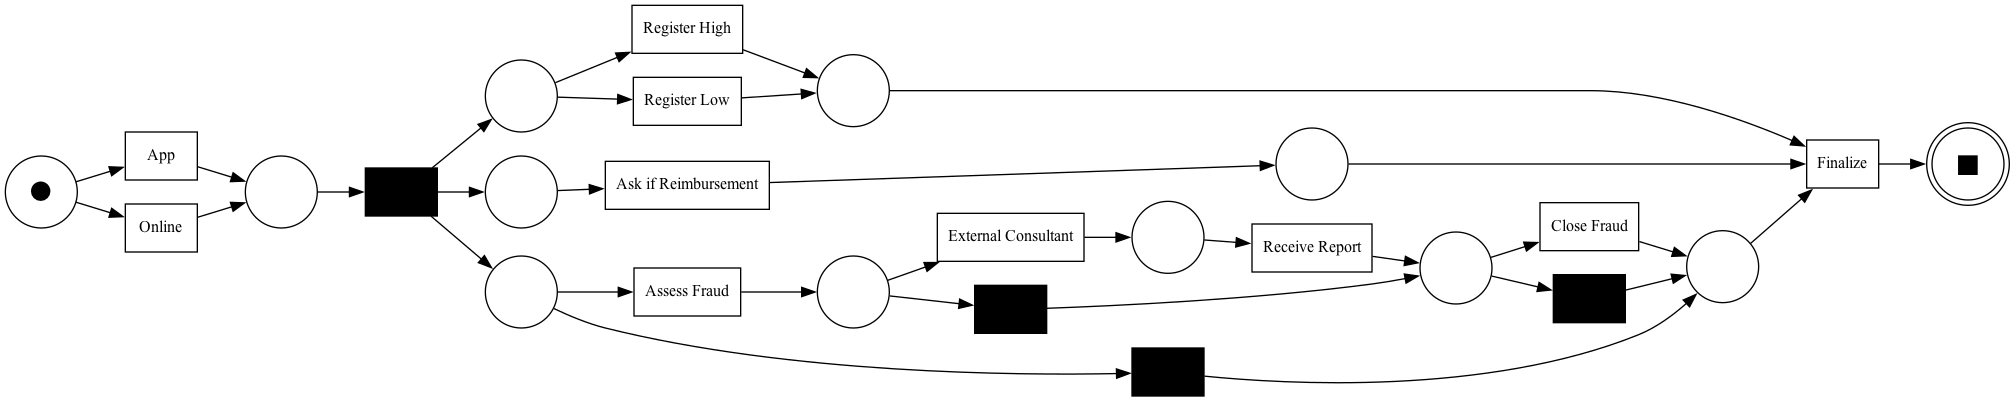

In [37]:
# your code
#pn_conf = pm4py.read_apnml('datasets/pn_conf.apnml') 
log_conf = pm4py.read_xes('datasets/log_conf.xes')

net_conf, im_conf, fm_conf = pm4py.discover_petri_net_inductive(log_conf)
pm4py.view_petri_net(net_conf, im_conf, fm_conf, format='png') 

In [79]:
log_conf_temp = pd.DataFrame(log_conf[0])
log_conf_temp

@@index              Activity Brand  CaseId  ModelTime Resource  \
0        0                Online  PEAR       0          0      111   
1        1          Register Low  PEAR       0      11999        1   
2        2  Ask if Reimbursement  PEAR       0      12411        1   
3        3                   Pay  PEAR       0     186738        2   

                  Timestamp          concept:name            time:timestamp  
0 2020-06-01 06:00:00+00:00                Online 2020-06-01 06:00:00+00:00  
1 2020-06-01 09:19:59+00:00          Register Low 2020-06-01 09:19:59+00:00  
2 2020-06-01 09:26:51+00:00  Ask if Reimbursement 2020-06-01 09:26:51+00:00  
3 2020-06-03 09:52:18+00:00              Finalize 2020-06-03 09:52:18+00:00

In [81]:
fitness_conf = replay_fitness_evaluator.apply(log_conf, net_conf, im_conf, fm_conf, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
display(fitness_conf)

replaying log with TBR, completed variants ::   0%|          | 0/122 [00:00<?, ?it/s]

{'perc_fit_traces': 100.0,
 'average_trace_fitness': 1.0,
 'log_fitness': 1.0,
 'percentage_of_fitting_traces': 100.0}

#### **b(vi)** 
To provide additional diagnostics on the deviations, compute the missing, consumed, produced and remaining number of tokens for **each place**. 
To do so, use the following *pm4py* code:
    
    from pm4py.algo.conformance.tokenreplay import algorithm as token_based_replay
	tbr_results, place_fitness, transition_fitness, notexisting_activities_in_model =
    token_based_replay.apply(log_conf, net_conf, im_conf, fm_conf, parameters={"enable_pltr_fitness": True, "disable_variants": True})

After running this line for log `log_conf`, Petri net `net_conf` with initial marking `im_conf` and final marking `fm_conf`, the variable `place_fitness` will contain the token counts for each place and trace. Therefore, you will only need aggregate over the traces.
Print a table of the token counts per place. 


In [87]:
# your code
from pm4py.algo.conformance.tokenreplay import algorithm as token_based_replay

tbr_results, place_fitness, transition_fitness, notexisting_activities_in_model = token_based_replay.apply(log_conf, net_conf, im_conf, fm_conf, parameters={"enable_pltr_fitness": True, "disable_variants": True})
#display(place_fitness)
place_fitness = pd.DataFrame(place_fitness)
place_fitness

replaying log with TBR, completed variants ::   0%|          | 0/10000 [00:00<?, ?it/s]

source    p_3   sink    p_6   p_9  p_10 p_11   p_12    p_5  \
underfed_traces     {}     {}     {}     {}    {}    {}   {}     {}     {}   
overfed_traces      {}     {}     {}     {}    {}    {}   {}     {}     {}   
m                    0      0      0      0     0     0    0      0      0   
r                    0      0      0      0     0     0    0      0      0   
c                10000  10000  10000  10000  1917  1917   99  10000  10000   
p                10000  10000  10000  10000  1917  1917   99  10000  10000   

                   p_7    p_8   p_13  
underfed_traces     {}     {}     {}  
overfed_traces      {}     {}     {}  
m                    0      0      0  
r                    0      0      0  
c                10000  10000  10000  
p                10000  10000  10000

#### **b(vii)** 
Consider the token counts per place and a few unfitting traces, which deviation(s) do you observe? Describe the deviation and briefly explain how it can be related to the token counts of the individual places. For example, activity *xy* is often missing resulting in a high number of missing tokens in place *p*.  


In [ ]:
# your code

**Your answer:** *(Describe the deviation(s). One sentence can already be enough.)* In my case, the fitness of model is 1.0. All consumed token would be produced token. There are no missing and remaining token in my model.

**Your answer:** (*Relate the deviation(s) to the token counts of the individual places. Roughly five sentences can be enough for a precise description.*)

### c) Analyzing Fraud (4pts)

#### **c(i)** 
Filter the event log so that it only contains traces where a fraud report is filled (occurrence of `Fill Fraud Report`). For theses traces, create a bar plot showing the number of products of a certain brand involved in the fraud. Describe the resulting plot.

*Hint: Each case is associated with precisely one brand.*


In [99]:
# your code
from pm4py.algo.filtering.log.end_activities import end_activities_filter

#log_fraud = end_activities_filter.apply(log, ['Fill Fraud Report'])
log_fraud = pm4py.filter_event_attribute_values(log, "concept:name", 
                                               ['Fill Fraud Report'], level="case", retain=True)

#dfg, start_activities, end_activities = pm4py.discover_directly_follows_graph(log_fraud) 

#pm4py.view_dfg(dfg, start_activities, end_activities)

#net_fraud, im_fraud, fm_fraud = pm4py.discover_petri_net_inductive(log_fraud)
#pm4py.view_petri_net(net_fraud, im_fraud, fm_fraud, format='png') 

#fitness_fraud = replay_fitness_evaluator.apply(log_fraud, net_fraud, im_fraud , fm_fraud, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
#display(fitness_fraud)

In [141]:
temp = df.filter(items=['CaseId','Brand','concept:name'])

#temp1 = pd.get_dummies(temp, columns = ["Brand", "concept:name"])
temp1 = pd.get_dummies(temp, columns = ["concept:name"])
temp2 = temp1.filter(items=['CaseId','Brand','concept:name_Fill Fraud Report'])
display(temp2.head())

CaseId Brand  concept:name_Fill Fraud Report
0       0  PEAR                               0
1       0  PEAR                               0
2       0  PEAR                               0
3       0  PEAR                               0
4       1    CP                               0

<AxesSubplot:xlabel='Brand', ylabel='count'>

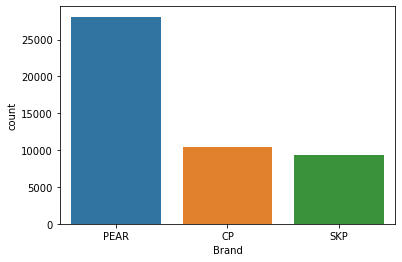

In [142]:
#create a bar plot showing the number of products of a certain brand involved in the fraud
import seaborn as sns 
sns.countplot(data=temp2, x="Brand")

**Your answer:** (*Describe the plot in two to three sentences.*)

#### **c(ii)**  
The plot shows differences between brands. Discuss the result. Consider what you learned in Lecture 11 (association rules). Try to provide additional analysis results to underpin your discussion.

*Hint: A very short additional analysis (i.e., a few lines of code) might already be sufficient.*


In [ ]:
# your code (for a short additional analysis)

**Your answer:** *(Relate your results to Lecture 11, approximately one short paragraph)*

## Question 6 - Simpson's Paradox (3 pts)

### Sex Bias in Berkeley Graduate Admissions?

In the Fall of 1973, the University of California at Berkeley released data about their graduate class. The data showed the major the applicant applied to, their self-reported gender (Male or Female), and whether or not they were accepted or rejected. The acceptance rates between men and women were different. This caused immediate concern in the public as people thought that Berkeley was biased against women.

The "Berkeley Dataset" contains all 12,763 applicants to UC-Berkeley's graduate programs in Fall 1973. This dataset was published by UC-Berkeley researchers in an analysis to understand the possible gender bias in admissions.

Dataset Variables:

Year : number ➜ The application year (this value is always 1973)

Major : string ➜: An anonymized major code (either A, B, C, D, E, F, or Other). The specific majors are unknown except that A-F are the six majors with the most applicants in Fall 1973

Gender : string ➜ Applicant self-reported gender (either M or F)

Admission: string ➜ Admission decision (either Rejected or Accepted)

**a)**
Upload the data from the `berkeley.csv` file and load it into a dataframe named `data`. Display the first few lines from the dataframe.

In [266]:
# your code
data = pd.read_csv("datasets/berkeley.csv")
data.head()

Year  Major Gender Admission
0  1973      C      F  Rejected
1  1973      B      M  Accepted
2  1973  Other      F  Accepted
3  1973  Other      M  Accepted
4  1973  Other      M  Rejected

**b)** Remove the "Year" column as it does not contain any information in this dataset (all years are 1973.)

In [269]:
# your code
data = data.drop(columns=['Year'])

**c)** For each of the values of column "Gender", compute the admission rate and compare them against each other.

In [272]:
# your code
table_aggregated = pd.pivot_table(data=data,index=['Gender'], columns=['Admission'], aggfunc='count')
table_aggregated

Major         
Admission Accepted Rejected
Gender                     
F             1494     2827
M             3738     4704

**Your answer:**

In [287]:
print("The admission rate for female is " + str(1494/(1494+2827)*100) + "%.")
print("The admission rate for male is " + str(3783/(3783+4704)*100) + "%.")

The admission rate for female is 34.57532978477204%.
The admission rate for male is 44.57405443619653%.


**d)** For each value combination of the "Gender" and "Major" columns, compute the admission rate. Compare the admission rate of women against the admission rate of men for each of the majors.

In [277]:
# your code
table_combine = pd.pivot_table(data=data,index=['Gender', 'Major'], columns=['Admission'], aggfunc={'Admission': 'count'})
table_combine

Admission         
Admission     Accepted Rejected
Gender Major                   
F      A            89       19
       B            17        8
       C           201      392
       D           131      244
       E            94      299
       F            25      316
       Other       937     1549
M      A           825      313
       B           353      207
       C           120      205
       D           138      279
       E            53      138
       F            22      351
       Other      2227     3211

**Your answer:**

In [288]:
print("The admission rate of female for major A is " + str(89/(89+19)*100) + "%.")
print("The admission rate of female for major B is " + str(17/(17+8)*100) + "%.")
print("The admission rate of female for major C is " + str(201/(201+392)*100) + "%.")
print("The admission rate of female for major D is " + str(131/(131+244)*100) + "%.")
print("The admission rate of female for major E is " + str(94/(94+299)*100) + "%.")
print("The admission rate of female for major F is " + str(25/(25+316)*100) + "%.")
print("The admission rate of female for other major is " + str(937/(937+1549)*100) + "%.")

The admission rate of female for major A is 82.4074074074074%.
The admission rate of female for major B is 68.0%.
The admission rate of female for major C is 33.895446880269816%.
The admission rate of female for major D is 34.93333333333333%.
The admission rate of female for major E is 23.918575063613233%.
The admission rate of female for major F is 7.331378299120235%.
The admission rate of female for other major is 37.69106999195495%.


In [289]:
print("The admission rate of male for major A is " + str(825/(825+313)*100) + "%.")
print("The admission rate of male for major B is " + str(353/(353+207)*100) + "%.")
print("The admission rate of male for major C is " + str(120/(120+205)*100) + "%.")
print("The admission rate of male for major D is " + str(138/(138+279)*100) + "%.")
print("The admission rate of male for major E is " + str(53/(53+138)*100) + "%.")
print("The admission rate of male for major F is " + str(22/(22+351)*100) + "%.")
print("The admission rate of male for other major is " + str(2227/(2227+3211)*100) + "%.")

The admission rate of male for major A is 72.49560632688929%.
The admission rate of male for major B is 63.035714285714285%.
The admission rate of male for major C is 36.92307692307693%.
The admission rate of male for major D is 33.093525179856115%.
The admission rate of male for major E is 27.748691099476442%.
The admission rate of male for major F is 5.898123324396782%.
The admission rate of male for other major is 40.95255608679661%.


**e)** Can you confirm there is a sex bias in the admission rates of the students?

**Your answer:** In general, the admission rate of female is lower than the male. However, if we consider each major carefully, the admission rate of female is higher than the male except for other major. Obviously, it is the case of Simpson's paradox and there exists a sex bias. The number of male is much more than the female could be the hidden factor behind this bias.

## Question 7: Big Data (15pts)

In [15]:
import pandas as pd

You are a data scientist at NASA, an agency for civil space programs, and with your team you develop and maintain the software of the NASA Crew Exploration Vehicle (CEV).  Your task is to analyze the performance of the software, and as a first exploratory step, you would like to **compute the mean execution times** of function calls within that software. Since the running vehicle will generate a high throughput of observable events in a stream, you decide to set up a MapReduce pipeline in Hadoop. 

The file **nasa-cev-software-tests.tsv** records timestamped events of the vehicle's software tests. The log contains the columns *Case*, *Activity* and *Timestamp*, denoting the case ID, the activity key (method call) and timestamp of the event record in nanoseconds, respectively. Furthermore, the log contains the columns *Lifecycle Transition* and *Execution ID*. The lifecycle transition takes either of the values *start* and *complete*, stating whether the corresponding activity (method call) in that row is being started or completed at the specified timestamp. The execution ID relates each event to a concrete method call, i.e., for each execution ID, there are exactly two entries (namely a *start* and a *complete* event) in the log.

### a) Plan the Maths (2pt):

The mean $\mu_n$ over numerical values $v_1,...,v_n$ is well-known to be computed as $\mu_n = \frac{1}{n}\sum_{i=1}^{n} v_i$.\
One may also use the alternative recursive formalization $\mu_{n+m} = \frac{n\cdot\mu_{n} + m\cdot\mu_{m}}{n+m}$. \
What is the advantage of using the alternative formalization when you think of handling streaming data or distributed data? Briefly explain.


**Your answer:**

### b) Set up MapReduce (10pts)

Realize the computation of the mean execution times of activities as a MapReduce job. 
You need to implement this a cascaded MapReduced job. This means that the output of the first job will serve as the input of the second job. In the first job, derive the execution times of each activity execution, i.e. the time difference between the *complete* and the *start* lifecycle transition of each activity execution. In the second step, aggregate this timing information to compute the mean.

#### **b(i)** 
Specify the *function signatures* of the map functions and the reduce functions that you are going to use.\
I.e., find concrete sets to substitute $K_1, V_1, ... $ in the general signatures for map and reduce functions \

$ map:  K_1 \times V_1 \rightarrow (K_2 \times V_2)^* $\
$ reduce: K_2 \times (V_2)^* \rightarrow (V_3)^*$ (or a singleton $V_3$) 

*Hint: You may introduce symbols to denote sets, e.g. $Act$ for the set of activities.\
You may also first implement the solution (b(ii)) to get an idea about the underlying signatures.\
Mind that you need two map and two reduce functions.*

**Your answer:**

#### **b(ii)**: 
Specify map functions and reduce functions to compute the mean execution time per activity as python scripts.

In [ ]:
# your code (nasa_mapper1.py)

In [ ]:
# your code (nasa_reducer1.py)

In [ ]:
# your code (nasa_mapper2.py)

In [ ]:
# your code (nasa_reducer2.py)

### c) Run MapReduce (3pts)

In the following, please use one of your team members' matriculation number as an identifier.

#### **c(i) (Randomization)**: 
Before applying your functions from the previous step to the dataset, please insert the matriculation number and run the following lines to randomly filter out a few of the traces in the event log, and continue working with the filtered log. 


In [16]:
# your matriculation number here
matr_nb = 429195

# utility code (do not change)
import random
random.seed(matr_nb)

full_df = pd.read_csv("datasets/nasa-cev-software-tests.tsv", sep="\t")

case_ids = list(set(full_df["Case"].values))
case_ids.sort()
filtered_out_case_ids = random.sample(case_ids, 10)
filtered_case_ids = [case_id for case_id in case_ids if case_id not in filtered_out_case_ids]
randomized_df = full_df[full_df["Case"].isin(filtered_case_ids)]

randomized_df.to_csv("datasets/nasa-cev-software-tests-randomized-" + str(matr_nb) + ".tsv",
          columns=["Activity", "Timestamp", "Lifecycle Transition", "Execution ID"],
          sep="\t", index=False, header=False)

#### **c(ii)**:
Now, it is time to work with the Hadoop Distributed File System (HDFS). Follow the instructions below and show your results in each step (screenshots of the command line).

    1) Import the event log to your Docker engine (at /usr/local/hadoop/(your_matr_nb)-event-log/). You also need to import the python scripts, but only document the event log import here.
    2) Upload the files to the running HDFS (at /input/(your_matr_nb)-event-log/).
	3) Run Hadoop commands for the MapReduce computation.
    4) Show the final output (computed mean execution times).

In [ ]:
from IPython.display import Image
# your code
# Image(filename='filename_screenshot_of_a1')

In [ ]:
# your code
# Image(filename='filename_screenshot_of_a2')

In [ ]:
# your code
# Image(filename='filename_screenshot_of_a3')

In [ ]:
# your code
# Image(filename='filename_screenshot_of_a4')